In [12]:
import pandas as pd
df = pd.read_csv('ENEM\MICRODADOS_ENEM_2022.csv', sep=';', encoding='latin1', decimal=',')
df.head()

#nrows para ler menos dados na hora dos testes = não demorar muito para carregar

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210057943671,2022,14,M,2,2,1,1,2,1,...,B,A,A,A,A,A,A,A,A,A
1,210057516120,2022,14,M,2,1,1,1,16,1,...,E,E,B,E,B,B,E,B,E,B
2,210057280536,2022,5,F,1,2,1,1,2,1,...,A,A,A,A,A,A,C,A,A,B
3,210055724397,2022,6,M,1,3,1,1,2,1,...,B,A,A,C,A,A,C,B,B,B
4,210055097896,2022,4,M,0,3,1,1,1,1,...,A,A,A,A,A,A,B,A,A,A


In [13]:
df.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

In [14]:
df = df.drop(columns=['IN_TREINEIRO'])


In [15]:
df.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA', 'TP_PRESENCA_CN',
       'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'CO_PROVA_CN',
       'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH',
       'NU_NOTA_LC', 'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN',
       'TX_GABARITO_CH', 'TX_GABARITO_LC', 'TX_GABARITO_MT',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q003', 'Q004', 'Q005', 'Q006',

In [16]:
prova_columns = ['TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC','TP_PRESENCA_MT']
condition = ~df[prova_columns].isin([0, 2]).any(axis=1)
df= df[condition]

In [17]:
df['TP_PRESENCA_CH'].unique()

array([1], dtype=int64)

In [18]:
redacao_columns = ['TP_STATUS_REDACAO']
condition = ~df[redacao_columns].isin([2,3,4,5,6,7,8,9]).any(axis=1)
df= df[condition]

In [19]:
df['TP_STATUS_REDACAO'].unique()

array([1.])

In [20]:
print(df['Q006'].unique())

['B' 'A' 'E' 'C' 'G' 'D' 'F' 'I' 'H' 'K' 'L' 'J' 'Q' 'P' 'O' 'M' 'N']


In [22]:
mean_data = df.groupby('Q006')[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO']].mean().reset_index()
mean_data

TypeError: Could not convert 490.7411.1544.1386.3395402.9538.3461.3418.6517.1486.2454457.1448.5428.6435.7400.6414.8418.8378.4457498.2567.2428.2403.3549.5476.2486.5492.4435.5424.1454.2467.5424.8541.4480.7431.5516.3443.6442.7422.9550.1501.7499.1431.1436.2424.5387.1398.6430.3420.8407.8378.8507.4555.1515.2509.2465.1402.9421411.2444581.6422.9366.3379.6512.3437.5436.6513.4437.5446487412.2412.3422.8451.1395.6411.8447.7398.7422.6413.5429.4503.6501495.8477.3529.2417.5433.8383.2408.3436.4420.7410.6472.8468.4363.4484.1463363.3416.5407443.9462.3433.9452.9457.2476.7475.1419450.2552.1540.6572.4377.2548.3425.3528.4470.1461.8458.4478.3429625.4388.8381.8484.1467.7427.5487.6387495.3552.1548.1443.6382.7452.6508.8552.9427.5521.1412.9460.4419.5465.8554.4560.6393.7613.3433.2403.3416.2570.7503415.2540.8467.1549.2531.7398.5546.5395.3424.4438.8438.3407.1397.1446.7365.5435.9417.3479.2523.5434.5448.1435.5414.7476397.5436.2454.9415.2388529.4450.2480.6443.5399.6446.3380.5505.5396391.3442.7395.1492.3618.1462.7383.4460.1426.9455.5554.5404.5433.7633.2450.3394.2397.8434.9383.1463.7520.5423.7550.4469.3535.9452.6466.2498.3535.4514.1395.7418.5382.3439.7449427.9379.4391.5518.7491.8399.4418.2411.6433.3479.7418.9462.8437.5406.8408.3470.5580.2478389.2526.8467.7454.8535.3493.5528.4448.8420.5387.7500.9555.8477.7562.9428.6496.6448.5532.7425.7467.2516.1503.7445364.2473.4387.7546.5510.1555.4453.4563.9413.1434.6456.1409.3402.9399380.9437.1455.3408.6475.1495.7515.5464.8447.4463.3498.6505.3471.7383.1565.6389.8520.5538.3390.6467.4488.9499.4538.8515.3414.4400532.6467.1477.6461.8522.9390414.2490.1404.9489.4461.6408.1490.2497.6392.2456.9471.3439.6382.4417.7413.2410.2519.6489431.4434.7383.6470499398.4387451.8408.2473.7413.7513.2462.4473393.6459.4531.1422.1459.8419.9433.4417.4423.5430.1493.8439.7453.3421.1422.7436.7460.2418.8449444.7512.2489.2467.8453.5455.3486.5524.8370.7475.9492.3458.7471.5437.1384.8434.2431.7550.2558.8536.9418.9447.7473.9463.5458.2520494.1531.1450.6472.9483.9455.5496.2468.1399.4467.4412.7521.3466.2401.8437455385.7425.9504472.2490.1459.4510.9434.8478.6422.3501518465.9494.4457.7501.2416.9567.3432.2467.6552.6473435.1518.3525.6403.1476.8523.6485.7606.4487393.8431.4451.1554.7457.4493.5424.9465612.8404.9483.4423.9601.4398.5489556.9508.3500.8405.5396.1402.1427.1451.8592.8487423.1424391.3447.7488.6430413.5456.9520.3399.7649.6450.4390.9412.8478421.2421.5453.5470.3433.2512.4395.9429.1452.3405.5441417.8437.6431.4397.3424.9572.7403.8413.5451.2444.9527.7467.2447.8568.2515.8485.4478.6629.5456.8458.1472.2509.7462465.1421.6447.2426.3443.4497.9522.5479.9409.1541.2508.7516.8455.5474.5576504.2514.4384.8553.2445.3505446532.1504.1363.7494.4580.4419.9388.8421.2522.8442489.3390.8525.2417.3479.7485401.1472.3470.5477.7440.7457.1402.2459.6537.1515.9479.8418.6447.1414.9437.4434.8395.2462543.3403549.2473.9421.5482.5529.8398.3504.5384.3435.4377.5514.9412.5561.8467.1467.9404.2437.4441.1550.2518479.9458.8443.9410.5504.7568428.7424.8457.3589.6438.3541.4530.6434.4488.4471.1426.1523477.8543509.5400.3454.3429.6434.3412423.4492.2421.4413.3476.3453.9407.3433.6407529.1511.1428.2403.8380.3453.8477.5396.2413.2393.4489.4534.7411.8480.4480.4438523.1535.1525.2377.9424.3403.8513.2455.9376.9416437518.9387.8453.6510.2508.7421.9446.5417.9426.6538.2566.6517.2426.2512430.4443.6481536.9514.5443.8442.3439.8442.8481.1461.6462378472.1510.9431.8398.4457.1571.2401.9446.6393.4370.8485.5368.5447579.6413.1392.9419471.7510.6429.3513.9529.4438.4475.4516.8379.9448435555.4452.3463.7377.4443.5405.8390.7514.1391.6433.9378.2424.4403.2431.7429.4563.8447.9557441.2438.8570.2374.2446.2478493.4431.5399.7403.4410.2476.5521.8497.3417.8511577.7521.6476.8376.3541.8432.4510.2456395.6479.4602.8403.4456.2380.4631.8376.3459.5532.8440.8466.1508.5535.5417.1498.1532.5412.1436.8474.2472.9590.2497.8544.2427440538.6501.4546.6477.7527.1491.9487.1506.4421.1472.1452.5537.5445.1483.7442.2419.5431450.3426.2451.8412.4562.1400.3416.5395.5467.2539.8519.5506.3497.7510.1418582.4394.9466.1535.9407.9615.8433426.9454.4430.6575.6526.4425.8554.3424.4531.5492.9432.7474418.1414432.7438.1409.4436.2454.6428.3449.1441497.6465.3427.2538.8608.9483.4422.6540.2521.2509.2414.3457494.8426.8454.7556.7454.8463.3479.7376.1480.8493.3466.5398.9482.7471.6429399.5414.8430425.8454.7408.7605.4394.1533.5474.8550.6443.7398.4432.8401.6470.9489.8530438.5484391.7568.8398.8545.8493.4408.9605.8434462.7517.7492406.8441.1468422.9448481.3440.7526.7471.3469.7463.3410479.9435.3463427.3597511.8389524.7447.8618.3486.1499.9513.6429.5431.2454.7398.6437.3522.4431.2472.5409444527.1398.8368.9390418.1394.1471.2429.5420.7464.9415.5459433397.8415577.4472.3430.3436.2485.7520562512.1478414.2439.6393.8495.7415.4471.6476.1483.9491.9606.5462.4508.4486.1459.1477463.7462.3390423.5485.5405.5428.8405.6500.4414.9372.2514.4419363.5466.9588.4502.9418.3390.9509459.8475.5424442.3642.9463.5501.2413.2501.7434.6502.6413.2451.1499.7535.5429.8406.6511.5436.4562459.8419.3511486.1459.3408.6445.6448582446.2474.3454.7493.8436.9521.5482.6415.5468.8473501.2529.6437.8483.2399.5479.2520.8462.5470.7489.2451.8441.9528410.5424.9398.9435.5540.7432.7571.1598.9484.8432.5409.4416.6401.5490.6430.7520.5411.7395.2440.5492.3437.7388.4417.3430495.7499.6375.3478.6412.9488.8454.6406.2418.4518.9378.6562440475.4521375.1406.2417.2391.1453.6554.4420.8587585.6413.9549.5498.8419.6455.1419.5672.3531.6501.5534500.2552.8420.4532.3505440430.8436.2545.9503.5562.4435.5392.4426.3521459.7404.6421.4379.8398.2408.1478.9431.6586.2496.9383.7386.4536.7541.5434.3606.8391.9536.7434.6633.3493.1508.2368.9463.7468.3413.3418.7580.3491.3390.3442.7481.8528.9448.7402.9469.7416465.2408.2496.5472.6468.5488.6510455504505.6406.2477.6595.5549.4506.3421.3393.1484.4381.5403.6524.6468.4471.1469.8506.1461.8415.1450.4432.7473.3558.5458.8433.1401.8490.6441.6503.1452406.3391.5405.3419.1476.1564.6488415.8451458.9486.7514.1584.5467.9472.5511.8457.3400.9467.3565.7494460391.2410.5513.1431.9487.9445.9442.5508.2661.8472.5448.4431.4531490478.7497.1385.5459.6386.8431.7404.7414.5492.6418.7519.2639388.4382.1453.9374470.2566.6416.8411.5383.4529.4554.4487.4389.8374.7441.3553.2487.1454.1425.3391.7396.4465.1505.2619.1435.7520.2441.4505.4514.9472.4477.6442.7474.4441.5407.2413462.8380.6467.5395.1481453.4470.1482.3379.6388.6401.7491.7597.1484.9398.6462.1429.5418.2454.2431.1510.6608.7410.1608.6482.9507.7430.9504.7443.4533429.9532417.3506.6489.5462.5436.4555.1467.3405.4606.5522.3377.9476.9440.1485.5424.4466.7379.4391.8450.1489464.6395.8439.8418.5485489.3443.2472.3510.4445581.2490.2506.6395.7573.7428.3506.1475.6398.1507.2418.5479.9402.5552.3414.7575.6384429.3471.2433.6458.7489.5382.5458.1439.7481.6436449.2483560.2400.8436.3470.2551.4423.2488.1451482.6555.6603.1403485.1452413.1512.9445.1464.1563.3489.5432407.7516.7457.5428.4594.6403.3475.3540.7578.7412.9407.3530.2423.4422.1400.1480.8412.3397.2403.7428.1545.8520.9481.1461.3485.9721.6480.4420.6453.6547.5422.1588.2510.4549.6521.3441.3608.8512.7467.8453.6538.7370.6432.7484.7437.5480.6552.1406.6413.5475.4464.4564.4454389.9463.6538.8410499.1483479.6382.7459.7482.2485.8445.9539.1382.2435.5449.1500.9454.4372.8413.5509.3478.6397.7442.7422.1485.5479.1410.2414.4438.4455.1424.3467.3464.7469.5547.3499.2558.9479.5436.6461.8472.5512.6405.2407.4419.8593.2489.6577.1420.5445556.2447.6380.7456.3445.2444.1463.1450.1487.9449.5526.4468.6399.3429.7422.4440463.7521.1428.8506.4443.1368.7417.3469.9558.6378.9432.9433.6461.5400.6522.7524.4439.6424.8439.8443.4513.6429.4464.8444436.3396.3446.8511.4619.5538.7546.3428.7430.8475.8447.1417.2498.2490.5455.4488.4539.5515.1490.8420.7462.2442.4427.4479.5435.3415.1588.5391.8409455.3572.7478.5476.1407.8423436.6455.4521.9513.4385455.2385.5445.8601587.1446.1578.7422416.3400.7461.1429.8417.3414.9492.6581.8525.1414.7434.7407.8585.2460.6512.3440.9422.5547.1400.6436.2463.7427.1514.7486.8457.7484.5496.5470.8482.1412.3431.6407.2540.9512.1437.7456.4422.1377.5474.4417.7480.1479469.1417.6443.2398.6457.6571.3516.7420.6391.7439.7396.1395.2433435374.9506419.3439.9449.8480.8408.4503455416.3429.3512.8368.8489.1433.2520.7372.2436462.5498400.7467388.6378.7390.8515.5388.4480.8414.7444.9510.5581.1410.8458.1458.6499.8551.9445.5407.5540.7436.5557.5450.6565446438512.2420.3442.7542.3407.8416.8445.4402.2402.3483.2468.6399.9605.8522.7593.9502.6433489446.3394.9461.7599.6504.9393.3429.9492.2465.1391.6400.8564.5594.3438.3440.1425.7437.9422.7475.4544.3493.3437496.8472.6426.3481.4472.2449.5495374.4390.9435.1407.9369.6437.7416.4425.4424.3467.1439.2450.9455.9533.4481.8386.5413.4477.7583.2508.7554.6480459.8419.7430504.3516.5478.8452.5500.6431.9458.4493.7499.6549.9454.7427.4390509.7591.4487.7484.5417.6440.2488591.1390.9506.8417.1502.1537.6381.5442.9485.4401.5468.8405.2498.6398.2502486.3405.1453.3439.3475498.5467.8415.1438.4471469.8433.4505.2499.3550.8408.3449.8526460.4568.8413.1476.3472.2413.4396.9381.5391.3478.2536.1454.2478442.4539.5553.9406.4542.4461.2427.3418.2550.3456.7504490.1471444.8525.2458.2502.3527.8396.7575.5604.4402.3443.6414.8444404.6530519.2512.4467.9596.6434.1468.5369.3501.6413.8392.8477.1568.7487.6495.1472.3443.9440.7389.7621.4429.2429.9381.5429514523404.8526.7469.5532.9423.4552.3473.7406.5526419.9385.9513.8442.5426.7476.3500.3520.2501.7404.6504.4473.8446.7495.2418.4444.4477.8382.7409.6468.1417.6459.2509418.7517.2449.7496.7640.1459.7578.8456.3380461.5591.6487.9440.9444.8578.7503.5448.6619.4471.9395.5410.3448.1384.8545.4410.6474.2498.2491.1505.3487.2512.5395.2400.5470.8489.6401.8402.8502.1409.2667.5387579.1446424.5462.7458.8501.7435461.4536.3586.2431.4456.2423.6486.1441.3444.4595.7462.1412.8528.9415.6545.4428.4440.3429.2495461.2412.1498.5441.5454554.5457.1643.2504.9687470.7471.3385.7445.3458.1494.7418.1451391.6508481.6412.8421.4414.2414.4409.9522.6399.2483.2495.8555.5503.6570.9394.5403.7530.4430.4414.6466.2438.9565425.6435.1511.4371.9584581.6516.6459.3380.5486.4489.8444.6451.3566.7548.1430.9478.8468.9418.6400.4502.8447.7564.7400.5450.7511.7416.8500.7472.3402.3487.9465.5503.3476389.9419.5453.5379.6400.4518.2382.6534.4487.3528.7558.6424.4476559.1454.3425.9468.5452.5423.5432494.2473.4583.9377547.6391.1407.1481.7526.9565.5435.4467.5508.2449.2385.5555.8452.7395.3459418.7412.3423.4462.1395.7419.3422.2448591.2458407.6560.5411.5400546.2391.9439.9427402.2462.8525.4395.9421.8583.6488.4387.6417.9447397452.8493.2426.2400.2556.4467.5559.1442.3498.3448.5468.1500.1410.4413619.8543416.5504.1505.1461.1589.2521.3478.7498.8406.9373.8490.3404.3510453.6488.6403.2457.3449.3449.3392.9425.5483.9461.1396.4473.3412516.4394.8425.5520.4444.7473.3426.2554430.8545.6498.8392.9469.7452421.1438.4535.2516.9389.1431.7520.4426.2496.7456.1404.6446.8467.8477.8440.6474.8428.2440.1421.8450.4405426.9378.6496.1558.5451.4447469488.8588.4413471.9476.8460.7411.2470460.6455.4452.6472.8507.1452.6450.5496.7481.4549.8590.7486.6480.5485.1375.5444.7395.3501.8422.8493.8496.5373422.6375.9395.1446.2474.2490.8439.1393.4418421.2406.4447.2462451.7459.3501.3526.6391.1393.5463.9479.3428.2441.7501.8524.3475548448.5579.6480.1425.8519.8423.6414.1445.8541.8421.5497.7422.9476.1507.5424.3434.6447.3541.7662.2428.5412.2401.6455.6413.2461.4466.4523.3475.7455.5452.2489.7392.8389456.1508.7452.4583.5582.9425.3471.9479.7434.8501.2448.9460429.1432419.1458.5502.8558.5395.2417.6426402.9433.4546.3561.5457.1500.2522.4592.2426388.7514.1420.9458.7465.3405.6531.6552516.5450.2368.8433.5433396455.7438395.3404394.5438.5440.3453.1441.9428.4432410.9421570.6444.5430.9494.8508.7381.9393.5435379.9577.1402.4463.4518.3433.2426.7420.8486.5485.4428.5436.1440.9570.8384.2473.7521.2452.9426425.6475.5460.8467.8546.2516.7458.6447.6410.6531.3376.2420.8550.4405.8591.9542.3491404560.3395438.8442.2501.3458478380.1399375.7435458.8424458.5396.8520.9408.4433.5433.1466.7386.6664.3456.7473.2393.1396.4400.1514.6498.5431.3467.8440.9418.7452.3435.7512.2388.5490.2450.1485.3408.5467.2589.1541.7458.6489.7447.5415.2570.4426.4452.6461.4553.1465.6395.5386.9525.6502.5400.9607428.5504.3425.9426.3490.2424.3504430.6454408.7506.1480.5439414.9407447.6441.8404.4407.2500.1553.9376.5362.7427.1429.1409.4449.2472.3459.7466.9537.9485.3465.1410.1446.1556.8435.1422.6558.5549.6413.1425.3453.1452.8509.6435.7482417.2505.3533.7408.6401.6486.3476.9483.9458.1399.6451.3439.6394.3451.8402.9468.1395.4456.6473.1521.4425.8459.2428.4406.3531.8483.8384.4436.8445.9598.3459.4431479.2553.1464.1443.4518.4501.8477.8527.5574.5523399.4535.1446392.9426.3414.6526.9402.2398.6471.7567.3542446.1427.1388.3524.4423548.4436.4450.1440487.5506.3419504.8448.5476.2550.3394.4533402.3502.9400.1456409.4419.2380.9456.4601.3394.5443.2428.8443.2465.4546.9408.8373.2443.3397.6431.9461.5448.7420.6590.1425.5462.3528507.3437.1557.4481.7586.6430.4483.3422.4479.2451.9468.8454.2460.4475.7483.9571.6420.5413.3484.3467.9391.9416.3409.4417.1487.5421.6484.1512.7498.6461.5481.7508541.4428.5418.4479.7436.4515.3384.2508.2504.6478.6467426.6419.6479.5506.8468.2414.9393.1507.5466509.2473.4549405.8452.4443.7410.2490479391.8604.4404.3536.5470.2418.6367.5472.7521486.4438.8407.5502.7507.2385438.3588.9433.5385.8522.6491.5548.7407.9493.4458.2469.6470.2388.4413.2548.2443462.7423.3423.7501.6382.4464.2398.7405.2475.2370490.2453.5497.4440.9412.5473.3431.9455.7428.6463.9399.6448.7428.1418.2420477.8429.1475.5400.6432.5485.8486.8558416.3438512.4436.6433.9573.7418.7581.6476.4441.3412.3453486495.2445.4545.3528.3474.8466.6431.7538420.2423.9542.2442.8543.1393.7498.9528.1535.5464.1473451.3446.1432.2522.2483.6454.9491.2404.6511.7666.5414.2379414.8410.3487.5534.1531.6415.5517.5440409.5600.1429.9455.2485.2484.7444.2411380.5473.8572.5381.7396.3396.5477444.9382.5495.1492.5484.4457.3510420.2395.5414.7488.3481.2466.3458.5466.7422470.7490.4469.6596536.4454471.2467.1410.2378.7492.3451.6524.5499.5386.8464.8410.2448.5508.9426549.1424.8472.3440.7393.7479.3415.5395.7423.3447434.9378.5535.8427.2421.8501.9486.5474.1468.8516.5412.2429370.6480.9442.5499425400.5493.4508.9493.2545.2393.7430.5486.3468.5419.4424.3455.3469.6486.5425.8462.7399.3438.6488.4400.9592445.4558.8411.5451.7443.6491.3445.6427421.1396.1429448437.7452.3591.2415.1439.1396.4493.6437404407.9444.1503.5421.2511.7468.1470.4406.6507.9383.3406.6480.6449.4636.3461.5522.6432454.2408447.9421.4466.1473504.9441.7512439.4569.6462.6573.3563.1427.9431.5388.8370.5479.2388.3374.4550.8439.6421.2465518.2666.6519.1395.8437.8421.5382.2478.5515.8505.9380.6475528.7513.8386.4496.5459.4487.7448.5407.6541.8375.2437.7385630.2445.7486.2425.9470.7445520.5511.2457.6414.2438.7433.9412.3394.3472.6452.9409.6511.1419.9429.4487.6500.5442.8444.3434466.1468.8413.7467.7447.1375.4403.8413.6386.9445.3395436.2389.3386.9389.7440.7467.2449.3400.1383.3524.1376402.9530.3428.2520.5434.8466.1376.8423.2409533.6484.1456.8418.5478.1571.7430.9403.6435.6555569.4589.4445.4450.7480.9437.8444.6592.1476.7494551.4622.7495436.4399.7504.2434.1381520.1363.7390.7381590.9405.9523.6469385.9570.7484.8555.7440.6595433.5382437.7416.8488.9422.8490.7484524.3625.5488.9512.2535.1397.9492.2528.6468.4442.2443.4414.3426.3478.3473.6431.1477.8446.8420.1436.4418492494.9404.1460.4421.8433.1490.3403.6387.4392.5543.9439.5536.5380.2558.1497380.7441.7427.7483.7484.7415.3481.5466.6364.8458.5484.3568.7595.2445.5397.4591.3401.4556.4517.9433512.1530.1417.5392503.1503.4404.2453.8485.8446.7437.6457.6588.6425.9501.3495.1555.3401.4473.8437.9468504.5444.8420.3520.2423.7460.6405.3403.9461.7438.6387.3403.1385.9483.7425.6442451.7450.4476.6456.5628.4437.5526.9485.1400.9519.5448.2591.6406.2419.7417.8431.8500.5516.7500.2411.7597.1492.8394375.8396.4489474.9532.2453406.7468.8419.8605.4426.5433.3466.8463.3391.3434.4492389.8380.4497.4443.5486.8466.3481.8460.3388.8443.8457463.1416.4440.3414.4579.4455.5468.2470.6411.1457506.3374.4429.9434.8445505482.6507.6476.2391.2427.4424.3448.4451.2555.1421.2445.2448.8442.4398.2540.8369473.5440.1399.9556.2444403.4581.8427.6469.4472.7521.4468.7469.7493.1401.8425.3442.8538.7486.5433.8464.6487410.9487.3407.4448.1438408.5495.7515492.5556.8386.1432.6405.8447.2448424378440.8481479.4522.1472.8419.1396462565.8470.9523.9631.8446.8478.5501.4474.4411.6422.1434.5402.2503.6412.2400.3403.3376.6443.9560.2584.9404.2417.3417.2522.6520.1484.6477.6411.3443.2420.7445.1473.3523.3644.5518.2383.2387.1495.4443.5445.3505.3405.4425513.8453.2440.6418.1488.8455.9462.6422.7499.4456.7462.5444.1553.4472.5444.6473.4425.5442.3381.8478.9405.8450.6428422461.3436.2466.7414.6392.9450.8535.2406.1420.6430.2448.7423.8539.6524.3472.2433.5388.3483.9526.1552.7413.7460.2483.7470.4441.5397.8400.7390.2468422.3648.8406.2375.1435.6389.2525457.2429.7542.8433395.3395.3587.1450473.9459.6415.5423.4549.4508.2545418.6407.7415.9584.5366.5497.7480.5499.5449.4437.2441.1451.4380.9402.9439421408.8438.6515.5482.1414.4490.6565.4391.3472438.2497.5423.7474.9397.6589.7577.2509.4440.5490.5524.3481.6506462.7440.3404.9429.6473.9465440.3375.8395.7422.7462.3470.8464.6553495.7403.1433.4394.3455466.6469.5464.4423.4388.7445.2368.6546.7561.7439.5492.8403.2455.6523.5536.9580.6409.5410.9571.6465.9533465.8473421.5482.9479.5374.7422.5461.7435.5411.5417.4536.8409.8415.9509.3494.3425.6422.3460.3463.6450.7492.3522507.9405.6443.5441.8377487.9382.7431.7558.8415.9447452.1478.6497.3616.3518406.3406.5479.4424.5424.6455.2417.2404.8510.3483.8410.5432433394.4586.2455.8505.2424.8426.5381387.6446.6431.5390.4442.6539.2464.9463.8398.3543.9488.2391423.8422.9456.3528.8440.5441.3506.3502.6425398.3468.5443.9548.3567.3481.5397.2530.8435.7428470.7388.5481.2437.6616.2407.3576471.5395.2436.3430.7448.6434.7439.8403.8469.1407.8403.2508.2412.7453.1490.9477.1472.9385.6476.8438.3400429.4417.6494.2410.5520.3484.8452.2466.6460.2517.3427.3443.7410.8462.3541.8463.5399.6515.1457.5400.2485.6430.4422.8521.8520.5427.5514.5439.3417.1388.7413.1554.8420.9383.4394.4420.3485489.4364412.8391.4400388.4548.8508452.2416.6449427.4520.6459.9491.7420.4413.5377.8456.5484.2424.1424.6414.5492.9475.3361.2471.6400.5487.8414.4444.9402.9474.2425534.3443.2517.8386.6363369.8385.8429.4524.8424.6531.6521438456.5476.2442.3453.6453.4409.6553.7507488.3440.3441.3498.3412.2472.8403.3487385.7475.7428.4435.1402.5380.3484.7530.3411.6434.2414.8439.1414.3394.3433.5505394540.7506.9571.2410.2441.8475.6501.3407.7396.6388.6454.8449439.5422.5430.6507.6422.9437.2416.8500.3542.6388.8424.6517.9400.3474.2469.1394.1502.8421.9454.5414.7408.6460.2460.2545.1465.4495.4492.6410.5425.9431415.3439.4441.8580.9552.6455.9440.7559.8523.9418.2469.3530389.4467.4439416.8445.1431.2493.7474.4421.2481.7570.6442.6433.8557.6454.4366.2529.9439.8444.9536409.3479.9442.6392.8378.5418.1432.6482.3458.4419.1493.5409.8435.8467.8433.5444.2395.4517.1417.8405.6443.1405.6398.2443.2423.1421.2459.7374.4582401.4497.6521.1417.2462.1437.1440.2427495.3547.4473.7466.1457.8404.9379.2460.3405.6447.4467.3503.5561.5416.6445.3414479.9549.4532.6432.5389.8410.3426.3510.1425.4546.6544.2464410.8397.5559.2479.4385501505.3417.3414.4455.1416.9608.2361.2440.9478513.3498.5502.7402.2460.7571.1509448.7406450.9532.6429.6508436.3436.5488.4396.9488.9443.3395.4465.3411.7460430.9412430.4511.5413.1469457.8446.9481.3664.2540.3391.1447.5489.1414.1496.1436.8440.1398.7425.6395.5407.1578.5492452.7421.3556.1517.3468378.5474.8550.3527.1458.8413.3476423.1369.2442388.8414.4496.2486.4517464.6478.8410.5514.3474.6433.9466.5425.9412.4405.4426.3492.5457.6440.7392447.9462.3416.4526.2444.7471407.4535.9426.8400.2431.7423.1443.3518.9441.9514.1471.6494.7471.4441.6452.9408.1485.5494.8439.8446.7427.8586.7424.4499.1508.8416.2403.5382.5406.7547.2453.1420.8448362.1383.3462.7401.4414.2436.1442.3579.2505.8451.6460.5504452.9501.3505.9467.3403.3437.7576.2519.6550.8424.2561.7441.9445.9449.4386408.1407414515.8591.3481.2402.4461.7437.4420.4428.8389.6482.7496.5430.1472422398.6488.4464.8434.2407.1526.8438.6488.8563.8456567.2527.7514.9453.2419.7449.1447.8543.3401.6422484.6409.4433.2563.4485.7466.8523.6475.9439.6476.6436.8478.6432.4482.3467.5404.2488.5384.9489.1421.9452.5467.6415.4390.6375.3382.4421.5421.4579.8407.7453.4465.4409.7398.4572.3531.4428.1377.4434.2566.9529482.2467.2393.5432.7390.2508.4366.2430.6512.5446.2393.1543.8421.8500.1478408.1465.7462.4418.9391.9613.9438.6502.3430.6420.1523.1439.7494.6500.9530.1424.6491.2621.9471.7500.9427.9368.2506500.6423.8457.8421.3425.5474.6484.1393.5416.3473.5415.1398.4431.2407.6514.5496.4554.8532.4478.8448476.5427.2484.5493.5473.4481.6402.6405.2445451.2458.2451.3422.1384.8424.8377519.3473.4382.3514.5457.8407.4488.6433.3431.7436.6394.7390.7517500515.9419.1529.9506.2404541.4502.9560.9459.8445.4429.7454.7474.1509.5559.7482.9487.4418.8520.2509.6512.7460.4414.1521.5428.8470.9394.7438.5419.7543.8447.3413.9494383441.6393.6471442395.4421.4427.2375.3429.4449.5439.2425.8455.5470.3457.5428.4458.3485.5406.7474.8462.4367.5427.7422.3501.7494.9448.8422.2500.8436.4430.7418.2514.2467.8523429.6483.1470.9432.3490.5407449.2459.5576.1494.5394.2534.8436.6411.7487.5513.8414.3462.9439.9445.9449.1443.6462.9580.9607.1468.8474.5513.7416.9493510.8512441.9469.1591.7420.9451.7418.5540.1440.2376.2494420.5440.7434.9440.3470375.4485.4612.2391.5494.1479.7444.3440.8414.4433523.1427.6467.8470.6401.8475.6422.1422.4463.2516.6419.1422.1443.9445455.6450.7428.1435.4377.8519.3499.3389.8451.4477.9410.1435.4550.6474.6429.1451405.6389.5546.3511.1425.5469438.7371.6530.4454.5382.3424414.6515.9436424.2413.6522.3451.2466.8416.8418.9488.3528.6398.5392425.8502.9429.9428.4518.1433.2426.8407.7385413.2525.5441.5437.7440.6507.7418.4482.4449.8429.6415.3549.2397.3506.9382.1523.6439.8442.9415.1402.5512.6391396.7421.9432.9433.6393.8385.4473.2426.1443.2419.9412.3511.3503.9406.8545.3420.4440.7615.6442.7397.3456.3484.4451.9470.1388.2405.8541.7395.7547.4405.3453.9502.9380.1500.5430.5426.1481.2465528.3527.1557.9484.8374.3383.7460.9475.4435.3441.7459.6409.2387.8502.9483.5461.6506.4422.9412.4488.4401.6500.4507.3406.3431480.2393.2422518.4470.4399.4398.1553.9414.2488.5448.1461.1465.7440.2413.9414459.7543.2499.8409.6456.5405.8584470.4465.5576432.3492.2471.9498.4496.1493.3446.1412433.2433.7431.1451.8381.5393.7396.4457.3426.3454.7437.1438.5412.2453.2455.9416.6458421.9419.4560.9539475.4547.4511.1513.8572.1471512.2485.2588518.4505.5535.7459.3702.1394.1420.5577.1401.3399.6489.5572.6453.8427.6497.7439.7391.3398.3414.4409.5381.4603.4486492460460.9385.2431.5427.1479.5479471.7480.4443.9538.3429504.6509.5445.6453.1387.4399.7518.9411.9642.3469.8401.5508.3497567.6474.3485.6546.2422.4382456.9475.7389.1435.7486.9402.8470.6559.2479.8380.8381.1452.1441.9526.9427.2434.9502.5448.8434.8431.5449.1425.7447.4472.3455.5480.8490.9522.6425.9426.2379.7385.9413444.2407.6577.5385363.6437.2432460.5483.3463511.6474521.7485.4386.5449.9444.3566.9435.3426.1448.7405.8553.2488.2459.3463450.1450.7480.7581.4571.5464.1392.3437.6385.8543.9449.4400.2545471.2439.2392.3449.4437.9431.1516.2469.8386.2498.7420.4409.9436.9439.6390.2478.6458.7668.6419.3446.8434.1467.1414424.9494.9453.7416.1476.8566.9413.5519.2503.1439.2513.8414.5512.9416492407.1542.7437.7418.7395407.7449.5416.1374.1478.8476.3473.9509.8441.1411.1493.5480.5437.6437.9425.7474.9485.7497.5401.5416418.6520.2452.6427.5404.4430.6451.9521.9429.3385.3457.8416.6475.5491.6368.3582.7406.9477.8481.4475.2536.4433.7441.6535.6507.6485.4421526.1442.4435.9428.1569.1389.4513.1510.8381.8455.9447.3437.2431.7643.2409.9505.4433437.8404.6441.6502.8465.5446.2400.7647.7394.8463.6472.9446.3427.2518.2484.7390.3389.7393.7424.6429417.5410.5444.5599.5469.2412.3497.8473.6422.8410.3532418.7466.2509.2399.7405.3554.7445.4407.7455.8457.2546.4434.8416.2480.8455436.5454.5390.6458.8424.3458.7471.7430.3510.7465.8406.2458430410.5434.5484.6383.5519.8415.3452.8433396.6538.1435.4385.9428.9527.5403.8495.1464.6447.8422.7374.4451.7523.7493.2471455.6467.7470.7423.5456.7396.1438.1554.2478.6549.3442.5407.2470.8548.9463.3501.2532.4424.6369.3385.2437.3493.7417.7495.7501.2526.5402.9484.7484.3509.5513.2405.9580508.8510407.3423.2409.4525.3467544582.9476.4494.7434.6507.8527.4411469.4453.7534.1489.6449.6408.4415.1422.5422475.6515.8456.6469.6474365.4536.7478.2535.1422.8550.6398.7439.6499.8449.8496.9478.5530.2452.1442.9459.6403.3493.3493.1639.7552412.1429.7407382.5450.2447.6620.7479.2601.4419.7515.2516512.4572.9402.7483.7450.6588.4439421.6420.5412.6500.9411.1536.3452.3420.3560.9411.9374.8379.9532.9565395.9539.3477.3491.8507.8492.4540.2460.1521.8420.5505.9458.5384.1515512.5439.9482.4517.6438.6607.1472.3401.5468.6463.9394.4392.8510507462.5700.2453.2523.6432.7438.3421.4424.5475.3430.5417.3516.5394.9396.8429.7573.9449.2421.7386.5470.1550.9476.2446.8420.2447.1382.4502.2381.5509.3459476.1521.4426.9399.5425.5511.3478.3462.1475440.9471.1415.4474.9408.3447.2513.2456.4501.4443.8446.7460.9493518.6408.3469.9385.3424.6513.1447.7391.1524.8434.2444.3533.4383.6598573.5470492.7479.4496429.2476.5461.5431.1426.8424.6444.5427.5404.3481420.5457.3574.1441.7511.3413369.7499.4453.8437.6439418.4420455.1393.7508.9461.7557.7463450.5395.7442.6432.8399.6538.3404.6458.9428.9365.9490506.2556.4520504.8445.3448.5418.5467.5480.1444.5377.9409528.8421.2482.2486.4449.4522.5500.6401.8487.4406.3459.6471.4459.4616.3429.1488.8480.7490.3400.5488.2447.8490.2394.1468.2508.9585.6443.5447.3439.2409.5501.6518.1385.3496.3402.3457400.6548.2401.2443.8433.2500.2531.6460.4416.5456.7421.3459.3497.9453.3445.5551.8443.1407.2546.8429.8457.1461444.3423.6412.8464.3389.3374.9494.5385.4433.2427.3427.5502.6377400.7450.3432.5433.1455.8540.1463.2477401.6550.4478.2525.8430.3424.7427.3469.1495.2394.1427.3430.5414.7482.7417.8506.2481.4645.7393.6438488.8500.9412.6443.3461.4404.8427.4485.4428.7513.2417.1415.4385.5553.4506.3464.6537.1529.3470.5547.3414.6411.7447.1459.3516.4534.9510.3460.4417.7492.9434.1521.3440.3415.1428.4575.8480.7391.7416.3411.8421.2420412.1462.9452.5398.7435.8473.9474477.9485.4399.9413.9456.2404.5568.8468.9446.2396.7470.1524.7441.3555.9462.2427.7537434.9487474.4429.3399.8373.1422.4478.1525.3433.2445.6444.1397.5579.7496.3417.8463.9444.8482.6441.3452.4448.9428.5547.5406.5416.4536.8380.2565.6604.1411.2420.4540.8572.3436.7481.8547575.3462.7552.1430.7388409.8587.5469.6452.2456.3566.4686.2431.6471.2468.6525.3510.9448451.9483.6486.7450.6467389.8418.6581.6401.5432.7492.9482.9449.3517.2409.3424.3442.9444.6482.7420.3464.9561.7402.4518.1497.1549.5491.4437.1391.1405.1458.3518.9562.7505.2661.8401.1408487.7406.2419.3573.5523.6436.2463.1523.3409.4441.6439.4447461.8376.5520.2443.6461.6440.8502.8629.8480.4371.9489.2503.4466.1537.1478.6586.6397.8421.7531.6434.7505.4541.6561506.7548.3448.6491.5472.5429.6465.1508.6496.9493.6522.7438.5412388.1415.5384.5474.9424.4401.7426.9453.1415.4467.9498.9554.8501.3445.1418.2431.2481.3506.3392.5529.8553.6470.7467.5384.2437.9485.2390541.4429.3384.2441.8447499.6544.7443.2384.7443.5453.3431431.6489461.6372.2496.7395.9547.3400411.5490.1526391.9475.6442.5510.1527.6439.4437.9419.2365.9447.1481.4438.5450398504.2488532.1393.1433.8546.6419.3424.1384.9482.7517.1436.1460.5534.5547.3422.1486.9538.6409.3499.5439.9429.2417401.1420.7453.7450.7416.3404.6424.2513484.8403.5535514.4403.8472.8478.9431.1426.5503.2536.2445493.7436.2438.8407.2460412.8446.5467.4432.7472.9396631.1509408.4468.7533.5492.1425.9508.9486.7431.5525.4493.6405.9399565.9505.1464.4425439.3480.1410490.9371.8448.3504.7449.5370.3458.4423.5489.8477431.3402.2468.9581.2457.5456.1393452.6492.9514.1427.6489.7478.5422.8467.4450.2489.8486.9489.4394.2572.2412.5427.6471.5390.7578.9543.2403457.8472.4480.8461.4530.2443.2446.6394.8539.1474.8548.5467.5480.6516.5368.9445398.4577.8383599.4462.1414.9421439.6455.7438.7484.7400.1425.3499.7486.4456.6403.7443.8391.9433.7441.7457.3430456.3569411.4409.4506.4543.3443.4429.2400.5546.8457.9449.4399.1507.1403.9391.8461.4403.9477.4476.4427.6537.2492.9399.3448.8457.6411.6560.2508.6415.1531.5491.2414.8413.8432.4477.8419506.4414.8425.7481.9446.2405497.4450.4494569.9554.8388.3405431.5445.2451.9380.4509.1491476.1467.6472.2398.6417.8444.8469.4557.5478.5479.1406.3382.8554.1434.9466.6408.4545.9375.7458.4501.6481.1439.1468432480.8420.3541.4387.2458.6453.8530.8475.1415.9485.4418.2403477.2473.2418.5407.3407476.9396.2471.2402.1471.9454436.1417.5458.5461438.3464.8401.2478.8419.7511.3410.4437.7498.5470.2485.7452.4456.2495.1394.7468424.6429.6482.9512.9377.5393.1405.2480.6411.1431.5517.9533.7414.9419.8495.2475.5518.8560.2464444.2424.1393.1452.1602447.9408.4413.4455.7415451.9560510.7523492.1505.2377465.5402.9489.8371.7411.4442.2471.1515.3441.7384.3503.1396.8439.3399.3445.4579.3404523.1425369.9457.8543.2491.9416.1420.5476434490.9509.9386.9411.8500.2482.4385.5458.6450.6441.5471.2442.1425.1412.9500.4532.5600.1432441.8478.1431.9463.6436.5448517.2405.5552.6449.3399.2496.2449408.6390.8446.7484.6514.4513.3402.5409.1431.9569.1519.5550465.2398.4407.2466.8457.2466.7405.6476.3389.5465.1445.8442.8488457.7444540.9395.7413.1443.9434.8452.9422.9403.8511.3603.4436.3396.8393.5499.9539.3382.8393.7471.4442.9473.3374.2442.9479.1444.8418.8482.9408.7472.6471.8445436.9384.8430.8416.3460.9467.5473555.7378.9406.5484407.8572.2529.2406.2631.9513.9453.8405.5475.3506.1489.2398.7429.4617458.3477.4412.6585.5525.9425.3552.9437.9491.8515.8399.6423.7460.8444.7463.4405.1411.5416.2496.8421.4412.9401.6503.1458.4466.7396670.2421463.5433.4422.7464.6424449.8385.6418.9491.3497.5451.6429.1479.8449.4470.9432.4406.6384.3441.6477.3498.9435.5447.9406.7509419.2416.4464.8511.9472.4529.8558.6410.3555505.1589484.2405.3492.5397492.7520.3410.4486.2423.8511.6503.7439.5424.4428.8439.3405391.4395477.4448.6420.1411.9470.8480.6460.1485.8421.3475.2497.6654587.1593.8456.5411.6541.2462.8505.8591545.4454.6641.6433458422.2466545478.2484.5471.1502.3441.6455.4464.8514406.6395.5442.3432.1437.5478.2503.8373.6529.1541.8458.3401.7425.3407.3403.4465.5415.7376.2480.3414566.4423.8423.3431.5419.1568.2460.9450.9539420.6410.9429.8409.5488.5430.2401.5431.4473.6380.2479.7430.7450.7408.1532.8492.6391.8398.4411567.4413.9480.1510.8488.8459.8450.2418.7444.1454.6452.3479.9485461.2495.7559.5482.9435.8516.9414.2449.3444.2436481.1423.4436.7433.4473.2419.7414.9545408.4440.2416.2466401.5421.1493.3371.5434.4411.1419.4478.5429.1467.9401.2406408.5375.7503.9458.4427.5433.5438474.9363.3487.7477442.9462.4378.1396.2485.4499.9476.9423.6474.3450.4552.7442496.7393.2454.8467.4472.3410.1517.9446.4545.5539.7531387.7473.3522.1478449.8404.3556.1421553.8411.4555.7510.7451.1482398.4561.8412.7447.2417.5462.9450.4381.2449.2486.9486.3578.4435.5402.3420.1401.8460.6393.4410483.7418.3565.8564.3458.1411.5434.6452.8454.7430.9532.2404.5394.2388.9475467.7422393.3433.1463.1488.7469.4462.1534.8489.9413.3473.7392.8521.5505.9437.5462.2523.1404.4392468.9400.9430.5462.8435.6475.9470.9500.7444.6455.7493523.7498.8424.7448.4446506.7405.2391.8491416.5516455.7481.4408.3499.2407.7410.9517481.9455.7462.9422524.3414.8455.3388.6411.2486.3386.9460.9438431.7449.3434.5428.3440.1582.5413.6445.6443.6374.9455500.1405.3419.7558.9430.6466.5448452.1457.9402.9494.1498.9367.6460.1478.1460.8410.7555.3415.8465.3399.9382.1545.1422.1495.1549.2428.6420.4490.5412.1418.3539.4513.6434.4478.3505.3449.9536.4517.9402.4472.5443.1512.2449.3500.4538552.4488.5435.1404.2479.6406.4388.3518.2468.7399.1477.4476.7430.1556.3439.8458.4373.2429.2442.8436.9430.8422.1453.7415.3388.8424.2438.9420.9459.4514.1416.1415.5519.6506478.4446.4376.2409.3527.4449.7406.7468.3432.7431.5494.2445.7438.2431.5423.4401.1478.5404533.2429.1492.2432.9561.7534.3405.9447.3566.2459448449.1475.8462440.5513.2498.9467.1524.9423.2487560.6420.9407.8470405.7442.5385.4376.8559.4482.3452.8395.2497.8494.9404.6551.5646.7507.2416491.4536.3527.3471.8552.2519.9518.5461.3409.1500508.2373.6401474.9416.2542545.8447.9411.4447.8472.7462.8487419.9496.5391.1391.2450.7462.7466.6509.9387.8526.6447.5474.3409.3597.7481.7460.4459.6447512.7472.5386.3461.9462.5462.5508.8465.2365.3432.6437.5532.5419.1449.5435.2391.8530.2524.2463.4422.9407.3501.9529386.4490.5395.7399.6470.4486.5426.6409.6396.9485.3505.6451.3537380466468.7465.8519.2536.4529464.4439.4415.2398.4391.3466.5461.8431.5409.5477.2536.8450.1503.7445.7407.2425.8404.7464.2418.2405.6449.6382.5417.5538.9511.7490.8563563.9420.4381.3535.6450.2522.6489.2443.5461.3511.9529.8491.2456.2428.6489.1600529.2426.2474.7489.2430.3387.4424.2400.9429.1492.7418.6427.4458.5458.7470.1421425.7501.3393.5448.1470.4436.9419407.3429.8520.2519.6394.9430.1540.7460.8494.1404.7386.8456.1427.9450.2455.3453.6457.7422.6548.8456.1454.4481.6476.6601.3512.3595.7381.7468.8441.7458.4479.7471.5466.3418.3392.3410419.6438.5524.2399.5534.5606.9443.7606.4380.1399462.2543.2436457.8578.6435.8477.6459.3427.9511.1511.8448.8398.1523.6503.8467.5531.5379.6486.5422409.4383.7421.8391.4416.7413.9396.6393.4486406.1526.8435.6541.6429.9391.5489.3381.6532383.8489.6381.9469.4525.5557.9472.4476.5385.9457467.2450.7393.7444.5469.8448.5393.6382.2456.6455.6489.4454.4448494.4476.2467.5534.9545.5484.8487.9425.4439.2434.5387402.1469.3432.8502.4391.9408.2423.8548421.2477418.2447.7455.5528.2449.5382.9431.7519.6402.1476451.1459.1460.3483.6399.3501.4442.6428.3444.5618.6428.8467.5437.1376412.5506.5501.7436.2484.7473.4453.1400.1440.4436404.9399.2527.5396.2394.7468.1410.2466.4423.4458.9520.1462.7450.1425.8629.7394.3423.2450.6395.4566.3496438.3504.3418.8394.1482.2453.2423.7479.7548.9368.3429.8381.8415.1362.3500.8421.1505.5465.6449.3369.2491.2600.7424.3525.2447.4478.4430406.4401.5444.6458.3437.9456.3383.4389.7473.7413.3531.3413442.1515.9426.6468.5595573.7480.3515.3456.4406.7512.4504415.8423.2408.7398.7571669613.5575456.4413.9496.5414.4447.5465.5410.5457.3487.3440.8434.1439.8497.7596.6492.8380.1522.5422.3435.3414.6423411.5493.7450455.3407.7393.2436.9432.4481395.8489.1584.6417.8438.7375521.8474.3489.9451.2416.5412.3384.3446.9572.7464.7402.3432.8531.8566.4529552.6424.3422.7383468.3411.9473.5566.1380.3517.9449546.3493.2400.1477.9435.6434.4511.5434.7464.3447.4448.2412.4484.4399.3456.2367.6421.5404.5401.7434.8505450.8394.2462490.9435.9371.8488.1433.6467.9568.6445.5526.5399.8473.6399.3447.5408.6604.5506450.7495499567444.5525.7422.8406.8383.7432.4508.4502.6498439444.9392.9517.5525.5407.8483477.9438.4394.4459.8497.6494.4421.9455435.1423.3421.3394.7671.1436.6406.2512.5488424.6488.4534.1446.6504.6405.7419.9540.5481.4447.8450.1442.9381439.9398.6428.3430406.5441409.2451.4411.4369.5459.2549.7405.9536.7513.2459.7499.2467.4452540.5473.8404.9454.5452.7418.1404464532.9559.4505.6430.4377.6468.4455.6413.8442.6421.8465.8500.8434.8553.2365.9535.7468.3398.9434.2474.9409.5456507.2604.1414.4420.2498.7469.3412.9529.4504.3542.2480.9516.1455.5451.3425.6446.7487.1385.3455.5410.1426.9450.3437.1534.8519.4597.7490.4433.7432.8399.6526.6434.4444.3443.6433.3399.4447.5413.2450.9384.5647.6446.6413451.5538.9480.4392.5459.7390.5434.1442.7436.7387.8521.3479.5428.3430.4525.3556.2424.6605.2376.6418.5588.2403.4509.6416.5486.1427.1376.8430.8449.4365.2513.2491.2523.3449.1492.8439.8441454.1507.2406.9434.3501.3404.1420.9438.4512.2385.5446421.6433.3471.1389.4437.5408.5414.2427.3484.3455.3443.4503393.9400.1428.4526.5411.2475.2502.6470.2511.2465.4528.7461.2521.1478.3447.7412.9484.9399.4428.7424549.3424.7549.1441.4535.5420524.3461.9433.7409.3585.4501382.9528.4471.8419.9419.8460.5392.2535.1383.6495.4484.8392.7439.8440.3415.5406.6399.5376.6490.4443.4527483.4488.1502.4578.8444.7416.7390451.7438.2405.6447.6450.3373.9377.4531.3540.8654.4495.1447.4437.8436.4412.9488.8500.2478.3398.8473.2552.2429.9514.3408.5447.2408.9519.7499.9449.7435.8443.9422.3448.7415.8480.3516.4450.3437.2514.8391.6385.8551.6425.5467.6466425.1429.7475.4411.3491.4516392420.3508.9519.6463.3417.6403.6413.8425.6407.1438.2482.3525.9471.7433.5478.6409.9445.7414.2446.9512.7478.6382.4489525.6442.8426411.6464405.6393.3409435.3388.1452.7400.6421.6433562.6513.3403.6499.9491.9415.9484.6483.2442.2471.2429.6555.6475448.5497.5515.7412.2426.2570.6447.1472.6542.7408.7476.8459.4389.5435517.2399.1482.1513.8419.1460.2391.7422.6488.3483.1471.2443.2469.6451.1430.2432.1493.6412.8416.1405.9543465438414.5567.6496.9460.6408.7480.2575.5406.2510.2389.6490.1436537389.1376.2459.4512.7425.2437.1533.6462.4431.3413.4455.1480.8480.1430.7438.3452.8504.9725.1476.2403.4507.8387.9440.1391.1513.8490.6435438.7519.3418.8499.4447.3417.9415.3537.1449.8428518.8434.9513.6381.1464.9402467.3507.2415.3391597.7431.3426496.3531.9462.3525.5485.2416.8408.5514.9398.3499.7421.8467.2432.9449.3441.6455.7515.5419.6510.2481442.4417.9406.2425.5409.6408.1432.5460.6470.2412.6513482.4449.2385.2489.4442.7447.4443.6589.3491.1560.7425.6523.9435.7479.8493.8459.7579.1530.1459.6446.9379.4524437.6432.1450392.6459.3466.3474.1535.3405459.8439424.3409.4449.2394.7394.3420.3397.5487.8422.6418.6418.5452.3609.8382.7484.6396410.3480.1449506.6588.3522.5426.2432.5429.6490458.8541.6458.7466.5540.4441.7452.1433.1530.3488.4474.7541.6379.4460.9598.2529.7473.3520.2395.1426.5404.8472.7378.2516.9454.7533.8503.5398.7458.4469.7539411.6365.2447.6429.3432.3454380.1497.9460.3437.8422.5425.3497.7435.3480.6599.9536388514.1426.4389.2421.8397.8555.8462.6440.9490.6504.9458.9421.2381476.9560.2423.8489.6377.1441.5468.9555.4462.5431.1440.1458.9523.1474.3469.3406.8415.3410395.2451.8392.6505.9433.4444.4453.3452.3472.8480.9397.8423.2565.7484.3601.6458.5443.9447.4451.2468549.2471.1437.8448.7510.7413.4398.1415.4480435.7420.3470.3475.2432.9469.9387.2500.5426.9433.2423.5531.8406.5616.6416.6483.5449.9621.8404.1463.1418.7462451.5466.4544386.7486.1471.8534.2521.9516.5582.6413.1404.7384.4470.8441.1408.9456.9455.1465.4391.4457.5527.4468.9440.8403.4499.4448.3492.3470.9557.4383.6489.5448388497.5480.6509.1433443.8438.9483.1439.7485.7442461.8375495.1432.8507.9471.4562.9399.1413.1426.4428578.5543.9471.9418.2459541.2407.6435421.8463.4443.5442.8413.8389.6516.8390.4455.9448.9541.5527.9513416.3428.3455.8440.2444.2451.7410461.6483.2449.3499.7400448.6382.7437.3553.9522.9526.3476.9561.1479.9468421.4423.1489.4427.4552.2445.7433.4449474560.7548.5469.1459.6549.8444.6474.9444.5479.7469.8438.3377.3476487.8473526.9383.9411.3530.1457.3437.9428.7474.3444.7491.8371.2415.7503.2406.2436391.5398.8494.2488.6543.4421.2434.2488.5459.9407.9475.6446.4435.3390.7480.8417.7414.6481.2389.9458.6501.6390437.9540.6407.8418.9394.2457.7418.3543.6460.2421.7479.4370.1422.1534.8394434.8429.2431.8360.9426.3520.4422.4486.1507.7392.3465.4503.1399.2425.2408.5588443.6574466.2408.3437.1440.6469.3574537.3393.2425.9560.6418.1526.8448.8373.4488.5398.6412.2630.1475.7414.1403.9470.8410.5422.3375.7465.8402.7537.3523.4445.6588.9395.9454.2495.3527445.5492.9532.7422.2431.9502.6505461.9413438.2434.7372.8405.2524.6451.1468.4424521.7481.8367.7463.9406402.5449.9377.3458.6414.7478458.4401.6427.1430.4572.8574.4626.7448.2423.1441.1462.2410.8479.6444.5472.9487.6394.9510.1473.4489.8423.1407.7510497.8481.4505.7599.1390.4515.1432.3382.3476.9466.4375.9393.7554.7491.3380.7393.6413.7463.5400.2512.3443460.5392.7440.4482.5523456.2375.2500392.4488.3393.8401.9460454.8493483.1425.1490.7458.6493.9442423.9372.6447.8502.2444.2440.3420.8448.4458.9513.7560.4453.3412.6424.2469.2422.8433.6561.4413.4407.7573.2528.8543.5451.7546.9509.9424.1430.5381.7410.3528.5535.5521441453.1468.6532.8423.6464.7429.1391.7494.5478.6395451.9482.2452.7439.1474509.3471.8473.2482.5468.6430.9431477.7445.9448452.7532458.1461.6527.1583.7482.6575.4429.2401.1418.2387.1426477.4465.5492398.6664.2542495.2445.1568443.6436.5440474.8415.7452.2417.1560.8507.7465.3471428.2519.2672.1479.5405.5447.6377.9526.4536.7364.8387467.4392.6493.5505.3514.3442.5507.5392.3408.8367.3429.7502.5541.1466.3593.4401400.3443.1472.2408.5417.7398.5411521.8524.7443.8496.9502.9464.4439.2369504486.8502.1472444.8483.6442.5471.8440527.8465.1406.5438.8464.5537.6451.3437598.9603.2389.2492.8420.3474.7480.4431.7397564.1592.2440.5582535472.1384.7574.6377.7398.2477.1419.1455.3503.3480453.1438.8524.4610.3447.7468.1544.4421.9458.5474381390.5426.8410.7417.7380.4470.1494.9440.9485.7530.2497.4493.1374.7445.3535.1416.2482.9484.4428.7430.7475.2506.9465.6533.8447.7429.8512.2412.7576474480.7367.9401.5510.2483.2404.8511.9413.7488.3488.8542.6394.6462.9395538.4513.6439.8415449.9476.4462.1445.2396.5489411.6411496.4420.3476.3380.5480.7432.9439.2496.3463.8519.3498.7563.3412.4398.2481.1384.3387.7455414.7402.7442.9516.7414.7480.5399.2472.2445.4470.4456.4611.6477.8530.3445.1481.6429.7442.6588467.7415.8408.6448.5366.7479.3520.1432528487.2438469474.9495.9446.2411.5450.4507492.5489.6522.4415.1494.2502.2437.4405.3505476.9371.5486.8437.8496.1491.3465.9412.8503.5461412394.8448.1434.1421550.6500400.9423601.2417.3410.9557.9525501.3424.8488.7468.6466.4481.6437461394.8497.8385.4456.1486.2487.1491410.5470.9389.4482.9457.3418.8472.6457.3447.2426491468.1429.5398.3394.7475.9489.6471.9460.3525.3418.7441.5398.2422.1518.5462.6481.7385.7409.9514.4386.9402.5493.5396.3403.8512.6455.3405.2409.2433.8437.1404.6554.6501.1462438.1514.2445.8484.9469.7412474.7441.4384.4480.9417.2543.6503.5502.4495452397.2431.3428.5403.3437.6475.9470.1489.4544.3413.3457579.7429.2439.2586.2432.1391.4492408489.3385.4455.1401.6525.9521.1447.5428.5540.5588500.7381.2450.8456.4427.7396463.4426.9519.1477.7432.2412.8395.7469.1436.1497.2504.7436.2449.7417.5398540.5490.3575.7454.8487.9515.3486.4482.7384.4554.6461.2405.3463.7391.9442.5495.2468.4379.4494.9491492.5388.4477.6384.7496.1441.3447.7520.4490.8507390.6458.6411.8431.9461.2429.5504.4435.5449.3454.9429.9456.4461.6410.7474414.7416.4538.4401456.4465.6482.9509.9387.6473553.9571.7479.3444.4469.3399.8411.4469.8469.9459.5389.1410.9483.9536.2392.9479.9405.3424.4415.7492.1414.5409.6401.5450.4525.3490.6429513.6514492424.3504.8391.6431.7460578.4396.6381.9422.7447.1457.6402.6474.3525.2467.7486473494.6463.3451587.4485.4418.7496.8494.9561.9385.4376.6435.1502.5369566.1550.6403.6464.2492.4546451.2401.8447.7567491.1433.7531.6426.9449.2456.2373.9512463574.2417.9415.3386.6569.7542.3463.5390.6434.2502.9450.3490.6481.5378.9400.4576.2473.1473.9454.9456.4583.2415.5432.9436.7436.7532.2493.5370.2456.4571.8465.3380.9548442.1529.6441.7504.5476.7502.5391.4538.9438.3437.8448.7549.7492.7422.5412416.1377.6465.7518.5464.3504.2470.1410.6455.4444.9452.5409.6464.7504.5411.5396.7458.8392.1517.5481451447.4410.2607502485453.7480.7414474.5406.6493.4424.1415.9459.3486.3515.9420.1420.5428.7484.9451.2397.6447.2427.7570422.6408.1460.1457.3448.5456.6406.2558.4493.7476.5496.8387.1452.7421.2544.9481.8511.9398.7589.7428.5411.3385.8439.5405.3525.5433.9579.3443.5549.3446.2417.1534.2465.4524.8487.9478.8483.1434.1436.9515.5523.2403.3497.7493.2433.3458.8395479.3436392.9494.1444.5378.8533.7519.5546.5452523.4431.4427.9490.9422.4485.5475.2505.2450.8387.4396.7487.2430.1467.1396.4531.7448.2475456409.9507480.8518.3446.5551.9507.1452.8445.5484.6462.6530.6388.2535.9494.1407.7465.5486461.3403.1423.3389.2421.9564.4528.6591.7386.1489.3381.4393.4389.6435.6573473.4484.9546.1525.1395.1445.4434.1505.6482.4438.2419.6452.7436.5554.6481412.8377.3500.9428.7366.8401.5407.6504.7428.1457.5408.3420.3437.3490.1418.6441.3430.8411.2428.2531.8509.9377.1462.9494.7514.5381.3384.5435.3426.3447.2454.5384.5397.5393.8492.7520.4517.7524.5378.1576.8513.2441.2465.9565.4394.7377.8430.3425522.1416.2390.1385.3424.5414.4381.1515.6406.7480.5535.9389.5535.4438.2514.9462.4445.6502.2584.4504.6390.3464.6404.9433.6429.1570475.6422.9421.1479.6420.2520.5453.2487.8535.9429.9420.6409451.3425.9498.6537.8480.2397.6466.5465.8438413.3536548.2441.1424.5552.4478.4508.4540.4445448.2396396.4428.2506.4407.3522.2428.9509.6455.3549.5449.3479.2474.2444.7410499363437.8442.2412.1468.7488.1436.5389.5445.9422.5399.6498.7478.4486.9436.3400.1502.8429.2414.3453.6466.7485.4420.1414.4446455.6512.3461.3513.9410.1574.7477.1451.4393402.5554.3512.6456.5403.3442.7443.7429.5507.8365.4391.8434.5438.3409.5514.6549.6453.6443.5518.2463.1472.6434.3441.6426.7519.6472.3427.4475434.5576.3584427.3473.5407.9458.7449443.5523.5459.4443.1501.4460.5521.5367.7447.1451.1518.4375.1406.9466.9473.3487.1443.7404427.9398.4444.8435.9478.4421537.4407.6410.3399.7528.9548.7442.8407.3569.3409.7475.9429.3384.6385408461.8503.7437.9490.1452.3428.5451.9451.5502.5417.1427.1572.7434.1415.8387399.7495.1491465.7433.7513.7448.1520.4443.3458.2499.6437.6470.5491.3451.2450.4508.9448.8443454.1449.9507.8545.6418.4568.3435.1481.6402470.5534.9423.6545.9431.7469.1430437.1393413.9436429.6423.5385.1404.1452.4397.4519.7426.5514.6416.5421.6491.4450.4455.2474.1416457.7410.7511.8431.9425.2496.4537.3391.4462.5399.9436.5412.1448.1547.5679.4548.1387.4417.5433.3471.3415.1451389.5538.5425.4396.4473.8487.9480.3461.2441.1403.6504.9455.6450.1452.5569.1412.4434.4467.2452.6471.5399.3391.4404.3549.2505475.3455.3439.2468.7473.7449.9481572398.8427.8530.7436.5554.2720.4422.9521.7509.4506437.4429.6446.7497.4455.8469.6466.3455.5533.2392.3467.6452.5418.9488.2421.2471.5414.5467460.7555.5430.3479.3520.6444.5435.7463.4382.5507.7438472.6559.5472.2455.3474.1521.9457.5373.7581.9396.1423.8418.2455.5434429.2454.4453.5440.6394.5380502.7383.6404406.7424.9492.1488482.6379.8514.8588433426.3552.3609476.1452.7408.3449.3431.5477.2631.3564.5524.6601.1607.5510.7427.9445.2561.1391.4496.1394519.7503.8394.7499.1528.4423412431.8452.8395.9460.5514.5411.2434.6474518461.1504.8426.4482.9387.4433.5404.8458.1483.9375.8427.6413.2378.6401428.7422.8485.5393.7593.1487.9391.4393.3454.6399448.1427.3502562.4459.5388.4403.2496.4599.9435.6479397.2425.4509.8503413.4458489.9417.2519.2487.7481.8430.7448522.4432.6422.5396.5428.1435.5416.5508.9504.2429415.1509.8414.3453502.1451.5412.2543.6406380.9404.3524.8402.3387.1421.2497.1446.8435.1406373.6501.7460.6464.9423.2397.6471.6433.5424.4472.2422.2441457.2403483.5481.5471507.9420.6503.7439.4474.2436.7563.8410.3399.5380.6444.7454.9512.2499.2413.7463.8427.4455.3406.2552.3560.5428.1482.5439.9496.7482.5522.9498.8497.3429.4396.4416.7409.8455.3459.2472.6399.8438.6422.2432.9390.5392.1475.8445.7580.3484.7448.7426.5554.7511582.9573.2406.5494.8446.4450.6446.6503.3411.9571.4403442.3495.7436.4480436.6508.1459.3476.1533.6547.8517.6383.2504.2421.7386.3542429.5484.8456386.3395.2427.5429.4478.1527.7525.3433.2471441440.3480.2478.8441.1485.5478.8477.4383.1500.6388.9444.8471.5491.3453.6452444521.7436.8583.4487.8379.3448547.5473.7553.2478.2441.2400.2457.9457.4507.3401.2507.9503.6511.2396.3426.2437.4514.1387.3476.6424.9420.6390.2545.6444.1419.8475.8490453.9582.9426.8413.2456.4436.5476.4378.8463.7451.9518.2465.2455.3488.9413.4402.5459.1435.6394.3417369.4554.9440.7379.1585.8409.4554.6470.8475.1594.4447.2480.3440.5468.9546537439.4493.6437.1425.4405.4452.9451.3448.7446.9440.5399.4412.2516.5376.1541.1483.5504.6404.7425520.7535.5393.2445.2394.7436.1442.1406.9503.9623466.4512.1551.3422.1430.4513.2448.4488.2540.6492.4422.8488.7472.9419.1419566.7550.8440.9484.3590.1484.4498.2480.2473.1432.5478.5544.4423.2455.5530.2423495.8495.8441408.7390.8392.6375.3450550.4424.8463.6418.9535.6432.2388491.3414.3433.6368.8407.2484.2387.8449.3435.6410420.7474.6443.6484.2434.8480.8539.8400.9527.6448529.5558.8388.7423.6439.5412.3393.6479.6555.7611478.2425.6463.5421.4474.6433.9388.1466.7384.1454.6403.5447.8517.6463.7500.6494.5399.5484460.5508.4429.3456.9394.4386.5401.5484.2411.8401574.2386.9466.7415.1455.2549.7397.9504.3460.4409.7486.6477.1509.4462.5387.6411.3488.6464.5422.1490458.5431.8427.7438560443.4426.9468415.2478.8570.4473.2511.9374445508.6488.1521.6412.7445.2434.3511.6468.5597.3468.1543.4503.1471.2445433.2467.6421.9479.4482.5349.6418.8451.2414.7443.6576.8481.2453442.2418.6420.6392.7541.6434.2428.4431.6437.5502.8386.9463.7422431.2522.5441.8514.1474.2412.2435.5441.7491.7417.6435.7552.5433.5500384468436.3511.4417.2423.2382.2431.5417.6453.5456.6441.1501.3383.9510.6420.4447.5473.7429.9389.5456.3495.3456.6447.4462.3379.8458.9478.1489.6547.6567.3439.6390.3487.6432.6567.7380.3381.9369.3411.8378.3452444.5419.1504.4450.1410.7465.8449452.9384.7432.8454.8518.2441.3434.6402.1406.5452.2404.5478474.7469.1460.2445.1540.3410.8402.4551.7425.1460.1380.6429.2486.7565.4426.9440625.8472.1412.2398.4511.3484.5464.5416.2449.2578.7425.1480.5408.3431.5423.2438.3596.7406460.8378.1453484.1519573.2401.3478.8530425470.1466.6439.2395.8401.3427480428.6514.6468.9461.3453.3375.3393.6452.4439.8424.2398.1576.7554.8427.5439.1540.3440.3472.9419.6457493.4563.5394.5486.7418.5493.5408.1386.7440.9503.3490.8422.7435.6383.8453.8501.7532.5413.3428.3405.8405.3383.6457.6485.3489.1437.8477.3462.5405.9397.9433.8431.1494.5403526.2387408.3436.2573.4387.8403.1523.4491.7497.5410542.6439.7485.8398478.8406.2466.7457.8424.7492.8448.4447.3527.9600.3492.4497.3530.7461.8485417.9400.3521.1478.5446.9471.3421.3559.6538.5485.3445.5519.4429.8548.9457493.4488.3452.9410448548485476.2598386.8525.3509.2530.1494.4409.5465.2443.7418.2408.6532.5424.7437.9464.3506.7457.2413.2530.3607.5450.7507.3395.2417.8470.2395.4368.3471.1409488.5419425.2568414.7394406.3415.9512.5462.2593.5415390.7468.7511.7453.5476.2394.2490.5426.8464412.7419419.7444.9490.2372398.5386.5465.6489.4420.4518.8384460.5408.3506.4457.5517445.2393413.2426.8453.5458.9459.4385.4577.3390.4448435.4435.4615.5545.7516.2487.5445.7465.9449.9403.4526.3471.2572.1408.2465.3409.3433.1525.4463.2492.4497.3466.3410.5567471.8466.9448.4438.5410.7387.2562.4409.6450.3484.1465.8458.3476.7406.1428.1427.3388.9408464.5508.6527.6482.7548.1616.5413.7453.3416.4490.3570.4413.2396415.6465.4396529391.8443.5383.8426.2447.3396.5440.5419.6555.8411.2396.4442.4521.8468.8474.7471.1422.2453.5408.8423.4396.8408.9397454464.7417.3467.5418.6418.3442.7506.3511.7531.6544.2578.6558.6568.4390505.1429.2499.8528.3450.3391.5595.7429.7401.4560508.8428.4389.6426.5473.9440.7466.6437.9467.6399.6430.10468.7389.5460.1385.9376.4437.4508.4383.4535.3398.2514425.8385.8360.9380.6552.8443.1445.9453.6413.8415.8483430.1448.4484.3446.7477.2551.6458.1386.3417.5374.4443.2377.3544389429.8420.9445.7584.3530.8434435.6456.6434.5539.1451.2489.9566.2422.7488.3458.9410.5381.3432.5411.2599406483.3381.7437.7432.1487.4476.4394.3455.9451.7519.9486.3388.8437.6453.7437.6478.1438.9472.3442.1379453.6470.3473.3404.6409.9486.8445.2466.1458.5421.4422.5511518.2415.3432.4402.6434.6419.7459.6403.3404.3453.2471.8370.3390.9420422.6482.9482.9553.7425.6423.1470.9560.3485.2384.9441.5443.9418.2544.7449.3464.5396.8385.8433.2464.9419.9518.2476.4431.9489.1435.1494.9437414.6437.2492.6522.9409.5456.7419.9506.5405.4424.3404.5481.5502.6498.4528.7486469.2449.6486.7445.5458.9558.6440.3423.6421.4571.7517.8374.6434.5440.6532.6382.9445.1512.4442.9394.2436584.4428.3495.8472.8503417.6521.3528.7453.7394.9393.6562.6382.9443.6399485.5526.6508.1476.2435.1456.8482.7535.3459.8424.5393.1513.6434.3509.5430.3459.1438.1410.1429.5533.7467.7432.7402.7475.1653.6470.7399.5457.6389.3525489.7452.6511.4476.9427.4486433.2449.5490.5435.3573.3494.7377490.4452.6455.4467.7557.4476.4489.1529.8490.3429443.2466560441.4405.1398.8488.7388.5488.4369.6495.9438.8472.8404.9485.1557.1409.7419.2391.2393.5591.9453.1424.2562.7452.6423.6465415.4401.9530.5372.7493.8522426.6439.7459541.3433.3412.6464.2509.4541.4409.1452.3493.4490.5470.6402.3414.9444.2431.5396.8462.3471.6556.8448.1462.4576.8422.9528.9443428.6552442.7500.3513.6424424.4475.3427.8483.3488.9458.8522.4443.6527.7449.4403463.5428.8452.7490504392.1418.1501.7565.4581.6550.2524.2386436.6402.7428.6488.4525.1397.7562.2489.6649.3453.5501.9441435.9406.1421.9468.4473.6483.4494.4386512438.2478.3392.8415.4405.3467.6486.7472.4470.3397.9515.3465.6416.4512.1422.9505.5416.7405.2401.8396.6535.6395.1435.1382.3450.5392.4427.6419.6463.5527408.9552.7424.1462.2424.6401.7453.2430.8441.3406.6427.9419423.5425.1487.8417.5473514.3447.9422497452.3404.7369.9394.4563.1419.7369.3433.5411.4426.1470.3435.8474.1590.4554.2475.4590.3478.1410.6482.3405.7417.9483.3398.2438.5425.8394.6404.4441.5509.9522.5406.2449.4444.3412.4562.2457.7512417.5383.5507.1502.6504.1432.5546.5493.2433.7427.9557.3481.5517.6475.5496.9393.4385.1405.9507.2457.4442.3482.7435.2546.5494.9454.7438.2421.3406.2391.8415.1460.3485.7459.1420.3368.5476.2405.6390.6476.1491.7536411.8388.6449.7508.7428.6452.7425.7574.3433.4499.2462.4418.6449.7388.1461.9460.3430.6509.8556.8394.5444.6480.6430536.1575.9548.3450427.5449467.9514.8440.7441.6498.2443.2398.1422.4431.2445.6432.1566.6407.5426.3443446.7395.2464.6614.7390.8428.4504.1440.7424.6443.6413502.6443.4470.8481653.7497.7481.9450451.1439.1408.9392.4409470.9420.7402.2452.1445.4419.1469.2403.5467.1443.3549.1475.9652.6422.6407.7462.8459.8485.9400.6483.3443.9416.9389.8411.6540.2482.5437404466.4485.3459.9399.2564403.7458.9414.1458.5484.8392.9408.9445.3416.3494.3475406.2442.4443.1386.4501.7449.3391424.9478.5439.7453.8479.3501.5436.1455.1417.5454.4499.8513.9397.4444.3431.1384.8416.4419.4487423.8390432.7457.5415.3490.8406.4404.7397.6489.3511.9466.2431.9423.5574.5528.8452.8426.5396.4490.4496.1461.5386452.6490390438471.5478.4451.5500477.5453.2462.1425.6531.5471.9438.2495.8419409448.2419.8433.3408.5556.1416.9621386.8503524.2452.2484.2432.2415.7451.8522.1541.7481.4496.9450.8504.2489.5465.9427.9370.6397.8572.1498.1408.2561.9437.2419.7525.8474.9502.9546.3551.4469.1433.6459.6385.3472.8402.5413.3465.6472.9419.5440.2395.8436.4501.6458.6381.7502.1426.7491.4480450.2504.4586.2461.2429420.4421.7484.1424.3422.9414.4505.6433.5552.7424.9463.2503.6449.8442.5402.3458.6450381.7439425.1469.9476.9495.7488.9722.8492.2493.3520.1445.4383.1396.7419.6463.9571.4388.1380.8475.2426.7452.6450.3383.7477.6478.9402.1453.2424.4449.2411.1603.7445.7376.8375.7554.3407.2516.2439.3392.2402.9439.5375.7578547483.5444.2364.9514.8485.2420.7439.4461.1435.1379.8405.7453.8422.6533.6538.9442.4436.3455.8469379.1467.6402.1407.7519.3449.4572.1374.3523.9458.1503.1474.1511.9402.1516.2479.9444503.6461.9434.3414.3396.7426.3460.9572.3397.6484475.1563.4463.9512.7457.7559.6406576.1445.2417.4466.5403.8441.5544.4395.3496.3405.9423.3489.3586439.9565.3504.2438.4514.6515.4428.5447.4542.1417394.2440.8477.3444.6467439.4629.5484.8462.1450.2442.6548.4439.7464467.7534569403.6568.6460.2446.5458454.6382.6413.1519.6480.9398.5449.4543.3490.1564.5440.1405.8420.9511.5475.7488.1459.9449.2497.8583.1422.2474.2510.9430.9441.9452.8468.2434441447.8389.9423.2431437.8431.2472.6477.7564.9479.4512.4501.9534.7500.7552.7377.6528.9469.4422.4477.6453.8466.5444.3468.6465.9550.5399.7452.8452.7428.4442.7440.9562.5442.8414.3457.4512.8459.1481.1480.6426.6379389.3578.4519.2474.3455.5422.4488.9441.7442.8427.5500.6451.6482.5464.8446.9424.9476.6579.5503.3431.3454.2402.7406.6383.1417.2471.8412.8476.7396.8391.8391.4433.1472.6519.1493403393.7472.7465.9443.3592.1494.8433.8454.5540.9555.7556.9380536.6443507.4436431.6413.2472.4475.8430.6436.4455.4365.2439.9401.7409.5408.2612.3367.4418.8473.8487.4429.7426.8427.6428.9438.1539420448.4510.1472.6444.9518.5546.8393.6481.9470.8493.1519.6445.9383.9501.6423.6423.5516.3437402.2448.9483.3398.7410.4424388.3415.5366.9458.1437.8452.4382.7392.8518.4496.1462.3417.4447.4434.4508.8474.6449402.7702.9435.1404.5513.7420.8555.5429.7511.8434.6400.5392.5377.1546.3503.7569464.8407.3404426413.5415.3466.1482.1440.7583.3461.5479.1488.3571.7433.9572.9394.5428.6500.5427.9487.4485.3445.4448.8449.6375.8526.1480.4540575.2421.9529.7388.2418.2547469.9491471.1460.2420.6401.2401.7561474.5503.6399.3405.9497.5464.7461.9431.1533435.2423.3438.2414.8503.1412.6489.3414.3382.3415.4456.7490.3448470469.1478.6435.6456.8393.1540.6574.6440.5390415.8474.9469.6396.7453.7435.5431.7480.2413.5446475401428.8396409.3416.8459.4519.5381.3395.7550.1423.4485.2401.3375.1405.5453.8481.9476.3426.7527.1403.5390.6491.5445.9435409.7381.9640.8441.7563.3571.2562401.3474.6459.9443511.4403.1453411.2431.6403.2400459.8541.3506.5564.2430.2519.5471.2434449.3572.6441.3397.7421.4378.4412.3469.1446.1532458.1487.3446.7419450399.7432.4437.1462.4385.7442.3412.7456.2462471.9493.2383.7430.2463459.8417.3454.3489425.7475.7508.1415.6431.7499426.4397.8423.1513.4430.8493.5409.8400.7443.3593.9490.7422.3399.2399.6414.8740.4496.8433423.3448.2423.4459.2508.1401.7433.5385.4432.4528520.3430.6433.9450.8443.6460.4458425.9506.6464.7480.7526.9473.3509.8395.9563.5413.8431.9443.2404.9440.5438570.2486.5386.6560.3446.7498.6449.2411.1394.3440.9447.9440.3498.3397.8410.3443.2403.7526380.7417.8396.6513.2462.5453.7370.3430378.9552.5486.4504.5524.4426.9460.9434.1438606.2440.7457.2430.1493.2455.8519.5514.2595.7478.6377.2408.1537.7497.3483.9473397.9374.4404.3446.5490460.8561.7426.3405.7460.4477.9479.8473.6510.7430.9490.4516.7518.3433.6503.8495.9431.8560.8447.2423.4562.1408.9469.3667.8467.4509.4406.8484.7418.2476.9478550.3404.1425.2465.1450.5449.7381.6448.4605.6428.8433.4481.7425.4457448.1468454.8479.6545.1442.5398.8448.7533.6421.2535.6519.6504.7404.1486.9407.3388.6443.3523475408.6446412.7393.2440.3428.2498.9539.8415439.1484.9504.6380474.6487.8473.1464.6472472.3641.6488.9448.9436.9399.4473.9401.4430440.5558447.8406.4487.4381.5464.7399.6428.2431.3440.3482.6435.7479427.1564.1440.4457.9411.2423.7504.3400.2414.6601.4445.3526.3472.5513.7404.1468482.2515.6540.8456.5389503.4424394.8467.7486.2549.6471.1440.6453.9473.5509.9477.8372.3388.2441.4396.8450.1472.9551.4438.5426.1418.9464.3458.3489426.4475.8440.1461.4408.8551.3499458.2495.6398.5392.3461.7380.9390.7477.2459.7421.8496.4410.8426.4405.6386.9519.2482.8432.9544.5522.9438.3473.7398.6364.8486.1468.7407.3392.7419.6388.9400.5402.3671.9550.8440592.7387.5458.5466.7515474.6483.8461.6484.5601.7468.2405.2576.1454.8484.2483.2419.6431.7406.3471.4483.9389.3376.5527510.4391424.6525.7405.7425.4553478.2410.9398501.1394.1515.3464.3557.2419.2571.4437.3424.4390.3422.7456.3464.6432.2505.6384.3442.1468.4427.4446.1417.2395.3449.4446366.8480.8409.6570520.7564498.4412.5581.6496.6389.2573.8464.4445.9441.9481.4441.7408.2454.8480.4413.9458.1519453.5408545.4443.9469.2437.2454.4424.1443.3409.6497526.7404.6401.4455.9448.2490.2474381.8458.7418.3405.1532.7457.6576.6403.5512.1491517.2456.7540.1463.9367.2462.6378.7453.8365.1421.8392553.6426.9450.5475441.8442.4450.7428.2409.8432.9466.4459.8400.6439472.5496.3404.3448.8392.3463.2533.2466.7442.5645475.3484.6456.3425.9518.8476.4402.6430.5521385.1525397503.4423.7526.4473.3457.3440442.1432.2510440.3533.5429.5478.6564.1423.4412.9409.6472.8388.5511.2503.5500.3376.6499.3512.5430.2399.1585.7385413.2406.8522.3373.2513.3488.6376.8546.3372.2371.8466.5413.6483.5481.4402.2500.2465.1466.4428.6396.9420.5388.6567.4500.8432.1514488434.8447.9385.7459.1470.9469.9438.1569401.6490403.1423399.1555.6455.4385.3434.2436.7449.8510.3456.3501390.7492.1418.9433.3561.8497.4452392.5496.6411.3433.6457.4492.4398.9463.3441.8410.2472389.5425.2476.7433.3432438.2404.9488.7452.6445.4402.3429.2457.3450.3423.1487.4411.6430.3413.9382.9456.9393381.5436.8413.2428.1461.4419.6471.7385.2461.5617.9531.8517.2392.2461.4401.6388.2400.5467.1433.9419.3445.9448497.1535.4473.3680.4432.4540.7477.8447.2525.2447.1431.7448.8595.6541.2388.1467.7505397.3488.6436.5436.5596.9456.6459.2482.9491.6492.1425.9535.3497.6511.3399.4460.9469.4391.6380.8572.7444.6486.5418463.3448.1488.5401438.1544.6437.2493.9428.6395.7411.9398.8477.9450.7391.4403.2474.9456.9506.5424.8459451423.8462.9490.5452.8474.4512.4405.6560.6452413.4411.2399.6442.7433.6452419.2442.2567.6477.4388.9425.9394.8479.3521.7508.9434440.1462.2535.4407.6456.5426.1466.3415.1421.6529.3451.7522.5525.4462.2466.7441.7456.4415.8625.9412.1406.4570.5437.6446430.7440419.5406.2475.6430.6481445.3439.2492.2500.3522.1401548.8485.2536.8471.1453.1383.5414.8422.4402.1548393.9385.7414.9408498.1418.9401.5402384.7547.9362.7427.1424.6558.1453.9419.8440.7474.2499447.2412.7459.1435.7442.8414.6532.7516.9546.9408.5539.7498.3426.7376.3554.5469465.8466.8472393.5395.4397.2380.5501.2468.4412.6464.1501.7600.4394407.5402.8463.9439.3412.8550.4472.5534482.1470.5599.1428.7443437.6438.7480.3426.2545.5536.6426.7443.4467.8365.5394.3384.3479419.2530.1421480.6465.5451.6409.1530.9400.7455.5453.9433.5548.8415.3423.3406.7416.7496441406.7479.3513.3421.7425.4425.8434.2607420.8403.8429.1424.7504.9595.7521.3454.8413.3418.7476.6387.5568.3520.2405.7524450.5452.7545.6459.2432.1467.7395.2507.8707.7628.8445430.6500.8443.9465.9434.6472.8432.9473.3431.4422.8554.7445.7433.2549.8418.1461494.8465.9386.7514.1565.6505.3458.2489.9516.1421.3433.4526.6483.1412.2513.9538.6425.7385.5385412.2418.2525.9504.4424.2391.3423.9485.3463.2548.7538.1395.1424.2392.3465.6467.3497.9399.8473.6406.7424.2385385.4531.1520.8431.5435.9378.1533.9388.5482.1516.8435.1416.7463473.1537.8397.6454.2408.9432.9492.4423.6495.5439.5392.5490.1382.8527.9475.3530.5551.9529.2458.5457.7436.9396.9436422.5538.6491.7542.1595440.1409.9478.9529.1443.6501.2458.2478.3426460.5387396403.1449.1482.9493.9464.1473.6567.7482409.6489.4403.5404.4378.7486.5459.6463.8470.4505.4492.9401.1432.6501.2431.4510.3470.3381.4433.5404.8433.1480.5405.1562.5422.6463.7428.8439.8490.2487.3558.9391.8419.2449.7390.4415.2529.1418.1364.1481.9456.5481.2525.7419.6379.9504.8538.6415.9509.2565.3421.4412.7539.8524.9401.1437.9396506.6468.8476.5471.5374.1445.4478.6373.4522.8394.1389.1458.3478.1521.8377.8549.5435.2540.3412.6543.6459.4443.9478411.6401.2494.9468547.9450.6435.1450460.6491.4387.7519.7510.3388.3420.1449414.1498.7471.3468.8547404.2454.1455.4453.4366.8442418.4439385.3517.6566.7471.4442.8497.8455.6403.6458.1394.2409.3391.4404.7398.9441.4395.6451.1518.3404.1398.9520511.9454.7396.2545.6423.2436.2433.7445.9482.6587465.2397.3479428.7396.7426.7470.7473.7444.8473.6428.2435.1410.8462395.6398.7566.9444.4493.4377.1431.1499.7412402.9455.3432.1479.8526.2390.2511.2389.4525.6442.5399.5442454.6495.4446.2421.9601.6451.1412.3423.7420.2425.9487.1428.9482.3498402.5389.9504.6361.4413.7480.7494.5419440.5505.3425.9495.6510.8519471.9518.5427.2429.8484.5385.2433.3470.2491.8434.2413.2399.5418.1451.2399.1380.1412.5447.5514408455.2430.4430.3447.4515.6631.1464.4382520.8444.5440.1464.9540.5566.7504.6449.3440482.5393.6412.5469.8478461.9423465.6404.1450.6472.3464.3363.1482.8604.4388.7415.1497.2568.8397.1517.6507.3504.2412.9396447383.3397375.3407.2451.4404.4511.9546.6372.6427.4375578.5512.2496.1462.6447.5433.4468.3400.9515.2453.2414.7486.5471.8546.5414470.6421.2685.6415.6406465.8399.3401.5425.1416.3428.4451.9405.6422.1605.5403.1411.9395.6502.3493.2434.2548.1454.3516.3492.8483.4500.6485.8454.5443706.1515.3514.3381.8475.4447.7526.5406.4523.1389.1404.3432411.2499.7529.4392.1564.4476.9388.3376456.2451.7432.1487.3496.7479.7557.2363.2483.3540.9465.5408.4476.7496.3388526.6427.1433.6413375.2397511464.3461.5416.8407.3392.3387.1394.7410473.4439.9394.7473.5425.5468.3505.7439.2439.5461427.4456.4468.6444.3435.7414.9529.1442.2414.1433.3422.5493.6496.7411.5519.7434.5402.7447.7399.7550.3397.7442.8406.7370.3461.4425.9434.8404.4461.7442.2418.1394.3430.4492.7531.4419.1435.3430.7605.8378.4466.4441.4490379.4432.3447.5378.9361.2489.8398.2597.1432.1428528.7498.3462498476.6494.2448.4457.6510.4438.3597.4539.4467.6521.5442.9513.3418.8473.7481.4410.9412.3447.3399534.8509.6582.6397.7553.6503.7437464.4422.1475.9438455.5405.9406.3416.5434.8409392.1436.4506.9492.9507.1424.2379.9393.6485.9463.5455.7586.5402.6415.9567.6556.3376.3415.1385.5385393.4459.2505.2398.7382.1462.6543.2438.1461.1481.6496.7450.2400.3556.5461.9557.3406.6604.3485.2420.4474407.2447.9424.1405.5479.1441.9428.5716.4415.6419.1510.1482.3491.8416.1479.3482.8416.5554.5490.2476.1403.5449.7402.6408.3430.7379.4517.8472.9502.9497.7569431.1447.3464.8414.1417.6433.8425.5443.6521.3499.1442.4449.2421412.5491.3401.5394.8410.3415.8509.2406.2400.7412.6424436.6381.6413.5381.1376.9391.8389460.1490.3450.7502.4377.9412.4462.6464.1477.2431.6373.7365.8541.5496.4437.3399.1455.8395.4430470.3561425.3433.2420509.4392.4496.5468.8462.3443.3442.3430.3503.4430.5468.2575.4451.4455.1403.7491.1504.7482.3478.9486.8503.5471409.8493.5461.2478.1481.1464.3399.5453.2417.3429.9472.3432.2368.2415.8444.9437.2429.6559.5523.7407.5576374.5470.2381.5398.1534.8579411514.8554.1425.7374.1470.9447.6474.1548.3503.2401.6462.6412.4467.5561.2395.2401.9482.9453.1508.8504.6437.7446.1450.2536.6439481.5431.7386.6434.9489.3448.7448.2485.6440.4472.7492.8425.9432.6427.7389450430.8495.5507.3485.3423.5483395.5500.2453389.1411.6418.7447.2496.2435.1580.8419.5422.3464.5480.3471.7420.2458.2564.4374.3429506.6576.2424.5562.1452.4410.8384.2404.9433.2505531.9485.9437.4459.4488.7562.8442.5400.9489.8586.5399.2424.1394.8473.9547.2422379.5502.1439.5395.2410.7458.8500.9528.3452.5412.9391.3472.8539.7389.2404.9534535.5415.7450.5425.4447.8517.1435396.4408512426.5442.5576.1496.4421.9444.1441.8481.9397.5476.5484.3418.5454.1408.2430.6434.2530.9462.3499.2467.4395431.9413.2466.7404.3528518475.8445422.4423.2376.7413.2419.1408.2419.6442.3466.6445.7441.6501.3396.2419.3467.9474.4541408.4472.8436.5382499.7558.6399.5445.4488.6400.1411.4439.4394.3501482.9417.7412.6463443.6442.4504.4415.2413.5397.3403.6635.3468.6455.8388516.9452.6502.5446415.3431.1467.6502.2481.3527.5555.7545.6414.5494.5514.8394.6466.5493403.7418.2425.2435.6568406.7424.3530.7395.6384.5406.9514.3470.9506.3484.9424.2558490.9417.3494.1524.8519.1507.8515.4434.4430.2416.2512468.3408.9528498.6528.4430433.1517420.7437.8515.3432.6399.5416.1388.3486.5500494.5413.6530.3427.4460476.2439.2402.4505.7410.3443.3384.8456.2382.9446.4549.8420.7500.4486434.6474.6430.1474.2418.8476.3394.5433.5410.7464.5462.2380.1493.7409.6419.5508.1431.5540.9498.4418.7458.6430.3438.3389.8509.5435.9370.4407.7386.6401411.7455475.5401.1397371.5611.6550.1453.2477.5411.5495.3590.9478.2509.1474.4430.3455.6431.9487.3464405499.4405.4402.2462.9436.7469.2437.1391.4472.8411.5554.1484.8424.4497.1399.6518.5436.7433.8505.7457.4467.8517467.5527.1475.3460.7610.9584367.8480.3448.9436.1431.2454.8475.8442.3502.1439.6516.4456419.1609.5466.2438.5450513.1417.1377.4510.2442.7535.5441.3474.8387.5461.6482.7467.9452.8464.8440.2512.2470.5501463.9400403.4383.7396469.1527.1567.7421.4471410.2390.4550.3446.2406.5447.3707.3483.5446425.4408.2437.3369.4433.1451.4389.3392.4495.1650.3549.2769.5505.1426.1512.7467.1576.6412.2410.9376.2422.4439.8579.2450.4420.4441409416.3398.6461.4530.1450.9453.5455.6455.2581.1512.9427.4381363.7365.5397609.4425.4433.5506.1437448.7551.6417.5415430435.4389.7430.1500.1479.3383459.6403486.7412428.9406.9575.9467.3544.7563388.4410.3431.2476.6467.9452.9419402.3479.6442.8428.3420.2413.7494.7537.3395.5396.5412.9401.3480.8493.2477.5415.9441.8446.3442.8434425.4485.6459.7553.8671.7441.4504.4512.8468.4419.9461.7424413.8434.3442.1394.7441415.7447.4455.6449.9620.9402.1567.7450.7410543.7372472.2410.5398.8461.7484423.3458459.1431418.4407.3406.2469.6425.6411.1463.4429.1410.4472.8442397.8406.4376.7503.8558411.5472.4464.1426.6455.2550.5531.8423427.4552.8390.2451.1471.6441.1504.9456.4494.4390.2436.3421.3440.4484.3382.4517.9369.1444.2388.5446.2560.4511.7558492.3518.3511.1369.8465408.7576.7439.4524.6364.2543.7413.4468.9384.5421422.1522.4476.9490.3437.5561467.7426.2417.1410.8472.8452.9392.6486.1458.1463442.1565.2384.2515.3424.8433.7381428.8496.1401.2448.6460.5442.9389.1425513.4436.7384.3393.9431.9501.3483.9483416.1463.1427.9441531.7491.1417.7443.3398.7417.9432.9471.8412.2434.3453.5392.1456.4398.5473.6460.3444.5467.6536.8501.1486401.5498.2439.3460.3535.4437.5394.5524.5464.3415547.4501.8442.8438.6666.3406.2415.7474.4448503.2665.1402429.3471.3517.4398.3372.4426.4443.9517.3441.7396.5462.4585.8470.6456.6423.9414399.2470.2430.3495.1492.9409.8414.7436.5409434.4523.3597.7455.5530391.6429.6446.2414.8374.4506507.8416.2453498.1426.7498.3441.6418.5497.8491.1595.5451.6502.1442.9424.7524.3424.2438.8463.8420.3396.1472429.1443.4440.4502424.1391.1394.2583.9478.9452.6524.9435.6484.5410.5589.3413.3401.4537.7442453.2443.2378.3541.8399.7426.3441.2406.8445433.1376.4450571.3430.3443.6488.2473.3413.6389.6406.3410.2469538.5407.4437524.5449.6408.6475.8502.9483.4412.4450.1551.3553.1485.3538.8457.9441.9479.1424.3398.7420.4410.1627458449.6432532.4502.5445.8532.1486.5414.3401.9391.9541.9482.4398.3417.9451.2418.1456.9428.6469.2516.9452403.6524.3463.6539.9544.2523.5434.1493.9440.4419.2444456.7407.8482.1576.3475.7392.8439.7487.7528.7432.5458465.5438.8533.7482.6430.2443.7438380.7412.5395.3382.2391.8479.8507.9478450.1392.8427.9457440.3482432.2441.7456.7533.2421.8374485.9427.3398.8467.5542.6466.3516433.9517.1409.7510417.8397.7447.8528.5460.1447.7431.6519564.9430.1438.2403.7427.5429.4463.2423.1459.8454.7479460.4425.8419.5411.9428.1516.7454.8489.8535.9423.1471.5447.2565.7424.2393.6483.1409600.1470.5425.4543.5520.3458.8409.5471427.1479.6418.3540.7524.8430.7422.8401.1429390.2437.8419.4443.7469.5429.7468.3412.2440.9493.3526.2477.4420.9457428540.2494.6390.8434.8386.8490.1501.2450.4539.2540.3462.2430.5452.1416.5485.6513.6521.9524.9512.4382.6536.8470.8584.7403.1534.6372.4446.7427.6458.6410.5383.2431.5378.6436.1572.1542.3448431.7392.3640.8486.9462.5504396501.6540.9487.7458.3472.3446.2436.1414.8460431.3430.7387407.4434.6477.8408.3398.3490.8558.3420.9465409422.1439413.6521.3478.8492.8436.2395.4426.8415.8526.4479.7570.4497451.9542.9451426.1408401.8413.2428438.1546.1391.6438.9394.3435.1412.2425.1457397.4572.9414.1405464.4432.3472.8529.7555.8428.7422.6468.8478.1447.5400.5405.7399.4501.3416.2406433.6380.6399.7481.5441.3397.7440.3392.7487.7422.7441.3441.7404.1469.3425.3501.7455.6454.2404.6418432.5450.1464.6403.8391.3438.7374.9396.3466.9432.8466.3412.2508.3391.9503.7419455.4436.7510.8402.1464.4459.1434.4420.4499.2487.2477.6494.2415.6471.3402.2468.7396.2448492.8466.4439.9495.9495.4537.6409.1408.9442.2432532.2421.7476.4402.8593.4454.7397.4386.8487.3454.4553.2545.7499472.7449.3551.8446.2448.4444.9416.7457.9409.9435.9433.6409.6499.2427.7400455.8465.4433395.4410.1466544.8469458.6477.2463.9415.7423.1440.6454.9437.1546.4529.2380.7485.9411423.5595.2509.9447.3398.1380.5455490419.4490.2428.4465.5557.3543.1427507.2386.7423.3456.7507.4479.3513.3407.6434.7403.8507.1516.1552.2416.7470426.3480441.6609.6408385.6522.4443.8438.8440.9541.8452433.7402.8439.6422519.3449.6435.3421.2409.2463.4459.4479.6525.5403.5576.2439.1467.2411463.9452.7395.8404.6422.3380.7437.3461.6508.9450.1448.3516.7448.7467.8360.9400.3412.1459.4389.3452.3471.1432.4474394.6514.7453.8518412.2405.4470.6432399.7394.8537.7581.2482.8425.2402.8409.9449.3421421.8416.3398496.8486484.8440.1457535.1448.6419.5415.7382.4404.3387.9474.3590.8397.9471.2636.9453.8463.8430.6512577.3464.9611.5449.2409.4433.4460.6416370.5398.1452.3426.5471.3448.3486.2481.6408.5407.3395474.7395.6406.1484.6503.3437.5472.2399.8418.2411.6412.9490.7429.7465.3455.9494.6437.6470.3428513.9414611.1427.3447.7473.9485439.1474.3411.3530.9414.7449499.4448.9431.8482.4429438.8443.1475.4560.4469.4396.5409.8488.8407.5395.8524.6472.2489.6538.3463.9473.4526.4462.8437.4439597.3431.4556.1433.5517.8460.9579.8377.8427.6425.7577.9515.4558.5415.8421.4477.8426.8396.8502.2493502.9398.8430.1378.7507.8382.2501.7467.3491.6443427.7396.4387.3455.9473.1466.3457.2489.5533.5453.7418.2523.2389.5428.5512.7432.4452.4444.8501.7472.9419468.8427.2552.2542.2489.6441.5384.6424.8532.9426436.9506.5521.5446.8457.9496.8544.3437.4423.1398.2558.4431.9384.4436.9475.9465.6515.2557.5425.8428.7451.6390.2435.2435.3429.5426.6389.5484.2466.3416.9520.1454.1524.1504.6632390.6582.7445.9490.2604.4416.8513.6484.4450.6452528.5416.4466.1391.3405.5432.4431.7404593.7552.7432.5422.3440.9387.6425.1433.2413.2435.7392.1528.1492.8401.9525.4412.5459.4445.7482.6468.5450.8440.8411.7445.6497.3467.4378.2466.1467.5414.7398.6432.4375.3450.5397.7451.2410.8547.7379.8476.2458.3384.2418.1479.1430.7436.2498.7409.8417.2635.4439376.7482.8475.2497.7424.2402.4418.1406.7372.3421.1431.7443.8455.6523.5404.6407.8546.7414.5427.3418.6419.4417.4457.4497.6576.3387.8406.5418.9524.1450419.4436.8394.5481.9496.5449.9406.5433.3512470.1408.1430.5480.7392.9461.1395.9495.6483.4530.8391468.9395.2402.7513.5469.4477.9549.3409.4515.6396570.7516.8475.6449.1381.1473.7568.8419.6556.6475.4483.9415.7451.6459.7498524.4512.8461.9460.6512.7470.4478542.6395.7480.5432410.9398.1503.1591.2387.7423.5457.6439.6525.7468.3405.2423.8436536.6534.3428.1466.1382.4398.5407.5453.9501.4500.1391.4430.7532.5481.2479.8384.1452.3497.2524.4432.9406476.4454.9532.1495.1468.8382.4468.6462.3428.7485.4410.4502.5472.1395.1403.9468.2376.3563.9405450.7447.2387.4423.2429.8368.5405.3528.6472484.6425.2437.8397.1415.1471.7407.3441.7499.7465.1539.6403.1431.1493.5424.4464.5378.7437.7569.1482.5489.7463.1515.2425.6560.1520.7395.7397.7438.6427.8430.7518.7486.4491.4514.4398.6439.2383.1408.7516.1413.4478.4552.7419.7404.4497.9466.9559.8434.2428.7464.2456.7437.9523.8460.4416.4451.6460.3411.3467.5411.6409.1413.2403.1404.1386.2473.1535.2497499.5495.6381.2537.5596.5418.2527.7464.8455.5497.4445.8487.4614.7401.3499.7435.1498.4399.5428.1446.3447.4505.2388.6442.7520.3476.3423.7469.9540.5443.4483.3573.8393.6472585.4433487.7461.8412.1458.2501.8433.9409.4406.6445.9460.3464518.3522.2503441.7413.9475.4408430.4519.6413.6583.8405.4515.2402.9394.8380.1424.2453478.6448.4457.5432.3480424.9536.3436.1459.6435.3435.1503.4434.4560.9491.3408.7507.9410.7427.9428.4456.5427.9461.2432.4431.4427.7500.1432.9450.5430.4494.5445472.3466.5526.6402.7399.3466.6362.1469416.7549.4466.3467.4556.6389.6374.3431.6481.8406.1464483.1440.2437.9415.9465.6415.3558.7544.8385.9494.9446.1535.8437.9506.7455.3530.5593.5518.5501.7477.3460.8545.3392.4440.6427.5472.5424.8406.8442.8468.6402.4407562.8499.5406.5382.8459.4471.9413.1417.7426.6404.6604.5487.6511.1455.3474.7526394.2448.2412.7487.3504.4391447.2519.9423.9574.8470.6407.4543.3406.6472.9435.8434.3427.6411.1575.1538421.2518.4534.1407.8473.3570.8522.2527542.3392.7454.4507.2433.3450.2415.7512.5446.2448.8410.5410.6377.3384.2392.7412.2427.1425.9447408.7451.9395.5504.3442429.6398.3447441.4431536.4484.1383.8387.2608.6425.4466.3388.2456.9421.1569.5377.2489.2449432545.4436.9454.2504.8440442.6428493.2441.7412.5432414.6484.8390.4575551.3429.6447.6506472.5450.7457.8469531.7437.6400.3535.3445.1525.8394.7459.8437.6440.2490.2398.8630.1437.4476.9588.3438.1456.6450.8541.4418.4450.4513.1424.9449.6447.4443.2399.2390.7427.8495.1440.7537.1445.5430.6416438.1633.8425.9369.3504.4415545.7444.8486.3443.2519.2487.1455.2458.6392.9379.8448.8473.7461.7493418.8563.1409.3529.3398.3542.7491.4505.7535.4471.5415.4592.3425432.5442.1474.1384.1528.9450.5470.6424453.5488.7558526.1503.8403387.6587393.5467.9422.9531.4404.6398447.9517.3424.6518.1531.9463.3500.9502.8393.1544445.3389.3472.1462.8454.6443.4421453.3513.3463.1475.1399.3416.7413496.8414.4429.9473.2475.2386432.4487.4425.6477.4610.1464.4497.3449.4408.2502.6403.9483.3577.7482.4400.5378.4466.6454.8512.8444.5512.3406.7552.1395.4477.8476.7496.2429.7495.8384466.8559.8489.8439.6381.7399.9462401.5460.8405.4459.5428.4366.6489.8432.8434.3455506.8486.3518.6395.4421.1448.9636.3426.9595.4459.7397.4508.1543.6424.8473.1455.6447.2475.2421.7457.5561.2407.4530.4465.3463.3457.9472.1440.9483.8542.5406.4509.2494.9428.6468.9455.5427.8415.2419.1439.2511.5522.7581.2389626.6440.2368.4492.6428.9453.1592439.9434.1394.6466.3420.6625.2472.8412.7520.6419.4483.4415.4388.1518547.3569.7409.9395.1439.1477.1454.7412.9475.6407.2445.7440.2593.3471.1514.1504.8606.8374523.6451.5409.8505.6481.4550.8469.1395.7580.1454.1409.5405.3519.6381.8434.9705.6371475.9460.4463.4599.1536.3397.2416.4435.1441.2444.8423.4449.8400.3395.4458.8388.7456.7432409.2512.1455462.2567.6517.4372.4455.5433.8515.7446.1437.1444.2506.6506.6426.7457.9511.5385.1469.5484.1428.4560.8470.4400.1447.8493.1412.8436.5512.9457.4505.2411.3386.9423.2395.7436.4435.8437.4420.5482.3490412.2391.5506.3423.8412.4441443.1432.3462404.1433.1427.2419.3421.4535.3480.4498.2495.2407.8535.2461.7417495.1456513455.6452.5432.1496.6374.5447489.5416.6429.9442.6488486.3455590.1371.6430438.5448417.6516.5415.3559.3412.7532.7463.2455.2369.4568.6513.2434.1461.1395.5411.5430.2576.6445431539414.9553.4462.4459518.5532.9438.6494.1496.1436.3486.3496.2409411.9383.3435.6585.7449.5460.4413.5484.4414.4517.6524.8466.3493.7426.4513.1468.6439.3468.7524.7575.2401.8527.6437.6502.3403.7422.4413.3529.5453.6539.7423.3386447.9402.6397.5384.5388.7449.1490.9424.7501.2540411.9524.5464.4385.7421.6486.8452.4386.6374.3488.4416.4380.8482.3515.3411.9474.8408.1468.4376.4385.4522.3436.7477.4498.6485364.8465.5469.5447.4501411.7512.4480.6396.3408.5426.7431.4576.6421.3391.4392.5425.4467.5624.4389.9401.7528.1396.6494398.3434.7378.8418.8427.2459581.2459.6504.7458.1470.9422.4479.7432.1481.7478.6411.1381.5507.2465.2444470.7472.2374.4410.3378.6410.8556.6492.9609.1522.3433.1552.1493.3436.7442.2536.4540.9389.1430.6403.1462.3421.8411.5438.1391.1421.8467.7407.7520.7509.1402.2549.7471496.4481.1430.5499406.9468.2369.1564.6436.6441.3454.7414.5383.3439.3454.6403393.1391.9425.8442.2462.6488.5404.5430.8438493.7416462.2398.6437.7426577.3435.7443.3563484.5427.4423.6431.5398.1409.4469.3402.6524.2546.5451.1440.2403.8379.4512.7430519606.7449.8473.6496418530375503.3483.8492.8402.7527.1392489.5395.6499454.7459.4551.2580.6442.4537.7407558.4442.2452.3404.5546.1436.6480.8424.1399.5435.1517.5471.7374513.5423469.8600.6388.2489.8444.7477.3426.9500.2484.1444.2587.4444445.3444.2490.1466.2439.5486.4521.2453.8453.6371393.3518.5462.7578.7466.8432.8422.6397425.1410412.5438.6526.4408.9455.5473.6495.1430.3529.6434.5376.3449.4418372.5463.4477.1401.9463.5401512.2430.8416.7401.1452.8635.1482.1522.1467463.2442.2446.6414.5471.2544.7406.9496.5472.6400.4430435437.4451.1448.1396397.7499.2418.6392.4472.9399.8419.3440.3470.5504.5498.9630.3494.9399.9404434.1406389.5446.4442.9451.2593.3461.3421.5389.2440.6469489.7407.5426.2420436.1408.4436.5468.6430.7393.7416.1443.2392.1487541.1517.8452.9415.6447513387.2424.2453.5466.8465.3432.3426.7439428424.8445.7512.3429.2395608.5428.6470.9441.4430.9510.4437.6376.6469.5400.4389.4668.5571.5439.6405.5437.2412.5488.1419.9387415.9419.2508.3464493.6541472.2410.6461.4373.1434.7380.5365.3469.1428.5404546.3454.2579397.7410488.9543.1430.4418.8523.9541.2432.7491.8544.4452.2437.7467.6370.9433450.4381.5421.7577.5415.5589.9457.9416.2398.8397.1421.1590.5379.8565398.8423.6392.2489.6401.8500.7428.6507.1493448.4532.5480.9398.9462.9515.3527.1411.5419.1409.1463.3432.8426.7554.4511396413.2580.6460.9437.1428.8501.2448.4540.9433.3523.1449.4528.7432.1545.6462.9567.1375.7439.9439.2402.4403.2430.4414.8427.4496.8374.4427441.7388.6472.5509.5396.8462.5374.3429.6545.9476.9499.1366.7415.9468.6486.9442.5440.1409.4454.7418.2562.9468.7517.3486.1443.4436.4470471.2455.3410.6528.6549.2519472.8532467.9367.6462.6461.7439.3519.7468.4428.4421471.5474.6437.7391.6485.3378.2464.6579518.1506.8505.5389.2543.3487.5428.7511.1428.8400.4564445.4382.8407.6428447.3406.1415.9392.7458417.4420.5422.5424.5382.2400.6448.7415.1378.1471612.2433.3404.3476.8422.4476.2440.3468.2486.6393.3512.2451.8442.8446.4461.1465.1489452.8488.3390.5411.3448.6374.7417.2495.9411426.2430.9447.7398.9425462.5432.4390.8520505.5384.4486.7613.9515.9515.5407.4523.2415.9473.3500389.2388.7469.7434.4389.1560.3519.1394.1430.8417.2390.4579432.8438.9453.7524.3575.4542.8452.7441.3498.7478.5401558.3480.7369.5535.6416.3561.6459468.5427.2451.3536.2439.9383.7471.9441.5388.6414.5487456.9512.6415.6474.9431.3556.2412.9421.8412.6428.8381.6585.8414.4388.7523.9445436.8500.5429.2418.1533.6475.3545.7409.6381539.7430.9468.6400.3464.4449.5418.9473.4455.7380.5386.5567.6500.9449.5411.5487.6430.1473.2456417.2515.7448.6457.3388.6442.7490.1422.7414.7425.2431460.8473530.1466.4394.9544429.4482.2393438.7514.8596455.5556.4444.5448.9473.5373.6438.1433.5413.5456415.2529.3478.1579.5395.9440.4392.8514.6618.8397.2435.9540.8583.3507.5390.4602.1385.9430.7533.1471.8574.4421.5408.5399.2454.6546.9454.9394.4491.6443464.5507.6519.7414.4504.6413.1442.3473.3458.9393.4445.4440.9379.7406.3469.3438.3532.1465.9447.5476.4478463.4426.2563.9557.3451.9406.8476.8446.3495.8438.9493.6420.3436.6475.6465.9393.5410.5415.3506374.1416438.9561.6477.6439.5399.5444.8507.2466.8388.4425.5492557.2432.3538.6585.7521.7399.8589.4473.5598.7462.1467429.8443.6445.5405521.5439.7388.7431.1393384.3519.3532.1407.7566.7442.1529.8576.9467.3418.7411.5601.5444.9468461.9604.9436.3445.7380.5411.5491.3410.7478.5481.7477.8429.9388.5392.9379.1441.8383.4509386.5450456.4388.1394.1511.7558.3457.3413.3438.8567.7502.7510.9437448.1424.2460.6449.1513539.1433.6444.6492.6424.9420.6445.8485504.8520.4505.6424.1530.7423.7489.7520.4423.8530.6476.1512.2383.6389.4480.9485.3402.4386.6570.5504.5469.2526.2403.9514.5402.5597.7381450.3466.3390.4409.9453.9481.3416.1464505.3462.8483.8412.7422.4547.5420.4389.5475.5400.8465.7448.2436.1458.4498.4536.3406411441525.9506.9480.1413.9374.2505.6423.6420.5427.1465.2501.3498.1454.6400.4509.1490.6479.3437510.5495.8403.7385.2454.8425.3432624.6579.1447.2451.4551.3471469.1446.9390.8455478.5508.7482.7442.1513.8441.6401.5430453.1410.9453420480.9385.1541.3530.3416.2450.8571.7412.3512.5526.7490.3560432.6390.3556.2426375.3474.1417.5482.8405.3457459.8504.6535.1512.8476.6478.8503.3435.7474.1404.7460.1411.4514401.7547.4458.6440.9424.3477534.3495.7464.2393.2451.7378495469.9469.1470545.9508.3387.7422.9483.9531.5398.5413461.4421.8438.9467.8404.2457.3565.3460.8412.5412.3395.7426.3425.7476.9466.1433.5439.3464.2477.5486.2423.5451.6401.3483452.4553.2382.3416.2557.4476.9465.2418.7429.9381.5561418.9456.4385.9476.4468.2408.8505.4503.3380.9418.6499.6382.2397469413.4478.4399.8601.3460439.8536422.3483.6561.3714.2531.7425.9403.6514.4497.4496.9412.5427.8453.5581.1414.9447.5459.5476.5383.2421.1413.8497.6453434.6564.6474.2451.8549.7520.8428.8452.3498.6540.4392.6402471.3464.4453.2439.5506.2446.2505.6600.4410.6436.2479.1547457421.9474510.4426.9387.9413478.4598.4494.4414.1399.3478.9542414.4462.9446.5502.6520.2480.8428.4505.5430.5540.1532.1527.7433.5463.4423.5511.2505.7430.4480.7436.9520.6430.8562.9493438.1427.4394.5507.1444.4473.4407387.6439.2396.8527.5433509.8444.4420425.3497.9545.1488.8429.9531.1518.6485.3424.6412.3412.6455467.7449.3474.1468.5415.5431.1506.5438.8510.5461.3449.7421.4607.9418.7461.2439.9511.1501.1371.2448.1469.4475.1398.4434.9459.5454.9402.6481.8509.5542.5402.9409.8480.1505418.7473.8512383.4415.4428.5373.9494411.8481.9451.1561.8468.8439.6408.5420.4465.7480.5533.8398.4443.4432.4459.4483.2459.8486.7478.3449.2440.3411.1393.7391.6441.1429.2373.9566.5416.3517.7423.4448.7431.3443.2386.7450.8442.9579.2465.6501.6484.4427.9440.3462.4495.5457.8489.9437.1481.4624.5457.4425.8487.9423.4384546.6480.6400.2438.6409.3614.7397.5529.3437.3551.9379.7378.5445.1479.5427.9528.4399.5526.9647.1458.3489.8466.2410.5396.8427.5438.6435.5412.9405.9425.3451.4424.1519.7480.5580.7520.5447.6459.1545.2470.8507.4392.5492.7420.3477.5404.3508.7392.8479.9428.7544.6514.2409.7488.6459.6391.1375.7456388.7439537.7419.7431.3465.5417.9471.4374.6506.4515.5474.3478.7523.5417.3452.7427.9457.1529470.4390.6456.8425.5414.5421.5461.1521.4458.9380.6549.4447.6440.6532.5509.9428.3372.8417.3402.2545.9508.5409.8503.5441.5451.6430.7401.9433.1511.8484.9439.5411.3472.3479.5391.9530501.8410.4461.9456515.4412.3434.9487.7399.8439.7475.1564.2386440.8441.1409.1481.9472.1435.3523.4518.7476.1423.8547.3435.7404.2523.9406.6451.6399402.6455.3421.2433.5481.7533.1389.1438451.8519.1494.8521.3378.5513.4584.4426.9383.3465.5561.6414.7428.3569413.8546506.5483.2524.1473438.1576.6440.8391.9391.7434.7530.2430.3510.4447.1478.5524.3445.9512.9490.5487.6509.4514.4556.5489.8397.1380389.7532.3448440.1405.9501.5542.9431.8441.3413.7504.4477.1426.8441478.5443.3426489.4408.4476.9457.3412.5440.7421.1526.4422.7440.6416.7458.1451.8382.1403.5431.7489.9470.6404.4455.6465.5397.5387455.5468.3464.7377.5424.4432504.4443.4576463.7478.9469.6496.9496.7431.4461.2452.8406.2589425.9527.1556409.6521.5491.6446.9374.6419.3407.9413.3481.7437493.2384388.4372.8422442.2442.2379.1464.8435.6377.2495.7502.1476.8433.9495.8416.3503.5545.1475.6459.8464.6399.5439.6461.5429.9505.9419.4392486.8386.1390.6540.5465.1458.9424.9409.5462.6461.7535450.1484.4497.3468.9423.2521.4430.2534.4419.6409.8449.2466.8394.2405.6472.7534.3460.5444.4428.7513426.7436.4528.5460.6437.7467.9398.7415.1539543.6423.9502.4428.7442.2521.3469.6525474.8385479.1455524387.7388.5418395.8460442.9479.7428.2427.9451.1407.9445.2436.2376.3515.9404.4449.7502.8640.3412.3474.8419.9455.4452.2373.3516.7410.1465.4652.2469.8437.9387.4511.8443.6467.3552.7460.4404.3362.5387.7426.9409.3394.8517.2520.9487.3388.9473.3508542.6427.7423.1538.4416.5459.6436.4446.6425.2411.3434.2466.4507.5425.4474.7450.7437.4532.1399.5587.9500.4440448.3450.9514.3536.5426.1454.6418.1380.9401.9500.2483.1507.3508.8410.1528.9420.4435.2429449.1501.3406.7474.5549.2390.8416.2415.2500466.4426.4417.1545.5455.9587.4408.7401.9447.6423.6482.9462.5654.2581.7431.8458.5461.4429.9497.1399.5472.8454.3410.3409.6362.3497.5685.2480.1481.2498.9440.8508.6409.6445.4440.5416.8416.5407.7474.8474.7506.7491.6519.2485.7390.6390.9412.3427.7440.9440.8509.7401.9455.5541.7543438.9447.4390411.8384.7431.2469.9526.5402.9478.9380.2474.3398.7466.5545.5474433.5622.2461430472.9483.5505.8391.7464.3425.7424.8480.1450.8468.1504.3429.2393.2398.2519.8411.9447.6472.5440.5478.9479.7426.2391.8422.5588531425.3397.6470377467.5560.9427.3435.4535.7429.4421498.8480.5453.9436.8431.4417.8528.9536.6391.3497.1458.3415.3376.6410.7402.6423.6468.1514516.7403.6426.3387.5516492.1408.8405.3435.1366.3514527.7405.9418368514.4465.7477.6622.4385.2501.8455.5433.4417.5417.3437.4465.8459.7481.4423.8464.4436.4453.1499460.3493.5433.2465.5379.7404378.3448.9455.7423.2554.8401.5536.2423.4571.9572.2443.4480.6418.8489.9381.9531544.9475.3462.8456.4464.1472.8508.5392.7449.5389.5575.9491.2449.8409.1412.1504.1498.1383.4414.9462.5406.7422.8412.6373.6421.3417.1441.5436.7394.4476.5450.3499.8513.4418.1437.8452.2403.7505.8427.8427.5394415.8403.7436.2564.4519.4406.7367.7423.8481.3499.7389.4511.5400.6516.9403.3437.8457.7444.2475.2447552.7451.8375.6472.8414396.7425.8413.2454.7381.3424.9445531.5405.5481395.8416.7400.2582.6527.1424.6393.1483.7463.3473.1519.3546.8387.6451.2472.1467.7525.6439403.1420.3479.6406.2425.7501.8457.2441.9456.2474.6466.1624.8463.4488.7416.2585.7421.3439.2518.7451.7411.3461.7548.8400.6370.5436.6450.4444.5468.4575.1515.3502.7375.3442.9476.3465482.9450.2441.8535.9517.8526.9434.6518.1547.6496.8540.5529411.9415.6473.3467.4498.1481.1399.3508.6479.3439447.6444.5401.9416.6553.1515.7415.3520.7473.2433.4379.1524.3411.4399.6420457.8521.9515.7438.2450.6396.6442.9418488.4439.5467.4405618.3482.6481.1448.3406.5520.5485.4424.9436.6461.7455.3482.1521.2416414403380.9480.7420.8543.7527466.2546.9518.3408.9478.9371.8482.4539.1462553.2488.1504.7427.9498.2535.9450.7525.9452.3400.1449.4440.5467.1580.8389.9456.6562.1439.5439.4457.8481.6442.8523.4493.2458401.6559.9415.8613.7452.3488.2511.9510.1516.2426.9533.7434.7453.5480.7488.9385.7449.6404.2407.4527.5457.6460.1398.2431.5469.6502.6506.6432.5493.1527.4379459.6528.6505.7450399.6449.5406.9412.5477.4383.6419.7595.1409442.7479.3512.4406419.1423.1535.1447.4418.5468.4426.1451.2423.3421.2443.2512.6391.1463.1385.3434.5539.3463.4407.6509.3468.2500.8408452.5433.8408.2399.9457.3480.1490.3563.5482.8439.3442460.4398.3400.7628444.2488.5408.8533.4423.8467.4455.2500.4423451.5473.1411.9420550.4405.9443.9490.7464.2421.7428.1401.9379.1472.3494.9440.3548.1473.8434.1456.2500.1551.2444.1496417.3452.1587.4371.5477.4486.3404.3435.2429.7448.3416.4508.7466.8503.9526573.3462.1494.9437.4480.8469.3507.6411.6471.7388.2458.4395.9524.3421.4450.8490.3487.6378.9572.1442.8412.3486.7388.1494.2450.7381414.6399.7399.3417.8396.7497.3451444.3460.8514.6473588.9428.2386.4474.7641.8603.7495.6486490.2447.6403.3543.6418.2455.3518.4477.7374.5528.1456.3444458.6481.6386.2613.5455.9440.2551.1526.8564.2448.8460.3546.6435.3370.3507.8425.5442.2448.2439.6460.6401.3422.5429567.9382.8532.2372.8460.4402.6480.9433400.6499.8592.5390.8409.3449485.6397.9459492.3429.8472.7450.1491.3468.3514.2396.2520.8457.2521.7467.2486.7459.8429.9462.5413527.2551.4442.3400.8417.4533.8416.8510.7464.5496448.1448.4494.3429.3414490.3460.4420.8403458492.2493.7576.7428.1470.4418.5428.4456.9411.5424.8418.2496.1562.7401.4467.7476.5511411.8527.1467.4404.3516.3551.5396.9395.3465.7423.2476.9471.6465.4395.1460.6540383.9447.6419.4488.8396.9448.1387.3420.3547.3464.4579.5443.5545.7412.3453.2505.8419.4426.2438396.7530.6438.3570.5405.8481.3408.6423.2386.9420.8427.4387.5473414.6493.8423.6439455.9436.1448.2437.4393.7544.1499.8428.6465.3453.1464.9479.9455.5461.7389.5463.6438.3508.8424.5480.9503.3446.7528.1467.3438.4419.7449.9424468.1392.5427.7383.4484.6422.8424.1507.1500.9394.2464.4484.3440.8436.7505.1414.9520.9557.8524.9472.8453.2418.7445.5492.6447.8499.2495.9455399.1550.1515.4443.6450434.5474.1418543.9403516.4648.5551.6564.2442.7425541.2438.8505.8443.3470.3400.6504.7555.9418.6366.7520.1549.7446471.1412.1368.2456523.1460.5507.7582.9430.7394.1440.7505.8478.8520.2564483.5435.2445.8472.4390441.4451.2466508.1465.2414.7461.9414.9439.1436.2422.6427.3415.9413.3495.8485.1497.2427.9468.9421.7404.3414436.3364.4600.7511.1414.8470.6427.9534.6395.4457.8405.9476.6387.2434.5406.9516470.1432.8443.4414.4433.5411.5477415.4469.7412.2400.8415.3409.6515.9491.4466.2395488.8432.4516387.6454.8408.4534.9404.7614.4422.8448.3419.7408.4408.9431.7478.8421.6437476.2534.3457449.8416.4467.7456.1465.3520.9376.5403.3573.9551.3459.8408.8441.6430.1447.6503.7429.5468.2457.1489.9444.7439.9407.1382.4404.2505.5604.5413.7445.4402.1453.4539.4515.4470.2503.3430.2507.7492.5483.8536.7477407.9444.8484.5481.4486.9402.5437450.7486.3587.9558.2411.3562.9450.9526.7435.5483.1418.5483476.1463.5425497.8377.1378.5393.9560.9388507.4488.7548.2448.6493.6510.3539.4504.6489.8398.6462.8565.2419.2404.1435.5451.7492.4402513.7377.1449.3478.3367.6461.7409.6575.8516.6433.3477.1470.8448.1509.7408.8416.9411.7495430.1452.4372.2398.8446.8580.6391.9449.8396.5442.3486.1384.4427.6465.6487.9561419.2584.4408.2421.8452.1507.4459.4529.8453466.5424.2450.9464.8481.1460.9417.1475.1570.6462.6389.3410.9420.1397.8493.4472.5407.1414.4444.2568.8404.2489.9429.2438410.9541.3495.2589.2404.5394.8449392.4468.3451.5474.8492.7565.9461.1474.1468.6411.2477.8410.5447.2446.3485.7506.9507.9421.9417.6416.9431.6484.6526505.9426.8461.9398.2498.9559.7401.3442.9468.1459.9492.6461.3446.2515.4473.5446.1581.4441.4486.5461.6434.5506.3411403.4383.2364.7500.2406.1549.1425.3464.6475.4468.1446.2492.3464.8509.8514.3419.3480.4549.8511.8430.2429.3401.4378.8488497.3498.1470.5494.8567.8369416.2469.6398.1451.1435501.3494.3470.1530.7427384.3422.9496.9467.5465.7509.2436.8526.6555479.9463.2418.8455.4502.7515.1521.1450482488.1437.5476.6420.2432425.4517.5450.8411.9436.5437.4491490.7479.7498.2395.3429.7411.9435.3412558.7490.9516.1552413.7506.6417.9433.4635.3554.8454.6431.3500.3441.3448.6396.3462.5525.3407.5488.9524.8496.2559.8527.9394.5495.7556.6504.9452.8497.4472448.5480.1452430.3454.8527.4438.7411.8378.6465.7505.6521476.4498.7473459.9391.2501.1485.1446.6403.6469.4435.1470.6543.4478.9382.5390.1484.1454.9491.8554.2464.4364.8415.1520.9555.5458.6443.5398.3455.6544.8552.2532.1498.2615.1423.9467.7489.6436.7422.4468.1491.4430.8523.4403.6483.9431.6427.8440.2423.5413.3398.3440.7421.7446.1471.7511.2496.8487.5560.7441.7470405.3405.8371.7441.2536.8387.3448417.2492.5409.4437.6480.2364486.2402.8415.3409.7520.9493.2464.3398.1449497.2494.6390.4548.6412.9443.2389.5500.9387.4504.5476452.5423.6427.4448.8414.9430.1510.1464.3398.7460409.7415.6434.8448.3398521.8396.1428.3566.6413.3439.5505.4387.9476.2466.7634.2442.3409.7447.8512.9502.9425.1470.7426.8445.5439.6530.7431.1551.7548.8395.2476.1531.8515.2433.1478.3507.6434.4380.7390395.9494.8500422.7495.6397454.2539.8469.6399.5503.5476.3432.1626.5423.6430.4402.5495.1469.8414.8518.3466.2585.9440.3626388.7514.6410.7384498.5499.2452.6498.8466.2484.5428.9395.3460.3507.6388.1418.5478500399.9488.9462.6374.4504.4438.8507468.2470.3398.1447.9546.3434.2462422.9419.9454.9417499.7379.3479.9495.2474.6379.9526.6393470.5434.7395.9496470.1424.9405616.1482.5419465.4434.3475.7518.3431.9399.9442.4684.2452.7417.8451.5480.7553.9421.3454.2451.7519.8396.9529.9417.8529.8399.8409.7517.4518.1408.3430.3441.1396.2449.4399.4436.9452.4542.1461.4391.4508.3566.1443.4400536.8390.8437.7440.4440.6525.6429.3424.4559.1391.9501.9434.6485.7469.8410477.8504.6452.2451.2432.1398.3394.8501.4396.8400.7435.8412.6440.7437.2398.2448.9450.2393.6400.7461.5467.6384.9432.8462.5421.1419.6373.7483.4441.4402424.4418.9387.1453392.7388.6462.4404.5408.6422.6447.3421.9426.4468441.3403.3490.6474.1456.5504.3396517.8430.5402.2449.9527.7558.2574.5543.6487.7398.2499.4587.1489.4400.7405.4388.9421.3382495.9530.7500.4489.7492.2467.1389.8462.3430.5435439.9443.6454.2411.2554.2433.4426.3424.3482.9430.1432.8417.1571.2414.6405.5390528.7531.9432.8474.5485.9422.7422.9390.7528.2534.2444.8410.5567.8432.2438.2462.1377.5478.2480.7475.2420500.8478.8478.7468.1504.5450.5511.6480.5406.5423.8459.7438.8452.8421.5426.4504.3442.7412.5440395.1459.7401.1475.5427.1390.3450.3532478.3442.6545.3532.4404.8415.1419.7421.1404.6434.2465.9461.7485.9512438401.6407.9429.4467499.8430.8487392.2491.6420.7488.4433.6549.4508.8381.7458.1394.9390.2447.4438.1458.1397.7387.2464.5512.4508.4545.4547.1394.6426.1579.7516.9522.1494.2410.6453.3435.1485.5425.8434.3379.7510.5528574.4421.4496.8479.9533.8481.6394.3460.8426.9430.8441481.3447.8599.7462.3489.5566.8368.6470.1460.8527.3430.9552.2371.8478.3491.9413.7498501440436.1393.7375.6394.9414.5518.9417.6509.5452.5378466.3403.1409.1470.4401.9466.2468.8421.7367.2391.6415.2435.4525.7508491.3513.8420.9468.4529.2407.6369.9462544.8399.8468.1533.6417.8481.7490.8487.3491.7410.9461.1407.4499.3403.5418.6549.6591.3470.2409.4529.9457.4419.3441.7479.2420527414.4451.6429554.1390.8451.2443.4390.6412.5507.9416.2495.8565.6435.9520.8445.4378.5419.2617405.6413.3526.8447.3424.5411.3468.8422.2419.3462.8430.1395.7458.5403.4383.7523454.9462.9428.5452.6512558.5431.9440.2706.1531.5457.3440.3487.5414.6562.7412.8404.4431.4407.4607.8391.6433.2447.7393.8538.4419.9477.1493.3398.4512.3398.6462.8404.3479.5423.8496.2443.2402440.9388.1419.9484.3453.8425.4447.8399.7496.6629.4457.2459.2415.4476.5426.9509.1485.4613.5472.5490.8507.2563.4476.3525.9469.3479.2496.8434.6400.2409445.5515.8466.5436.7659.5581467.8537.3409478402.6433.5521.2374.6439.9413.5602.7582416.5462.6438.2489.3413.7570.5512493.1402.2441541.2447.2509.6401.3500.1414.9471.5403.9383.3446.3548.3502.6553.5521.7559.1521.7497.5381.2447587.5406.3448.4424.2509.7419.9410.9401.3453.6525.4399.6435.9446.1520.1650.8501.9445.4396.4447.3434504.7461.1417.4498.3470.9427.7380.6389.5536.2546.2591.5475426.6384.9378.9505397.8413.4473.5375.8432.4381.2419.8446515.9470.7422.1502.7482.5445.4427.8410.7509.5532388.5396.3472.8393.9395.1410426.3418.3395489457405.1441.4454.2469.7491.1423.8392.4492.2558.4521.8401.8495.8463.5462.9436.2491.6463.9512.4437.8418.2462.6511.5395.1505.5422.9418.9412.6439.6411.1549.3429.4529.6510.7412.3489.2530.6484.1397.1454.3450.5490.4402.5473.6432.6482.4594.7411.6479410.8455.8469.7466.9459.3518.6430.8387.8472.8437.3387464.8510.8602.2396.6496.1519.1526411.8444.4412.3486.5516.1461.5534.6455.3423.7468.6502.9393.9496.4433.7452.6424.7429572519495.1469.9386.6419.8442.7487427.8502.8438.7402.9467.9470.3433.7577.1385.5504.2456.9463.6509.6457.2608.8475.2469.9441.5547.5432.1606.9470.7478427.4410.7499.8391.5584428.1439.3474.8502.2400.1473426.8418.1447.9490.6446.4400.1420.6429.3443.4411.6552.4406433.1417.1567.1441.3471.6439.9516.2394.6386.6459.5486.9386.7452.2379.2396.5435.3443.3461.2462.3438.5403.5495.4462.8472.2503.5402.7577.2561.4449.4443.1467.4505.4523.5476.3386.6529.6456.1632.6459.2507.6475.9441.5573.8551433.5445.2477404.6565.1380455.6452.8443.1576526.7519.7414.7399.6492500.8434.8564.4479595.4473.6455.1435468.5526.8409.1369.1389.5430.6400.7448455.4432.1424.3456486.5568.1512.5404.7476.9431.6464.2476.8428.1382.6387.9384.6393.8593.7496.6459.6373.9445.4430.7539.3485.5437.6609.4399.7453.5450404.8409.5412.4397.3493.6450.8549.5427.7469.4391.6497.5488.1433.7396478.6468.5457.5553.1506.3373.2496.4501.6525.7446.5525.7395.1408.1532.9556.6417.6555.4511473.2422.3563.2546.3463.1533.1565.8480.5421.7420.4476.1417.2400.6537.2497493.2385.5402.7529557.5383.4490.2470.4435.4465.5444.3553.3491.6446.6410.9454.2460.6439.1500.7491.7518.1504.6408.7470.9562.6541556.9422.7447.5461.9490.4482546.2416.8442.7405.8493414.9390.8441521.5426.7445.5494.4424.5388.9501.6444.5513.2474.5429.2394.9408.9421.1481.7474.9505.2414.4387.1404.3407.8494.8532.9458.1502.5487.9484.2419.7444.7468.3461.3417.5531429.1438.7392.9516.9415.9563.4439.7473.7456.1454.5481.6457.6456.4513.1450.6434.9485.2452.2513.7468.8430.1409.2664.7397.5424.7425.1406522.6401.8409.5437.9383.9364403.8472.1493.1440406465.5398.1576.2452.6401.4400.3508.9457.3448393556.8461.7430.9486.5530.2397.9425.2443.3466.5418.7470.7480.7452.2428.9545.2461.3401.3533.2383.8366.6432.5528452441.8435.3439.4427.1501465.2577.9417.8391.1440.2471.6450.7390.2409.5575.7388477.5458.7517379.2418.4504.7391.1403.8404.1469.1397.1533.4501.7448.9498.7539.7378.1522.1470.9535.5516.1497.8403.7491.1584.7410.8586.1415430.7399.8413.1434.2492.8522.5439.2469.9491.8413.6381.7409.7428.4404.2515550.1554.9439.7455.2522551.2397.7439.1478.2503.1529.3493.6383.4403.7450.1394.7472.7505.3420.4447.1623.6429.5457.3445.7480.7429.9447.4424.1466.1435557.7488.2416.3491.7495.6564381.1412.5529526.4431.3459.4441.2415.6427.4399.2387.6425.7427472.2457.7454.2402.2538.1503.1424.1402.3500.4564508400.8489.6633.9546.2432.7698.5573.2401.7554.3556.9391.1390.3498.5463.6424.7483.3460.1441467.5472.3411.6509.3516466.9455.4403458442.7506.7460491.6424.9542390.6417.1480.9557.3621.8489.6564.2419.7535.7472.3439.8425.2474.2456.3500.2412.6434.6445.9505.7475417.1490.2482.3443.6451.1511419.7522.1390.4470.3449.6481.5490.7406.5419404.4574.5386.2456.8546.1492.1416.2428.4586.5383.6512.9566.3603.2529.6515547.9464.4455.6408.2440.1550.5505.8471.8498.9421411.3419.1421.9489.5512.9427.1477.1596.5510387.6489.2541.2559.9511.2502.3494498.6437.9462.1566.2387.9388.2444.4487.1461.5620.3435.8390.4505.8414.3441.8383.5446.1399.4462.2438.1395.1494.9389.9469.5532.1437.5514.8434.2483522.8516.7438.9401.1401442.6481.3536.4513.3438.8526.1387.5528.5421400.3435.6423.5456527.4542.2424.8547.7439.5425.8410.6453464.4443.1596.2442.7427.9411.1427.8402.9381.5565.1414.7550.6417.4480.3401.5387494.6423441.2544.7412.7535.5410.9428.1521.8540.4557.8439.8416.6385.5488.9590.6474.7499.4438.6481447.6385.5501.6480.9405.5418.7512562.2464.9478.3472.1500.1383.9464.6433.6446.9557.2539.2421.9397549.2407.1417.4432.7413507.3413.6485.5459.7388408.6694.6496.9456.7480468.4551.2471.3478.7386.5418.8501.8433.4420.8418.6431.9432.4431.4505.3424.5438.4401.2446.5490.2403.1591.7394.7463.1487.5446503.9366.8480.3475.9403395.5513.3487458.6493.1455.2438.9481428464.9510.9498.7396477.6577.2421.2413.1486.5581.3539.9405.7415.4423.7544.5521.9416.2435.3430430.7526.6443.5443.5549.8424.6447.3547.3557.9545.1469.4591.6489.3453.1391.2405.3404.2541.3408.9502.6422.6470.4452.7392.1414390.5499.3411420406486.6426.8483.2462.7538.8408.5431.8450.5451.6433.2431.3492.3461421.8423491.6451.1424.3441.7449.6506566.8423.1436.5450.2476578.7416.7487.7430.4413.1429.8485.4421.4381.9504.2502.6390.8409.2447.2386.2543.3444.5396.8377.9464.8482.7482.8551.6518.1392.9429.1435425.6447.4398.5408.6406.6423.8511.5394.5503.4466515.6439.7463.2468.6414.9387.8445.7453.5424.6409.6618.4462.2511.5387.7594.4410.7415.8582.4430.5495.8511.5462.8480.3440.8390461.7593.7427.1514.3448.8581.2513.1561.4473.4496.1398.5614.1426.8509.3532.7505.7419.5424.6486.7430450.1415.5443.1405.8537.3424.9471.6528.5486.3471.9556.8505.2488.2374.4530.4468379.7496.9531.3461.4396442.6445.4406.3452.5423.5505445.8417593.1473.6534.3542.9447.2498.7385.6430.1437.5419.2480.6511.8406.1469.6416.7409.2386.5452.6395.2434.9434.9428.2418430.2396.3493.5555.4403.1452.1466.7530.3362.9440.2426.8437.3408.7460.7476.5426.3461.3465.8471434.7420.7425.5427.1451.4438.9404.7420.1685.7439.4492.8374.2438.5454.1533.3437.7414.2549.8513.9399.8451.1518.2419.9417.3429.3528.2551563.1463.7428.3438.4559.2505.1432506.9417.7531.4493.7400.7563.7453.6440.8492.5518.5517.6448.8447.1392.8394.7452.9437.8533.8533.9458.5461.5524.5449.3474.5472.5482.9513.5433.8460.1443.8420.4535543.2457.9403.2481.5509.9404.6471.7455.1444.1498.9502.8393.2444.3442.2481.6426.1456.3422.1490.9417.1572.9555.3455.3544.9497.7525.7465.8424.9386.2536.1459.4417.8427.2435.7567.3497.4448.5465.9460471.7490.3458398.9458.9512.8498.7390.8391.8480.7403.2504.5450.5487.3518.5533.1401.5420.1492.5550.8397.3566.5475.9420.4494.6505.2461.1440.3483.3415.8426.9578.8445.1477.3539.2457.6413.6410.2499.9396.6437.8469.8406.5510.8410.1417.7550438.6454.9518.2384.6508.4446.1447.3410.9408.3459.4406.8611.4412.6403.5501.7484.9485.3403.2552.7405.7406.2412.2466.3441.4405.6503.9379.9517.6439606.3424.5490.1408.1507.5503.1434.2421.6450.6470.3450.8432.7484.4394.9551.9447.7434.7481.5463.2472.2441.3526.3609.4436.6409.4398.1393.1510.3482422.2465.5444.1444.4460.7504.6460.9485.7433.5408.7594.7389.3568.2394.7494.9433.9540.8520.4460479.1491.8418605.5496.5480559.6405.2368.3486.5550500448.5408.7401.6482459485.6500.7386.9459.1393.7485404.9489.4414.3443.3384.2375.3438.1425.5457.9407.1438.7477.8430.2407413.5407.4524.6479.6442.6423.9371.7427.4510.8484.5439.5401.1447.6545.9444.2376.4452.4480.4597.9431474.6473.8403626.2561.6499.4401.6405.2428.9460.7474.1469.3458.1479.5455.8449.4473.7429.4401.3409.3647.7498.8548.4475.1442.8397.9478.8488.7519.4459.9436471.3427.7546.3457.8404.8454.9436.9548.1486.6458.1430.4468.1416.1483.7458.9538.3463504.3539.6479436.8458.8396.5406.5440.6478.8472.1483.3380.7402.7456.1417.1544.3396.8509.7378.7387.4586.6469.6429.8476.7403.6429.7500.1444.6493.4451.6422.2446.1442.2456.2472.3448.8410.4432.6503.5453.8469418.1429.2452.2393.3442.8460.3550.6511.6440.3508.6519.3429.3490.9434.2398458.5550521.9431.6644.3534.9451423.6470.7456.4414.4400.6630.1379.2377.3575.5477.5395.8401.9449523.3374.7462.5494.6641.3457.7393.5458.1438.3477.3442.8453.3435.3448.6495.6438.2479.2399.2392.6541.9420.5492.6381.4437.5439.5442463.9475.2420.3463.8526470.9513.3435.7476.1556.6476.5419.8386.9459524.7493.1456.7426.3479.7421.1410.2529.3472.2455.9617.7396.5471547.9557.4414.8509.7482.8419.4485477.3550.3502.4551476.5401.4443450.3407.1497401.1555397.9498.9409.7434.3434.5391486.8455.9450554.5485.9714.9387.1650.8503.6559.2497499.1486.8394.4429.6483.7441396.7495.3452.1512508.8450534.1473.5452.5445.8415.6474.8573400.6520.6483.3435.5435.2449.9404.8531407.2413.9413.9510.1470.3396607.8476.8542.4446.5416.3409469.2479.6439.3449.4474.1472.3541406.4484.8533.9382.2522.8409.1456517.7385.7571.7543.4459.5386.6378.5382.7402.9406.9524.1512.4501418.6494.7411524461.1478.5480.2465.1454.1471.8442.4448.5479.9405.6464.9506.1383.4405.7465.5416432.7451.3440.5398.6449.3422.5577448.9410.8488.6471.1404408.5471.5404.5539.4511.7496.7403.6580.4435.1477.3463.2426.4454.6431482.3505.1441.4555.7450.4454.9478.7506.5450.9525.5546.3584.3418.5437.4470.7461.4491.9542.7524.8460.6563.9382.1429.6431.9427506.9425.9396.9482.2526.2526.4436.3525.3399.9396.5522.7458.7687.2460.2381483.8473.3456.1487.2397.9414.6433.8513.3500.1532.1481.7474.8471.9397.6427.2423.7407.3423379.8418.7493.2429.3452.5476.3443.2391.5606.6537.8514.4516.4421.2389.9415.1389517.6404382494420.6454.6459.6411.9430.7578.4452.8484.1466.1420.8414.7470.2408.6488.6580.7494.8468.1455.1508.7430.3410.9373431.2401.6397.6430.9399.6571.1536.8387.2409.2517.6454.6450.7465.4424.8427.8399.1396.9463.5567.1418.7474.2535.2440463.2443.6488.1501.2392.7417.9424448.5514459.2493.5470.9517466.7402.3375393.3399.8478.6650.5456.8427.7497.9449.8415.6462.4550.3446.6408.7378.3490.5473494.1464.7417.6448.9512.6390.9403.4443.2495.5502.4416.7468.6465.6417409.1568.9444.9450.5418.1561399.2456.4590.2458469.1504451.2473.4517.7415.1538.9482.1488.5456409.1486.7483.4447506.6463.3459.7428.2438.7498512.4399.1420.4454.3366460.7435.4430.2390.2427.5392.9473.7457.9404.7462.5596.7450.2395.9471.2447426.6418.4389.7447422.5472.7413.7597.2438.5460.7443.7406.7475.1627.3459.8426.3425.4425.6515432.5397.6376.5489.2417.5543.3416438.6395.5416.1488.5439.9447.8472.5541.6525.1422.1435.2412.4420.4436540.6463.2414.1465.6484.9418.1409.5476.9416.9457.4406423.5433.5518.5426.2438.3421.8517.5397.8568.2465.6433.4406.9534428.3407582.4471.7445.7446.8590.7564.9418.9559.6408.8449.3525.6495434.8396.7430.1438.7493.2437.6566.9382.7371.2415.6431.4447.4520.5441494.7390.7412.5558507.7414.9419.1390.6603.1441.9422.7437.8472.4476.8424.8396590.7512.2379.4403.5416.6556.5447.6414.5455.3411.3434.7451416.5533.4506.3448534.6500.7463.7468.6424.3523.8517.6528.9575.1453.6433393.7466.6418.8486.6375.5426.3442.5499408.3451.7394.9505.6556.4452.7454.6446.8430.2477.6430.2430.1426.6491.7468.8405.3397.1487.8445.4459.4361.6367.4487.7407.7421403434.6463.7471.8412411.9430.1427452.6475.2406.8392.9455.5536.3411.4398.3421.4479429.6390.3408.6583.8457.3531.7382.8568407.3552.7474.7416.7413.4424.4475.6412.2423.3423.5433473.9437.7481.4395.9426.5620.9446.1462.8431.5520.9430.4538.8494.8370.9494.7560519.7535.5486.6455.4409.4441.1454431389.5424.1431.6445.7491.2405.2525.8421.7528608.7433.3494.2436.3584.4400372.5485.5428.3413.9439.4379.2386.1531.3457.2417.3420.3426.3458.3406.9414.7382478479.9403.7453.4449.7542.3361.4515.6432.4399.4415442.3436.2392.9504425.4388.8464.1536.4522.5515.8510.3450.9467.3433.3547.8408.4423394.9590.4401.7412.8420.8534.1452.9414.7496.1431.5416.8432.9426405.5484.8452.7474.6507.3466.3379.8481.5423.8440.2443.5401.9447457.7454.7424.6441.1378.9423.3473.2469.4537417.8518.2450.7529.8571.3480.2441.9485.7434.6504.5454.2478.8425.2440.1421.8386404.1468.1437.7449.1439.2386.1445.3505.3425.9384.8444.2376.9585.5379.1499.7375.8548.4402.1546.8450.4434.4415.4502.6438399.2587.1521.9513.7473.7442.9378.3428597.6549.8410.2502.1590.4454.1412448.3393.3484.6492.6505.1493.6507.4468463.5550.1383.8486.4523.3508.8438427.2412.1459.9440.9442.5481.8420.7400.2459.6530.8424.7489.7429.4446.2406.4405.5463.5530.8514.6428371.5419597.6464.7428.8464.1403.4444.5405.7502.2549.2385.5455.5428.8428.3441.9443.6469510.3415.8491.7397.1471.8446.1605.3432.1503.3394.5487.7425555.5410.7453.9458.9411.8613.8412.9405.2472.6507.6461405.7530.3558.4402.1497.3432.1384413.3443.9478.5422.9504.2605.4461.3475.8489.3420.9461.8566.5420.7418403.9561.3558.2402.2451.3441622.7504.8438.4483.5431.5455.8541.3458.9519.1501.9453.6531.8549.5487.9528.1448.6438.4472.9505.7446.4453.5530.5390.9430.6410.4454420.4534.4466.8528.8475.9419.1505.7499.3367.8434408.6436.8406.6413.9468.2403.7419.4439.6479.2401449.6376.5447.9493.9399477.3459.5477.2442459.4432.2402.7503.5386.8407.6420.1414.2451.6431515.3429.1448.7460.8408.8471.9599.4487.9438.4441435.2455502.6427477.8395.6473.2562.2474.8419.6415.3384.3499.9407.2540.9442443459.4410.5440.4411.7549.1416.9443.7465.2431.2404.7415.9569.8504.8445.1531.2454389.3456.5478408.3431.3457.2460.3475.5464.2405.5378.8426.3539.4396.9437.8487.1389.6413.4417.5405.4383.5455.9484.7465.8468.1444.8533.2443.5489.1492.3487.7408.8421.8390.7416.8386.5496.4463.7488.7460.3463.7471475.2404379.2504.9579.1432.3448.3375.4457.6436.4504.4496.9467.8382.5417.2416.7393.3455.7481.5461.5456.6398.2617415543.6444.5429.9430.3448.5485.1419459.2394.9451.8483465.3450.7408.6460530.4430.4392.8497.3490.3422.9520.7447.1398.6528.6415.1439.6486.8381570.8380.9511.3423.7550.3515.8459.1552.4481.4428.1565.4477.7610.2534.4484.1490.9506.7504.1473.4418.1378.1411.1414.2462.3434.7434.7585.9418555.7393.8511.9405.5461410.2399.6470.1440566.6463443.5447.9442.5504.5425.8367.2460.3445.7423.5560.4427.1423.8470.3476530.3395.5472.3414.5442.5430.7476.6489497.7491.4498.2397.1433.3474.2595.2518.5500500.8434.3458.2427.6433.2461.8398.7495.8364.9516.5480.3478655.1489.9425465.1542.3456.5426.9532.5438.6426.7410.8487.9485.8544.4448.5437464.8417438.3437.2502.8444.4430.2455484.7415.4439.2461.3489.2430.5472.8469.7442.7492568475560.6505443.9433.3552.2405.3513.3477.9463.6404.9424.8400.3432.4444.2478.9401.1367.1546.6475.8435470.9508454.7405.9501.6618431.3494.2468.8493.5495.7473.2509.9385.1432.4442.9560.1463.8458.6531.3448.3381.5433.6533484.3383.2469.3583561.1435482.4445.4560.1479.8421.9467.4444.3484.4492.2431.7570.6434.2464.6507.6528.8589468.7471.4539.3457.6460.5449.3416.5442.8533.1491.2508.7466.5430.2424.3396.2628.6491.1465.6404.9434.4414.9383.6431.8401.4514.9431.6386.1417.4418.8454.5446.1403.4512.5470.5431.3445.1375.5525.8491.9457.3416434.4412.8536.2386.1583.5380.3414.2430.8420.4519.3423390.7458.6412451.3391.6412457.4362.3480.5412.7400.9425.9524.9374.1383.3455.5442.1520.6409.4433.6438.1490.3387.2576.4435.2432380.1583.3630.6473.3504.7389.5640.1385.1432424.4490.5451.1408.2463.3485.6478.7392.3491.9421.6407.4532.8413.1388.9431.6403.8498.1546.3383.4550.7401.1465451.1487.1520.7672419.6429.1451.7438.6443.3569.9467.8412.5447.1401443.2572.6527.7457.3504.5451394.9444.9534550.9472.7420.2428.4463.9480.7417.5461.3431.4483.7490.4427.8497.7546.1530.4414.4419.4454.1400.5510.2566.2446424.1402.1516.4466.9436.1528.9404.8457.3499494.2377.5469.3414.9515.7442.2402.9420.3425.4484402.5429.6475.9408.7478.6413.5396.6449.7489.3431.2459.1471.8412.8465477578.3458.6494486496.1504.4479.6439.8507.5408.4469398.3412583.8406.8452503.1483.4421515.5621388.5431.8395.5509.8427.9414.2493.8402.8492.2421.6467.5483.5421.9493.5387.7431.2470.9458.3462.8528.1401.2418.4469.8468.8487541.1421451.7445.6399.4427.1395.4521.5399.6500.1424.8384.5449.8494.6438.8388.6578.2529.5432.6470.4520.8411453.5380.8465.6414.3471.1373.4498.4469.9480.8496.8414.4598.8447.1418.7421.2405.3404.4596.4383.7549453.1512.3655.1507.7573.9411391.6474522.2455415.8475.4552.4462.3416570.2419415413.7402.9481.8402.8517.2412.1410.4375.7422.9406.4403.6418.4383.6437.2485.8405508.4528.3459.8425.7388.6542.9473.2502.3388453.9546.5546.3480.5628.6511.3418.1438.2467.6467.3527576.5472.3459.8516.6377.2568.3518.5446489.4468.6465.6430.8431.6398.3558.2476.9398578.9444.2567.6462450.4509.9473.4487.9443.1450.4555.7438451.5461.7524.1401.2422.6459.4452.6439418.7457.6441.1470.9443.4468.9425.2423.1398.2376.8487.5406.7497.4478.9519451.4523373.4457.1413.8451.9563.1413.8448.7493.4416.9492.8440.4519.7415.6447.4419.7466.9448.4419.2393.4414.4461.4399.1405414.1486.9470.9450.1455.9496.8399428.4491.8390.4478.6510.1451456.6487.3417.3490.5556466.6502533.2395.5466.4430.2445.8404.4396.9389433.4422.6406.1462.1494.4496.2435.4489.9472.5485.6553.6486.6496.1390.2635.7493.1558.2466.2398.5390.4483.6377.4435.9485.3478.7453.5497.8417.5459.3406.5456.6509.8625.2437.5497.9495.6411430.7451.7475.8436.8431.9538.8533.5552.2406.4388.5423.4436.2436395.6403.9543.3428.9474.3468.8577.3478.7522.8478.4490451.2622.1467.3486411.2467.9556.2491.4391.2480.2499.5428.5562.2392.2562.6366.6463.4406.7375.7428.3444.8397.1443.2456484.9440.8459.1413.2499.7404.1457.7468.8589.4682.1425.5487.9422.7490.8506433.5463.4438.9464.1502.2462.3399.5405.1460467.3484.3492.1481.7487.5492.2535455.7448.9466.3476.3529.2555.9405.7414.1451.8549.5505.8452.2435438.9452.1724.4440.4408.5440.8499442.9415590455.1521.4377426.6452.3563.9410.8476.3412.3465.1498.2405.6500.9436.7487.8410.1448.9498.5510.9529.8492.4488.1498.3449.7551.7427.5382.2486401.1432.1393.1396.2509.9439.8458.2423.6446.5469.5547442.2437.4565.1440.7379.4513.9449.3519.6446.6398.9496.6415.5444590.5499.8436.8498.7491416.3554.1435487.6427.7455.9413.5432.8598565.3418.6448.9656.3474.2480.4546.3411.6586.3406.8484.6437.1544.5483.7444411.2450.6416.7483.7434.3367456.1465.4423413398.2544.3541.4447.4513.8476.2450.2438.5535.9502.7441.4424.6563.9405.8416.6416.2503.5437.8434.3516.9426.3429.7403.7466.3394.8425.6555.9477.1421.8435.1461.9547.8403486.1382.1436.4486.4493.8461.7506.1384.6461417.4559.1474.5441.6606.2483.7403377.6488.6498.3391.8427.2495.4471.9412.1582.5448.6541.7408.3454.1438.3463.9432.3407.6435.3496.4407.4493.4430.1445.8576570.1469.1386.5543.9422.6462.2438.1528.1527.2406.8380594.1499.8404507.9476.5423487.6578.5497.1474.4404.8419.1424.9480.3417.1388.9422.3404.7474.7543.4488.7381.1572.3445.6434.2438414.1455.7406.3511.1404.9474.4464.2404.4549.1430.7449.5421.4470.1438.1422.1426.5535.9435395411.9419.1610.3589.2394.8404.1446.5456.4464.1440.3505.8464.9416.5506.3551.7393.8619.8431.1551.8529.1389.7495.5455.9418.7486.2467505.7415.4421.3492.4449.8441.1413.8529.4482.5419.8403.5410.3478.1432.4402.1424.3418.4366463.1434.1381.9438.3431.9522.2421.9378.2435.1508.3405.3438.7404.6447.9421.1442.7550.2425.2434.4459.1375.9400.8491.1458.7523.7473.7405.1455.8478.1494.7432.1424.5449.5554.4511.4516449.1486.2515.6423.2469.3406.1412.4455.8514.9535.3429.7382.8426.5472.4422.2482.7539.9443.4380.4547.1543.8484.5453.4428481.4390.2431.7581.5510.9400.4468.7645.1445.3496.1570.5448.9520382.5543.2470.2494.5410.1532541.3483.5397.1417.1482.8386.1377.1677.7498.9439461409394.6382.7412.4626.9433.7429.7398.5528.6443.2463.9443.7490.2587.3423.6541.5368.3434525404.2413.8380.7529.6420.9440399.2573.8437.1478.8476.7449.1399.5376.3383.7454386.3484.7527.8553.5443.5467.4647.5438.7376.9464.5448390.2439482.3488399430.1436.1399.8473.2432.1529425.8441.2502.4462.4393.7398.8502.7441.2422403.4505473.3576.3449.5428.4455.8448.6518.4418.5522.8664426.8490.6399.3534.4598.7380.5455.8500.8470.7462.3536.3419445.3422.8382.8426.6560.7419.8379.3463.8490.5607.7471.8417.1399560.5407462.7404.2396.9403441.2429.7436.8501.1437.4469.6439.4470.3529.2478442.1484.2397.5565.4471.9496.5466.5406.9519.1398.2547.6442.6373.7382.5418.3416.4527.7508.7436.1412.6435.7425.6439.3427.5433.5386.3485.7416.3546.5533.7448.8375.2396.8399.1408.4459469.6393.7455459.3515.2514.1564.4414389.1393.3385.9490.9559.9387.8380.6440431.5464.6462.7486.1365.2530.3518.1475.2419.2384.8413.6446.7460.5515.9428.5366.7451.6491.6444.6429.6446.8500.8438.7427.7387.8452.6498.3382.8524.8531.4465.4481.5469.1392.8453.8403.3451.6376.9452.1366.1441.5461.8538.6430.1481.8379.6501.1444504.2427.1529.1436.7439512.6384.3437.6384.6585.9603.9453.2440.4570.2448.7404.4521.4519.1437.8485.6502.9448.2498.1445.9419.6414.6444.1531558522.9403.3405.7482.5431.3534.6389.2418374582.2428.9405495.8413.6477.7436.8546.2414.8466.3438.8381.7433.1480.1507.4541.7368.9531396.9460.6448.5422439.1474.5392.6419.8580.5524.7456.6503.9471.2418.6424.1512.6462.1422.9381.2498376.2488.4552589.6443.4381.8443.5434.2402.2492.6491.7504441.5426.8506.5567.2490.9366390.8472.9436.7497466.5403.2476451.7522.7577.2418.1470.5421.2406.1405.4440532.7430.3469.6559.6417.5468528.1465.5409.4438.1434.5406.3424.7424.8522.9431.7435.6407.3480.9497.2434.1427.9513.8510.3375.8490.7408.6402.7408.4501.9526431.7565.6566.6435458.2432.9476.6370.1550.4506.8670.1455.6431.3395.3439.8459.3566.1443.8600.7402.3473.3483.1457.1508375.7539.8516.7417.8662.2423.8457.2471.4411.3401.3510.7515.6584.6447.4407.8400.6480428.8422.4401.4478.2396.4448.9421.7575.3415526.8409.2416.1527.1394373.1496.8427.6421.5462.4442403.3444.7442.9481.2461.8427.5486.6501.4506.5427.3401.4587.2366.2411.3365.7436.1442.6605.7427.2620479.2550.5510.1392.4486.6424419.2560.8444.2509.5478499435.4400.2474.2471.7576.4399.5438.9487.7438.2424.4426412.4468.8432.1516.6530.5530.8464.3512.9379501443.2392.7429.6380.6451.4548.6435.4437.5425.2391.3427.4383.9449.7425.3476541.6399.3468.8396.6475525.2467.1452.4428.3468466.1438.1448.2414.9385.1426.3437.1433617.6522.9467.4437.8427.3474.9491.5583513406.1460.9442422.7398.4502.6372.1412.9434.3388.3456381.8436.1538425.9476.6412.6485.5484.7456482.3414.7406.8417.8406.7409.6492.9551.6452.2436.5452.3435.1564.5451416.9533.7488.9460.3412.9427.7422.9422.2537.1411.6485.5456.5549.4465449.7409.6487.9465.2507.7463.8475.8396.9534.7488.4495.6509.2458.9441.1432.6419.8541.9395.7408.3437.9393.6416.1478.6395.6448560.4420.6512.3411.3403.7485.8450.1414.5392.7474.9458421.2554.5499391.5416.1419.5441.2559.1390462.9405.8444.9389.2412469.2487.2438.9506.2392.8423.8505.6491.5503.6439.2448.3466.2434.8516.8381.4453.9406.8364.4382.6473.4399.5446400.8416.1490.9481.7381471.8502625.5477.3457.7406.7532.6379.1476.8438.5397.6515.9404.7497.1395.2506.9501.2463.6509.6389.6502410580.7511.9510506.2399.1451.6380.3455.4446.8394.6473.3409.1393.8408462.3471.6428.8417.4529.7445.1573461.3487.7431.3549.1474.4545.8437.2395.9562.7408.8414.7462.4483.6553.7545.3383.7469.6475.8604446.9517.9555496.1430.6390.9423.6404462.7436.8470.4434.1369.1481.6432.9594.5430.7398.3492404.6397.9445.3443.2440.3630.6491.5501.4415.7483.1395.6427.2396480.7479.6567.7646.2446.3445.2527.3492.4454.2503.7508.7503.6551.3404.3421.5434.7440.4385.3409.8476.1465.9494.3524385.9402.8465.2403.3396.8420.6430.2512.3517.6439.3455.9437.8389.1495.1445.1420.6475.4451.9442.7419.1545.3503.3462.1499.1459.8439.2412.3425.1428.1509.8473.5411.2437.3515506399.7430.3553.5438428.3421.2507.7416.3640.3412.4517.7496.3424.7464.2488.2511.4599.9492.3406426.9432.9480.9459.7598.8481.6484.1425.2374.4509.4463.4661.1460.6483.1469.1422.6450.1529.6513.3551.6406.9539.8485.1489.8405.4435.8469.5580.7437.5456.1402.5401.3469.2565.8493.8369.9452.6446.3456.6537.4503.6393.4411.9369.9385.2460.3407.7462.5529.7433.4484.1480.7464.9402.8364.7510.8503418428.7423.6466.2419.6431.9488.5510639.4394.2421.9471.9380.1501.5400.4472.5453.5402.8428.7544.9370.7383.1440.4496.8489.6416.6407.3542.1426456.7404.8450.3390.2506.9483.6458.9405492.2620.6435.6434.5415.2530.8480.2570.7465531.6470.1467.5408.6532.1466.9380.1397.1508.3572.2379497.8467.1485.3473453.8395.2643.4461.6426.6451453.1459416.3434.5407.1570.7379.2402.6479.1437.9626.4402.5471.5508.3452.8396.4420.8408.2498405469445.3491.2496.2423.4523.9413496.4407.8378.3463.8538.2416384.3403.1555.6460426.6438438.6425.1448.3500.7478.3433.4440404.3500.4469.2503.8551.5448.4457.9498.8471.3572.5499.7503.5473.5531.8401.7558462.2429.5441.3610.6465431.5580418.4436.8405.6361.4554.8509.6394.4498.6503.2386.8651.7412.3563420.3408.5475.9457.7501380.8549.9589.7422.7542428.1561.3419.9449.9605.4506.3577.9489.8529.8480.6459.4498.3459.1464.5396.5456.2488.4455.1524638.8419.1477.5464.1433.5389405.4460530.5487438.8411.6406.9474.6513.5559.8487.9548464440.3449414.1480.5433.9498.2394.1424.4424.6376.5525.7547.2503.1441.2459.2396.4493.3430.7409.6462.8456.1430.5484.8495.5400.4457.8452.1405.2436.6409.4459.1416.7487.4399.9591.4470.3382.2439.1463.5441.5499.7423561.3464421.6475.9448.8380.4552.8599.9419.7442.7521.5429.8414451.3427.7411.8418460.6501457.5500.6522.3495.1477.8570.2417.8439.4444.2409.2405485.8512.6483.7486.2406.4548.9445.3473.7472.6401387.7523429.7461.2563.9475.8456.5428.3481.3448.7393.1412.4431.4395.3402.8423.8424.4387.3465.4471.2428475.5468.3409.8389.8512.2379.5407.9464.4491.3509.3543.9456.1443.6411.5398.8441.1488.4442.4380.5634.2574.1413.3552.8491.4517.5481.4391.1531.7437.1409.7387438.5560.1631.4417.3419.3520.9638.3419488.5394.2480.1414.5526.2475.8474.5402.9565.1567.7381.6528557.4450.2518.1410.4429394.8542.3398.9396.2488.7397.3390.6538.9420.1484.6471.6403.7406.6490.3486.6466386.3469.5464.4450.9424.4456.1433.4566458.3467.1497546.9414.2456.8453.4475.5537.5503.5381.4516.6472.4467.9485.6446.6512.6487.5461.6502.8488548.9455.3424.5473.7530.9571.3527.1508.3528.2364.7397.5408.2394.2566.5459.5515.5480.9472.8451.5398483456.3480.1436.7426403.9379.6568.6452.4426.1459.7389.1420.7394424.3443.3443.9430.9448.9404.8497.5400.8428.3393.1451.4444375.1408.4449.4392.5453.9498.7448.4392.2473.1381.1429.8525.1444.9475.9531.2454424.4430374.3454449.2453501.6426.8408.3380490.2499.7536.3392.8457.5414.8473.4455.8608.4386.6425.6447402.1417.6447.1443.2417.4409.7439.9453.1490.1450.8416.9458658.8444.3504.7532.7536.7428.6412.1415.5474.5445.7398.1465.3453496.9397.3524383.1433.1409.6384.5448.3460.1466.1404.4382.7452451.8402.7512.5411.1508427.3461488586.2494422.8398546.9434.7472.9451.3428.8466.1443.6421.3489.5559.1396.5477.9468394.5425.4467.4419.4431.4457.6400.7525410.4434418.2427458.7590.5560.5412.5453.2440.8433.5398481.9448528.2456.1480460.7529.1402.7448.5494.1515.8562.8408.4501.1481500.7423.2472404.5445.1474.7434.7453.6386.8411.7452.1471.8570.5434438433.4444.3430.9452.6484.6458.2439442.7506.9376.2491406.5482.7390.3428.6503.6537.1372.2470.9408.5428.2430.6444.5415.8454376.6529.8487.4408.2477.6456.3495.5579.7556.9712.5400.7463.2435.2429.7420448.3437.4393.5429.2494.9538.4448.5440.5641.9424.6418.8398.6557.5375.9532.7485.2456.4384.5432.3418443.8387.9400.3449.7404.4530.5564.5385.3431429.5403.3403.5376.6494438.8433.2415.7512.9562.7547.4398.8464.4489.8415.2496.3430.8435.9421.4389.1393.6456.1569.7379.5514.1486.5604.1418.5549.9528.1448.9453.7441.4386.6410487431.3454.5442.9396.4395.9472.5414.1610.4378.7506.7567527.7461.9457.1470.6449.6485.6426.2387.4456.4452.7544.3477498.7411.2534.6520400.9454.5398.5402.9430.2660.7602559.5409.8442.9381.9414.3421.9411.5402.9401.9463507.2466441.9596.6450.5478.7456.6429.8445468.6529.8430.9566447.9396.2434.9479406.7393.6591.8480.6577.3515.1423.2449.7509.8458.4526.4427472.2396526.8452.7564.6444.3475.3452.1540.4422.6532.6433.4476.4553.8405.4410.1389.7428.4435.2434.9436421.3467.6392.5431.8481.6530.4478443.9523.7557.4407.7423.8447.6454.9510.3528.2454.8417.8491.3411.6452.8418.3399.1400.6467.2450.6503488.2412.7482.7473.3462.2574.3520.9380.1499.6408.1369.5576.6416.7397.4602.7408.9450.6451.3412505.7551.2389.7517.6416.6433.5615.3408.3536.4500.9392490498.6478.8396.5447.8586.4387.7457.3474.4434.3522.1633.4429.1380.6449.1498.4449.7521.5464.2405.1384.6488561.1433.9397.5571.4435.1432.4592.7371.3480.2477.5562461.3465.4434.4461.4480.7379.3422.2408.5395.2408.8417.6433.2386481.1450.4475525.4434412.1460.2435.5429.4535.6443.2453.30547516.2441.3400.4414.7421.4487.4382.3393.8440.7445.4409.6451.1617.2454.7509.3481.5649.5471.7423.2416.7450.5457.8430.4445425451.8463.4431.5418.8384.6490418.4406.4434.7438.6475.7395.5399.6452.2386.7416.4454.2393.4489411.5581.7438.3417.3427.5417.2438.7428.8615.3545.6372.5465.2479.8466.8495.2410.5387.6431.6443.2514.4383.5586.5479.4424.2520.8472.4479.5543573.6594.2381.9409.1481.1422462.4464.4425.6447480.6415.5409494.1433.7404.5451.9411.2468.2432.9448416.1560.9475.9438.9436.4431.2518.1489.6575.5407.5402.1394.7530.4432417.1529.7494.1485.8564.4382.1408.9423.5449.5402.9449507.7489.2510.8458.8502430.7393.9407.7414.1583.6502.5451.8508.7437463403.2447.6459.3429395.5472.7462.3422.4534.5467558.4542452.5400.5398.9514.6413.5452.8418.7488.9439.2381.4407.1377.3541.3460.6453.3398.2489.5405.5406.2462.1387.3407.2586.2398437439.1401.8510.2559.6507.3439.2403.2468.7447.5405.9422.7488.8386.4402.5384.3572.7429.4478436.7428.2523.6451455.7462.1483.3518.7436.6456.7464.9551.8497480.2498.5407.6451548.2508.8454.4485557488.9495.4514.7385533.5490466.7479.4449.2473.9429.3477.1386.1448.6408.5439.1457.2467.1418.8537.3518.1462.4463.2454.9503.1439.2466.2435.2464.5389.5384.1534.1425448.5443.1447464.6501.8550.6393.9429.1440.6424.2422.2438.8491.7442.8440.4393583570.5441.3415.6434.5481.7513.7379.4410.1437.4435.7406.2542.3424.7409.3425.2517418.9599.4385.9532.6441411524.5453.9400.5462473.7441.5433508.7391.8456.9508.3391.7538.2413.5627.7405.5513400.7434.7439.5486.4388.4394410.4393.3498.2550.9582.1437.1509.7490.3405.8545.3486.7416.8454.2423382.6504.7416.7455.7548.3442.4439.5606.8492.7435.9406.7481399.2525.9442.4474507.9463.4476.2543.6510.2407.8460.9538.3384.1520.1531.2408.2486.8427.2370.7489.2414.8416.7388.2442.8405.1425.5474.7494.9533.1452.1493.3413.2426.6433.9429.3432.4399461.3488.2391.9437.8414438.6461.2557.1381.4498.5450.8423.1408.3405.8461.6455.9547.4431.6431.8637.2441.1447.9579.2414.7393.5480.6546.3539.9421.3458.2438.5487.3501.8396.9400.1366.5383.3429.5376480.5534.3422448.3392.2541.7409.9468.2498.3458.7387465460.3426.3601.3438.6488.6575.6439.9397.6429.3496.6437.9458.9387.3423.8507.3448.3479.1542.5434.8405.9469.2455.7459.4441.8479.4491.9490521.2411.7474.7411.2444.5535.9391.4436476.2459.5405.6474.7507.1424.2467.7561.9417.1437.2450.1430.8485.8512.9447.3508.3414.6457.2446.5414.5533.2479.4537.8488.4502.3410.1422.9550.4492.2605.8511.2416.1448.3510.6522.2403.8472.6432.7426.3489.6493.1449.7511.4443.8456397.5407.4376.9432.9475.8495.1392.8438.1386.5407.8453.6446.3413.9483.4414.4392.1516.8440.7452.4429.5467.6515.3497.5544.9423.5521.9455.3475.8418.7531.8480.5492.1391.3429.6487.7524.4397.3496.7386.7440.3456394458.7462405.6445.4480.5449.8464.9497.7403.2513.7475.9389.6457381.1437.9505.6547.1416500.8537.9535.8434.3449.4429.3450.6437.6518.1456.5506.2396.3461.3577.8488.4434.5451.8457.5457.6506.3410.5524.7387.6478.6414.7502.2393.1414.8402467.7472.4498.8519.6392.6457.5463.8368.5440.4376.1379.2464.7397.1463.4433.4509.8445.7452.5445.4506.4509.1483.6458.6492.4448.2434.3585.2377.8462.4518.4614.5504.4392370.2413.3376.2454.4536.6468.3402.2484.7504.2454.3402442395468.5425.8430.6447.5588.7457.8390.7525425.9418.2397.3430.7401.7398.1615.7457.8428.5470.6450.5636.1453480.4443.5478.9415.1482.4501.5422.7447.1477.1459.8494.4448.7384.9383.3439.6437.8473.6592.4476.1481.9460.5458.2548.1415.3381.5463.5413402.2455.6387.8458.1408.1416.4487.2395450.4486.4450554.3420.2373.9470.2459.9518.1446.4559.9515.9532.7450.8433.2469.1522.5407.8448.6540.8547.3417.3474.4420.5578.8476.9460.9548.9413.3478.8412.8498.1450.1458.4446.5548.7489.6419.2434.4398.4389.2463.9442.3545.3547.2509.8466.7482.5422.8456.8438395.9430.6434.2407.8472.5444.4501.8490.8442.1427441.6418581.5428.9394.4384.3404.5577.5449.9376.4539.3480.1480.1525.5451.8419.2388.6428.4487.2378.7412.2447.7486426.7453.2477.8468.1438.5557.9401.3418.2527.5505.7460.6397.2445.8413.7499.8441.1567.4515.7618.4439.6441.1440.8475.7541.3425.4482.8448.6550.5470.5403.2524.6516.8522488.2394.6411.5479476.8460.1453.3459.9421.8540.4468505602.9434.1393.8487.6465.9423.9441.8462.2408.8502.4595.6453.4436.9442.7512.2447.7493.5424.7519.5403.8420.8395477.3516.2445.1471.3452.2398.7450.8430.4419.7421.9434.7456.4497.8491.7435.7443.3483.4403.6511.3461396.4452.8399.6447.3497464.1455.2504.2482.4440409.1456589.4444.8553.1471.5445497.1427.3419.7525.9494.9382406.9499.2486.3522.8449.4431.8427.5430.9427572.2432.3457.7460.2493.8481.4388473.3491.1437.9559.3524.8421.3395.4409.7375.2582414.4391.3445522.7419.9398444.4441.8475.4438.4484.4388.2547.1395.9427.1559.1453.5416.8429.9550.4495.1451.3390.7484.4491.5409412.2368.8383.8414.4452.1425.4415.4454469.1551.1437.7507.2405.1464.3458.7435441.8550577.1405.3453449.3476.1388.8407.3565.2414.7438.2451.9482.7412.9502441.6422.3452413.3395.3447.7448.4487.3498.5415.1370.6422.6408.3378.7487518.5567.4524.3446.5458.9386.3408.5421.4403.9512.4443.9463.7439.2437.4454.5435.8466.9439.1501469.7471469588.8414.2399419.4508.7410.4472.8551.6435414528.5514.3402.5433.6385.9515.5407.8399.4425.5549.6415.8493395.2431.2408.1428397.3392.6424449.5406.8600.8542.1435.6444.9410.1510.1405.9474.5399.8412.4478.6426.8508.1473.4403.2456.5514.5377.4443.2443.3433.5574.8522.3492.8595.8419.3453.9539.9483.9389.9518438.7465.1664.3423.6401.3403.5438391.9571423.4471.3528.6424.7400.7495.8402.5510.4477.6464.4518.3402.3446.1458.3481.8487.9472.8397.4420.9404.3368.8404.2499.4546.8471.8421.8446.3546.9372.8478.9400.4524.5418.1467.9371.7417.7550518.8430.4469.6413.6479.3437.2599.1383.7395.9419.5368.5427.8418.2396.6506.1492502.5446.6392503.7442.8493.1500.9382.1500.1569.7513.3441.3403413.7405.8460.3533448.9500.8417.9464.5483.1564.8473.7399461.2444.1408.2506.2582.9426470.7406.6473.2497.1439.6441.5411.2530411.9483.3365.3462.6436.3439.3540.3404.2466.2401.9526.9427.9492638.8409.9475.6472.5430.1430.7482.7413.3455.2456.8550.9433.5435.9501.5381.7416.3402.4398.4602.5424476.5451.3418.1462.1499.1393.4418.2563.2409.7445.7391.8448.9480.3427.2436.1389390.9549.3426.1399.9537.2475.1425.1542.5461.9418.6419.9533.6407.2450.4450.4459.4403.8528.6531472.8470.6470.6388.6430.9422.9651.3441.9543.5481.7401.9423.7424.3418.8393.2419.5486.3461.7406.1514.6374.4539.8488.6488.9526.4595.4393.7409.5454.9456.3554.7552477.1410.1411429.2414.4586380.9372.8424.6519.2441.2479.4489.7420.3496.3438.1547431.6429.1440.1449.2587.4419.1382.3485.3555398.7432.9424.5469.8428.1424.7442.6435.7508.2440.8443418.1422.9400.8476.4482.1410409.7522.5387.6430.6582503.4429.3397.7390.7577454.8418.2449.2555.7553.8427.2430.3408.8387.9509.6503.2492.4496.7449.9438.2599.7438.6663.2531.3485.4394.2389.3446624446.6412.3393.4421.7432.5445.8418.2455.2446.9450.3528.1540.1448.4518.2437.8402.8454.1452.3414.3404.1548.7433.5470.4568.6465.8420567390.6394.7469.9393.2479.9499481.6488.2498.9507.9537.6416.2444.9519.2567.2373.8395.6623.7429.2568.5489448462.9472.2443.1509.1477.8409.3463491.9417.7425.9548.5432.1489.5520.7520.8476.2491.5563.4450.5421.2374.3499.5466.1524.8425.1457.6503.6425443.7479.7440.3569.1500458425.1399.8487.6534.4491.7527.9458.1388.8409.6422.2451.9491.3398.8518.4415445.6476.5518.9523.5512.3451.3414.4391.7477.9397.6440.6408.7451.7411.3493.6473.3461.8596.5388.8473.1389.4403.3415.9487.8463.7464.5445.2431.2420.1476.4399434.1426.1479.8481.8459.6425.1542.4539.7383.9433474.6515.5490.5418403.9528509.5457.6385392.3475.6501.9389.9470.8443.9447.4379429.5506.7492.4376534.2456.9681.8487.3468.6588.9444.4457.3435.3389.9449.8429.8451436.1391.6467.6512.4471.7475.3404.1435.2471.1479.4361417.9428.5403.2421515.6595.7445.7463.6486.1473.1498464.3584.7434.8444.1456.8498.6402.6444.7385.3426.4426.9437.6416.4488.9446365.2594.5450.1388.2442.1474.1467.6464.9452.3389.6475.3438.8442.1447.7453.6553.5552.1460.2536.8409.6411.4430.5438.8476491.2494408.8456.8394.1378.3417.8453.5476.5493.3509405399.8506.3481.1447.4527.7445.9509.7467.3444.7484.8490.9448.9441.4424.5455.6383.6499.9574403.8462.6366.7480.6550.3498.7393.1461.1450.9424.8509.5462.4469548.2638.8417.8612.8517.2628.8485.4454.8577.4427.6450.1481.2445.8419.5415.2455.4555394.7432.5507.7524.3439.5464.8522.9447.4502.4450.6461492.4509.1480.5435.9412.3601.5549.3523.4420.7483.1456.8428.1417.6481.1488431.8390.1482.9368.3506.8417.4369.6568.9426.4450.9478.7491468.1513.8500.8453.7456.8400471.3426.2439.4417.7437.7397.1369.1489.6412.1558.7517.7479394.6392.6459.6504.5446.6435505.5440.1484.2492.3423.2490.5447.7470.9492.6424.2502.9596.7472.7417.2436.9407.8429.7483.4419.3473.4501.1453.3544.9606.4420.9506.9399.4413.8467.7416.9424.1517.5472.3579.6407.9439.7441.7484.7412.4460.6408.5399442.8559.8453.1562.2405.4496.8422.3433.8466.8435524452.6456.9442.4375.8376.6409.4434.5427.7442.1568.4401.4426.5453.8419.7509.1460.5405.2503.8457.6377.8431.7388.2440.4398.1447.5420.6438.3468.6438.7465.4398.7462.4411.8435.4461455.4441.4426.2418.1506.2386.6724.6389.1387.5513.7403.3520.3396.9550417.4494.6442.3437.9407.8383.7420.2462.1407.8462389.2480.7642.3449.4532476.4501420.6600.9475450.6420.4440.4452.9393.2419.6385.9485.9536425.1424.7517.6481.3453.9457.1513.2594.4543.9531.5427.5528429.3392.2432.2443.3416446473.6413.5438.5485.4492.6467.2524.2442.9386.3518.4404.3408.1395.4464.1443.3494.4522.7471.5520.9387.5437.5390.9490.2465.6429.6433.7597.8511.6465469.1385470.1524.3534.6434418.7365.7396.1526.5422.1432.4409.2507.9396.5456.1441.4473.1431.4432.4412.1439.8416.2470.9506.4394.5625.8396.9485.4476.1375.5483.5425.8414426.7485.6544.1371.9488.2400.5383.1457.2483.4429.6509.3464.4384.3427.5394.5431.9417.4406.9405.6561.8531.9423560381.7494.7565.5429553.9441.4419.1507.5418474.3435.3531.3513.8450.4437.6431.2456.7418.5451430434.7428.3459.3388495.8433421.7451.7413.9708.4452.4478.4588.8380.7433.5427.1414.6498.4463.1560.3436.2438498.8413.1517.2468465.5479.8416.4484.2457.1466.9504436.5422.3448.3543.6571.8418.5493.2521.1457.3462.1441.3471.8511.5383.4551.1445.1411.4409.6439.8417.9398479455.2380.7381.9418.2539.2400.3388.3487.1469.5558.1406.3447.8508.9461.8445.3419.7454.3466.9459.9451.4529.1492.2474.6381.1428.8490408.9401.2469.2421.1418.9478.4412.5532.3461.1462.5549.9519.2473424.4509.8441.4434.1560.2526.1464430.4380.3517.1503.3416.5489490.9545.6481.6471478.3445.8658.3583.5456.5445.3391.4422.8415.9416510.4476.4500.5402.8503.9412494.9434417.1502.2464.3425.7409.8403.9435.7445.9471.2483.8422.8442.9437.7496.2544.4401.5457.1578396408.3481.8427.9519.7556.3423.1432.9437.4456.7485.4578.7515.3448422.9436.6417404.3432.5499.5401.7417.1443568.5442.3498.5466.1484538.1526.1441.3474.4393.6510.3457.8721.1509446498.1419.6410.5381.6620.1444.7465.3527.6410.2397.8490.2387.3468.2509.4490.1429.2488400.2412.4400.5391.3494.3434.3379.5370.3482.7411.5488.3479.8499417.7445.5519.9495.5486.2620.7405.9398.5431.3488.3506.9434.4420.8372.9410.3533418.6512.7431.7465.7521.3417.8549.9435.1397432468.8470.8450.7558.5397532426.3441.7424.3465.6522.7462.4495.2420.6416.1426.4470.5572.1432436.1370.8531387.1398.1502.7508.1451450.8415.7510377.2427.9455.8430.3420.2411.2529.4515.2467.9489.7556.1375.5438.3470.5392.1433.6588.1442.9548.1543.8389.2452.8424.8539382.9389.6616.9454.4462.8453.7441464.8445455.7425.5411.1571.7404.9662.5413522.7489.5572.9376.4443.6441.1435.5483.8488.4455.8390.5395.4502.5484467.3404.2428.5410.9464.1438.2430.8460.5396.9442.6389.5427.3450.1475.8392.7394.5412.4424.2410.8435.3408.9436.4510.8405.8479.8536.4424.7462.5427403.3429.9398.5469.2464.5441.7434.2464.4492439.1425.1450.6494.9462459.5487.3393.7548.3495.4491447.8395.6383.2534.1620.2460.3570.5408.1452.7395.6496401.9531.2577.2379437.1492.4556.5504.7408444.4446.8559.2442.1506.8402.4592.2541.4437.3427.2432.5461.6510.1455.6500438.9463.1419.7524.7529.6414.4426.6399.7477.5458.1514.3576.9410551461.7449541.6434.3504.3410.6481.9501.4477.9473.8477.1579.2457.3591448.8463.1444.7526.9472.7430.3439.1381.9491.2602.8479.2458.7424373.1449.5428.4590.2465.6525.3428420.2421.8419.5440.8508.7556.7423.1438.5436.6461.5407.4517.2544.3593.7529.6424.5425.1498.3481.6442.6418457.9430.3436.7413.5375.8458.8521.3453.3464.8479432.3473.7428.3405.2435.2582.7426.3487.4360.7408.7481.8568.8503.7559.8411.7505.2478.7505.7486.5462.6404.6408418.2483.8412.1410.3404.7416.3437.9411.2494510.6432.9515.8551.4414.2557.8401.5429.4510.2546.7410509.4422.7527.2446483.7379.9482.9439.1444.4488.5438.8438.2464.8452451.4455.7416.2494.1417446.9483.3468.8598.9471.7402.1596.8601.3419.6520518.8491.5441.8517.2453.8424.2392.7394.8524.3393.4389.3425.4464.4481.8461.3481.2452437478.1512.6481.1457.5489.8452.7405.5564.4452417.9478.1410.4374.6442.8444.6487.8420.2431.4442.5510.6437.9426.4401.9369.7467.7530461.7507.1488.4464475419.4398.6474.2475446.2448.7409.3435.8409.4431463.4559.7420.1560.5378483.1493.2453.7439.5448.6433.8402.5576.6567.8419.7457.4404.5503.4404.1504.6416.3418.7466.2414.5405.4444.7397.4472.4491.4426.6398.2522.8472.5444.8441.1423.2493.5443556405.4468514.9480.9467.2491.4498492.5420.3473.1398.9419.1428.7392.6373.2409.1434.7389.6444.1412.9495.5407.7586.3467.9450.4480.5405.9534.2430.6395.1395.4431.7492.7420.6477.3406.7444.4448.3454.2455.6494.4470475.7388500.2650.6396.4445.1452.9494.5466480.3404.2459.6426.4422.1444.4483595.5489.9562.8397442.3568.4461.8406.4491.3461.8626.4440.1410.3399.5549.5409.8456.9479.9460.8508.5442.3382.2439.9489.2511501.3428.6485.7425.4433.5544.6405.3469.8391.3419.9388.4448.1490393467.5434.8461.1380.4450.5464.7443.9431.9475.7405.9464.4504.5421.6397.7460.3427.4398.1413.8459.1420.1612.1444.5426.4449.3416.4432.2399.8425.8506.1451.3417.1604.9419.2451.3403.8381.8448.4402.8587.5429.9366.9444.1446.3528.8418.9421.8440.9591.3402.9413.2412631.8433.8496.8499.3600.6506.1394.6543.3559.4416.8467.9440.5461.8412.1509.7421.6456.9473528.1458504.6423.1481.6540.8416.9398.8406463.1431.1510.1427.1391.2468.6533.2379.2490.3418.2409.5419.3428.7420.6403.2440.8496.7578.7431.4514.4466.8533.5560.9448.6520.5459418.6383.4753.3507.9429.1488.5442.2419.6460.2475.6478.4427.8398.5603.1433.2434.2387.9474.1396.7511.3472411.1611.9439.2398443.3507.3470451.9550.5373.9457.9433.3548451.2453.8536390.3371.7499441.1505.6488.5472.1544.2652.3364.2429.4440462.2417.1417.3538.1503.7474.2431.5458.8462.2466.1438.2409.7387.7499.4432.7523.9479.1519566.5438.9420.3455.7400500.6394.5479.6376.4472454.5500.5429.7406.8434.5457.2452.7463.4441.7363.8477.4378.8510.9406.1464.6544.3420.1489437432.6411.9427.7385.6390.2402.1434.2444.1532.1508.9486.1507.1591.3409.4403.3567.6422.5511.4524.7499.8505.2407.4516.4482.6483.1381.4389.1532.2540.9490.3480.7467.9470.2464.4475.7442.9468.8424.4568.5431.6524.5410.8430.8476.6457.3460.7535.8461411.5431.5450.2545.5481.8489.7471.2458420.5439.4505.6400.8443.4365.7389.4379.2466.7389.6492.5419.6361.9494425.5417.5588.1529.9470.9418491.4395.1436413.1467.8421.7432385.9437.9405.4515389.1376.2416.2448.8434498.3475.3447.8384.4527.8496453.9472.5455.5471.2533.8571420.4437.3414.2468401.4477.8506.1404.5404531.8438.1427422.6428.8451.6674553.9383.8401.1405.2488.9390.7594.4397.4512.2447.9432.1406.7415.8435.2459.6422.6487.6440.2453.6486.7444.8466423.5509486.6452525.5454.9401.1495.3414.1484.5470.6442.3386.6440.8491.2480.4444.4502.4445.4462.6547.9481.2431.5546.8483496.7469.6397.6454.7415.5426.6370.7404.2483.5392.3477.4454.8438.9423.7408454.4457.3440.9413.6443.7507.4405436.9516.7422.6395.1479.2531.3427521.1409.2428.5530479.1549.3433.5451411563.2378.1420.2481.2414.1446.4431.6394.5513.3533.8448.8509.4412.3443.8397.5445.4448.7421.9391.5444.9404416472.6426.1399.6431.1491.1479.7456.5445.5477.2408.1405.1529.4438.5587.4474.6473.1482.3391.7478.5443.5452.5506.4377.8466.2374.8413.9447.5480.4410.1519.5421.3456.5484.1444.4428.5557.9396.8430.9423.2624.6456498.6505.1432.9423.2428.1411523.7440.9453.3452.8430.9546.1527482.4378.2427.6412.7436.9400.6466.5469.2412.2526.5429.4598.2627.1507.9401.2435.7516.1455.6447.1380.9423.2387.4420.6513.3499.2459.8557.8446.1488.6540.8465.5466.9391409.5427.5527.8414.5477.2466.1541.6403.1457.1474.5500.1400501.9593.4409.5547.6458.9589.5472.5622.2451.6542.9377.5374.4606.7585.6517.6467.4476525.5495.3384.1436.6492.9442.3421.1415.4382.4477.5518.9506.2397.5482.2467388456.6493.3466451.8441.3525.4435.8420.2442.7398.8535.7508.6449.1438.7374.7404.6520.6396.1507.2394444.1393.3430.2541400.7564.1500.1475.1475.8397.8644.2409.8397.4459.6488.8500.5417.1497.7421.2425.8466.1462.7679.1411.6421.5583.6445.3379.9461.3622.8545.2414.3472.6459.7469.1429.4581441.9406.6449.1488.2514.4439.2458.1447.6494.8540.1394.6442.1424425.9403.8456.3446.6486.4410.6418.6484.7387.9447.7423.6560.2485.8475.2391.5473.4473.5429.7405463.1410.3473.1423.7438.1564.3391.9516.1417440.2436.9501.6507.4430.2412.8477.6446.5502.4600408.9441.9435.7398.7470.2507.8557.6488.4516.8412.6566.9458451.2460.8415.3504.5594498.1482.8400.6486.3552.5483.9505.4442470.9524.7410.2466.4476.4432.4412.4544.1404.4510.7460.9427.6484.8453.4502.4567.3466.8470.4442.6436.2432.5511.1414.9551.7402.5501.4494.4384.4381.9451.6546413.6449.8485.1532.2495.2404.5440.5427.6476.1515.8533.1452.7464.6487.2386.9407.9431.1451.6522.3436.6449.6482.8418.1507.8442.2400.7549.8475.7443.7506.6487.9536.4423.8391.7599429.1485509.8431.1418394.2465.1524.2532.8504.7465.4491.6426.9528.3449.4480.4451.8570.9413.6425415.2419.4402.8442.4477423.4407.3427.4473.8515.6464.8497.7440.5469.1409.1388.2406.2478.3539.1463.3486.6434.6467.1417.6477.2446.3414.3406.4401.7523.5568.9498.5467.6563.5449468.2583474.4417.5491.8449.4398.1478382.7485.6463437.8447.1392.9458.4431.2470545.4447.1487.2452.6441.7373.9378.6617.2445441.6369.7471.4572.2460434.6400.3547.3404.8405.7377.1428.8388.5434.9483.4421.9559.6522.9420.4409399.4439456437.9488.7442.5437.2435.4487.3435.3433.3418.6514.1554.1486.6377.9501.9514.8405.6616.4481.9463.1476.9404.9496.7432.6468.3433.9437.1437.9455.9400.3455.6477.9401.7413.7416.5437.5419.3439.7408.9496.3410.9472.7451.3476.9595.2516.9502.3477.1534.3423.1727.8465.8470416476.2510.3379.8493.5393.5504.8512.9499.2454.7485475.6437.5432.1456.9545.6412.8396.9394.5407.4490.6492.8525.7473.1381.4556.3434.2578.4437.9478.8509.1394.4517.8388521.4497548.5489.7482.3455.8431.8488.6390.8411.4445.3395.9389.6560521.4434.7467.6432.9410.5566.6392.9451.1491416.2419.8403.2445.4517454452456.3488.4416.7441.1442.4427.9418.4431393.5525489.3556.8401.8442.5543.6518.1529.8387.5386.6551.4413.4482.5561477.5573.6518.9462.5460.6411.5589512.7423441.4418.3480.9476.1419.6433.8524.4529.8647.6545434.5471.2448.2401.3520.6416.3504.9443.4437.8401.5489.1486.9450.7432.3547.4415.9379.1587.1453408.3507.9464.2374.6383.7456.8400.4519.9461.2463.7591.8472.7441492.9470.9468.1598471.7432.5404.8417.4417.1448.7589.1464.1416595509.1538.8422402.7407.9450.9390.1413.3443.8435.5410565.7426.8458.4509.2398.8475.7410.3554500.7460.3473.5409.6469.3493.2405.7460.7455.9518.5529.8423.8485.9466.7574536.2406.6513.5469.5464.5463.8454.7552.4469.8389.5431.4486.4418.1471.9394.9419.5461.3560.8527.9512.2420.7443497.7430.8464.8501.1421.1519513.6489.7437.4437.6461.7486.1522.3410.5474498.2419.5460.8402.8605.5502.5493.5424.1516.3574.3395.8419425.2436412.9555.1396.9403.4437.9450508.4380.6427.8372.9383.1366.8456.5363.1468.6513.1491.7372.7413.2407.2434.9458.3534.7464.3485.6390.1448.9400.5435.1493.6387.3464.4448.4458.7429.6498.3465.5433.2552.8451.3455.9434.8404.2498.9460.6439.3397.7551.8442.5430.4488.8445.3366.5439.2397.4417.5438.9441.8379429450.3436.7444533.9470.9445507.6432.4503.8454.1384.7427.1434.1528.8596.7384.3478501.1427.3461.7430.7421.2419.6583.4493.8398.1484.6421.9427.2515.4449.4448.8432.8394.6372.1439.2452388.8464.6495.4466.2418462365.9454468.1418.7504.6445.7454.1409.3534.9432.7455.9444.8410.7598.6447.8451468441.4444.9475.5462.4540.9455.4465.8598436.9408.2539.3536468.1398.1455.2404.9371.8606.1390.3462505.3502.7472.7452.4425.6424.5410.9478.3514.9415.5414.1434.6506.2514.7454370404.8457.2500.6377432.4412.2375.8428.7493.1425.2402.6457.2432.1404.2441.5456.6412392.6384.6416.1423.3520.3459411.5550.1441.7525.9453.9440.9526.6528.5404.1595.2558.1409.9427.3497.9626.2451475.4419.5379.4409.6402.9571.9452.7460.3455.3603.1383.6506.5564.6440.7570.7440.4550.9461.6455.2441.6555519.7408.7402511.3429.8439.9537.7652.7402.6450.8449.5473.7518.3524.7576.6483.6441.3393.1400.6431.9542.5416.7425.6378.5397.9421.8490.3401.7433520.2473.1508.3424.2588.4408.5485.7501.8416.5459.8501.1411.9458.9444545.3462.2562437.6398.4494.9470.3516450.5408.3400.3504.8481.5472.2404.2396.6500.6516.2474.6562.9425.8481.2482417.6412.6396.1429.5420.4417.6408.7451.1391.1401.5435.4426.2509.7454.8396.4460.7639.2428.8461.2563.7455.6432387.6385.8425423.2506.3398.8485.4400.2411.2484.4522.6428.1425.2386.3479.6469.3390.2417.6478.7489.3408.6367.5524.7415445.1423.5454.2444.9439.7429.9410.3440.7516.5471.5526.6470475.7458.9525463.4540.5439.2395.9382.3457.3446426.4472.9473.9449.1463.3459.6495.4458.5436.3390.5484.4440.3548451.6490.9449.2445.7445.7430.9425.5513436.1418.1440.8415594.5395.8469.9464.7421.1431.4420.5420.6413.6516.5405.6481.9478.2382.9427.1430.3450.3525435.8446.1407434.9434.7473.9427.1396.8382.7528.6522.1441.2450.3416498.9478560.8384.4440.5459.6416.1512.5412.7402.8470413.2534.4433.7398.6480.3449.7418554.6451.9374.5504.1474.7482.7555.5522.6409498.2436.9462.8453.2542.2456.4541.5398.8649.9503.3453.2460.4468.2482.5403.7511.2519.4513.1474.4447.2487.1459.9559.5506.1474.2387.1417.1511.4401.6541.9469.8419.8389.2477.6529.1435491.3545.6419.9469.8399438.9393.1448.1630.7454.6452.4364.4393.9381.4401.5445.4464.8547.9416.3520488.2525.4404.2610521.7451.8471.9401.3470.4489.6461.1521.6471.8491.6448.6497.7501.8498.2536.6545.7523455.3380.4385.3441.5494.5416.8390.9471.4439.9491.1531.4553.6454.5454.2450407404.1407.2446.6457.4438.4379.2582.5420.7374.9515.4449.1501504393.3376.3420.2416.5362.1461471.3400.1396393.1458.5458.8464.6427.5400.5503.6395486541.2415.4492.2440.4522.2522.2516.3514.3449.7471.1466.3369.7469.9433.6436.4492.8408.4438.3525.7455438.8491.1519.7466.8510446.9497.8489.9430.8391.5411.6538.7487.3403.9513.6543.9420.1403.2380.8565.6388.5498.8503.1509.5429.9505413.3467.2382.2507435.2464.8510397.3485.2407.2400.6547.8390.7415.8388.4429.7581.4486.9435.6504441.7479.8427.1503.5405.4478.9535.2464.3507.9378428.1512.9519.4414453.7472.7528.2554.3483.3407.3488.4424.5431380461.3418.8404.5481.1456.8486441.8423.3466.9491.2448.3419.9392.4425.6545.8484.4575.5435.3406.3472.3443.6425.2471.2459.4472.3405455.3474.1531.9435.9509.7472459.3460.7457.8477.6386.6401.9430.3549.5454.7497.5536.5550.7467400.8420.2369.8577.4490.6423482473.3464.6454.2481.2490.2507.3401.1480.5464.2390.2527.6460.3439.3470.4422.1504.3405.2423.8460.5489.2514.7418.3451.2476.6411.9401465.4395.5406.6536.9479489.2490.2403.7522.9421.8403.6436491395.4466.9501464.1453.4496.1414504.9448.1369.1523.6470.9433.6515.3452.7436501.1458.4431.1410.9441500421.4439.6593.5424.5374.2545.8514.6516551.3429409.1384.1499.2420.1425.2452.9422.3421422.9480404.7441.6377.2504.8508.2483440.2422.3420.7464.1411.2491.5544.3536.2448.7396.4487.8469.6427.6557.1501.5424.6600.6511.5394.1509.9386.7464401.6465.6472.1434.8613416.6420.7465.3422.4468.9404.6404.3405.8443.7417.4451.6477.8461.1507.2522.4400.6427.4421.5431.6466.2417.9514.4510.9393.5426.3453.5452.1451.6469.8463525.8513.4469.7474.5437.3449.3461.5404.8436.1434.2407.2438.4483.3532416459.8441.9396544.4391.9472.4441.4510.7462.2411.6617.8425.8437.7454.5595.8493.5386.5423479.3448450.8422.1445.4418.4421.4418.4454.5454.8398.9411.5480.3498.6456.3429.8406.1472424.1418.6451.2454.6396.2545.2463.4476.8421.3525.8472.1436.2423.8483.3439.8428.8490.5403.8441.4397.9376.1432.1515.3488.6444.4427381.7573.8410.2383.1424.6431.7467.9496.6479.9462410.2472428.3441.5461.9520466.3447.5425.2432.8482.4409.9413.6447.5411.6432.9438.3460.7397.8473.3512.5471.8397.6492.5502.1456.3451.9473403.1385433.9371.6429.3474.3393.3430.6394.7384389.1476.3429.1435.5425597.3471.4404.8419.7472.6485.4416.4444555.6440.7465.4456.5494.3424.1417.1437.1444.3496.8541.4450.3428.3423.3389.5477.4461.2410420.3422472.3419.8460.9400.6430.4476.3466.4433.3456.1402.5456.4422.3472.8606.3447418.5519.4430.3489.9435.5430.9404.1511470.6505.8441.6428.3470.7493.3442.1495.7483.7374.6454.6493.7433.5442.8506449.5446.9494.8455.6365427.8541.6535.9421.7541.7488.5417.5416.1438.9405.7532.5493.8519.4450.5429.8526.5439.9472.3546.7437.8452.6436.5438.7454.1536.9384.5545.3428.3500.4447.2405.1465.7457.1480.2490.1496.9443.5463536505.2490.6427.7495.2453.4483.3448.5414.1388.7499.2377.9424.7427.2441.9443.8373.6443.5483.1465.6479421.1493451.6488.6497.8412485.5462.4420477.1491.8467.8457420.7410.2578.2519.3413.9509.6553.2550.5400.8438.8385.5405.8496.5400.6481.1512.7402.8494.6496.2519.7509.5433.4543.6462.9450413.8417.3454.5449.3565.2569.4455.1422.6444.2495.1411.3436.7573.6470.1427.5386.3422.5530.9428395.6419523.7460.3475.1484.6481459.4408.1515.6421.8559.8503465.5421.1460.4419454.3448.7376486.2432.6453.4537.7377.6472.2458396.7466.5561.4508.9392.5395355579.8424.4384.5542.7453.2562.3507.1463.7493.9504.7545.7384.6416.4418.3442.3476.8466.8586472406.7419.6429455.3596.3390.7411.2491.3410.9380414.1452.5402.7531395.3371.8396.9415.8418.1430.7447.3507.6492.9494.5402.2455.7437.3418.8388.6513.5445.3470451.4408.7440560.3439.2488.5578.9489.4423.5377.6429.8554.2422392.4473.8400.7487.7416.1429.8420.1509.1445.5472.3519.8394.1415.7523.7442.3399.9395.8402.6432.7479.8446.1445.9513.8641.2497.4407.4492.7410.5532.7458.9494.4417.5459.1374.1411.2499.5389.2421.1592.1481.5372.8490.1448.7507.4658443.5396.5421.3387.7540.2477.5425.2420.6421.6564454.9436507.3538.5422485.9417.5466.2533.8421.4417.7473.9475.7419.7545.3464.9456.1448480.9457.6481.7567.7385.9560.6441.9510453.8443.5416.3485.8495.1531.5556.3451.1423.8500.1457.1426.2505.9459.6434.9452.3511.3449.4400.6424.9424384.2524.1485.3453.8584.2457.3469.3484.7462.3550.7426.1493.7583.2476408.7499526.4413.8420.4577.9542.3455.3537.1500.2420.4433.5428.5476.7505.3461399.2395.1428.2406.8494.2478.6482.9488.2419.9392.1524.3430.9439.5472.1400.8568.4583.4370.2398404.8545.5364.8419.3458486.4425.2461.6445.4451.1421.5411.1413.4443.9469.2448.2425.6470.5427.5429.2428.6449.8471.8379.1485.5483.8400.9436.8388.3435.9504.3413.7446.5445.2455.5488.2457.4452.8378.5545.8370.4403.3425.9390.4504.1430.2423.9446.6493531428.8504.5394.5506.3388.5423.6398.1439.1477.9414.5601.5441.4445456492.6493.1520.5392.1420.7493.8440.4408.5416.9415.6519.5543.6486.5477.8431.5457.8406.7382.2465.8454.9405.1412.9450.4372.3538.8424.1435.7463.7477.9511.7482394.4427.9513.2448.4491.1417412.5452.2455.6438.5578.7513.7537494536.7465.2488.4520.2474.1528.7450.6530.1399462.4453.7522.9441.7436.3441.1395.1367.9474.1422.8443.3433.6389.6459.8550.2404.3463.7383.5416.5501.7439.6465.5519472.4545.5566.9403.2727.6495.8473399.2530.2521.1567.5420.6409.9407.1442.3395553.1543.9476.7486.7406.9473.3402.7539.2498.2381.2421.3428.2440.3428.4480.2548.4480.6422435.2491.2411.6536.9496438393.7491.2451.9389.6454483.8483.4463.8426.1534.7550.4404.3530.6538.8423.9429.6527400.1404407.4429.5415.6393.8491.5461.1445.2552.1445.7383.9423.4441.2434.3431.6447.4439.4469.6442.2491.9444.2455.9397.3414495.7495.8441.1399.3489.6440.2508.7434.3411.5528.2427.5638.4513.4459530.2442.4470.4475.1478.4531431.9403601.7423.9507.6425.5512.3448.4443537.7443.9555.5486.4399.5420.6403.4442.5495.5460.3566.6398.9401.2513.7663.6430.6456.5505.9432.9454.4446.8416.1442.6431.5490.1561.3448.5413.8460.3471.7505495.1408.3471.5561.7388.4532.4460.6377.2458.5415.4472.1548.1417.6432.2426.5570.2501.7452.5464.8393.9397.7448.9400.2451.6502.1519.1448.2486.2456.4381.5452.2491416.1436.8514.3475.2511399.9398.1390.4435.7409.6444.2434.9397.9494.9466.1389.2421.7403.6535.3501416.7439.1378.4508.1466389.4468.6474.3453.9510.6443.7393.6498.3536.8471.4414.8477.6487453.4475.5488.8417530493441.9464.6413.4571.2468.2415.4397.6402.7466.1453.3440.9449.6581.1402.5458.8471430.2400.9478.5577.3516.2481.5406.2490432.4477.5413.4446.5559.7447.2416486.2486.8439.1429.3526.1375.6457.2545.3576.7425.8395.9481.7508.1452.5412.4445.3525.1556.1477.7407.4473.7440.3460.9394.5473.9530.5451.3465.4433.8432.8470.4471.8478.1388.2410.7410.5426.3395.2394.3422385.4414.9460.9438.4417.3495462.1409.2509.7469.6533.5535.6530.7453.5532417.9434.2472.2445.4480.4534.5477.1460.4493.9539.5431.7551.2389.7424.6447.2433582.6401.7473.3439.2510.1448408.5448.3486.2443.7547.2376.6556.8538.1561.5607473.8436391.7385.7429.4494.6398.2433.2491.8547.8581.6589.5409.8396.7408.5440424.7519.6474.6466.9397.9465.3450.2466420.1422.4422.1489.1414.9472.5437.1538.8539538.8546.4422.4404.3558.2470.8419.8614.3521.5427.8492.3461.1571448.3405510515.6423.1452535.1483.2422.1393.8485.2454.5372.4425.7506.9439.7481.3402.8428.7384.8386.9512.8511.3415.7425.1476.1429452.6465.5411.6570.8466.3421.8448.2505.5512.1416.3437.5387.4533.8371.5397.2415565.5448.8435.1539.9442405.1454.3501.4465.7468.7526454.5552.9598.2404.9478.6399.7475.1465459.2592.5456521.5598.9543.1441.6506.7390.4417.7581.3412.8470.2459441407.7538.4569.3396.5475.7396.3460421.5453.1424.4396.4537405.2503.1375.8481.6471.6430.3399.3638.3551.2447.6475.9501.5451.3599.6483.7464.5381.4488.6531.9460.4512.7471.7444.5582.5429.5409.4466.8424.3507.7469.5519.6582.7449384.4403.3543.8575.4461.1494.4502.4452454.8388.7461.9553.3453.5380.5412.6471.3473.2446.4483.5534.9458.2377.7439.1425498448.4474.5542.3463.8457.5420.6417.7528.3502.6452.1439.7505.5431.1395.9423.9494.2403.6447.7449457.7385.5515.9428.5479524.8503.1464.2458.3405.7447.1444.2467.6455.7469400.5419.1481.6477.4490471.1485.6392.8457.1421.8404.5481.1441.4395.5458.3396408.9498.7399.9421.1412.5427499.1448.7418567.2408.9477.2459.5540.4469.8488.8468.6512.9416.7453.3436.3407.4502.4413406.6558.1458448.7435.6496.4496.3374.5417497.4444.9486.8423462.1479.4474.3399.1494.5400.3412.6477.2402.6538.6426.7548.8455.3560.5510447.3395.7429.2445.5436.8452.2384.2490.9473.2433541.6457.9399.3486.3508.5562.3390.2402.8442.1462.7456.3441.6529503.5495.8486.3400.4499.2463.1527.5427.6445.7471.2446.3413.8405.6464.1460.2411.8386.1477451.4394531.4553.9440.9438.3514.3521.9402.6404.9515.2380.1538.4443468.8420.1425442.6527.4414.4425.2616.4446446.8479.4423.3458.8475.6397.3402.7424.5434.7459.1472.6427.5435.6435.2427.9437.4380.9449.5492.9439.4482.6388.4526521.5421.9488.7478.7405.4443.3490.3433.3512.9458413.7416.4573.3439.2570.4379445.9511.7523.4366.6461.4392.7412.6420.2667.2404.3468.9489.1465.7443.5423.3412.4431.5598.6423.2576.3498.8473.7456.1457.9471.4547.4376.7438.8414.9428.7408.8449.8480.4528.3509464.3387.5569.6397.2425.1420.2410.7458.1455.6515.9461.3424.2520.8533502.7386.5481.7506.4408400.6506.8508.9456.4528.6523.3495385499.6369.9575.6446.7530.1410.3423.7427.2450.1484.8480413.1426.2381.8602.4481.6462.9376.2415500.8577.8551.5498.8385.2542.5472.5444.1452.7515.8376.3439.9502.7455.4410.4433.4434.3481.7453.2563.5392.5479515.1419.1425.1425.9435.3426.4542.1473429.1486698.9418.8384.2532.2452.8376.4473.8449.9515.1391.4584.8462.2452.2415425.6477576.5583.3461.1410.4480.5467.8374489.7447.3422.7393.1440.7452410.1422429.3432.3539.6477.1426.8477.3409566.3497.2499.6437.6433.4438.3388.9408.1429.3403.4430518.9425.1503466.3416.5411.3515.8442.9535.3416.9427.9476397.2402.2476.1413.4423513.7524.5449.2475.1508.1416.5483.8507.1395.2429.1493.3549392.8419.9418.9411.7402.5383.2514.7539.1430369.3469.8437425.4526.7433.5507.8426.7462.1555.7450.5519.2460.6426.2474.4459.3436.4526.1455.3397.3490.9455.2472.8458.6460482.5448.8413.9447.9417.3450.7407.4388.4507.6493.8429.7416.6482.3462.1402.3404.2505.3404.4423.4442.6499.7442.3551.6388.4415.3442.6488.4550.8498.5432.6440425481.5580.7543.1470.6375.3379.5433.4504.8429444.1512.5479.7416.5421.4444.4588.4443.8419.6522.9522.2434.3398.2511.2399411.7399450.4382.5545.2482.9419.7423.3460418.6428.2505.3511.3460.1486.7585.8414.9503443.7408.8457.8405.1411.8402487.8374.7434.3548538.2464.3405.6453.1473.3423.9391.9507.2456.9415.4416.8428.9390.3431.9497.8412.1417.6392.4510.8385.2433.9512.9484.8448.2461.3428.9429.1425.3409.6530.1403.9467.9442.7449.8401.9445.6485.5435.3510.5489.7423.6548.5465.3414.8442.1571.4394.7406.1420.9480.7427.5428.9420490.9540.3449.1458.1406.7496.2519.4506.9518386.9417.8471.9392.9453.2442.1533.7432.1549.9445.5509.1410.8443.8473.4529.1514.8482.7576.5509.3459.2467.7421.4414.1494.7623.6468.3404.6497.7502.9462.2411.3584.9435.6446.8442.3411.2394.2482.7390.9430.4423.1386.6462.5583.6470.5529480.5397.6476.8578.5460.6486.7450400440402.7413516.2465.7439.9436.6520436.2465.7498.8630418.5464.2475.7420468531.8614.6439.7433.4403.8537.2412.5469.1440.5539.9486.6386.8377.4394601.9454.5485.6437.9574.4479.1535.4452.5383.6508.8503.2457.5408.1488.5453.8427.8421.2511.9489.3454.5466.3451.4498.6486.9457.2545488.8522.7410.5464.6419.2484.2490.6482.2469.9421471.4492.2465.3424.8403.7386.3407.1453.5432450.3516.6425.7363433.6433.7440.2583.3457.6443.9537.8386.7479.7474.6428.9471.9487.3473431.4441.7655.9466473.2403453.7551.5532.9424.6548.9569.5428.3495.6397.8504.9403.1395.3467449.5493.2392.4403.6488.3445.4484.7400.5657.4426.6408.2454.5399.5534.5482.4468.4430.4534.2443.7495.5490.9387.7426.3489.8521.4535.5458.2483.9412.4437.3545.8523495.2510.9554.2476.6547.1509.6549.9367.8422.3513.2400.9462.2497.5379.1458.4422.9447.5541472.1465.9431495.8418.9442.5402.6521.9386.4456.8521.7453.3455.5467.4523.6528524.6436.8404383.1523.3468379.6486.4529.3444.6411.4457.9430.3457.7520.9437.3489.3438.3412.3452.6504.8533.6520.7386.8455.7469.9586.1488.3418.4443.2453.7602.8438.6531.9464.1434.3468.7421542.2389.7410.1409.4587.2543.7511.3533.8378.8499.9416471.9409.4417.7480.4377.5479.8558.2408.3437482.6403466.9418.4415.8436.6462.7448.7589.2375.2384.5582.9438.8389.6506.7435.2417.6494.6500.4425.7465.9514.3380.3454.6416.3457.9415.4476.6408.6478.9446.6387.3466.2390.6456.1542.9489.5376.9449.7414.5430.7444.7487.6461.3412523.4503.7509.6468.2434.8473.6438.6491.1440.3413.9442.3484.4456.2420.4491.7363.5461.4567605.1425.9472.7395.2403.2477.9474.9411.2413.8433.6462.4595.1485.3478.4406.7441.8426.8457459.3431.1388.5431.6512.9387.6406.8490.9424.1463.6494.7391.6525.2425.3481.3415534.2442.8515.9502.4453.6483.4472.6433402.1481.6409.9485.1566.9450.8517.1551.8445.6424.3427.1419465.9436.1414.3413.3405377.3448.3453.6527.1559.5536.5439516.8615.4455.8467573.8412.1546.4511.7438.4431.6394.9431.1416.2436.5398.5529.6466.5469.7404.6476.1510.3478531.4388.4592.2398.3435.3453.2390403.7469.5391.3418.5430446.5544.6445.4430.5560.5558.2392.1475.4454.6433.5534.9545.7491.3414.2477.3423.2418.8466.9462.7437.8535.4478.4432.2431.2425.9467.7406.5438.7515.8398.5449.1400.7407554.6497.8513.6479.3441459.6457.3449.7501.7447.2533.4406539.3492489379.1553.8406.8480.9529.3430.8437.3424.3412.9498.7422.2464.3523.4404.1555.1444377.6410.8411.1507.5512.7539.5392.9462.7421.6403.3528.8479.9416.8467.4488.6422.5429.9448.4451.5409448.8572.9428.4524.9424.6424.7408.2468.8396.7508537.4490.9372.9384.1404517.6414.3628.1464381.8459.2453.3474.7484.8665.4469.7426.3463.3409.4471534.3443.9394.9408.7386.5490407.7468389.4529460.5405.2388.9469.4416.1416.5415.6399.1489.5430.4490437.6436.5433.7410.2539.6485.5543.7494.7436.9446.6452.4598.1472.5524.7525.2430.1407.6439.6448.9475.6523.9527.2533.8534.8522400.7399.3465400.9464.4420.9483.2484.1495.6389415.6509569486.9435.1392.1402.7433.7432.8416.3459.6413.3401.9447.3388.7470.9434.5419.9503.9468.2523.8414.1424.9504.5386.2427.9526434.3482.3415.8436.2547.9386.8599.2453.2460.9510.9458.8488.5458.5421.8610.3515.9453381.8494.4468.7517.2464.6435.7379.7411412.1495.4459.7519.6542.1430.3535523.7494.6407.2493.1560382.3443.2480.2413.8514.9398469.7427.2538514.1520.1564.5423.2507.5445.1502.5489.2380.2558.9422.6482.3464.5397.3450.6451.4444.2390454.9391.1456.2446.4465.7475.3595.3504.8592.7455.7537.7393.6448.6553.9446.6404.8466.3450.3414611453.5475410421424.8432575.6541.4551.4527.6402.5560424.8464.6512.5446.2439.4623.4391439.7381.1442.4425.1499.5393.7417.4461.3390.9410484.7436.4598.7413.8460.9416.4511.6463.5442.1431.2410495.2457.5404.3514.9469.8442.1400.2443.1468.2478.8422.6514538.5458.9417.1402.2516.7412.2388.2505.2474.6468.6448.8462.4498.1440.3437.4375.2429.3476.6544.2527.6380.3507.6489.2520.2442.8491.8455.3427.1427.6387.6383.8439.8581570476.2501.5530.3402.4404.7409.5433.3508.8514.9390.1465.3497.4408430.5473.4452607.3533.7463.2418.6383.2495.4435.7514.3461.6364.9403.8400.4522.9445.8603.7411.2439.4469529.2382.1492421.4397.1497.6521.6491.5416.9501.1455.6510.8493.6435.8420.2409.8523.6463.1440.9405.7454.3511.9420.9431.4398447.3536.7394.6476.2409.8516.1470580.9524.5438.3404.7411457.4463.9538565.8427.3398.3557.8413.2471.1430.5531.9396.6394.2414.2460.8388.4443.8388.1520.6373.3434.7415.9452.1454.3408.6491.6417467.7383426.2401.7475.2478.9476.5476.1434.3471.4588.7482.9531.5538.2476454.6411.9510.7475380.4446.8412.9501.5549.8508404.2458.1430.3470.4453.1454.6447.9464.4579459.8379.1471.5443.3401.2411.3458479.7479.4519.2531492.9558.2490.5446.6445.3429.2458.2518.9395.6539.2380.7424.7445.6509.7494.4387.6575.8493.3388.4442.7458.5538.4430.9510.1450.1487.6445.7388.6480.5555.5493.2415.1568.2417.1614.3466.9566.7501.9463457.8405.7378.9385.7408.3407.7472.3445.1410.9582428.5502.4433.8529.5448.1401.1437.5410.8489.7528.9479.9379.5457.9409.4521.9469.6513439522.5545.8429.9539.9434467.2405.5465.1453423.9403.4381.7387.3487.2418.9591.3402.5629.7448.8436.2412.7414.1419.1570.2398.8522.3449.5501.5411418.6478.7403.4444.7410.8450.4439.1475.9475.6420.3468.2552.5537.9496.9468.1392.6472.2419.6422.1409.4530.7432.4525.9518.3391457.1493473.7430.2415.5391.5503.2368.8446.5437.7504.4514.6444.8460.4431.5483.8456.5413536.6463.3393.6416.7376.7378394.7523.9420509527.9395.7417.3495.1489.4478.9433.5515.6537.7400.5542.5502437.4427.7435.3523.6469.4479.3479.2469.3402.8446.9473.8429.6433.2496.3563.7537.3427.1450.1508.8447.3448519.1516.9410.9559.3386.7453.4391.8543.7508.8480.2457.7496.9456444.7471.4474.5415.7486392.6548.7435.9410.5495.3436.6394.2449.5464.1512.1431.2483.1494.1408.2413.9400.2449.1489.1406.6522.3381.6437.1437.4449.1412.2438.6495431.2493.9392.6536489.6471392.6434.4417.8525.3522.3542.3375.3393.4494.4406.9469.4522.4423.4647538.4397.2407.5440.5418430.2461.7467.4462.7456.2445.4390.6543.9421418.9428.1432.6419.1552433418.5547.7552.1507.7550467557.6407.6475.9557.5411.5562.5505.3491.6518.9381.8488.7442.3439.9416.2426.9396.1565.8452442370.1478.1480.6395.8470.6544.4455.4468.9423398.6479.2501.1498.7530.1444.7480.5447488.6512503.3558.7537.4436.7475.4470.8455.4583.2406427.1471.5492.9418.6496.6392.3452.3457.4418.6425.9389.7469.4446.5433476.9423.1460383.6407.9447.1380481.3449.4396.3495438.1564.8441.3422.4462.3392.1500.2394.1475.9524.8432.5434.5557549.7429.6518.9482.1437.2444.6514.5553.1461.8527.4475506.7521.3381.8443446.5505451.5391442.2407.9514.3478.3380.7534.4418.4507.1508.9399.8384.6412555.1478.5440.2484.1437.9511.8604.1462.9504.5446.3447.6440.7449.9450.8402.9458.3505.9432.9377.9404.6408.5470.6372.7530.5538.6576.6445.9445.7592.7479.2483.9408.9600.8438.2475.7479.6413.1426.1382.9417.4497.3434.9576.9500.7412.4403.2417.1480.8419.5474.5464.3464.3512.3493.5481.1577.1505.2504.9452.7480393.4445.3476.2477.1536.5411.8469.8466.9431.5506.1416.2484.3390.3400.8440.7478.4466.7435.4407.3382.8427.7440.1423.8468.3519.1515.6412.1448.5496.8414.8504.9461.1381.3459.6418.5490.3404.1476.4467.1455.7402.4596.4594.5389.5501.3380.5413.9456.4423.9408.3443.5478.2402.4474.6440.9586.9399.4634.3410.9521.6423.8447.7447.7433.2429.8450.9472.7514.5391.4607.7445.9518.7500.6530.8462.7442.7575.3489.3486.4445.5472.3509.5412.5427.2525.6442.9419.3447.9383.4488.3412.2507.5441.4390.4404.3461.8442.1405.5457.3481.4479.7436.6457.3484.3439.4433.1397.1469.5443.5473.8439.7407.7417.1412.4405.7442.9394.4425.3516.5511.4433.5540.3531.4508.9536.1405.8467.7385468.1428.1495413.9460.8376.5527.9445.8405.8404446471.8395.8454.7505.7449.5489.7537.8508.8446.4389.6492.4632392.5434.5423415.9495577.4402.3524.3378.7514.4548.4455.9432.7445.8467396.6459.4391.9382.5497.1477.4419.4473.8477.6510.3519.9533.5435426.3481.1452.6467.2429.3458532.9416.3453.5450.2525.3475.6499.6517.3509.7458.8401.4396450.2465509.7532.8405.6384.7411.1443.9458.4413.9415.2440.5511.9414554.3456.1428.5528.8471.3433.9527.4403.9467.3481.4450.7525.6453.5387540.8414481.5441.3409.8464.7516.6398.6416.7520.8490.7461.7465.5448.8459.9467.2390.2461.2434456.1468.9444.4586.5499.9377.7501.6458.7486.6422.2637.4487437.9434.8431.7423.5411.1422.4457.9384.6477.7402.6465.3436.2452.3457.7420.8549.7420.3388.8514.1460.5396.2435.3457436.5479491.9454.8457.9437.2472.2470.7461.7497.2534.7453.3457439.2452414.7417.7444581421.4423.1413.1541.2430.3434.8520.1394.1457.7464.8417.5418.7452.6370.5429.5448.9450.8441457.5479.6409.2523.5375.8448.1422.3403.9453.6489551.2415.7428.5501.2407434.7425.7486.9466.2507.1465.6479.6513.6420.1491440.9422.3436.3500.8487.8425.4444.8535382.1502.4439443.5427.7486.8412.2426.6437.1441.9424.2409.7468.3473.2411.6446.4433.4466.1460.8375.4417.3399.8435.7448.3453.3420.9479.3477.8431.4419.6430.5511.7468.5539.2554.4466.7478.5489.3484.2484.5448467.6434.7502.4409.5476.6492.4501.5529.8440.6449.6397.6477.2452.8412.1536.6406.3506482.8517.4486440.8537.9449.5496.4598427.9430.5503.4455.5516.2410.7378.5514.5431.3545.7394.9438.6414.2439.4456.6473.4440379.9378.9391.6468.3379.2472.5407.7591.2589.9465.9464.8483.9530.3461.7556.1512.3544.2410.4443.2459.4427.4490.8462.6380.7401396462.9418.5477.1574.5491.1418.9403.7382.9423448.8477.2486.5499.9391.1594.6444.6530.8460.2392.7514.3409.7448.1478.3438.9550.2454.5615.5411.9480.5443.7413.3601.3452.6503.1459.1501.8443.4476552.3377.9434.6366.5442.5470.7379.8430.1410.6431.5382.7489.6456.2439.4478.8461.1503.5480.8426.2448.5435.6409.2406.9430.1382.9438.7374424571487.5418488.4419.2461.8468.2536.1438.2430.3465.9419.6546.5507.7554.9373.6543.2464.6543.4421.4440.1450.8484.5485.4453.7488.4396.6495.3485.1423485.3490.3503.6465.7418.7454.3414.9507.3448.8468.1408.7398.5443.8459.2443.4412.2422.6408.5382.7593.9483.9441.4402.2426396.3483.3440.4402.2452.5464425.5419.5454.3380.6441.1474.1434.6512.4398.8423.7440498.5415.8412.1381.8511.6442.7451.5396.9464.4394.1505.6624.8536.9479.1401.2396.8443.8375.7426.9384.2402430.9486.1451.5474.9471.2444441.8411.9362.7380.6433.3407.7443.9409.6456.5382420.2430.1424.3454.4377.4553.8417.1505.8373.5410.7531.6439.8458.1489.5571.9505393.6467.6416.3453.4401.2425.6436.5445.1538.9430.7408.4478.2424.6419525.7404.2383.3482.5448.4399.2491.5384.9462.8424428.7393.6568.2507.5395.7578.9430.2423.9460.4469.2512.3477.4476.5486.7445.2464.7470.2395.5466.9414.2450.7374.2421.7458.1414.8391.7484.8452.8547.8535.9608.1468.9446.5543.6428.2457.6466.9455.6395.2463.9437373.7448.9380.7547.8485.2375453.1483.2585.4411480.7487432.1520.4443.9479492.1509.7555.1415.9476439.9415.8454428.4464.8393.2417.9410.9436.9442.2451.4407.2417.4522.1386.6457.9481.7418.7441.9415.9411.8380.8440.7593.5495.4529.3433.1466482.3472.6489.7481.3447.8386.6471.7417.6418.1525.2444.3512.3436.2533.5497.8434.5413.6568.7456.4417.3532.4465.8505.7605.6483.2372.4468.6391.1593.4435.8532.7439483.8463.1555.8433.4467.9442.5362.6465.8382.3423.2408.1485442438.4461.1390.9398.9496.9427.3410.2588.6455.7449431.2412410.8432.9409.9435.5466.6418.7452.3362611518.9398.8376.2434.5386489.7554.3541.3416.6404.9407.8429.7485.7515.5411.2396.1470.1518.3470.6384.3501.6478.5449.4448.2475.6482.9443.4461.5469.5470.2495.9473.9455.5480450.1445.5436393.6428.3414.5620.5497.7474.5506.6403.6454.6410.5493423.7523.5541.4374.5440.8424.3485.8408.1456.8434.6430.5476.9579.3465.7400.4453.3467.2462.7449.5430.4458.2403387.2423427.2459.1510.6392.2379481483.8416.4535407.9416.4414.9414.2416.2523.1487.7422.4509.8466.4395.2377.4490.9412.4424.9459.1459.4481.8447.2394.5528.6480.4458.2411.2469.7430.8468410.9513.1467.3479.9537.1419.3430.2418.8410.4441.5429.5414.3417.1478.3406.5415.9431.4505.2461.7502.6459.4422465.8398.3401.9463.5504.2383.6446.1416.7386.9444441.9451.7584.2416.4427.1473.2428.5431384.4427.1500.9407.2525.6534.1528.6390.4432.9386582.7441.2418.6392.6435.7499.4439370.6424.9472.3495.3422.5463.5458.2384.7571.1422.3504.7438.1394.2430391.3396375.1494.6633.2569.8385404.6473.6537.3533542419.7501427.9485.4476.4475.4597.8464.8559.5366490.5422.7491.9367.9400.2387.2402.1503.3465.3380.4468.3429.4409.6515.5382.4455.8429.5478.2517.7402.9503.6423.6498.3532.3422.8480.4585.9409.3415.8424.4499430.1408.1451.3391.8550.7476494.5431.7590.9536.7455.4446.7441.4396.7405.6401.6413.1417.2442.5486.7461.5423.1587.1462.7412.1502.1407.9405.1436.8607.8476.9439.6429.1396.1437.9551.9429.3421.4409.4397.5439.8434.9492.6488.2506.4541.7447.4543.2400.2431.5574.2401.2431.3399.7549.2391.1403.1377.1468469.4526.2486.9380.6401.6614.5399.3448.5414515.3399.6416.2462.5427.3432.6384.3499.1467.6482.2419.2447.5392425.2451.5531.7482.8545.9480.2454.2519.3422.9577494.5542.7544.3486.5436.9437.2421.1541.1436515.4492412.9449.4425.7445.7492.5507.6436.5487.7414.3428.7420.6403439.5499.6534.1513.6582.2410.4388.6451.4540.1421.2428.4432.9536.5447.5512.6390.9469.9481.4465.1488.5442.7503.8514.9585.5465.5429576.5482.1483.1387.6438.7528455.5419.9490.9454.1476.2477477.6445.1457.8447.1514.6500.2425.9517.9387.3485.1417.7483.2416.2444494.8601.6445.8452.9387432.9428.4393.1434.9386.6535.2438.7376.1416419442.1494.8514.2565.8411.7470.8400.7541.9639.6441411.9429.9410.6404.2527.3366.8500.4431.8425.8580.8481.1419.4427.3499.5486465.5394.2531.2446.5512.7571508.5402.8386.3440.4429.3466.8390.8505.4526.4526.2491.9401435.5563.2431.8478501.8444.2433.4511.3522.3455.1474397.1459.7543.4545.2599.2448.2520.8432462.1433.1465.6402.7396.4442.6409.1444.3540.7593.3424412.7459.7448.3488.8388.6523.9372.3536.1377.1432.4466.1405.5462426.4485.6567.9428.5429.6392.9471.9375.2562.3467.2484417.2452.5406.8476.1408.7483.8398.4396.9591.3395.7528474.5371.4443.6396.4382.4476.3497.5409.5380.3556.4493468.7507.5413.8500556.9464.1388.7468.8417.9473.1446.8421.8422.9383.4452.2429.1491.6474.2375.5480.4443.4456.4522.4511.3520.7401.8428.7405.8481.6403.8430.1489.6520.1448.9442.5469.9557.6420.5547432.1516.6391.6436.3374.2404.4514.3441.6467.2390.6444.8408.4381.2402.1500.3491.9479.7631479.3508.3450421.2487.3456.1436.9423.4440.5509.6544.6458449.8551.3395515.5455.3506.5429.6456.1584.4416.1468.1461.5401.3535.5407.1463.3438491.5475.4557412.9415.8408.7493.6488.2450.8476.4469436.2486.4429.5479.3472.7436.7417449.2498461.2444.2427.5412.4610.7489.2452.2438.7590413.5433.5395.3424.5438.9452.2485.8521.9526.6484.3533.1423.8549.7437.9493.4491.9556.4426.3524.1417.9438403.7393.1433.7474.7433.5566.1374.6410.2446.7429.8534.3540.6470.6395.5403.4438.4498.2506.9487.5403.5545.5486.1520.3436.3511.5455505.6519473.6484.2432.5478.7505.5488.2393.4514.8433.1410.2493.4424.3376.9647.9391.8461.7540.1450.4420.1513.2418.2515525.1403.9454.3437.6455.2516.9436.7439.9495.2485.9473.5394560.2467.6420418.1484.3456.4406.2408.2441.2524.2519.1498.2401.1466.9437.6446.6551.8532.9446.4529.9436.4456.4707.3499422.1387.4491.5431.2414528.2439.2403.5459.3415.2463.6569.5526.7415.1417.1400.5478.6386.6407.9443.6553.1430.4521.8406.7501.2466.1558.7462.4535.7462.4484.1405.9518.2497.3436.5436.6441.2420.2499408.4444.7618.4474.7389.8420.5483.9438.3564.6428.8492.3446.7429539.7375.3388.2507.7477.6556.5454.7452.7389.7422.4451.4545.9488.1504.8431531.5504.6419.8400.9395.8548.7486.6437.5387.3382.4441.6457.7387.4485.4454.1433.1648.1407.4575.4460.6430.6468.3445425.1563.2396.9457.5425.5452.2381.8489.1482.7524.1409.3407.9554512.2526.9517.7452.1416.1521.9497.8426.1553.8419.9445.9579426439.2486.2464.4574.4516.4589.1438.9438.7395.2514.2501.4428.3508.3394.5416.8445.9440.5451.1464.8409.9438534412.8563.8509.5417.3391.8424.5389.5520.1505.9483.2425.1453.6437.9393.3499.7543.5497.2415.6445.7485.3401.6453.4400.8390.2549.4437.4375.4490.8479.1464.1567.4511.8464.6543.9447.7368.5540.2404.1448.7438.2593.8499.1423.4414.1420.7492.6415.4441.6484.8382.8411.2448.8483.7449.5476.9508.4420.7476.6449550.3470.4438.5573.7513.8441.6527.5398481.6531.2418.8437475420.4421.2507.6408.1385.3535.9508.4575469462.4453415.7429.4560.6593.9477.5455.2424392.1452.1431.9495.9456.6554.1420.9479.9389.4483.7475.9458513.9384.3570.8557.6478.8474.3417.4495.2512.9592.8460.8548.9518.1387.4493.6395.4571.9549.6411.8485.4499.1525.4589.9437.2433.6440.2404.7461.1391.2410.8418.5477535.5400.2505442.5434.3413.8439.4493.2444.6471.7462.9426.6401.8416.1396.4467.8398.5448.7509.5409.4475.3415491.1461.6522.6397.7657.8421.9473.2393.5484.3404.5410.4529.2560.2515.7465.4511.3394.5404.9475.9455.6432512.1422507.7514.3495.8478.9405.1526.3478.3507.8494.9428.2473.3478.2571.8470.3426.1440.3457.2426.2429.9445.3466.9379.2446.5421.5453.6489.7428.5379.3374.7436.1469.3434.2517.1439399.2403.8491.3481.1474512.8436.2412.3433.4456.4582.6499.5436.5447.9473.8486.5575.9412.6362.9435.9439.1468.8484.7538.8422.8544391.8435.8434.9443.1411.6538.9480.5486.7500.4419.9497.8527.2393.1588.3436.9488.6361.9377509.7422.2397.7518.2390.3432.9407632.4503.6476394.9416.6388.6458.1455.6507.5458.7430.1421.4455417.2423.5471.9424.3416.8464.5449.1433.1442.5493.4433.7570510.6412429.4437.8551.2594.6629.1447.8461.6496.6418.4465.9499.5397.5536.6455.3464.7451.5405.3411437.2395.9521.7385.2514.2502.4462.5439.4490.3408.7393.7537.3406.9471.9474.1502.1490.2418.7529.5553417564437.9466.4437.2400.6406.7543.3495.6434.7441.2412.64910437.1511.3425.4503.4507.6482.2465.4474.6406.7655.6465.8419.4430.2441.5425.2407.1429.2445.1437439.1405.5390.8546.9571.3433403.8466.8398.1464.9536.1447.6460.3431.8412.6425.3493.3427.3436.5477.3481.6480412.5407.3494.4448.6422.8545.2571.8409.7386.2513.9482.4565.1442.5467.7417.6444.4407.2410.9419.9454.8446.2477.5465.7372.8480.1456.9443.1420.1508.5483.9425562.7556385.6454.6425.2491.1414.8418.6423.8453.3414.4445.1464.3526.4502.4415.8562.7393.7422422.3452.1464.6523.6539.8455.6469.3437.4406470.1555.5456.5542.5593.6593.5425499.4440.9489479.4508.1632.5419396.9492.5412.8400.7401.9427.1517.4365.5402442.2457.4414.6404.8485.2509.1508485.2421.6407.1432.2415.9428.1580.8497.5516.2390.8434.6430.1441.6386414.9431.2591.7474.1518.7609.8635.2414.3589.2603.7599.2437.8502.1429.8521.5464451.6424.5426.4474.9555.4456.9423.1377.5558.3486.2467.6409.3396.6394.3611.4496.7454.8547.8429417.9457.8551.9424.5428.6430.5489.5487.8536.6422.4493.6559.6448.2493.1460.5562.9468.9417.3392.7451.3442.9493.8451.6451.2488.4392457.3434.4407.9436369.8489.8469381.3409.1473.5411.3452.7474.3459.5389.5567.2459.7400.7614.8447.5449.9425.4406.2438.2482.4382472.4428404.3485.8437.5478.6392430.7397.3465.3429.5435.9553.9438.4383.4397.1499.8406.2438.7425.4403.4449.2404.4432.9430.2406.4437.2475402.4386.4477.4477.5476.5485.1405.1449.1436.2451.1517.9459.3435423.6473.3596.5394.2448.2398.5487.9513.8430.5429.1633.6543.1472.7394484.1480.1538.5514.2452511.9481.4489.1517.5416450.7440.3474.3481.1413.1454.3431.8505.6427.8413.3399.3401.6499.5480.2565.5447.3403410.4541.5477.5480.2504.8515.7466.4445.3401.7403.4413470.1608.4496.1401.3511.7527.5381.5427.5377471.2491.2444.9478.5588.9448.3482450.6414.2447.8432467.5474.3419.8391.6422.3524.2425.6451.1464.6455.4609.6567397.9431.4393.6410471461.4449.1519.3481469.1420.7456.3447.5398.9423.3488.7412.7483.3496.1427.3403.2497.7517.5414.3376.8404.9500.4443.7363.7480.2470.4449.9515.1552455.6504.2589416.5394.2470.2474.7446535.4428.5451447.4442.4454.4487.9440.3478.6422.1389.4465.1420.9422.1439.3483.9496.4492.2534.4493.8479.1669.8486551377.9442.5461.3588.6435.6546471.6390.1446.5453.5447375.4422422.2539.9494.4469.3401.9440.6425383.2479.8443472.9377.7397.1428.5457.6460.4491.3447.4556.6417.6420.9493.5451.2451.6471.8442544.1423.4409.5411.2474.6393.8416.7600.9446.7458.2437.9489.7489.5434.4524.4430.5464.7513.5432.7474.3399382.3619.9460.8425.1473.4440.7450.6482.1508.4542.4499.4459.7406.3486.5391.8506.6420.6504.2415.2538.9447.3467.3432409.6416.2579.9502.8445.5437.5434.3425535.4391.1457.3419.5414.8551.6484.4494.1480.5431.3515.7523.6389.3424.5428.6466.8532.7471.9551.6443.7466491.1413.4436.7394.7392.9476445.4391.3411.2502452400.9465.8382.8539475.9541.2400.2449.8421449.7444.4471.6506.2415.9460.2515.1445.3438.2474.2426.1417.4438.6442570.4370.7460.7513.9489.2387.2478.3390.9446.1402.8447.4474.5493.9495.4520.9455.3423.2416.1388.4455.4527.9722.3568.9394.5364.8444.1499.9412.7394.5370.7488.8446376.3486.2452.2470.1489.9483.4454.7449.9470.2480.8433462442.2492.1459.4424.3401368.5398.1459.9594.4371.4433.2439.8429.2418.4475.4499.8392.1553.3410.8447.6429.4384.1461.5441.2422.2510.9492.2506.1472.2405.8471.1480.5504.3401.1415.9494.4431486.3461.6415.9371.3559.3466.4398.5392.8388.7388.9544480.1411.1614.2514.3504.9457527.6427.8437.9436.2506.9533.3509.2395.1553.6423.9415.1546.4365.6512.7505.3411.5464.7452.5436.9398.6478.1485.3439.6556.7389.8504.5429.5492.7474.7446.8443.9445.1463.3508.2409.2413.2645.8459.1411.9394.8514.4411.7401.1442.9524.1483.8515.5458.7489.2465.6459.7407408.6383496414.7408.1612.1508.3480.1552.7421.4444.5461.9415404.1456.3443.2477.4504.7589.1451.7441421.2507.4492.1487.9451.4490.7382.6400.2463.5421467505.1503.9405.4416.8433.8439411.1536.9542.7479.4470.4385.6471.4400.1459.8442.9431429.5516.1507.2425.8420.5420.5439.1556.9422.2382.2470.9582.8437.7450.4439.7479.6429.5404.9528.7459.8478.4427.8444.7412.6500.1538.5430.3419.7544.7479.5447.4456.8375.4546.4549.7459.8517.4487.5453.2377.6442.8523.9483.3408.6431.3487.4502.1406396.1417.5509.7433.1533.3489.2379.9457.9406.8412.9515.5496.8585.5451.1419.2435.8428.2444.7549.5486.9429.2429.8582.3396.5431.4435.5489.1406.4409491.6496498.8405.5434.2500.1527.2517.2509.3501.8430.5448.8417.9486451.8446.8512.4441.5493.9425.9502.8452.5574.9468.1426.8402.3437.1413.5432.4485.3537.6428.8472.7525422.7563.6488.2433.2542.3447.8385.5468.1499.3494.6453442.4403.5517.1450450.7434.2495.1426410.9508.1396.5395.9416.7482.1508.8586.2418.8442451420.9487.7528.3407.5456.5447.3374.5488.5463.7528.7452.1433.7440.6381.2503.3431.8481.8419.7451.8391.2440461.4427.4447.1456.4378.9507.5448.7509.8407376.1437436.4469.9549.7431.1583564.9408.6460.9499.8515.9376.5425.3417.6482.3468.8489.4402.3435.3386.2423.8508.8502.2435.3405.9413.5447.2460.6399.1416.2520.9471.5550.2575.2472.5518.1485.5414.8470.9528.6478.1496.8454.3447.2452.6379.5629407.1429.1403.3476.3363.3437.2391629485.5488.7440.9427.4495.6408.8391.6462.9464.6406.9482.4405.8367.6446.4402.9387.6493.1456.4533.4361.8436.1463.5599.7391.9432.6391.1384.1394.6404.4519.9432.9404.4649.74510491.9490551.2471.4465.2473.2409.3498.7507.5389.8501.9512.7508.4413.7556.8438.7498.6383.4466.8425.3419.3401.5456.8438.1467.3412.4413.2394.7453.6533.8525.7572.3455.4481.6424.6459.1383.9431.5436.7439.7601.1393.7454.9472392.5465.3433.1401.7392.3437.5382.3478.6448596460.6420413.1548.4400.8435459.3419.6514.8554.7429379.9441.1433.6433.3400.8555.3451.1415.8463.8492.5408.4408451.6573.2451.1405.2566.4388.1465.7463480.8427.4412.6530568.9608.8498.9431.1605511.8484.4397.1426433.8430.5473.4406.1471.2381.2508.4560.6456437.9432.6431.8417.9417.9475.6446528.2432.2449.9533.4635.7461.6467.4519.8538532498383463.2454.7509.3472.3401.4496.2472.7471.7475.6427481.9584.5527.6434.9482.3529.5390.4518.5462.4468.8441526.8421.2503.7518.1425.8394.3439.6443.1563.2491.1438.4590.5501.6402.3471.7483.6425.1444502504.5383.1411.8601.8403452.9429.3520.5488.6457.6422.6494.5462.7457.2530.8406.1440.4610.1424.8426.7449.4404492.2548.2422.2395.1440.2408.9378.8385438.8423.1452.8420.5480.4414.1393.6456.3557.5482418.5423.8571.5434.6565.4469.4426.4448.3405.2424.7407.2433.4465.3425.8393521.6527395.3467.8416.6412.2431.8543.7471.8467.3435.7477.8467587500.6433.6490.2449.5426.6554.8494.6503.9454.9452.1441.1384.1531.1403.5613.7460.9445.2404.1418.7557.2431.7439.4543.8475430.4409.1386.5561.2411.3506.2567.3452.3394476.2483460.5514465.8463.7547.8444.8517.6496.7440.7455.7433.3521.5473.9440.5530.4381461.6393.4446478.2382.6449.9431.7499.5375.2512396.2492.2405.9460.3443458.8535.9478.2443497405.2452.6456.5394.9499.1461.8436.6606.7384.5421.5483.6451.3519.3559.8413.8525.8439.9417492.5494.1413.9536.8455.2495.5454.4376478.3394.3486.7397.1445.8473.4555.4389.7465.4491434.7412.1382.7447.6490.2516.6522.7572.7421.6519.3414.5385.7389457.8458.9502.1486.8374.6406.7426.5420.1406.3432.6501.9410.1408.1486.8406.3474.8515.6449.1474.5516.1474.3548.6486.2540462.5465.8483447428.1396.6421.6431.6382.1435.1461.3469.8546.5491.6380.6373413439.2463.3472.5453.8453.3550.8459.2379.9391.2434431524.4527.9449.6490.4508.1515.4413.8533.9390.1417.1444.1436.9431.6493.9531.4388486.3377.1399.3512.3471.6483.8410.8476.5521.6423.6461.1481.5473.1440.9467.3503.8534.9456.3549.8426.2450.5426.4495.4550.1441.8430.9450.2480.7412.9464.5409.5460.2465.4432.3456.8672.5465.4478.3409479.2489.9383.8415.4492.3472.2534.3539.4458.2412.4475.9461.4466.7632.2492.2472.2380.5526.2452.7494.4423.6425.1523.2490.4511.8455.4425.3473.6412.3417.8417469.4396.3416.9460.4440.7407.5417.3490.6465.9421.4565.1397.2584.9526.2415.1514.1363.5505501.5530.5411.3397.9393.3464.5458.8474.2447.7603.2536.9454.6452.8432.8462.5427.8424.3439.7415.7549.4438410.9480.6448.7423.3538.6469.8452.7474493.7501.1410.3478.6375391.4397.8488.8529426.4430.7475583.3496.4475.1534.8460.7509.5522.7482.7456.4578.3399.8438.8404.4437.8501.8444.1417.8505.3519.3444483581.8491.5536.3522403.8531.2603.1511.6457.5412.7423.1383.4414.3666.4393.2417.5434.9480.3466.3470.6576.4445.2430.4440.7469.8424.5418.8533.6461.4424.5403.6469.9392.8555432.3392.8416.9441435.1545.9519469.4536415.4478.1390.2543406.6472.6403.8457.9404.6453.6577.7392.9480.8392.4436.4438.3451413.7409.6403.8376.6505.7401.7471.3438.1490.7478.4426.5521.1576435.6438525.2429.7489.2450.5396.8513.7456497.5405.9502.7412.4440.2493.3519.8590.8476.2486.3425.4490.8416.5434.8441486.2416.7443.9415.4480.7406.6461.6389.3455.3446.5468.7461.2503.1410.7501.6428.8502.6523.5363.8498.2492.5418.7499.8402.4418.4406.6442.5394.7456.2428.5440.9490.3470.1451.1439.4410585.9521.1420.8509.1530.6419.6531.4390.2395.8416.6447.5398.1441.6504550.9415.1531.4423.9534.6398.5449.3409.4463.5492446.3374.6433.4458.9461.3427.5441.1525.1423.1438.1390.7425.2426.4460.6481.8427.3411.6470.5457.6559.1458413.3412.6384.6542.4479.1455.9536.6429.5429.4395.1543.6525.4430.7434.2431.7463.9506.1434.4582.2474.6382.5428.7430.4440.7515.5412.2510.5395.4425.6493.1482.7392.1424.3536.1476.7438.4518.8450.1526400423.2514.9489.8474.8372.7441.7437.5464.6458.7394.8393.1553.9368.3421.5489397513.2449.4529.9476.1461.7607.7540.6427.2392485.6403.6402.3436.5414.7497.4393.4433.8520.8599419.5489.9439.8448.2379.1430.3483.9478.9496385.5506.6408.2525.4517.6480.5386.5548.4402.4511.7434418.1457.1381.2421.3487.5414.2435.9497.5505.8428.8430514.2441.7451.3607.2428543.2458.6416.6474.8478.1377.1463.7474.8480438.1463.7391.3430.9478.2444.5480.1484.7442.4439.8475.5406.3478495.3498.3395.4417.2566.6514.3451.9470.4479.5492415.6502.4464.2565.2416.3544.8445385.3409.8470.5456.4425.6594.2492.7492.8466.9482.7445421.4479.6408.1430.6460423385.5420.6402.2439437.3531.9462.5510.5518.9563417.3413.2514.7543.4399.2445.7417.3470.3482.7421.8459.8466.4420.1479.6388.1424.5508.2410398.7497.7415.3414.4480.3441.2445.5394581.2425.3406.9445460.5385.8411.2566.2555.9474.8434509.3480424.3376.6495.5420.3388.8555.5415.3438.9497.9571.7507.5482.5504.8504.7501.8439.1435.8410.7606.9395.6451.9389.4517.6493.8444.4454.9449.5543.2397.3509.6442.6455.3379.5449362.1489.1455.6394.3484.1399.5400.9406.2435.6511.3483515.2465587.1607482.9394.1489.5401.7387.5473.2407.2404.5475.7516.7416.1430.1390.3545541.9431.4548.6378.9507.7445.7561.7476.2445.2368.6427.3416.7393.6588.1465.1529.8503.6487.7399.4425.2475.8457.6444.7394.5411.5532.8496.7428.8411.8452.7360.7489507.5395450.4433.9398.1492.5410.3442.1444.3481.2459.8404.8481.9548.3445.3416447.4457.5428438.1446.1367.3403423.2413.4406.8506.3407.3416.4529.1437.3501392.4493.2462.5487.4374.6445.6447.1433542.5472.1466.9527.3464.9556.4376444.9454.5443.9473.5430.9538.7464.9483.6399.3405.3408.2461.4405.1432.3473.3476.9474.3450.8378.9415.5488.7418.7454.7461.4468.4466.8382.8427.6510.5418448.3402.4473.2408.7537.5423.8449.9413.7453.3460.5512393.2408.7454.5418.4433.1440451.5499.4415.3415.2450.9391.2412418532.8437.6402433.8427.5407.5411.2480.1517.4400.9567.8467.4503.7380405.5494.2539.3449426.4434.6402.2390.4519.1412.8433.8467.9496.3433441.6437.4448565.1501.1409.6471.7412.6612.8433.3377.7459.4446.5438.3494.9503.9468.2398.5491.7524.6483.9424.2563.8422.2493.7532.8512446402.4557.7387.3511.3503.8490.9459.3526.2421.7526.8404.7459577.5460.6419.9538.5384.9506.7433.9558451.6478.9518.1544.4400.2494.4393.2385.5507.4475.2498393.1448.9457493.9513.5377.2442.3454.9570.6540.5455.4395.8387.1422.9434.9562.1379.9517.7449.9449.1451.5513.6549.7489.2537.9402.6407.7425.4485.3418.9549399.8420.4428.4593561.9445.9478391.4507.8415.4421.3442.1411.4415.2410.1454.4434472420422.3409.7641.4424.3460.1441.2490.8388.5402.3466.5393.4426.3540.9459.5471.5495.7520.7462.7446.1442.9419465377.5408.4606.3434.3449.5381.2445551.2594.6392.1399.7393.9411.8429.8425.1473.4395.6418.7423.7469.9506421.4465.8400.2458.3448.4480.8399.4464.5413.7373.3414.2434490.2544.8523.3434470.8477.5511.5392.3437.3437.7535.6451.3428.2446.3524.5444.3419.1457.9527.2377.2513540.4499.1469.5447.8469.8493.3445.3495.5484.7415.6437585.6509.3381.9559.3375.3437.6448.3454.9456.7415.5393451.2488.3392.4479.6540.3389.8428.2385.9415.7428472.1391.4548.9445.4487.6510442.8460.1460.7422.1397.7382.5410.3601.7407.2421.5534.1551.6379.1480.4492.5515.7506.2425.9421.1469.8401.9430.1438.2472.8412.9430.7454.1503.8438.1418.5531.2519.7545.7414.2449.3530.9406.5374.9478.9510.2518.8377.4556.5483.6418.3503.4459.7454.3481.6395.4537.6442.5449.8444.5573.9490421.1582.9502.8512.1477.6459.7418.1374.5470.3419.2468.8416.5460.4438455.5476.8612.8360.6430.8460.4408.4479.4404.6393.1432547.2437.2477.8375.4401.2508.7412437.7418.4605.2477.3406.1467.2417.8445.9482.9484390.8494.6469.2441.5438.8400.7564.6374.9416.8511.6422470504.9509.1460.3453.9424.7397.5507.4398.3465.7401.6568.6545.7412.7436.7592.9419.1457.1482.3397.5386446.6518.5515638.3400.3512.5479.2447471.6471.7602.4424.3472.7524.5468.7563.8492.4445.7509.4391.8382.6377.4407.9380.2474.6476.6411.1461.7487.2435.2544.7466487.7478.3473.3447.4478.4416.9488.4375.1456.2468.4502.7428.5474.5512.1468.7524.3424.5506.1443.6435.6411.3483.7493.7444.9422.2463.2433.3416.5488.7433.4522.6512.8420421.5399.3489.3443.4527.4514.7480.9407.3380.3433.2501.3436.6398.9560.4470.9558.3421.3521.2494.2503.2423.8442.8477.1397.8446.3606.1452.2405512.1439.3492.6430.5425.6522.2372.2477.6402.3524.7383.1419.4434.8435.9499.4417.2485.6493.5482.6518.2445.6451.7393.5542.2451.2479.9672.4379.5552.9511.6427.4435601.6407.2421.3418.8432.6466.8488.9525.5464.9457.6431.1468.5455.1466.2389.2482.6534.8513449.6464.1406.1433.2480.4544526.8433.6439.5460.2568.8424.5432.5408.2454.8592427.4450400.5484.3514.1501.3540.4449.3454.2402.8599.5443.4451.3394.8412.2578.7521.3488.9462.7467.8518.6494.3577.8413.7422.2482.3393.2451.2515.1419.8425555.3398.6409.8495361.3495.1418.8378.8537.8404.3394.2499.2489.5377.8416.1576.5514.3456.2433.6441.5566.2535.7500.3537.1444.1444.5390.8433.3392.3391.8441431.1611.4414.2424.2459.2495.9467.2393.5409.4446.4440.5531.1450.7467382.4537382.4410.5400.4461.4470.6546.8572.3418.4521.2446.3466.2397.8417.2515472527.6412.5382.1471.7544.8435458.6408.9457.4418.6412.3450.4490.6414.3573.5414.6419.1471.4401.4406.1395.5447.9451.2516.5507.1565.6530.9473.7449.9577.7436.5480397.6380.7434.2439.5453.1470.6393.7435.1401.3499.7443.5478.7438.8492.3514448.3384.4493.1581.4486.8446448.2394.9463.9445407437.2486.7464478.1470.5470.8448.6481.9454.1420.6523.3427.1394.7575.9505.9462.3506.7460.4423.3453432.3485.8398.5421.8539.2421.7460.7527.8406.7454.8496454403.6395.7423.3400.6424.8497.6429.1470392.7513.5511.8395.4457.2430.9474.6434.1429.2480.3523.4528451.4537.2518.2445.3509.5442.4385.9469.6424480.7420.3458.9438.5436.2459.6544.1446498.9473.8541.7505.3555.2362.3422.5456.6444.5492.1381.1527.9450.6440.8386.6488563421.8389.8435.8419.9412484.4629.1484.4522.7411.6465.3372.9526397.1426.4446.9421.6488.6405.8541.8452.7409.7471.8479.3529.3424.7457.8498.2397.4516.1462512.2396.2397472.5395.1664.5381.9387.2478.4502.5391.6417.4496.4463.3469.6464.2453.6524.6434.4438.5550.5529.9484.6515502.1543.3514.8383.5524.6468.8413.5454419.4439.7443.4416.4432.2395.8464.7515.7531.4566.4393.6474.4470.4477.9436.6467.2473.6429.8412.8483.9535.7476.7521.5573.2509.5493.8550.2488.9481684484.4388.4453.6506.4422.1425.8456.6418502451376.6434.1421.2381.3483.7411.2375.9392.3409.9494.3594.1586.5421534.7547.9446.5434443572.1386.7384.5377.8395.6593.6584.6562.2411468.3572.3367.8442.3449.9413465.3458.4532485.4488.9546.3441.2365.8452.4479.5522.3588.7482.2428.9580.2426.1396.7443.3392508.3433.5465.2428.5519.8404.9480.3502.3472.1447.7411.4501.9468.1463.2369500.1486.1436.9451.2419.8416.6463.2401.1467.8502.8516.3438.3398.8528.7487.4541.2438.2555.7416.6485.5408.3529397.4490.5511.2424.2459.9501.6517.8490.8430.2645.7556.5387.5405.4520.3536.3499486.3549.8511.3464.3385.6565.6600457.4417.4530.3449.4419.6594.9484.3519.1499.6432.8492.1493.7374393.7478.3444.4426.2525.5414.1420.7432.3438.2562.1536.8439.8498.3447.9474.5541.9423.6455402.4452.3439.2477.2438470388.8453.4454.7576.2512.4494.6397.9428.6446.2414.3521.3476.3471566.1449.3390.1460.5449.9482.2475.4464.7603.1519.8542.7391.3456.9408.5442.5418.1426.7516.5415.9679560.8522.8613.7448.5464539531440.8395.2511.4563.2427.1454.7411.9454.7401.4543.4466.2415.1462.4411509.3459564.8504.9445.5424.4420.2443550.7462463418480.1419.2507.3487.3401.9502.6472452.5479.6395.1411.5473.4465.4505371.7427463.2457.9458.3584.2417.4465418.2439.1371376.2429.6475.4536.6409.4433.9390437.8435.4503619.2384.6441.8462.8558.7519.7482430.5461.6414.6425411.7489533.4466.5385.4466.6520.3379.6434.1475412.2408.7440.8504.9393.3460.5457.5462.5425.5379.1393.4456.7416.4543.2430.4551440.9508.5627.9434512.2438.6436.3441.6432.1401.1517.1449.5416.6536.2435.8491.7490.1433.4420.9403578478.9404.6419.4431.3473457.3577.5463.5443.6675.6435.4452.9385469.7577.9394.3434.5408.1462.1376.8470.6430.6447.4409.5477.7497626.4411.3401.5447.9473.5397.9439.1395.5502.2532.6379562.1380530.9427.9405.5470.9414.9458.9619.5529.7438.6558.9531.4466.9427.9459.9419.1526.3508492.1421521.9479.2538.1431539.2518.9481.8369.5450.2411.9453.7447.7433.4459483.9480.7404.8436.1461.6532.9477.2406.3420.7405.5505.8456418.1511.7438.7553.8382.7506.1449.1448.3491.2412.1408.2421.2369.7470.8473.6504460.5479418.4453.3463.1440.1411.7421.4479.3529.5394.2441.1546.1418506.6486.1483.3450.5465.2400.2418.7375.1386429.1596.4479474.7521.6714.6409435.5467.6479.5448.7526397.1455.5428.9496.3364.4367.2423.3511.7473.5436.9461.3399.3503.1390.7563.7477.5492.3471.5525583455.5461480.2424.9589.9391.1425480.9509.1513.9403.3516.8478.1419.4607.8431.4455.6420.5569.1495.6547.9447.8440.4431.2420.5419.1545.1413.6524.4490421.8511466.5462.6411.8431.2373.2508.5441.3583.3456.6393.2414.4443.6541.8419.5487.1463.9452.5483.9437.1482.9457.2423.1402.5482.3394.1532.5461.7441.6481.8587.1434.8407.3413472.9490.7503.1390.4570.9540.2479.6528.7478.3465.6396.5458.1408.5462.2451.1445510.3511.5483.2435.5548.5456.2434.1526469.4455.3442.8457.3527.4482.5468.9408.3432.4428.3397.3415.2378.6517.1494.1544487.1581.6387.2454.5454546.5424.5436.7480.5497.1499.8500.4534398.5435.8444.2588.6383.4448.2516.8441.4401514.6467.9542.8387.4482.2519.6471.6407.3483.7384.3381.8455.1499.1494.6503.4516.3511532.1468.1456.9459465.2473.2502.2512.8586472434.5409.3482.9422416.5437.3408.8401.7451.1576413.7421.5439.2504404.4483.1443.9436398.1462.3502.8457.7475.7502.2391.8399.3503445.7465.4402.2537.2461.9520.1508.6406.6390.7438.4433.4536.1397.5449.7571.2480.6416.7472.4415.6424.5412.9450.1434.5447.2539.5467.4446.1411.9414.4458.3393.4455.1413.3444.3522.7466.5429.5369.2423.2408.1447.7410.5591.5404.8451.7396384.5551.2459.8473.8389.4449.2436.6468497.9472.9481439.2481.6434453.1494.1378.8388.1440.5597.4438.9414.3458.1531.2481.2373.6404.9410516.1425.3499.7517.5528.9499.7409.3433442.9435.6520.3468.8432.1497.4389.4422.2446.5517.8434.5422.9418.3394.3498.6408.4493.6396.9603.9383393.1414.3512.5382.4444.5436.1455483.1456.1569.5432.2566.9566.2448.1400.1415.5553.2389.9471.1438.8401502.1441.7454.4399.8406.3403.2478.6395.5400.5387.6494.9378.1434.3469.4575.2506.8474.6523.2480.1419.3516394.6400.7455.7460.3415.1587.8528.6430.8432.7482466527426.1399.9423.1433.3503.4520.8505.8477523.8460.6482.1444.6471.7383.8487.1502463.3629.5406.4446.7489.3593.7418.9479.3444.9383.9433.4410.9405.8577.6435420.7458.1456.5412.9407.9419582.1385.1456.4453.9409.6394.6536.3543603.3468.3477.3505.4451.7410.6460.6409.7452.9475.8411.7524.9469.3467.9461467.1525.9440.8457.7522.5382469.9491.5409.7417.2480.8475.6414.5399.9368.2517.2556.3441.8524.3432.7574.7422.3469.9420.6417.7408.6560.3441.6370.9513.5463474.3415.3404.2436.2455.2369.2400.8473.2426.4522.7485.3446.7448.7433.8380.5525471.1419.8425.3480.5455.7503.7523.6423.2476.4458.8378.1528.2428.4462503.1399.7473.5414.2466.1511.3524.5411.4432.8456.4448397.8602448.6513487.5401.6474.6417443526.9504.3409.7419.4393.9438.3403375.8448.4488.6596.2475.9417.2457.6446522.7475.8395.2472.6488.4556426.1477.1418.4423.9470.5458.8415435.6612.5460.4416.2421.8372.4441.2494.8508583.3454464.4399652445.3482.3524.4441.3403.3423.6539.6493.9445.5436.3409.2504.8411.1421.7409.8394.6470.3483.7444.7382609.9454.1449.6525.1519.2504.4458478.8434.3532.9652.6444.2470396.7402.6427.1441.4433497.3573.6454.1434.1489.8470.2433.3438.4432.7428.3498.8405.2394.7471.3469.7434.7433.2463.2513.6450.7409.1525.8488.1427.5360.9440.5414.7551475.9480.8498.3462.4462.1464404.4403.8501.7400.1440.1438.6392.4497.5441.8419.6413.8460.3427.5412.7416.3470.1438.7471.6479.6468.9430.8506.4522.4428.2423.6395.9574.3405.6419.1421.4557.3481.6384.9492.3461.8422405.9415407.2428.3469.3460393.6519.9519.1480.5551.1466.4384483421.9496.9465493.5544.2497.3400.6473429.4472.4585.7412395.1483455.4501.1483.3497.4414.9442.3416502.5435.6496.3405.6434.4442.2421.1415.3489.4432.3511.6406.5472.1387.7492.4479.2477.3435.7369.4399470414.6468.3568.5388.9419.4412.2417.7521.3515.2607.9436.6458.7402.4472.5380.8530.7365.9465.4540.7565.1461.4422.9440.7420.5549.3407.4411.8503.9408.5488.3451.2439.3372.4415.4476.7444.6559.1483.7409.6451.3485.3469.3380477.9416.5457.8499441.3447.9426524.3414.2437.9423.6389.9519.8490.3414.4437474.8529.9421.3420.5536.2463.8506.8543.5450.3422.6481.6510.9407.2455.9483.4582483.5427.8512.3462.9412.5400.5425605.6419.2471.2505.7423.8528.5617.1406.1492373.9451.1413.2640.2573.7430.5432.4472.2391.8408.2486.1421.1393.5625.7444.3534.1523.4448.5418.1467.3599.6483.8412.2528.8405394.1528.7422.2460.5491.5389.8434.9416.7469.3413463.3504.2521.7394.8390.1387.7528392.8467.5501.4477.7419.8509.6453434.7408.4461.6534.9435.8515.8390.7426.8578.5437.7409.9419.2487.7445.7483.7377.4428.9429.1416.6414.7495.5568.8486.2503.5418.4398.4366.7471.2412.1461.9463.2445.9544.8474469405468.3506.3480.6394.9497.1557.6460.6413.5439.8394.7467.2467.2501.4400.4450.4463.9436.6434.1596.3486471.7520.5414.7439.9446.4432475402.3438.8459.3465.1493.6542.2406.2467.1391.1444.7459.8390.5384.7478.2585.7484.8410.6452.9410.8412.6420.3369450.3451.7504.5472.9442.8449.8501.9534477.8435.3422.1538.5549475423.1382.2410.2583.3461.4414.8475.4515.8377.7507.9426.3513.6399409.1499.3453.5545543.5416.4516471.5403.7365.4425.4471.2602.6415.6519.4544419.7525.5408.4426.3510.9474.6439.8483.2399.3464.2460.6456.3489.5469.1394.3456.7549.7482.1553.9408.4464.1424.1499539.8410.3479.8510.2382.5399.8431.9482.2459.1454.3426407.1462.7422.9514.6473.7430.2519.8429.1447.9461.5485.6437.4410.7424.1408.7510.6454.3439.5412.2476.9446.8422.9491.5405.3458.8427.2445.2429.9399.5504.6478.7457401.1451.2545.2467.6480.3454.8514.9492.6478.6420.3430.2446.8417.8525.8487.6451.8477381.4476.1393.7546.3404.3429.1508.2449.1505.1488.7548.6399.8499428.1379.6449.6552.1390.1430.9410.7396.4474.5555.9384.2511.3415.8593.3525.8553.9436.9464.1512.9422.7527.9481.1478.2453.2540.7420.9425.4568.7421.5532.1424.3449.6471.2458.7456.5455.2472.7445.5478.6485.7485.2430.1428.6404.4450.8587.8486.4554478.5462.9400.7436.9417.1487.8414.4481.9546.6460.6464.2413.2447.5464406486427.4572.3476.4504.9486.5367.6426.5426.1428.5440.5387510.5410.3404.7395.7483.2421.5640.2405.6424.9412.9489.6410.8467.4377.4369.5428.4507.8439.1411.1414.1479.1469.4511.2380.2508.1525.9404.4481.3390.4465.9425.7524.4487.9422.6443.2446.5593.3408.5468.6393.3429.1408403.3398.2440.2441.5398.6569.7424.5497.9412.7429.3439.1497.5470490.2491.1462.3401.8455.5426.1493.9508.3465.6535.3405.4413418.9508.1482.5451406.1409.7402.2439.4497.8387.3385.3438.4423.7503.7511.8490.2433.7559.8483.9391.1599.8531.8464.7450.3414419.7381.3472.2403.6441.5398468.7453.8464.3394416.2499.5391.6467.3390.9532.2565.6450.5408.2467.4701.5458.3448.9448.5492429.9453.5452.2493.6434.3500.3523.4608.7463.5475.6536.5476.6391.2449.6616.1504.6458.1407491.6496.3488.5526.3551461.7568.4448.2564397.6388.3412.4426.2527423.8432.6455.1424.7514.8434.6397.1417.6510.9448.2432.2380.3481.5550.6479.5502.3560.4473.1495.3445.6448.9443.2454.6387.3519.3482.8426.7429.1422.3490.1438.8429.8428.7530.7393.1468.8466.7487.3429.1556.7527.9435.8414.9550.6419.4549.7383.1464.8486.2449.9461501.6486.3510.3457.6482.8503.3443.9379461.6538.3396.8408.3457.1399.7419.8424.3476.4528.6529.6455.9461.7491.7449.1620.6394.6510.5492.5470.5407.9433.7516.8567.3433.3410.7502.3480.2418495.3521.9465.4411.5438.1428.3509.3425.3405.1426.1408.5439.1450.9400.8405.1482.8435.1506.8426438478.3544.9489.3542.5572455488467.6410.3428.5395.5522.1495.4404.9464.5461.2420.1393.9435.6460.2501.8458.4380.9493.8401.2505.5493.5486503470.4463.4368.3597.3422.9491.5409.9462.9458.9473.9462.3512.9516.2550.4545.5417.7529.5494.8450.8554508.2476.8458.6420398.9491.9606.2463.3432427.4429440.1424.3399506.1422.6386.1427.9457.9466.1414.6428434.2468.8432.1467.1433.6655.2448.7548.3420.3392.1463.2407.5450466.1456.4375.2453479.9431.8504.1407.6466.6438.2421.4454.8453.4405.7416.1440.4540.6472.2569.1431.3394.8562.4457.1519399.2394.6443.2548419.1563.1475.4402.5483.9477376.3450.4360.8425.1444.7396.3502.1540.7435.7539.9498.8462.7431477.9545.6411.3517.4580.9443.1469.3467.3468.5548.5416.3415.2433.2466.4666.1401.7570.9435.8469.8452445.3376.2423.7491.7572.1491.7418.8410.7518.8464425.8468.1488.8598.3438.8397.2431.5569393392.8491.1388.3376.5380.8527471.6450.1375.9420.8470.8470409.8570.4566564.7398.5514.5535.9509.7499.9502.7466.3486.8470.7416.7546.3386.5440.6536.5422.9383.5488.7493511.7550.4416.1383.4403.4573430.9414.7417.3385.3461.6457.2466.5460.8540.6474.2413464.5511.2532.7486.2558.1492.1449.5429.5575.9460.2457.4512.5482.6486.1399.4397.4408.4542.1396.9398.3443.5466426.4486419.9464.9471.3525.6402.9427.3410.7589.5548.5537.6421.4475.4417.9550.6489.6422414.4472.5449.3431.6385.8447.3488.3372.7413.1476.1445.6428.9451.9455.8389.1498.4410.7450.6466.8571.5481.3463424.9419.6591.9506.9452.8456.6447.9449.4394.4379.5509.7404.1442.5526.5470.3409553.6409.9409.3502.3463.4496.2576.6456.3438.6478.1388.1455.9396.3450.1399.9385.7502.7467.4503411.4499.4484.5459.6472.4433.3420.8493.9478.6433.9445496.6513.5480.7475.6381.8439450416.5380607.4424.1484.9454.7391.6527.7419.4427.2435.5581.7435.4424.6474.7515.2442.5541498.3424.6591.6518.4394437.9511.4422.5426.2374.8408.4452.5393.4407.1411.4441.8467.1548.8614.8443.2500.6471.9408572.3446.8486456.8374.8494.1519.4448.6506.8478.9555.1485.6552409362.9457.4492.1491.5392.8441.9500.8445.2376.9453.7497416460.5544.5408.2419.3517.5430.6428.6568.2515.1449.1403.7428.9559.7559.4385.6416429.3496376.9463.9407.9455544.9553.6622.4447.9482.5554.4456.4518.7403.2435.2471497.1435.8523.9501.5473.7437.4454.6438.5484.2421.4496.3393.2420.7464.2456.4457.5444.7472.8506.3474.1422.6464495.8375.2514.6493.7391.8456.2443.9476.3586.8414.8475.9443.4437.8457.8481.6425.9582.2420.5537.5415.6521.6471.7557.8468.6545.9411.6552.2495.9466.6486.3414425.9480.4480.8484.4415.1405.8437.1459.9533443536.1494.3445.8537.9403.4493.7554474.7419.5438.2556.9535.2619.2468.8441.6549.7495.8452.1410.2480.5517.9503.3477.8440.2485.6452.8423.7450.8491.5440.6496.9491.7401.3565.5415.2555.8475.3446.8479.5458.8420522.3417.2456409.8487.1515514.7603.5605.1396.9404.2408.9481.4422.9420.1437.3568.7547.8393.4516.6468.6381.2518.3433.9583.8480.4441.1472.7401.9552.3598.8571.3637.1478.4516.6390424.4488488.7461.2487.8393.7577.2479.1500.9450.6557.6495.7429.3433452.8424.8444.4383.4397.7420.7402499.7444.3451.5545.5443.7451.3432.7612.2427.5473.5420.7528.4548.4533.4390.3381.5540.6502.5491.6474.8398.8622.5415386.4636.4501.7451.9505.8495.8540.9564.7470.8440.1405.5464.7389.2549.6410.6441.6450.4373.5569405.1521.3482.5418473502.3379.8529.6404.3395.8414.8529.9435.2585.9429.2443.7448.3393.6418.8519.5482493.6479.5442.3482.5549.6478510.7424.7456.7538.2381.7386.8606.9401.2469440.8441513.8446.8463.2403.6469390.1402.6407.3417.1553.8449.4416.4412.9461.5452.7547.2426.1391.6440.3410.8537.7553.2458.4573.6431.2414.1458.2441.7581.1465436.7531.9459.4423.7456.9447.9484514.7473.1387.1472.5419.4547464.5406.7553.2480.3446.6518.3480.3457.7466.7429528.3505.4419.6402.6441.7481.6389.2441.4395450.6503.8489.4458.6538.4639.5440.3526.4506.4479.6443.3472448436.2564433.9546426.2379501.1427421.3501.8450.9502.3419.6438.2430.8405.8540.6519.5493.9426.8426.8495.4551.9447509.3460.4443.4512.6444.9399.6603.8457.4512.4369.6484.8406.6461.2461.3502.4465.4505.4469.6426.5460.7475.2425.9495.4416.1547.3466.1450.9595.2406.9438.5464.9524.4459.7420.5427.8572.3425402.5388.7370.4569.8460.6430.6432.6603443.4523.8500.9428.8466.7411.6410.1390.7437.9536466438.1439.3445562.5376.5507.2461.1478412.9460516.5501.4418.4427.9416515.1537.5383482.4381.9453395.8525.2474.2498.9520.2519.7497.4424.9546.7681.4435.4546544.4425.8463.2425.7401.2477.6433.5442.8543.7597.9393.2428.3487.4552.9486.4437.4458.3489.8557.6439.1424.1470.2456.2491.8524.9441.2538.1400511.2562.4448.9402.7430386.5532.2493.5544.5439509.6393.4509.1428478.2574.1440.8439534.6407.7418.3394466495.3474460.8492.3446.8386.6402.6433.9446.8427.7402.9435.6381.2469.1389.9557.8410.3409.2545.3413.7465524.3478.4428.4431461.7474.6427397394474.5586.1508.2454.7384.2400.2435.6424.5505.2410.7456.9474.4449.5418.9428.3419.4411.1545.3436.6450.1572.3417420.5431.3435.3439.9467.3555.3438.9437.3435.6410.5430.5483.4466.8367.6401.4460.6419.8475.8447.4470.1404.1449.3422.2476.2469.5418.9472.6456.1406.6515.6450.6454.1427.9442.4398.8438.7398.2552.2364.8485.8386.8464.2422.4437.7474.3460.5468.7547.5470.2463.6431.7412.4395.6465464.4438.2594.6402.6533.5452.8433.2415.1412.1464.4427.1503.1483.8469.7480.9448476.4505.6665.6488398.1420.9532.2421.1593.1471.7402.8450.5374.1637.1437.2482467.9434.2555.8467.9410.7479.4492.5413.3475.4387.7411.6505.3467388.8546.9488390.5405.4429.9386.3467.9408.3451423.5478492.6378.3419.6414.5453.9406.5430.7502.5432.9431398.4372421.5539.9526437.4480.6471396.5423.2588561.9432473477.4544.8431.9410422.6403.3560453.5556.5512.5390.5466.4519.6463.4454.4399.9388.6447469.7543.6402.5451.2413.9410.3454.3465.6451.9385.3480.7447.2455.3442.8393.3548.8447.8411.3469.3491.9493.6424.5482534.4441.3455.6403.6425.7562.1516.6472.9403438.6416436.7519.6461.1490.1407.5432.1388.5431.5386.3430.7487.1456.6418.1385.3441.7544.2449.1515.3489.4505.5460.4430.6456454.4402.8425.4465384.5501386.4468.6408.8452.1597.5492.7418.7418.3464.4399.5434524.6398.8458.2474.9438.8407.4499.2419.1413.5479.6436.1412.5498.3389.4441.7451.9380.4401.2480.6406403.2539.2416.4405.7438.9430400.3378.9446.7607425.6558.8438.2453.2374.2448.7416.3525.2408.9488.7494526.7433377.4484.8463512480.8470.4581.2397.2500.8430.3412.1391.7465.8430.2431.5394.9405.9548.6400.8419.6454453.2523.7430.1434.3494.7578.4438.5462.5490.1413375.4434.3424.7414.1547470.8382.9416.7565.4452.2441.3416.7495573.8372.9463.2435.9472.4519.3514.6593.4477.4374.5432.7408.1527.5536.4406.8509.8512.3436.7397418.9454.9419.8399.4444.1429.8406.4519.7417.6417.7491.3480.2463.3395.5468.2415.6470377.6382.7455.9446456.5436.1453.1477.4432.3579.7462.6438.7372.6504515552.3427570.5431.9445540.2408.1522.1428.6436.1472.8470.7461.6441.7364.3414.6595.4582.5426.5465.3422.4412.5367.4405.3440.9397.1440395.6462.7478400.3479457.2414.6381.3447.7414.5559.1482.3484.4455.9416.4467.2450.2460.7428.4463.3410.2439.5494.7510.8382.8465.6432.4469.6465.4509.7453438.4537.8510.3453.1415.3441.1508.6441.4483.6450.3413.4456.2413.8372.4401.4420.2425.9469.5422.5553.8436.1475.5455.8503488.4424.5597.6581.8392.3457.5489.3529400.6522.5444.8383.3481.2454.7507.2405.9460.5445.4444.5399.3374.2455.5523.9533474.6465.5450.6420.3534.1441.9483.8467.5421.3416.6529.2432.5400.5574.9451.9413.7403.5494.6472.7395.4374.4431.2464531.7390.6454.4453.6447.9514387.1489.1445415398429.4402.1489.9430456.8539.3544.2459.8528.5410.5404.5428.1449.8459.5413.5482.7587.7557.5443.6528.7430.4458439463.3421.7365.9442537.3467.1527455.5482.9427.4536.8520.8464.5491.4524.8375.3515.4430.2443.6501.3409.8463.7412.5448413.8461.9441383.9422.8412.9395.2448.3413.2419.4523.1489.2429.5413.3382.8446.7423.2388.4517.5450.9441.1446.5449423438.2458.8498.6390.9531.3495.1456406.6422.8421.7551.8462.5472.6411.3447547.3406.2521.3397.9400.7434.4506.6532.2418.9412.5441.9375.3488.6393.2417.7477.9522.9458.3516.6410.4396.4490.7419.5443.8428.9476480.1434.8434.6487.2564.3391.8554.6447.9499.8470.2454451.1460.9514.6484.4505.9379.8515.6515.2401.2509.2479.5402.8463.5395520.7449.6504.7498.7385405557.1461.7428.8455.1463.5381503.9427480.3394.7378.5442.1460.3504.9463.1483.4418.3382.6424.3449.1486424.3384.2511.1404.7514.5463.1430.3454466.6575.2515.1463.9440.2517.9522450.9466.8490.6382488.6391.2385514.7406.6436.8446.6397.8407.2441.3389.9413.6451.6416.7394.7479.8501.2473.2447427.5411.5403.7480576.1430.8511.3435.4519.8413.5588.2478.5455413.4572.5443.2516.4414.4426.3449.1461.2516512.4459.9396.6450.2449.1425.1407547.8448.2467.5471.1459.3456.1419.2446.8477.5421.2388.6420.8410.8498.4377.7524.8406.1484.9452.3453.9402.3576.9429.7443.5497.1375.7408.2425.5422.8411.5445.7412.7449.7498.6415405.2461.2526.6421.8455.8443.4394426.3397.2498.8422.7510.2542.7486.5417.7506.4441.8470.4456.3457.2423.3674.1474.6626.2423.3538.9456.2457.9443.2496.7446.8466.9550.2448.4485.1432460474.3398.6410.3468493539.6495.2528.8424.1510.6422.3453.1484.8489.7421.3558.5468.4414529.6497.3417.8365.4457.4508.7499.7448.9503.2378515.3559.6413410.2402.8445.3386400.2453.8486.9634384.5458.7463.4506.2498.4388.6438.8429.6443469.2480.3555541.1558401.2407.4491415.3411.5415.7531454425.3442.8502.4569.9415.3401.6473.3430.9412.3476.3405.5413.6569463.7515.1408.1550.1511.1462.6405.6517.9416.5453.4454.4480.5493.3491.6462.6453.3447486.5407.5385.2472.6448456.3426.4396.1447.6403423.4406377.9559.7446.5389.6487.7419.1594.1487.2479554.4495.2378.7403.6398.9438.9563.3502430.6390.2482.2399.1470.8502.8469.9451.7442.2533.5514.3474.3479.2451.3361.7539.1408.9512.6458.6504.1525.4405.7419399.1400.9504.3394433.1545.6429.7414.9457.6446.2488.5363.8390.3464.4512.3404.2435.7452.3419.1438.2398.6450.5512.9471.4370.1465.3500.2396.3459.2474.8408.1395.1516418388.2465.2531.8423.5536.4569466.2416.7362.8376.8502.2504.7549.8491.5450.9439.5411.3523.2532.1451.9387.3593.6414.3411.5404.1462451.4503.7534.1409.2440.6435.6472.6431.1433415.7409.6530463428.7449.9449.7439.9469.7377.3489.2488.3388.9535.7402.4465.3525.6476.9454.3433.9530.3433.4412.7539.9509.3502.3406.4399.2555.6504.8546.5511.9383.3438.4382.4454.8597.9530.4423.8425.7404.6423.5473.5403.7526.9475437.8403.4460.2490.7506.2515.3439.1396.2493.5470.3411.4535.2621.3432.7408.5496.9536.4425.6378.3381.1362.1485.6439.4375449.5463.3532458.2405427.8472.9461.6451.7569.2430.9412.3517397.5534.5477.4490.4423.9393.5540.4441470.9445.1593.1411.4369.7455500.4379.3459.6376.9420.2448.4421.4521.7409.1466.2492.2407.8460.6630437.5465.2502.9537435413.1404.9406.6400.6450.7424.5387.5508.5375.2503.2399.3379.9436.7433.7456.8418.3422.5456.8480.8449.4424.3409399.3491.1464.2510.9465440.2500.7494.7409.7460.9417.4411.9371.9424.9460.4388425.4446.9408.7381.7550.4456503.5527.4497.7441.4376.9596.9502.1475.9422.7404.7421.2424436.7486.9413.6480.6420.8411.2380.3477461.9530.9411.6398.8498.2443.2550.5392.4465.7542.6596.5480.2524.4457.7514.4463.9390.9519.5516.9382.4486.4548534.8449514.3467.5466.7499.9452.3492.2446.4422.6410.4476.5504.9514.8564.9495.4481.5477.9412.2407.4428.4404.2442.1394.2509419.9523.6476.4448.3390.7480.2442.7489.2483.7463.8409.5590.7531.6439.4529429.2432418.2486.8527.9421.5492489.3538.1395.1466.7458.3491.6448.7445.8398.9412.8538.1433.5546.9498.8417.6507.6417.3387.1483.3509.6380.7460.9581.4440.9457.7431.1437.7538.7479.7425.4443.1393.6515.6541.5443.5401484.7473.6456.7459.5495.4442.4462.6500.5413.2440.9408.3462.9488.8532507.3492.4512.2469.3409.7418.3409.5419.4537.7589.6418.8405.3454.3389.7441.1396.3404.8518.2449.2418.8440.8567.1427472.6479.9478514.1541.3498.3403.8542.8362.9405.6461.9462582.4485.9513.1456.3534.4497.3467.1386.3593.4419.6490.8414.5388.5477.1568.4475.3430.8459.1425.2499.7482.8383.3465.3529.9544.7608.5386.8435.1418.3434.3424.8497.4392412.9479.4438.5514410365.6419.8429.7516.1421.9432.1511.5561.4405.7512.4477.9386.4515471.9388.6501.9473.8525554.3429.5458.7495.9474.3412.8435.7422.5542.3456.1450.6458457496.1552.3460.4371.6560.3415.2467420.8434575497.7412.8414.9608.7497.7428.6611485.8392.7487.9415.7414.3484.1459.9489.1447.1481.8425.7439.6449.7456.4536.7424.4433.5456.7456.5436.8451.8416.2379.2438.4434.4420.7405.5516.4381445.9401.9541.8586.5387.6510.5580.9458.8394.1401.6463.7405.9441.9442.2455.4491.2438478.8480.9460.4576506.2452.1438.6614.5400.9493493.9424400.7421.9403495.1418.2411.2477.3396.3381.5525.6402.9394.4443.9522.4379.1455.7582.5441.4408.2446.7507.7614.9516.3401.3525.1484.9550461.6583455.7577.3503.3385.2501.1440.8420.7463.4402.6550.7453.9482.7508.2437.3411.9457.8387.9411.8519376432.1579.5392.1445448.4443.3498.1488.3431.5550.7449.2462386.6383.2432485.4438.5517.9442.5503.8409.3439.4510.6375.6486.5602400.6619514.9405.3491.1477.8452.1433.7472.5400555.3442573.9465.3472.4554.2456.4518.5405.5505.7539.6420.7445.6481457.6424.5437.8461.3492.3539431.8607438.4462376.9519.5513.6504.7454.5480.5475.4499.8425.1385.9500.9518.1458.6567.7380.7574435515.3504.3403.5422.7399.8403.8470.7439.8414.2423.8393.1505.2381494.8389.5455.5456.5480.1422.4399.8480.6406.4440.9392.6553.6428.7397.5432.8499.8490.1428.2409435.8535.6440.5525.5400.5493.8452.9462.3429.1532.3415.5412.2399.2492.3451.4527.3407.2405438.8508.2404.9575.6464.2428.3527.7515.6410.1446.3434.8394.5492.7463.9509.4521.4391.8641.7680.5510.8413.8432.2426.6473525.7432.1452.6498.9421.6397.4429525.1421381402.6396.1553.9629.9482.9507.8416.8446.4474.6377.6474.5423.3501.2381.6472.4448.3541.6365.7444.9487.9568.5390.5464.4416.5451.4471.2505.3537.1495.7445.6428.6414.5528.4426.6467.2418.6453.3438.3414.2415.8476.1568424.7480.4423.4373.2551.1466.1566.1438.8470.9399613.9431.7454.8469.8460.6603375.8437.8404.4459.6403.6407.5539.3420.9486.8499.7383.7452.4397.9403.9420.9527.2470.4457.4489.7499.1428.3420519.3441.9494.8426.9489.7509.4501.3393.9486.8393.6443.7403.1396.7438.4504.3531.3417.3480.2419.8490.8546.8387.4505602.4478.3447.9482.3416.2417.5447.8423.9443.4412.9477.1416.7526.5469.5507.2532.3468.8407.5379.2443.5460.3477.2488.7402.4392.4422.3451.4456.9508.9486.7487.6416427.9385.9474.5558.3504.5424.7424.6399.2415.5462.5516455.5718.7425.1401.8418422.3468.7402.9443.4486.5476426.8550.8422.5438.3378.7414.6418.2533.6384.8395.2487.7484580.8424.6613.4535.4384.5536.4509423.6487549.2399.7425.9405.7447.5453.9449.2407.6446.5424.7404.3479463.6492.1488.6414.3524.2403.6482.1479463.2459.7456.3367.2552.9426.1456.6515462.9533.5376432.2419.6431.5440.6403.1425.6446.6411.7397.2433.4478.6399.2520.3374463.9500.1406.8459.7469.6410.1432.1596388.8503429.5437.6446.8521.6471420.4465.4457.3552.3498484.7521.8402.3406.1457.8569.8408.4413.4424.6431.6416.8395.7436.5485.9449.4574.2438.9481.4511.4412.4500.8365.4479470.5445.1492519.9442.3452.1495.5533.4453.7441.4544.1434.4392.9508.5407.4432.8387.9442.6447.3403.2488.6445.1511.9423.6379.4406.9500.3486.3424.7488565.8397.1586417.6401.4463.9577.3436.2425.7462.6473.7439.7470.2472.7474.6449.4564.2459.9430.6476.3527.6502.3432.4432.9455454.4451.3461.9378.5458.9522.1459.5512.7529.3484.3508.2384456404.8385.7503.9406.9501.5476.4441.5441.8460.6409.5389.4411.9619.1477.2472.3536.3451.8440.9543.9506.7432.7565.7467.5455.8578.2376.8489.2539.5449.2416.3503.8481.6704.9548.9406.8383.1419.9429.3432.8417.2468.8450456.1545.1510.7415.2389.8422.3407.7503.3452.2415.1477.2403.5573.9409.8434.7457.9498.3476.5434.7435.9405.3408.9411.7463463.8415.5361.8438.7457.1372.3530.4435541.8462.8499.3391.1517444.6454.2478.2400.4446.3503.3590490.4445.4410.9486.6437.5420.4428.7481.3395.7520411.5382491.4366.9516.7418.4451.7455.8482.3420.9413.1500.7390.6483.4380.9449.6425.8414.2470.2451477.9436.6478.6413.2440.6553.2423436.7558402.6464.6518450.3548.4437.6461.9451.6468520.3475.9465.3590.3451.8391.7457.8667467.6630.5386.6482.1575.1439.9416.5529.9506459.1486.8451.8396.4407.4418.8428.2436.1428.1460467.4482.2536.7486.9377.5438.6449.3461.3420.7449.6562.1433.5529.8433.5412416.5494.2535.3459.4408.8508.1402.1440.5417.7414.5381.1444.4381.5403.3550.4432.5478.3457.3413.8580469.9373.9390.9498.3436.1419.6491.7502.8506.6466.9493.4453.2393.5428.8405.7405.6443517.9413414.6517.7424.1502.5384.1485.5486.6496.1409397.1459.5454552.1501485.3481.7470.7423.6466.3444.6546.9566.4525.6378.4447.1441.9428.7520.2431.6412.5426.9503.5479.8419.5466.3488.7483.2411.9498.8396.8530.1403.6396.2505.5439.4609413.5465.1480.5394.8505541.9429.3448.2479.1467.5484.5451.7464495.9505.5420416.1404.3512.1436.6639.9468.1382.1498.3420.1536.7398462.8447.8427.8425.4430410.9464.3443.8398.8472.7540.2519.6374.1467.8413.9415.3435.7427379.4394.8501.8486386398.2464.6457.9570551.3438.1517.8429.6549.5510.7556447.9604.4446.9545.1496.6415.3521.2425425.8480.9379.3538.4523457.7494.5637.5641.2400.4464.4404468.9459.6441.6441.3565.8420.6388.7365.8544.2497.7403411458.5428.5446374.4554542423.7447471.1438.1388.9418.4422447.7493.2418.2425.3652.6454383.1410.2448.1518413.3439.2498.8422.4557.9462.3490.3561436373.1410.8391.7392.9387.2478.8409.1458.3444.9534.2479.2400.8391.7429.5517.4449.3508.6414.1543479574.1411.1452.7481.8406.6450493.2464.5404.9466.5456.2457.8514557.5424.4448.4486.3397.3401.2415.9399.5384.9554.8463.9497.2407.3443.4384552.6434.8440.7478.6475.6377.8529.1404.2427.2402492.6488.9394.3501.3461.6444.6541.6536.8537.6554.5492.4498.3390.2423.5427.2458.3486.7432.3409.1452.7474.3458458.9473.1490.6471.6431.7389.5403543.2483.9436.7656.3422.5473.4444.8457.8435.6430.2457.4430.5519.4435.7539.6431.2409.1428.1395.7425.7395.8401.3384.1395393.6544.8378.5444.9429.6422.4440.3425.7453.9466.7484.2471.5497.1491.7402.3417.1472.4558.6473.1449.4376.1405.4425.7466.7445.5497411.1480.9461.3426.3469.2432.5397.3509.4410.4448.1414.2443.6503.2409.1474.2464.8478.6526.5387.9424.7534.7433.6458.4431.9408.5479.6395.9468.4428.4421.3464.5548.1557.5412.3413.9475.7397.7554517.5431.6464.5488.7443.4493.7526.5441.7437.3612446.5473.8409.3553.6557.8376.7448.5460.3548.4428.2422.4525504.8466400.1463.5441.1411.3427.7444.2465.7425.1425.6458.8635.4510.6564562.9421.1433.9386.9417.6478.1494.4414420.5455.6444.2444445.1375.2538409.6465.2668.1457421.8457.1439.1455.1465.9439.3424.9423.9434.4431.6437.5398.9450.3419.5383.5481.7426.4492.9573.3442.9373.1484533.1386.3492.2566.6522.4458.6439.1445.4402.9474481.7533.3412.9417394430.4403.1386.8571.4462411.6448.3430.5552.6428.5457.5401.8496.8531.9543.4411439388.2403.3485.4429.2573.9436.5513471.5461.1463.1392481.9553.8425.8408.7467.5413.2389.8417.9410.1454391.6440.9402398.9402.4441.1411.8414.7381.8372447.7598.8453.2583417.4415.3391.3395.7470553.6508.9444.9436.9458.2485.9611.2403.2462.5408.8373.6392.6449.6554.6435.6458.6671.5690.8471.6387.9478.9432436.6397.3427.8429.5445.9470.4444.6423433.3396.8381.8408.5557.3535.9434584.2411.1432.1419.7409.2517.8474.8413.6522.5391.4443.6483.2494.9464.3415457.5410.9492.8498.2502.3439.5381.5410.8431.3501455.9523.4496.6464.4379.5521.2516.5446.3399490.3428.2512.7398.6508.5455462.9478.8382.7428.8525427.5466.5460.5556.7432.8419.1572.6411.3419.7379.3488.7423.4535.3413.9567.1444.3395.9421.3463.1466.7389.4489.4412.7434.4391.9389.2441.1408.1554.6498.4424.8462441.5411.1409.3405.3383.8518.9406.4493.7475.3399.8504.7419.4413.8454.2382.6495.4445375.4452.9543.5571.6446502.8442.2422.9418.8531.6435.9448.7410.9430.1513.3390.9473.7429.8436.4620.4429.8442.4472.7561423.6425.8367.4409.9491450.2550.6536482471.2444.5421.1423.4455.7381.1500.9394422.1433.5448.1386.5433.5389.6452.3508.3446.8523.3396.7490.9484.3441.3461.2480.4451.1535.7465.7454.3433.8399485.1581.1427.6439375.2439.3516.1576.3526.2527.4585.9537.1412539.6486.6601464.2442.3446.2452.9541.3450.4483.8498.6460.1418.1424.5477383.6512.3570.1558.4375.8434.9457.1438.5593446.2518.6467.5457.5541.8432.2454.7592.8444.9572.7491.7545.5445.6479522.6495.5424.6434.7446.6428.8410.4403.8468.8565.7432.4477.5419448.5438.1611.4487.6403.7433.2558.4515.4451.7434.5434.4457.8386.3587.8464440.6479.8459.8447370.8397.4579.7465.2499.9512.5513.7399.8470.3502497470.9460.5392.9458.3539.3448.6547.3525.9436389.8444.8426.5435.2391.5432.4442.9477531.5406377407519538400.7462.3439.4444.3524.5504.8444593.8404.3420444.5393.1552.9494.5540.1514.1448.9433.8469.9388.6628.1403.7466.9530.3428.6482.6373.8430.6459.9424.4504.6405.3560.5452.4404.8388.7412.2573.6472.4519.2523397.7466.3426.4565.4480.1417.8474.8370.8542.8430.6392.4601.7471459.8408487.4463.4512.4486.4427.6475.1439.5530.5590.8508.9463.2454.7414486.2429.4471.1519.2504.2468.2471433.7388.6388387.2398.7513.2476.8425.4532.4482506.5500.6381.8497.3547.7418.8453.7439.3482.2486.5459.6473.4476.9460.7472.5478.5381.8386.5393.3428.8402474.4409.1405.6429.8519.4441367.8446.3419.6429.8393.2447.3516.2450.1473430.1462429.6560.9374.4412406.7393.7407.1436.6403404.9452.2410.7523.9667408.5491.8401.5392.6552.7407.1483.9437.9531542.6481.2575.8377.5502.9471401.8473.2407.6402.8445.7474.9449395.5394.5433.1431.6407501.5387451.5419.1442.1416.3506.6568.9481424.5492.2385.2489.5417.6400.2375.8560.5384.6463.2435.5429.9454.6487.9446.7410.3468.5493.5425.6544.7498.7447.6543.6586.4437.1433.3384.2414.5513.7521.2452.6504.1477.5431.2404.9480.6418.4447.1393.4454.9541.7371.3458.2397477.8385.5416.5410.5454.9514.1397.5445.6411.9395.4469472.1440.4468.6489.1412.6431.7396.6547.7514.4443.7476.5393.6409.4372.3378.8504.1474.1402.6535.4477.9432.1397.6543.6430.8456.5423.1503.2578.3391.7437.2499.5630.7379428.7621.1436.6475.7498.6510.3425.9402438.8401.5418.5511.7433.9490.6380.6506428.2637.5531.7437456.4448.7441435.1531.1502.7469.8556.9399.4499.5430.1448.4418.4417.9437.6459.2435.3476.1426.6440.3449.9572.8384.8495.3408.2494.1407.1427444.1429.6482.1411.2401.3419.2462.3444.4485509.3452.7444.7473.8505.4482.2566.5432.7484387.6439.3408.8392.4580469.7412.2396.3415480.4440.9561.3407.5487.4447.9558.3606.2443.4469.8463.4483.7514.6400.9447.6621.8425.6607.8448.9478.3458.5379485.2502.5568.1450.8469.5389.5574.9503.9395.1470.2441.3540.3411.5407.1459432.1405.4387.7376.6502.1453.4528.8413.3429.1554410.1446.6390.7600.3400.9391.8393.3554.6539.3445.8397.6470.5413408.2394.1509385.9598.6477416.8558454.1420.1440.7543.3378.5441.5455.9426.5421.2446.2445.2428.9597.9421585.3435.8500.1426.4505.1429.8441.1434.6419.9476.6375.9452.3407.9421.7573462430.6459450.4548.6472.4445.7483.4541.5458.2506.4479.3544.6412.8452.7485.9414.7496449.3422.1416.2425.1402.8500.2481.4472.6424.3444.7531411.4471.8445.4413.1374.8476.5480.6391.8416.4444.5431.9461.2385.4394440.3491.2477.5405402.8471.2478.9524.2417466.9410.6529594.9441.2412.2428.2483.8424.9422.4421.8420.9503.2406.7423.5379518.4471.1456570.5454.5406.8508.4469474.6547.2481.6458.1473.2452.6450536.4512.8497.9430.3438.5489.5430434.5403429.9389460.9508456434.9538.1576.6436.2468.3506.4460443.8399.6440.6498.6372.9499.1490.7602.2426.7479.3488.8476486.6471.5512.8420475.8489.1535.5460.9449.7416.9481.8418.9439.5416542.6513.8518.2469.5528.8509.3437.6416.5462.8556.7515.9471.6413.9498.3509.1393.5477.4438.6401401.4462.9583.6456.7431.3456.3477.8399.6429.3457.8412.3461.9501.5489.5440.8482.7448.4393.6461.3419.2529.2429.8481.5480443.1380.9397.7416.8499.1569.1572.5390.7430497.2453.4457.4635.1471.6485.1573.5482.3397.3515.1437.7440.4405.1469.9401.2478.9406487.9562.5417.5435.5428.6556.7514.7429.9440.5468.8571.6460.5504.8456.1499439482.5484.9395.8456.2427.5433467.1452.6520.7440.1482.2448.9459455.5516.7422.2466.7432.3474425.8477.1493.8434.2497.5418.8498.3474.1409.5430.3571.1451.2444503.8478.3427.4559.6423.7526.2531.2479.2475.6444.5400.8566.1390.7559.4414.1453.7393.2503.4461464.1389.2446.4401.8502.2411.5570.8491.5447566.1534.4393.4634.9532.1409.1395.6511.7454.3498.6542545.2393.9422.3554.7410.9464.9520.5421.4506.9569.4507.1453.8451.6410.4503.6416.2412.8585.2452.7380.8394.2502.3577.4447.7517.4465.3418.6377.8410.6409.8524.8461.4417.4495.9478497.9518.8466577.1408.7605.4362.5483.8508388.8515.4511440.7426.9441.6460.4438.5440.9391.5464472.9398.7549430.8525.2492.4566.4516.9407.1557.9493.9459.7415.1415451.9416.7610415.7391.8455.8507.9485.6460.8417.2408.6502.1512.3435.3381.7450.4426.8399.3489.3492.3503.2406.9406.7404.1479.8489.6452.1419.2492.6461.3464399.5464.2451.9388.2561.4389.2497.5467.7417412.8390.7411.8402.3437.2453.8449.7425.6414.4467.8421475463.1439.4416.7441393.5436.4589.7549.5402400.7442.6521.1466.9437.5427.5407.5491.2431.4438.6406.1524.3389.5403.5586.6563501.6446.5456.1444.8420.2572.3445.9468.6419.7430.6470391.6454.2465.7476.7501.6416.6434.7420.1474.4408.3435.2523.8411.3418.6472364435.1454.4438.1460.7382.8408.8407.7429.2428.6419.1423.6439.6446.2486439.1460.5461.3391.7430.4477.3389.7495.4444.8506.2560.4454.9471.5480.9430.8389.6637.5441.1492.6437.5486.1377.5436.5487.3381.1497.2456.2494.2471.5481.1539.4419.3473.7529.1462.4444.1514434.4460.1416408.3419.6439.4497.8410.8412.9500.8481.5461.3505.3384.9404.6411.1492.2448.6409.7461.7470.3562.2384.3522.2479.5447.9527.8492.4435.2491.9414467.7505.2396.9483.4479.1394582.7384.7458.3572.2630.4493.4509.4532.7378.2412.8492.9454.8449.7483.9411.7457.5412.1512.5459507.5406.9554.2534.2481.8451.3458.3448.9398.1438.4418407.5490532.7534410.4511.5571.9403.1412.5480.8450.3426.6409.6486.4437.2391.7461.9459.4504.1458.5453.5459.3452.4465.5437.8437.2415.2403.8446.3377.7563.2411.5410.9446.2479.1531.3415.2438.5498.3407.8448.8495.5411.6408.5504.2459.6494.3440.7454.5503.5504.5426.2433.7438.4509.5470472.3457.7456.8469.3469.8519.5559.1420.3413.2452407.5432.3394.5427.9467.1384.7427.2388.7411.2506.4522.8512.3470.6460.4366.6467.1383.9442.5415.9403401.3474.6426.5522.7522.3539.8430.5420.6562.5416.2400.5379.4399433.8531.1387.2481.5576.2405.5486.4491.6396.7407.7452.4585527.7448.6490.3429.4493.3435.6474.9514.3498.8458.6422491427.1382.4466.7461477.9434.8374.5531394412.6463.3476488.2451.1551.6478.8550.9384.8493.3393.6474.2445.5377.4420.1442.9572.9585.7441.9462414.3501.1486.5502570.8461.7601.9487.4541.4442.2563.5464.4429.2489.3547.4560538.7413.6454392.5484.3399.2431.7469.3463.3510.8524381.6374.4492.8620376.1528.4518.5447.5406.6581.8504.8405.5407.9428.5420.1483.6453.7519.2527.3488.5381.6421.6472.8472.2479.2508.7372.9374.6559.2517.3440.7525.5406.1407.1446.3447524.4461.9520.3445.7485450.9409.1450.9445.2503.6449.7459.8410.7429.1481.2452.7404.8527437416.5418.5400.7430.1426.5516.6418500.8388.6393.8502.5404.3472.7476438.9468.5532471.5371.2401.5449.2397420.6404.6508.6411.1417.6453516.8486455.8451.9433.3490.9408.8394.3479.5633.8431.8466397.5427417.2394.8419.9489499.1454.4518.9453548.8402.8456.6479.8493.3393.4457483.3543.6495.5478.5561.9405.5512.6435.7520.1483.5458.6415.1481.2463.6503.9444.8506.7448.8519.5468.2449.7477.3430.2611.8432.7475.2507.4434.3638.7470.8451.8461.9507.1540.2686.7425.3397.2538.2366.6407.7392.5437.3519.7466.9463.7510418.2646.2637.9406.1398.6448.2495.9502.8468.1447.7458.3540.8570.9494.3493.2373.8471.8421.2538.9512.9447.4429.7545.8504.5558446.2400.9491.4512.1460.6461.1518.6489.5482.2679.9445.6390.3443.6435.1445445.9476.6373.2437.2418.3388.8409.1480.4377473.3408.6474.1449.4490.4420456.9437.4490459.8427.9448.7415.3490.7389.2467.9432.8437.9568.6459.4508.4474.5413.5484.9423.5506.1481.8443.4453.9430.6493.5432.8509.8534.6518.4432.8435.6454.3449.2467470.1436.9478.1436.9523.1437.4405.8433.3414.2404.6396.7505.5400.7390.2445474.9448.8447387.2417483.3473.6446.5392.2386499.8413.7459427.2454.5443.1477.4429.3450449.5459.5478394.4526.3424.4454.6479.5428.1414.3482.7446.1533.1402.3476.5371.2430497.6511.2521.5581.8386.4509.4410.6455.9415.9538.9420.9469.6438.7546.3459.2383.1455.8684.6518.9489614.4583.7523.2388.1438.2461.1565.3376467363.3564.1516.4500.1484.3519.6521.3525.8506.8424.2443.4467592.9445.4398.6448.3482.1414.8433.4506.8397.7543.3456.2460.7506.1432380.6401.1384.4424.7419.2442.5510.7501.2429443.3426.7465.7475.7442.5452.4423.5499.3492.2410.5437.2441494.2608.6443.5434.9385.6401.2587.8503.9432.2480.2456418.3428455.2412.1429.8389.6382.9371.1487.3404.2484.1429.2622.4417.9552.1431533.3529.6423.6554.7407.5402.5478.9463.8460440.8441.3493.7497.1515.4388.7480.5465.8404.9485.3424.4405.7431.3416463546.9473.4501.9468.6417.8418.8444.3513.7459.9464.8429.4504.8452.1509.6489.1412.4429.5426.3439.6444.5475.8480.5391.9396.5497.1401.8500.8409.7430.8449431.7507.9439.9467511.7579.6457.3565.5485.5591.2540.4449.5567.6396.2396.4519.6402.8382.5545410.7500389.8454.2475.1413.9470.4440.1578.2418.9465.7481.8447.1362.4480.4456.1451.4468.5568.5581.2448.3516.7409.6436.7546.2381.6417.4401.7378.6453.1608.8383.4488.6488.9427.8393.1501.4406.2649.6441.1548.1396.6442.3433.9374.9504467516.3500.1437.4526.9416424.9415.2501.8462.2438.6434.5470414.5489.5393.9401.8498.4426507.8432.4429.7429.2469.1446.7404.1404.4481.1405.6382.7457.3493.5524.8405.4454.6437.5434.3488.3482.6445.3439546.4447.3571.3417.5455.8441.5382.1394.7390.6436.4466.2485.5427.1474.4420413.9377.5478.1541387.7492.3478.2383.1392.8518.4427.7471.1478.2407.4545.3439503.6392.4469.4423.9463.6415435416.2418.1484.5462.2482.5490.1427.7478.4436.9538.3399.1412.3483.1579.4456479.3391487.7480.4550.1557.4389.9404.6550.9493.5528.8609.6405.8434.7444.3448.4400.3408.6433417.2497.6437.5492.2437.3410.9418.7451.4449.4370.6536.8532.1377.3434.3492.8413.9471.1424.7444.2504.3433.1467.4466.8389.5418.1388.1478.8543424.4413.5393.8435.6442.7411.8454.9439.2514.4434.4597.8436.9466.7408415.1445.6414.1412510.9546.7477.9564.1457.2463.3546.5467419.7445.2519.8447.9419.1412.3519.4459.6448.4406.8586.8436.6509.7393.1442.5431.3387.5517.9428.9481.8431.8431.6422.4502.7434.3520.8412.9464.7563.8451.3483.8432.3509.9427.7434.9472.4529.8493.4416.2436.1391.7484.3444.5387.4473.2435.8465.3453.7432.5443.1391.6450.2412.9461466.5467.1514.7459.9564.8468.1471.2489.2440.3493.5418.4453.8437.8400.5470.4425.7425.5443492464.2472.7390.8395.6411.4421.3506.7443.7539.3480.8546.7503.8438.3468.2466.9407.5390.3541.9527.3489.2433.5467.3437.5485.7459.4470.2426.5459435.6422.1429.6418.7425.8448.2442.1474392.1472.4472.8497.7430.1395.2430.7415.7433.4429.2484.4488.4440435.4483.3386.3511.7421.8579.3506.5461.5415.4418.8431.1464.1478.7418.8483.9470.4499.5446.7431.5518.9470.1443.9425.6561510.5424.9468.4390.3550.4531.1413.9434.3405.3418.8478.2443.2426.3483.4389.6497.3431.5406.9521.5597.1421.7380.1364.2485.7392.5467.8440.8447.7423.8450.3444428443.7404.7560.1477.1426.4389409.6490.4595.6538.2445.5427.1556.6468.8486.2489.2452.6385.1532.7447.6429.7449.6408.2449.2430.6392.9494.4417.5411.9463.9466.4417.8476.8408.7439.5513.9382.8441.6432.6417.9395.5504.5482.9413.9458.4405.4478.1431.5506.2443.1431.8526.2432.7434.2409459.1423.1522.3482.6461.8503466.5491.3459.5453451.6420.2510.7432.8433.4442.9438.3406.3412.9536494.6568.8438.4437.1485.7384.1367.6396.5398.5370.3462.9440.2530.8374.7384.6655.8563.8474.5738.6537.1462.2405.4509.2393.1458.1455.7492385.9540.1407.9518.1451.9460.6473451444.1521.8412393507474.4441.1434.9389.1454.8432.9553.2458.1434528.3503.1451.4435.7524409.2494.7446.6404.3386.9456.8430.5432.1455.2410.6437439.5459.6534.1399.4415.8524.1493.7419.9413.6412.6419.5425.9435.4421.4585.3421.8575.9421.2474424.9433403.8429460.5449.5363.8484.4413.6559.4437.3459423.8459.9526.4461514.3381.6396.8389.1398.8431500.4576.3438.5500.8428.2436482.3549461.7409.4471.5402.1391.1398.2411.5499.9460.6461.6462.9518.7377.8501.5587.5396.5365.4446.5425595.3422.9499.9410.6409.2415.9422.3385.7391.4421585.2482414.5406.9514.3408.4412.5430.5360.9431.3543.2429.5507.1504.5464.5467.7460.2390.1389379.3415.3506.3430.8428.8380.7560.2446.3379.6514.6546.5493438.3471.7386.7437.9414.7371.9390.1423.6507409.4441.4448.1462.8514.5405.5467.6442.9393.2419.4599.4573.1380.7442.7494.2479.3611.9547.8473.1458.8382.2440.7404451.3383.9470.9444.2448.6443.9465.9536.4400.3545.3499.5531531.1542.3419.4462.8416.8407.3393.7431.7388.5570.2496448409.6538.1471.1507.1433.4435.1434385538.5472.7404450.5401.4473.4407.8481.6449.1456.2488.4429.6406.8448.7420498.5513.3431.6521.5409.4465.4424.5397.4481.9530.4436.9400.1378.2451.7362.4474.1441.3477.6446.9416.1417.9460.7464.5539.7410.4400.6488.5464.7435.1489.3572452.8488.6495.2420.5412.1439.6401433.7450.3555.5408.9412.3427.3419.2371.4474401.3504440.3410.7586.7426.7417.7583.1460.6375.6467.7451.4409.8453.1523.9419.1579.2454.6459.5400.6507.5420.9537.1473.8452.2508.4397.6560.9446.3388.7467.1444.5434.9380.9431.6497.1432.8478.7388.4478.2553.4396.3465496.4401.5459.1493.6472.8427.7486.5439.2421.1379.5420.5433.8463.6427.9429.9609.2561481.9492.2477.8416451469397454.9532.7533.9409.7455.9406.7432.9739.8507.8390.6472.1530.9557.4497.8530.1452.7411.2476.8416.6589.4467.3444.4460.6470.1398.2484.6451.3430.6465.9469.8443.2412.6457.4524.1397.5560.9441.9386.5473.8450.9442.6433.2511.8375.6379.9553.6518.2406.2503.1405.9442.3403.2495.6413.4636.3458.6479.5499.8483.7402.2467443.4574.1531.7428.2593448.2406.1419.9376.6581.7508423.7500.2535.7438.9436.8375.9468.8565.8413.1503.7559.3524.4448.3579.8432.5447458.1540.8398.3389.5416.1419496.7516.7626.9415.2422.8389.2493.1380.5474398.6468370.2405.3446.4382.4466.8416.6411.8381.7455.9385.6398437.4455.3413.6372.3447.5403.7441521.2473645.3558.7404.3461.7396.9483.3387463.4450.4501.4400.9482.9482.4427.2411.5449.9429.2393.4465.4408.5416.6566.6481.6456.7429.6433.7421.3478.3523.6393.8500.7425.4481.8413.1448416.2402.6435.2453416.1482.1439.8488.2519.5381.1412.7391.1396.4446.3380.3379.4472.1437440.3421.3583.1434.1496447.1490.6493.6520.5381.3463400.6472.7440.5421.4610.6475.2451.3510.1431.6474.8413481.4432428.7371.2491.2460.1550.8462.9427.4563.6476.2500.9402.5458.3406463.2548.2449.9481.9444.7452.4446.1456.9430.5521.4601.6499.8523.3489.9451.3442.7447.3433.5507.6472.7491.9433.9379.7498.1521.1416.7446.2474.8530.6504.9403.2413.9436.3431.1392.9404.4426412.7479.9466382.7506.4474400.9383.5390.3486.5373.8473484.6450.1499.5434.6413.5437375.3468.7548.9453.6430.8430.1418.4435.9470.4388493.4435.7493.6381.5402.4487.2427412.9503.4491.4372.3519555.2525.3543.8438366.7419.5460.8510.7432.9535.4394.1397.7498.6419411.2476.1527.8418.3422.5447.8476403.4565430.2433.9474.4586.7399.9452.2457.6394.1389.9519.9415.5363425.8444.9438.5397.6424.1445.9440.9433.5430.4582.9462.9485491.7525.3466.1394.9412.7559.9528.9427.7423.3444.5435.1432.2454.9432.7410.8499.9439.7416.1416.6467.8388.9398.1406437.3408.8568.5476.2434.8477.1421.8458.6414.6517.6472.5504.8430.2536.7461.3468.3414.6475.2519.8423.8436.9395.9385.7478.6449505.7475490.2464.7480544.6469.4483.1378.7406.1454.1390.4461.4543.7419.1412.1498.9438.2407.4404.4420.2434.6393433.8459.1458.2418.8467.9400.4443.1445.6492.2528.9490.1485.4398.7571.8446.5418.1410.4475.3562.9455.9435.2480.4452.5492.7407388.5512.8402.3613.3439.6513.3459.9456.8518.9494.5420.9496.4383.7424.1433.2421.8418.6427.7411.8384.7426.8383.5419467.7375.8430.8475.2440.7410.5409.1402.3487.8528.4392.3447.5375.3403.8509.6429.8473.5479.8578.4374.6404.1462.3403.2441.4456.8435396.5585.6577.2385.7609.7442422.5460.2459384.4470.3461.8451.3396.2437.9496.6420481.2419.3417.9565.1439404.4467.5574.8410.1380.7444.7394429455.3474.9521.3409481.2424.3404.2462.9392521.9439.6511.1423.5472.2470.7396.7558.8431.6401.7507.6453.3394.7435.2469.5510.1526.1512.5550.8527.9396.4421.2469.3463.2444.4387.3481.6498.8494423.7473.6473.4493.8421.2439.1463462.7477.8454.1452.1534.8445.5477.7453.8380.4431.3600.5437.8462.5445.1449.8453.4561.2467.1408.5428.2385412388.7458.5469.3559.4404.5504.3460.3580.9436.6473489.4375.2505.4446.2425.2551.6502.1429.6517.9516.8486.7435.8410370604.5462.5467.8508.8448.9445521.2601.6426.7426.6462450.1457.8504507.9625.9382.8412.3443.1555.1379.3416.9634.8422.9436.9413.7461.8399.5438.4451.4547.1428.9628.1571.4603.1409.3392.5426376.6369.7384.5433.3521.9456.7434.4564.6435.1412.8366.7457.4459.8462.1418.5391.1421.3477510.2421.9428.5456.5510.7448.9444.9535.1485.3458.4437.2482537.4439.9454.9401.7405.2581.2475.6459.3387.6534.6433.3533419.5514.4442419.1533533.3455.5458.9428.5491.6544.6573538.8426.4417.3488.5448.4529.6435.1563.7438.7385.5441.8430.3389.3528.8469.6565.8537392470.5500.5479.6435.2429.6467.6459.3415.4489.5405.7419.1403.6391.6386395.7468.7440457.9533.8400564.7455.2390.6411.1440.1490.8492.1417.9467.5410.9386381.9378.1417522.1420.7432.6410.5520.7463.4490.1468.4417.7470.5480.4412.7437.2419.6423.7416.2465.7479.4488.5557.4489.5599.3424.8397.9418.7380.2470619.4445.1443.7463.9391.3433.6560.4492.4416.2416.3415.2493.6537.4408478.6386.7382.8526.2520.6523.7411.3396.9427.3424.3511.4440.6454.8530.5470.1384.9486.8465.3565.1445.3496.5427.5423.3419.9451.1524.4443.8433.1455.3462.2614.2405.4466.4379.1481.1474.3477.9505.2390.4418.7464.5460.4423.7417.5417.9536.7508386.5428.8449.2440.3497.2419.4547.6432.5459.6401371.4455.7530.9494.3502.2434533.9438.9496.6438.6399.8410.1466.8419.5526.9470.4450.6407.5487.6437.7533.7468.2502.7452.2468.8529.5461503.1405.8417.6454.1402.6567.2483573.3461.9387.3423.9461.9426.8412.7384.2561.7399.3561.4440.4537.7446.8424.8505.5436.7450504.5418.2496582.4504.6474.6432.1437.7502.5415.5403.9437.7534.2472.7546.6515462.6429.6508.6458.5433.1419.7435.2464470.2387.2555.7602.3557.6491.4423396.2373.7464.3530.3414.2428.4522.6399.9411.1409.7415.8433.2546.7461.6479381.2483.4452.3418.1464.1541.2465.4410.8492377511.6468.7440.2479.4402.4380.3394.8435396.5485.9437.1576.5515.1565.6449.9578.2604.6479.7438.5458539.4458457.1447.9449.6692.4547421.4424441.3398.4409.1433.3492.8436.4427.5462.5472.8516.5429.7419.4539405.8548.2441538.5399.2462.3499.3603.6587.8463477.3435.8419.4589.1438.6479.3564.9455.3541631.9455.9481.4439.6411.1428.3467.4410.8517.1487.9454401.6472401.6535.2450.3550.6515385.2567.5461.9452.9438.3453.7499.4376.7439.3549.6516.6502.3434403.9425.2426.4464.3422456.2447.3570480.7439.5457.2606.9411.9385.7590.4421.3408.3461.7435.5397.1402.2389.7462.9437.4435396.8407.3595.8386.4469.2447.1394.6449.8490.4580.2559.6521.2390.3460.5399.8404390.8474412.7472.4501.9426.3431.8625.4396.7498516.9491.6437.1505.7397.6399.7405.5411.9426.7387.8465.6479.9485.5453.2417.8436.9512.6448.5432.6447.9405.9464.4479.3394.6503.7437.6436.3480.5490.4448.6528.8397.7471.3442.8451.7430.1545.2433.6454.5390.3479.2516.5461.7426.5414.2410.8389.4475.2489.9416.7428.2400.5508.2462.4390.6460.7456.7446462.9445.9497.4436.8516553479.9445.6525523439.5427.2452.7468.3494461470470.8405.7410.2537.5419.5565465.6484.9524.9483.4506.5465.6389.4538.2414.7433401.2627516.6410473.9389.6397.6454.4483.2464.5564.7553.3506481.3543.7479.5466.4446.7402.2485.5459.8427.3419.3521.4412.7443.9451.2461467516513617375.3426.9483.7434.9457.9419500.3490447.8523.5503403.9419486.8464.7397.6386.3483.3492.2459.4461.9512.6382.1441.2485496.2457.6535454.9489.1478.6423433.1449.6411.9455.5435.7515.8396.4440.1495.3410.3612.9390.2428.8386.8420.9472487.4445.9543.6384.3429.4491.7442528.3402.3482.7551.6424.7389.5535.3376.1387.4412.4481.6472.8431.1526.5448.3492.3444.8577496445.7439.3453.7416.5392.5408.7428.5557.5424.2502.1496.6502.1424.8364.7422.5508378.8402.7564.4423380.5535.6467.2451.6531.3561.3496.7403.1429.4533.6500.1420.8382.7462.5402.9461535.9501.9500.9549510.2487.6503.3599.2446.2427.8399.7480.3408.9433.7461.5511.8488.4534.2484.7464.5534.7402.2401.7571.5393.9530.2420.5614.5402.5518.8545.2392.2445.7401.9457.3415.8394.1479.1432.2447.2468.1486.7517.1398.7402.3477.1660.3461.3579.4570.9387.7429.8392.7411.2390.4429.3479368.5408565.8511.3531.6416424.2458.5401.5438.1404.2409.2434.5424.1424.3526.7432.9615.1470.1492.9374.3553479.8476.4485.6430.4403.7486.5523407456.9546.8586.3500.8490.3582.9443.3596.2437.2436.2396391.8665.1462.9429.8438.4402.6397.1572.3407.3555.8382.7510.3410.3464.3402.6470.7495.7389.6474487.4384.1435.1428.8504.6560.2465.7432.4407.7472.2494.7495.5414.4470.6497.7429.4399.2480.9499.1418.8400.6424.7472.7475421.2481.5519.3455.2488.1483.6556.9586.5510503.9469.3588443.2499503577.4382468.2432.8369.6464.5422.6498.1444415.9561.1456.6431.6474.3392.1557.3585.1445.3484.7415389.7391.3509.5434.9463.1404.1529.2498.5387.4414457.9548.6428.3397.3382.4410.6413.7397.7491.6603.2548.4374.7463.7418.8534.5447.4460.3443.5547.5399.6485.5456.9459.6390557.1401.1513.1409.3376.7417.6453.9392.3592.5586.8494.6447.1434.4488.5496.3504.8409.6527.6427.6489.4394.1412.3469.6529.3547.1492.7471.5673.4412.7506.2448.6570.8522.8410.2487.9453.5413.7416.4488.5421.8487.1668527.6456528.3480.4383.6406.3414.5405437.1415465.9414.8584459.3420.9429425.4496.3440.3471.8514.1491.1462.4554.3379.9466.3428447.6601.7398.3430.2511.5486.1423.1426.8400.6427.6547.9434.4533.9468.5434.4446.1432.3382.9465.1440.2600.6570.8449.7390.8480.6473.9426.5524.7388.1445.7463.1482.2498.1396.9426.8458.4416.1480.7502.4407.3391.7425.7446.3512.5448.7429.3434.4437.7419497.8600.1560.5431.8413.1422.4398.8440.8444.2574.3489515.9475.4488.1416.2541.5467.2436.4422.7386.5380497431.9474.4508.1432.4414.8477.5481.9413.3416.4432.6435.8478.3461.5589.9398.1435500.1446442.2422.5513.1425.3462.5477.7475.5452.9544.1520.7367.4541417.1438.2531.5452.9453.8393.9444.6451.2385.8522.9460.5438.3544.8505.9445.9477.6624414.3408.3440498.2412.3495.2418.9429.8422.6461.4423.7455.8428.3468.2422522.2444.9525.9393.8429.7506.3414.3531.2482.9467412.2431.6405.7543.6428458.8443.4518.4485499.9399.7515.9444.9443453395.4415.4510.4439417.1453364463.1440.6591.5442.2427539.3382.7556.2382.7438.8419.3415.3478.8519.5584.7392.9513.8400.4391.8437.4568.1503.3410.5536.1452.9441.3390.6556469.4389.4501.6546.8534.7418379.8400.1397.8654.2518547504520.2417.5537.2436.6503.2429.3627.5440.3401.1575.1468.6387.5389.6416.1409.8365.4420.8621.4446.1482.1522.3466.7430.4450.4441.5418.7467.6432.3394.4445.1468.3377.9470.7429.9442.7452.5428.4453467.4493.8604.6418.3490.6446.6562.2434.1581.6392.3425.5478.9471.6445.2529.1603.3443.2503.2441.8410.8568.1492.9456.6448.1549.3453.7559.4375.8603.7564.5437.7493.2386.7454.5425.8493.5487.2488.7518391.1462408.3620.6490509.5435.8408.2449.8543.3441.9419.1399454.8503.6527.8450.4531.3380.6536.8427.7499448.1396.2414.2475.5412.4454.4564.9474.7402503.7453587.6478.9406.8446.1450.3456453.4619.3409.3434.3494.5411.4479.5475.5398.7509.1501.1500.2532.6387.5518.4430.4599.6413.6422.6420.1457.4447368.5579.6589.9617.1367381.8386.7546390.2435.3437.7448.2477.5413.3411.9397.4502.3412.9444.6504456.1456.2409.8490.1466.1491.1454.1386.3370.3569.9449.1506477421.8521.7470405.3473.1378.5432.6478.3517.9417.8364.2460.5389.1411.5486440.9569.7459.9428.7475.9518.7444.9520.4540.8375.8521.2491.4455.9493.4448.8413458.9445.9388.1451.9430.1395445.9408.9479.2480.3435.2429.9407.8604.1451.1565.5416.8524474.7530438.8478.5506.6437.8444.2448.3479496.2478.6389.6417.9505.1432.6418.6549.9464.5597387.2398.7435476.5432.1613.5434.9436.5380.4442.2457.8400.7574.1439.3422.9503.5403.1414.2399.9436.6456.4428.4402.3485512.8397.1450.3467.1442492.4441385.2457.1444.9408372426.5423.1522.1397.2498.9427.3454.7453.7400.1441.6488437446.4644.2408.9440.6555.3417.1588.3401.1453.1529532.5426.7443.7404.4405.7471436556.2419.2404.5418.2405.6502.6514.2393.4520.5435.7385.8383531399.4454.1401.3515.9551.4552.2495.3451657.4384.8490.9487487.5444.1411.1453.6477.5453439.5476.8401.8380.9438.9477.3435.1480.8428.8459.3492.2432.1476429468.1554.1447424.3405.9493.7423.6554.9413.7403.8373.3582.5500.1714.5530.2446.6471.5400.3379.4543.7537.3468.2404.7469.9428.4426.6510.8437.6469.4515.7407.4423.1595.6379.7395.7522486513.1519.7506.9477.3581.9500.3390.4621.6429413527.4509394428.8438.5424.5435.2442.3458.5530.1478.7472.1419.2457537.1517.1601.4454.5415.2444.7434.8414.6393392.5476.7561.6493.7433.3384.9570.4550.7467.1419.5451.3462.6515.1408419416435.5402.2406.8515.5421.2382458.8522.6425.9508.2522.5523.6431.9420.7403.3493.1413.6456479.2502.9442.7456.6508.5569.9503.8444.8469.4535.6421.8419.9424.7381.2439.3453.8414.1592.3509.2460454.8404.8563.8410440.5462573.6371.4473.7396.2386.2430450.3461.9440.5461.6500.1520.3435.3523.3432.9398.2564.9401.5395.6467.9386.1527.6370.2456.7426.1381460.7436.3427.2500.6462.8549.8494.8458.8388386.2442.5380.9496428.5488.5640.2505.6545.7426.4399.2494.7416.1412.2420.4555.3397.1460.1399.9497.8392.8401.2480.7531.7423.8408.8461.4382.8411.5462.9509.7529.7466.5414.8400.8454.8384452.3463.4411.6434.7430.3414.4422.7526.9556.6474.1488.8511.7463.7421.6417.7424.3475.8503434.1458.2516.7380.3417.1478.9463.1403.1399.9522.4487474.3423.9428.9439.1534.6524.3464.5445.2414.5514.8408.8388.1493.5412.6416.6471.3454.3423.9513.9427.7417.2377.7391.9481.8478.6440.7520.2482.2472.9500.4499.4415.6512.2442.4383.1385.1413.9497.3445.1400.9491.9416.7485.9384473.3449.3477.3425.3387526.9440.4401.3490.9452.9573.4439.8444.3410.9417.7389.3382.5401.1453.4556.9426.7465.3482.4480.1469.2467.4414.3432.8439.8372.8407.8470407.4557.5409.5594.7548.5423.6413.9469.3447.2529.1399.9508.8427.7402.3437533.5481.3529.7380425.2412.2543461.9383.1496.7400.9416.5419.3440.3402.5588.4496400.9436480.6477.9453.5449.4508.1457.6423.6397.3434.5450.6532.2465573.2455417381.1387.4438.1506.9419.1390.5417.6399.9446.3436.2406.8417.6449.4461.7450.9420.8477474.1452.4573.7429.2435.4530.2422.8431.6416.9471424.2366.4375.4544.9413.1553.9395.3533.8564.3397.6480.9474.2501409.4471.4492.9535.8498.4446.8577.8514.3402.8419.2479.1456.3487.3491.2540.8413.2470.6392456.7462.1472.2437.4490.5528.9434.5403.8516.1459.4480.5395.5501.1465556.3560.8554.9513463.1473.6399.1502.5410404595.1518.6521.4409.7468496.7551.4500412.7507.1411.7411.5435.2414.6466.7405454.7487.7434518465.8457.7446.1510.3459.4448.4415.3513.8470.5475.5428.2428.4534.1422.1589.1520.7416.1454.5431.3418.7427.5453.6398436507.9409.8452.4524.4417.7521.2472.1418.8396410.4383.9604.2399.1438.5409.7438467.5405.7417.4473.8525.5436.9449.9419.8414446.9477483.9425440.2503.5499.1411.7571.9398.3522.9578.4379.6492.6493.7418.5549.6441409.8386.8486.6418.2438.2428.2524.5423.6441.9488.9497.9467.6498443.7414.8449.5403.6403.8534.2567.1484381.1503.9398.3430.7421.1404.4500.8402.1433475.3461.9435532.8367.6398.6425.8490.4459.5405.7397.2501.5396.9551.8640.7370417426.6431.2385.9428.4408.8438.6414.6395443.2494.3435.9412.5447.8409.6499.7482.9506.6450.3470.5395.7421.1389.6634.7519.9455.5439.6462.4592.8470571.8482.9411.8393.3419.5412510.5432.6451.9470.2447.8413.6454.4472.5555.3591439.7391.4403.1454.1470473.1428503383.5589428.3463.7494398.2386.6443.7504.2422.1390.1467.5376.5522.2420.8414.7515.4383432.1409.4410.6452.9526474.2529.1442.8412.7567.1448.9440.6497.8453.1570.7414.7437.5439.5502464.8677.6463486427.9553.2367.4410.7401.4507.1442.7412.3380.9549.1395.1612.4492.8472.2497.2606.9509547.3425442.7408.5485497.7394418.3378.5442.7440.1499.8426.4447.1473.4615.9522.4561.2382.4476.4419.3405.3451.1486.5490.9524.4496480.2416.2457.5504420.7413.1432.6442.4445.1434.4474.2424.7540.8410.4564.3484.1386.8486.5411.7451.9519.9491.7448.8477.4426.6473.9446.3502.5444.2394.7509.3411.9408392.3407.3457.8445.8395.6411.1465.7432.3450.4578458.5455.6499.9397.6402.2406.8393.2524.3389.8401394487488.7464.8452.3598.8419.1484.2485.3453.5497.5425.2457.6427.5420.1431.5503.4507.4540.6595.1462.5436.6453.6531566443.9449.8517.5455.6564.7432.8404.1506.9486.3480.2504.2454.7545.3382.8423514408.3577.4414.1533470.9417.4432.3416.9456.8505.5386.2399.7457.6451.7531.9526.2400409.6437407.9461.4544.2472.9436.9439.9381.5513.4603.5411.8549443.3446514.6469.6441.5439.5464.6474.7469.9450.3466.4483.4436.3510.1555476.8454518.7367.1515408.9441.4566.4386.6433.2439.5439.4466.5448421414.4463.2604.1424.9459.7423.2493.4526436.9447.2413412.6471.4560.2493.8452.1451.9524451.9456.5540.9378.3477.9404.8506.2484427.6436.9431.8435.4599.8376.7474.4546.6452.4587.8541478.3380501.9461.1442.3420.5436.8562.4415.4450.6397.1524.7517.8474.5428.6413.3419633.6384.8559.6515.3491.6436.8455.2427.9463.5462.1423.6507.4471.9523.7431.5460.1450.6512.1439407.3417.7426.6403.9393.9460.7427.9421.6452.3481.7450.8435.7596.7494.2495.2504.7497.5410.4420.1483505.6374.2427.8414.5478.9390.6420.4450.6459.1429.2470.7462.5461559.5435437.4413.4453.8589.1474.1425.2458.5407541.6491.4376583.8496.6384.3429.8561479536.6438.5522.9446.7405.8487.1404.7489.7407.2441.3507574.6567.9443.9505.9465.1373472.8428.8445.5423.9423.4428.5434516.6489392.3535.5438.2436.4527.5401.7544.3387.3570.2388.7391.7387.8520.9411.4519.5453.8413401.4482.4448.7542.9438.1405.1516.6429.9446.5446.6597.4525.1446.6404.1423.3530.4368.5433.4456.2441.5441.7431.6476.7474.8614.3389.9464.3473.6529.9565.5463.8481.1451.5533488.9481.2464450485.9476.7505.4430.2409.5523.8430461.6562489.2555.2457.7512.6434.3555.1509.6435.8463.7405.3502.6458.5487.6517.8438.8415.4476497.6431.6453.2456447.4470.2458.1421.8538.2386.9412.5413441.5500.9452.6466.9528.6441.1435.2506530442.4418.4525.3464.5394.3384.5508.6477.7384.9440.3476.8459457408.4445.1411.8572.5434400.9506.4495.5460.7440.5431.8379486.3458.2471.1415.2495.6447.8476.7455.1378.1581.3543.1455.2593.3486.1404.1539.5511.1424.7509.9424394.9456.1446.7462.8430.8462.7433.5424412.6542.5514.4393.3446.7471.7470.4399.6383.5406.2546.6522410.7431.8434.3437.4581.7503.6399.9498.1391.3469.9546523.2438.3483.3441530.6372.7440.6493.2527382.9398.7454.8493.3489.6528.1479.2445.7440.9523.9414.2439.6587.5556.8396.4411.8403.2477.2581.7552.1440.3451483.8517.5486.2429.6375.9644.2404.3446.6453.7486.1422.2511.2488.2441.9492.2423.1422.1481528.8408.2506.1387.9406.5542.7642.7437.9429.7437.5480.1480.6409.4379.4445.7397.9580.5486.3405.5525.5389.4503.1473.8469.6465.7427.7430.4514.3426.3451.1425.9459.6533.4548.9430.7530.5473464.6425.6423412.5482.3462.8523.9411.5403.4547.9422.8429.1455.2429.6445.8452.4437.1414.4411.3462.2534.3453.5502.3456.6382.9458.7576490.5428.7521.6629.9418.4526417.7519.5409.3488.4437.4399.1390.4380.3548.4410.1398.9484.7364.4368.3413.9399.5570.4438.6423.4383.6401.2567.2419.1425.9645.6393.6528.6389.1544.9431.3532.1374.5388.9435.5465.8424480.8485.1408.1583.3523.9406.2431.9395.8409.9464.6468.8629.4484.1442.4522.2504.4441.5406.4564.6463.7445.3486.3648.8404470.9564.2510.4487.8412.3500.9455.9426.5388.8392.7510.4423460.1444.8378.9593.3430.5425.9411452.9523.5602.1457400.8416.3490.8429.7405.4500.5478441.4469.7452.8520563.8457.2442.2483.1495.6494.4419.2669.2396.7431.9418.3469.2508.2428.5422.8410.4484.8538.7386.2478.2501.5491.2424.4405.1454.3455.3370.2422.5416.5407.3427.4571.7527.4520.4426.9391.8502.5555.9539.7449.6434.7628.8391.9449.2500.5456.6393482.8470.5456.8478.4463.4485.2398.3398.1447.6474.6486.1524.6494.3404.8446.8391.1473.7394532.7460.5464.6466.1373.7474.8566.9453.4388.2521.2508.5513.2483.4452.9447.8373501.4389.4440.1462.4615.6504515.3550.1516.4470.3487.8430.8439.3382.1472.6414.5456.3416.2415.6527.9436.5429.7546.3401.1423.5481.6417.2497.2518.3505.1447.3487.5449.5608.8417.4386.6521.6443.8484.9432.9378.7434.2539.1561.2462.3434.2394.8420.3392.8384.7528.9437400.1398.3424.5387440.2377.4440.3367.6472.4527.1379.4467.1452.1619.7443.3404.6570.2407.3387.9480.8441.1376.7474.6455.5474.8573412.5397.1457.4390.5482.5434.9479.6497.7492.2416.1529.1414.6432531.8426.9428.4411.2465.9447.8529.5484.9583.3586.2460.7447418.9420.3474.1436.1473.6422.2412447.9416.9572376.7557.7437.1570.8452438.2499.3396449.4523.9496.6454425.5397.6436.7505.6437.8410.7376.6503.2581.4453.8475.2389.9388.5376.1533.8464.4452.9514.9440.5435.9431.3573.7573.2424.8507.2441.7436.4488.2436409.3476395.3510.8402.9520.3382.7470.2487.7458.7530.5450.3383404410.6441.8422450.2447.9410.3469500.4542424.8432.2481.8446.2545.1459.6453.9444.5514.8493.1418.3448.2455.6457.9482408.1558.6432.7391.3468.3420429.8405.2442.5552.3446.4397.9415.7502.1561.1421.1441.5408.3557.8462.6375.2620.8594.9469.6517.9467.3466.2407.8400.1456.1450.7479.9487.3485.7509.1410.3394.6444.6437.7504.1446.7458504.3439.5452.9417465.3478.9447.6463435447.7557.6583383.2444.5420.4497.1451.7489.6462.5392.5426.4550478.8550.8425.7470.9468.1458.6518.9457.4484.8437.3390.5433498.5451.9466595385.3397.1431.2437.6460.7397.7446.9405.7460.5438.6437.8519.3434.5396.1397.5545.6408.8558.9488.3423.9419.8417.5516.2488.7442.1512.6400.8427.8414.3473.6396.4462.1422.8488.7510.2435.9410.9575.4410.9483.7402.2463.9447.2549.4399.6647.1484.8425.4506.7546.4504.9534.9523.4432.3431516494.4489.1501.7445.6470.7535.8442.5437.6481.7482.6403.8440.8435364.6491.5403.9411.7500.1377.9553.5414429.9522502.1419430.1529.3519394.3447.9455.8381.1407.9420.4493.5396.1542381.6603.7409.8378406.2482.9389502.3480.1416.7431.9465.1538.5499.5491397.9459.1564.9414.9407.1420.9447.3578.9505.6423.3451.1447.7442.4409492.3430.6485.9416.4458.3415.4488512.9570.8510.5441.4406501.5417.5419.8490.8626.2401.6394.2526.7372.5622.3474.8431.9464.9491.1539.9556.5385.3372.5415.3452.7455.4455.8483.1631.6458.7632.6482.4498.6446.6524.6457.9427.9438.7448.5412.9413.7474409.3479.5468.1520448.4449.8443.4530526.8438.4430.1482.3465.5421.7554497.2381.5419.8450.1518.7496.4461.4471.5415.4524.5549.2434.7368.8433.1414517.1479.4478.9483.9567542.1550.8517.6477.8559.4455.5436.4478.4406.3430.5430.1483.8436.1461.6426.5500.8398.6445.9486.8459.1445.4560399.8393.8435.6500.7483458.7436.6429474.1450.7434.6489.2468.2424508.9478.9398.7409.9530.4495.8458.8397.3404.3472.8482.9492.9434.8392.9410.1507.1436.2462.9438.9527.4403.3450.5402.9484.2455.4418.9519.5440.4393.6426.3495424.6405.3521.4553.5450.5390.3434.7466.4440.2434.4440.9394.4430381.1674.4513.3364.5393.9444.9489464.3497.7407.5463.9504.6500.4583.7534.9473.6409.3418.3477.8439.4570.6427.3623430433.2408.6547.9411.7564.7518.1454.3408.1420.8402.4396.5454.9436.4501.7413553.8434.9435.1452.4461.7405.3414.7455.7465.9415422.2518.1406.9421.6526.9490.4437.9436.1423.4418.9494.4405.6513.6413.2465.4451.9454.6471.7418.2559.4479.3450.2449.7481.8449.5392.5451477.7465.8412450.5404.9423.1426469.6554.6476.8547419.1475.9546.3536.6404.1377.3432.1401453.5625419.3410.7384.1466576.2527387.9514.3457.4492.2460.9498.3481.9458.7432.6468510.6512.2491397.2553.4418.5410.1419.9417501.5417.7433.1481.4391.5584.7444486478.7444.9407441.1547.4451.7398.4625.8493.2418.8461.5484.4431.8446.8425.7532.3388.7413.3479.8525412.8506.6474.2426.1432.4428.2428.8526.9435.8413.7547.4381.1497.7449.8455.5536.3641.8412.9479.4428449.2462.1412.8455.3426.2461.2415.7428.2459.5425.3555.9496.5698.8410.1449.8479527.4469.6412.7546.9463462.5447.6437.3440.4525.2569.3527.9490.3426.7551.5487.1401398.5493.9448.1496.2615.1399.9531.2440.5419.5429.8367.1388.2434.6424.3418.1426.5498.7459.2571.3489.2396.2430.6419.8428.4534.4440.3433.4499.7417.9476.9557431.2488.5459.1468.2428.4458.4438.2454.7483.7432.5447397.5522.3363.9415.5403.9583.7365.8394.6389.2410.5400.9466.7468428.9430.8449.2469.8380453.4442.4416.5409.2404.1462.7465.5469.6453.4459.2402.9376537.4448.4550.3433.4474.1451.4488.5470.5545.3482.6482.4563.3601.4458.6412.3396.8494.5394.5490.8493.4527.6430.9426584.9444.1392408.7561.5535.4433401.6447.4513451.3392.5379.2416.6616.4447.7380.3494.4486.8570.5426.6444.4443.4435.8581.9391.9538.3542.7404.3532.5544.2479.3601.4585.7439.5423.6457.9454.2438.2422.7463.9406.7425.3508.4454.9527.3566.4454.5370.3530.3390.2489462.9438.1500.3506.5529.3424.8421.2436471.5508.3561.5480.1423.5514.1452.2555.6420.3415.5473.1486.8448.5520.8470.4415.9521.5467.9439.6375423.9435.9415.7579.5453.2615.4429.9479.5497.6546.6418.3439.3484.5503.9489.9373.5514.1401.3382.4512.3542.6523.2377.4409.5437.9376.6483.1449.5392.2450.5470.2497.4442.1635.2449.4415.2537460.1417.7382.9463.2538509.6484.6391.7482.6404.5421.1609.2555.6445.8465428.4562.5494.1488.3402.1381.1509.6525.2527607538.2437.1435.2441.8453484.6407.6396.6418.3400.5461.7417.2407.4414.9490.8395.6543.7436.9480.7470.7418.6397.1421.5409493.5380.5467.7484.5387.8400416.4433409.7433.9453.2470.8520.7493.7394.9574.7442.5395.8528426.7396.3437.8394.5394.1497.8402.7435.8410.4444.2546.3439.5576.6459.3448.2488.4393.5418.6508.9411.9426.5482.2482.3425418.2387.2495.1386.3420.9432.4425.5471382.9477.4476.3530.2451.4564.7595.9519.4387.1476.9431.1549.5485.7585.1538.2552.1453.8530508.4542.3426501.6494.5426.4528.2565.2509.1486.9511.4456.9543.8483.6480536.1442.7389.7494534.1544.2384.3566.5569.7513.8477.8540.3427.9611.8461.2460.5430.6481.8455.7519.8603.8470.6514.6572.8474.9597.9472.3404.8451.3507.4481.4415.1430598.9389.8448.8527.4463.3431.9459.9397.8432534.2411.3604.7482.7443.6517.2468.7489.4606.3434.6573.4458.7399.7464.4414.1555.2478.8582.2555.8445.8480.6414.5415.5443.9497.2472.8444.2404.9402.8387.6537.1453.9432.8440.6443.3405.4415.8409.3413.3476.4502.8477.2448.3376.9469.4485.5408.2412.1577.2389.9385.2396.2612.2488.1436.1472.2398.9448.9410.5389.8385.1513.8383.9370.3480.5459.1380.2437.1490.1540.7463.5405.6481.8477482.1548.8391459.9388.4422.7412.5462.6452.4444.4425.6512.3610.4493548.5536.8480.9520.2409.1473.2419.3402.4446.5529.4409.4410.3595.3396438.4574437.6418471.8485.2420387.1465.7385483.6405.2500453513.4570.2514.5450.3493429482.2459.1425.8492.1464.4434.7468.1375.2467.1394.5422.7486.6414.1412.5490.9419447.5411.9450.8439.5483.8437.6382.4481.6453.9363456.7395.2527.1380.6425.2545.9481.4456.7448.9512.7403.6510.7523.5464.9439.4492.3601.6443.1401.2451.9381.4525.8465.8519.9431.9392.6513.9535518.3510.9526.8415.8449.5483507.3391.8488.3478.1439.3490.9560.2457.4551.8483.9393.8450.7475.8475.3416533.3536.7456.8496.5540.6468.9495.1417.8512.9591.6521.5560.3463.4478.1438.1508403.8421516.7405.9443.1475570.8419.2502.4431.3505.4597.3399.6422.3494.9474.4468.7434.3477.6486.3428.2421.1441.3405.6498.6421.9527.3421.2587.7403.6426.8418.2504.2431.4386.7375.1535.5617.3530.8441445.4469.3523.6444.6485.2390.6401.7494.2466.8404.5502.2528.5521.9546.5368.4419.9435.4487.2453.2512.8553385.7394.9501.1436.6456.8416.7421.2405.7524.5416.7499518.6464.7476.5500.5546.3492.8539.4449.6457.7501.8485.4457.3417.2511.7417.6443.1497.3395.7573.7399.5398.8399.1413.4468.4422.2394.6423.6366.7529.6471.9428.5421.2592.3441.2507.8435.2550.9513.7396.6523.8482.8391.6470.4443.1459.2437386.3502.9557.5453.3437.9447.2475.5511.9383.3383.7479.1374.7398.9421.6473.2401.5617.3399.4409.6560.9460505.8471.6587.2432.5537.4530.4575423.1476.9598.9450366.9497.6470.1484.9548.8434.4475.2390.6497462.8512.6577.4451.1440.3432433.7401.4441.8438.5387.5451.2568.3518.6466.2440.4401.8447476.7401.2451.2485.3444.1412.1557.7411.7463.6388.2522.3499.6478.9514.4473.5387.3478.6467.7560.6502.4498521.9482.4475.8516.5538.1451.9407.7496.3420.9570498.2587.5495.3443.4607.8592.1390.3496.2413.9439.4406.5436.7392.1467.7399.7413.9518496.3523.7486.7414.9479.2508.6468.6434.7436.9646437.3444.7440.6413.7397.9461.1448.6556.4524.2434.8525.7470.3433.7466.1459.6456.2411.1402.1607.4441.7491.7419.9378.5430.2466.2431.1465.7481.8447.6419.9405.1491.4492.8429.5448.1395.7537.2437423.3511.1402.3575.6554452.1494.1489.3525.7466.5478.1404439.5481436.6434.1513.8413.5463397.2432.8401.6460.9553.4503.3410.3517.4372.8444.6460.2459448.5422.6440.6389.8560.7424.3611.6397419.5501.9493.1442.3537.7403.7419.5422.5540.3453.2660.4383.3469.9446.4441.2387.5472.4479.1572.7522.4443.1461.1596.9388.1461.6463.8586.1420.4491.1458.1433.4638.4520.9431.8518.1411.7427.1429456.7532.3397.9670.6408502.6448.6450.4577.3468.1462.5412.8568.9497.1497.4420.7480.5391.2402.8473.8544.2405.9431.9449.2401.1472.4457.8435.1460.2445.7462.2496.4490.2494.8472.8484.9519.3539.7452.3419.4388494.2421.5453.1508.2437.6400.4448.1491.6476440.4560.9486.8504.2482.6511415.1536.3440.5463.3430.3393.4416.9512.9414496.4404.9422.3410.3485.6390.3374.6511.9572.5443.2392.5561.6460.6404.2524.5422.4527.1497.4425.8482.2487.4528.9489.8443.7508.4483.6401444.6414.8435.1445.4385.4555.1405.4546424.9567.8438.3480.7593.1491527.7477.4490.2377.1477.7520.8497.5484.2405.2450.4397.6463.4590.4470.5525.6416.6522.5594.5396.2386.1481.1502.7402.6443.2434.8462.3539460392.1426.9445.6374.3452.7472.5431551.8491.9456.6542.3455.7432.6414488.7425.7419.6627457417.2454.8432.7497.8450.2404.4450.8575.8431.8438.9465418.5468.3400.3414.5522.3447.1506.6377.8567.8414510.2467.5414.3491.6458.7418.5446.5476.3425428.6427.4397.2416.9442.2486.5410.9450.8424.5500.7455.6408.4439.8450.9531.9391.5618.6573397.3495.5482.5507.3568.4430.8414.1511501.1484.8473.1461.7408.6468.8424.7429.3511.4518.8489.7415.4459.2374.2440.6484.2469.4415.8455.6443.1460.6425.7453.6404.8412.9432.8522.9391.4480.1581.5449.1527.7515.6428.7416.8516.1484448.1431.4420.7399.9396449.7488.1494.1434.3483431.9452522.9384431415398.8474.2445.4450.2505.7379.9469397.6487.4415.5420.9396.7425.5491.7399.6462.8499.9460.9548.7457427.6389.2462.4517.5457.6442.3527.9406.8501.3395.5418435.5410.4438.2484.6500.4449.1444.4531.3451.3471.9495.6579.1460.2431.8505.7477.6505.4399.9504.5437.9393.9453.8378.6403.9479.6425.8434.9528.3471.1504.5467.1370.9491.2415.1436.6392.8410.2425.2408.9524.4395.9378.3393.8370.1489.7435.9402.6527.7374.3492.5409.1503.9467.3444461.1436.2421498.6494.2388.7434.7395.3383.9388.2483.4554.9437.6515.2561.2445.9547.3540.6457.3397.6372.4449.9442.9432.3469.8388.7401.7468.5499500.5476.8426443.9556.7468.9417.7449506.5528.5412443.7464.8464.9456.8383.8400.4520.4369.4408.1439.7527.3485.7527.2451.4583.4454.2398.1413.5405.9585.7460.1414.4528.7380587.5400.1457.4372.7472.8459.7450.7486.7487.8407.6444.3431.4512.4506.1425498.9448.4449.7434426.5421.1480.5387.1422.9397.2477.8494.3416.7403.1514.3556.6384.6444.4506.8399.3389.7418.7454.6412.1471.9424.2525.2463.7421.1477.8541.2420.4438.1499494.9436.7438427.9424.7461372.7415.7406.7393.9411.3471.9493.6519.3457.3469.6468.6468534.5564.5481.7377.7490.7522424.6478426.9414.2590.2457.2466.8431.8590.9514.5463.7437.8407.1561.6441.3535.6535.1392.4420.9416.5511.5461469.4413.2481.7389.1449.1446.2516.1540.4435421.5400.8561.1516.3425.1452.2393.2517.5438.6520.2521576.1445.3404.5508514.6464.2435.2463.2460.9463.4409.1430.9409.1496.8492.5406.6376.9551569.1492.3426.2388.7396.1414.6465.5594.7438.5479.6480.3478.1432.3463.7456.9470.3408.3440493.8409.7419.1410.4439.3480.3642.9440.9491.3441.4389.2410.8489.1396.3467.6422.2456.7434.1412.4512533.3499.3388463.6450431.1455.1449.5499.4401.3485.6561.1402.8418.8437.1545.6557386.9527.2507.5377.5472.9374.1485.5596.5468.8511.1555.7464.7486.9408473.1499.6501.6482.7452.6371.2544.1422.5657.4400.6476564.2432434.9591.9445.5396512.2426.5432.6429.7391.7469.9488.1470.5500.3449.7455.3404.5475469.8406.3525.8478.4457.6411.2472.1553.1457.1519.2453.9400.2426.4462.2425.8436.4529532.9391.4394.1454.2451.3461.7400.5456.1391.4383.9442.5518.4542.2492.2415.1492.1420.9500.9400.2448.8446480.5403416.5463.1570.3401.9479.4549.6454389.4463.2426.8412.1401.4477.7458.2474.8499.4378.7467.7454.6444.5399.2514.7428.3417.8399.2471.5404.3432.6418.6438.6421.8461.3394.8471.6538.3514.4425.8518.6494.9399.7474.1557.5419.5498.4464.8444.5475.2539.6412425451.2469.2586.7490.2484.9497.4473.9567.5480.2524.7390.7379.8447.2424.7462.3402.6366.3506436.3553.1506.9407.1395.4498.1455.1451.7391.2442.3524.8568.1411.9424.1456.4385.6417.9452.4467451.9511.3397.7460.5376.6445.8501.2552.7486674.8452.2545.7444.3447.2458.7385.7459.2558.1458.5441398.2568.8492.5463482.2490.8445.2489.8461.2432.7406.8381.5480.7446462.3557.5451.5434.1476.4509.6445.6430446.7486.4515.9613.7433.2474.1499.2419.4598.7426.5454.2457.8508.6565.6445.7422.3442.2552.3449.7470.9468.8522.3525.9427.3413.6397.4476462.7465.7466402.8398431.1586.4404389.3506.7452.2507.1503.3404.4377.9516.6551.4436.5443.9433.2451.2594.4581.9444.7467.4440.9409416.1456.5426.5537.5506.1596459.3555.2445.7571.8444.6418.8406.5565.3547.5410.2485.6440.5473.3458.2427.9400.3484.2465.7497.5433.5489.4485.2459415.8406.9461.5416.1481.4430.9459.5469.6413.4442.1515.3476.7393.5384423.9402.6422.8477487.6443515.7426.9396.6464.2385.3409.7441.9418.9412.2456473.3525.4462473.3397.1410.1418.6472.1419.6478514.9412.7457.4471.8443.4451.6402.4453.7468.7423.2401.6411.9508.5566.7449.8465.9485.8428.4561.5486.3411.9421.2426.2415474.5570.1468.6431.5459.7501.5415.5476.3479.9422.9411.1480.3437.3505.3437.6416.5390.3477.5471.8395.2558.7567.7475435.1432391.3421.5461.8438.7461.3455376.8385.5428.9371.9496.3376.9660.1534.5427.8428.2511.6463.9465.7494.8440.9516.5492.8402.6453.5434.4523457.9417.1526.4445396.7505.9478.2397.2466.4464.1518.1403.1463.7419.5429.6403.9408.8505.1551.8401.1416.6490.1551.6470.3463.5578.3391.9483.6482.7403.5505484462.5382.2443.1487.9518.9430.4469.6436.9399.3569.5510.1537.9387.4535.6458.6465.3419.3408.6410.7522.2478378.5436.6482.9489.6482.7370.6388.6447.9413.3571.6394.5407.9441.1512.9380.9411.7431.2378.7383.9436.6446.1493.3418.5399.6658.3441.2562.8565.6396.9436.3411.4498.5523.8444.9470.4510.4574.4476.1494.2406.4429.5439.6429.3485.3564521.7486511580.2493.3591.6516.6444.8526582.5500416.2405.9577.9509.5465.4467.9486.2424.7441.6411.4485.2478.4617.2395.5521.3400.2400.1564.7503.9463.3423.2411.3423542.9386.4435.9574556.4496.8429.9416.2481.2405.9541.9546.7448.2464.8436.2456453.3492584.9382.4491.4605.8482.9419.7386389.9476469.4428.4477.1464.1462.3420.6421.6406.7410.1523.3406.4452435.8512.8501.8370.4480.1414.1385.8433469.4422.9410.2530.7474.1422.5488458.7419.9435.8460.8438.9496.4392.1458.5490.1483440.1414.5466.6513.4487530486.3439.1439.4584.5492.3517.8389.4531.3540.1444.9450.4495.9435.4504.3536.9416.2460441440.1492.5438408.3413.5433458.6476.1426.3444.8416.8429.5506.7426.9436.5507.4401.4441.8380.4370.3397.5458.7493.5412.3397.7449.8528.3466.7476.1465.5463.1429.8460.7415.8440.4435.6577.7477.2463.7575.6502.3449.7524.6521.3443.3467.7413.9435.1489.6502.1428.8476.2467.1410.3430.4453.7462.6414.9378415.4499.1474.6437.4504.8444.7508.7409.2481.4555.3518.7490.4428.6402.2480.9470.4427.7399.2419.8412.1407.6393.9460.3489.3433.5584.6474.5463.9393.8457.5557.5434.5437.7417.2403506.9494462.1502.1515.6549.1395.1504.9423.4443.2438.7528.3448.7382.1444.8491.7467.1490.5413548.1488371.7486.3495.6583.8474.6529503555.6602.8422.6481.9437.6477.1418434.8434.1482.4450.5525.1394.5396.4419.7536403.8433.7559.9438.2411.5510.5470.1476.7365458411.3552.6457.9398.4448.1502.6410447.1403.9428.9426.7564.8532.3392.2528.1409.1485461.4490.1385.8488.6425.8440451.8488492402.2381.6443.4382.5420.7438.1399.1460621.7540.7586.7528.3463.5468484.8442.7562.4409.9464.5593.6386.4463.5402387.3461.8401.2534.2395.3392.3391.1410.3568.3378.5407.4473.6390.2418489.7395.2410457.7460.9541.2483441.8396.1440.1469.9498.5534.1508602.9509.6428.6373.9585.4457.4550454463.5465.8450.5430.8481.8452.5409.4369.2536.9402.4445.8483.5414.2433.6492.5480.2427484.6405.2437.8563.6427.8383.4541474.2532.9477.2395449.9518.8530.5472.1492.7420.5383.1475.9513.2435388.1450.8389.6432.9418.5478.8519.3387491.5412.2474.9449.5511.9496.3430.7502.3434.4502.4566.4485499.5475.7477453.7433.9461.8507.4407434.7516.2386.6520.7465.6466.8399.9447.3400.4450.1411.1483.4403.2453.6400.5383494.1436.5386.2458.9471.2514.1467.4514.3373.1425.8469.2529.9393.5425.1437.9493.8487.2541.4427.9467.3402.8481.6446.8521.8433.3524.1499401435.6379.3438.9511.9393.8377.5449505.5554.4367.4511.2373.2505.5385.3539.4484.8406.3467.4458437.2412388.9574.8385470.5402.3393.7385.5422.5507.5514.3443.8413.8484.2433.5403.7373.1442.8517430.2449.2461.9527.1387459.1424.1375.7464.1538.6487.1490.9436.3481.1474.7512.6491.4538.2493.5443498.6498.2488.8402.9482.7469.9440.3412.9447.8454.4422.7494.7446.3423.8460.5479.1570.9489.6481.4472.1544.2472.6422.9416.8533.7443.6399.5387.3363529.8505.9517.7405.3491.1456.6572.9493.9496510.1429.3385.8459.6396.9447.6408.9455.8575.7434.3482506.9464.9547.9411.4412.5458.2500.9391.8462.1489.6532.4573.7441.4440.7416487.5584407.7427.6411.6577.3495.5447.1427.1434.1558.2441.2425.7431.1478.3513.3500.1476.9458.4539.4414.6432.6384.8458.8451.2422.1487.8480.4402.8413.2469.2411.6504.1549394.5408.5549.2389.7579.6434.5414.6490.5441.5400.1514.1409.7404.5405.6567.2519552.3547.9546.9466.6536.1411.4435.5644.7411.6487.7448.5407399.3478.7468.8549.6388411.4478.7542.7383.6450.9475.5461460.1427.4412.3447.9531.6514.9554.5555.5450.3428.4415.3470.3507439.7416.3487.2423.6408.7529.9456480.1514.7556.6467.2604.8422408.4502.7433.5451537.6532401.9383.2462.5537.4401.9476439.1516.8535.5415.6451.4419.9435.9450.7462.2500.2472497.6411.2455.7423.2404546.4489.3662432.2530.1551367.1500.4413.7409.4490.2426522.1450.4396.4484.1480.6557.6465.7432.8413.2461.4433.2397.3430.8466.2455.2488.9402512.7410.4423527.9514.1407.6454.3439.5472.3530.8491.4475.1494.5409497411.5417.6499.9430509.9606.9409.3412.4502.7562.6466451.6552.1491.3558.5413.2439.3481.6382.9492.1395.8448.8529.6519.6492.2444.2452.6417.8397.4420.7426.1384.8385.3463.1611.3432.7439.1511.5510.9441.9373.1496.7423.8394.8496.1414.3576.7442.3432.6386.6514.8447.3500.9398.5456.9454.7443.1436.2385.4541.9472.9407.9393.6568.2463.8458.5460.9524.1397.7475.7381.6438.3408463.9435.1514424.5383.4396.5500.4413.1407.6413.9475.5513.3436.7374.5385.5482.6498.3433449476.5451.8488.2406.1416.8477.9476.7462.6442.1422.8385416.2491.3377.6562.9600.1414.1415.8421.2504.7422.1419.4500.5622.6570.1484.9368.4585.1415.4477.1484.9411.7399.7561489.3495.8443391.3543.1515480.3411.9507.6489.7487.8478.7381.2556.4469.9419572.2421.2406.2428.1500.8502.5465.4503675.7432536.2470.3408519.7574.8435.1471.1555.6434.1439.5453.9538.6375.9408.6616380.8403492477.2429.6529.7455.5470.9410.7527.4378.9439.6457.4403.5565440.5419.6428.6422.6517.4461.8427.1374.6489.8637440.3462.5585.7479.6396518.7486.6428.8475.2463.4516.8544.4442.5427.4497.9446.1449.6454.6407.3416.7512.2446413.3419.3443.5414.5525.2534.6449.6472.9435.3402365.7426.2483.8408.8487.8438.3503.6409.4379.8386.3392.2576460.4398.4453.9405.4439.8403.2524.9524.8401.7470.7467.1456434.7485.1490.4429.7389479.8532.4515.8431437.5450432.3534.4406.5458.8446.8391.8439.9497.2569.8407.3371489491.6449.7453.9469.5490.3373477418.1400.1466.6453411.4575.9521.3455.7434.1511.1564.6373.4400.8576.6459.2412.3432.2527.4376.5457.9431.2462592.7439.9435429.8542.2506411.8395.1619.4426.2492.5468.7468.9531.8492.3472.7549.1412.6402.5490.6476.4485.8375.4486.9405.1488.5435405.3430.2596.3419.6498.4431.7367.2412.2402.5490474.8383.2436.3443.5484.8388.3468.7462.8430426.6437.1471411.6486.5424.6528.7517.8472.3445.2554.4411.6420.8442426.9482.2414.8436.1414.3552.2485.2436.9484.9487.5364.5404.6501.3531.1595.8498.1446.2413.2468440.9425.1439.2456.5393.8606.4459.3401.4472.4461.5468437.2429.5502.8480.4452.9373.3532.5431362.5443.1454.7457.4458.3561.1401.3398.7456.8403.1390.5432.8432.9578.1556.3493535.5453449.5485.6446.7609.9498406.7430.1440.6409.4455.6464.8473.6431.8479.2516.6525.4448.9443.4501.5432.6458.3488.4509.1441.3672456.3499.6458.2490.3525.8478.5412.7392.5426.7413.9469.6397.9487.5474.6447.1446.6458.8463.7412.7552.1488.7501.5451.6390.7450.3388.6375.8512.4405478.3403.8420.9428.5466.1522.9401.8457.6486.4508.5409.8421536.3472.9493420.7576.7455.2532593.3426.3548.7515.7394.6477423.4470.8489.9521.3442.1414.4512.1437.5480.8531.8397.3585.1508.3594.7441.1449.8409.8560.5476.7419489.6402475.9424.4526.6571512458.1380486.2408.1507.9422.7421.5398.4454.5414.2486.1460.3438.5534.6407.6444.3390.5452.9437.6419.1435.6496482.5461.1521.2472.3449529.5524458.5392.9464.3391.9449.7361.8521.1485.1528.2538570.4411.8456.3487.8508.4457.1461.4427.1462.2386.1422.6418.5487.2454.5489.7510.5375.7454.6403537.6406.8464.8499.9408.5440.5481.2438.9482.4570.7427.6714.9519.9416.9424.2403.3386.5397.8549.7496.2411.8428.1562534.4420.2496407.8462.7460.2452487.8606.8377505.7453.2405.3428.9474441.1545.6476.8444.7516.3454526.2549.7379437.4433.1446.9503.2600.9423.9413.8545488.9515.3419462.7426.1524.1387467.9404.8510490.4446.7549.7461.7370.8504448.7402489.3424.6450.7418447.8477.6409392.7451569.6418.1505.8434.9425.3470457.3609.2482.7462.2435.4504.3503.7533.2441.2507.9455.1401.7438.1437.9403.8484.9586.2473.8455.8516.6611.1422.1560.5393.5508.9547393.7635.7567.7458.4565.9475.9421.9515.4504.7466.1555.1400430.3510.7376.1433.9468.5481.1447.3486.4440.1441.2393.5496.9543.5509.3401.5482.5388.9473.6503.7468.8482.7495.1409.8519.4432543.9435.6500.1603.3433.5508.9399.2437.7540.1443553.3491.9509486.1422.4468.7459473.4431.9452.7390.8466.2480378.6407.7478.4436.3411.1445.5420.7487492.1554.8415.3465.9495.5480.5477.2429.4569.7417.9424.6421.9475.2366.2440.7466.2451.2474.6375.9416504380.1526.2420510.5535424.6449.7410.2493.5442.8435.3368.6363.4475.9420.9425.6486.3475.3429.5450.5508.7399.1432.4406.1418.4410.6397.1407.5380.1480.9390.2562.3405.5543.5548.8500409.6475.9463.2404.2450469.5462393.9491464.5414.1463.7414.7477.5430.9529.2414382.1415.4460461.4453.1408553.7415507.9454.9403.2447.2434.2376.6441.2461.6457.6427.4462.5519.1499.5484.5395.3403448518.8471.3500.1525.1408608.4427.4428.5483.5438.4489.1458.7402.9519.2408.5450.7472.2437.5415.9506.9418451.5559382.8433.4493.1534.5514.7478.4386.5439.8434.9527425.7420.2535.1411.4574.9443.4503.3467.5532.5482.8467.9402.6455.4398.3411.9457.7568.8405.8496.9406.3404.6513.3372.3437.9474.5425.6428.1434.7423.7390.4572.3464.5485.9440.1446.2423.6383.2430481.5452.2397.2522529.6467.2474.9438.7498.4592.3385.3492.3559.9416.3460.1415.4514.4535.9447.2390.2383.1487.1403.4397.9423.8412.2419.8442.9408.9403.3473.9444.1488.7504.7445.7458.1521.4429.3490.4450.1491.6419.3453690.6500.5455.6524.9763.4478.4450489622.6459.4440.6453.9470.7588.8388.1704.9414.6388.8431.7463.2622.1391.3542.7403.3447.2475.2490.4374.4545506.8427.6555.9421.4552.8513.8506.9502440.4457.6582.9422.3452396.2448.5455.8522.9472472.2476.2468.4498.9370.6497.2432.3544.6461.9470.9529.4454397567484.6392.1420.7415.5518.4444.5451.2406404.9452.5486.2382.7433.3461.9482.3466.7420.4455.3386.7448.3398.9420.8404.4391.5442.3454.9387.8454.8514.4454.7491.2410.2472.1408.6456.9444.8559.9445.6442.1451.9395570.8560.1491.9455399.5415.2388.5410.5577.5440.1385451.8413.1561.3422.5461.5549.6626.4427.3397.1410.7455.3432.3476.2434.4395482.4468.4476.6417.9483.9527.3448.7491.2502.2369399455455.2400.4407.4394.5500.4513.3461.3429.2417.6402.3435.8586.3401.9368.6545.2524.8524.3412.7539.4455.3380.2459462.6450.2400.5509.2472.1449.4479.9624.6398.5457.6458.4450.9505.2454435.1435.8473.8431.8447.1390.5366.5485452535416.6544.2418.3442.7505.2435438.1534.5434419.9437.1407.4462.9433525.3498.3379.3453.2428.3438.9455.4443.8399388.4411.3409.6392.4393.1411.7458.5516.5536432.4513.8415.9453.3387.3392.2400.8411.6413.8509.5402.2536.4454.8468.4405.5554.3414493396.8387.3447.5403419.8383.2438.5496537.4412421.4438.9467.4451.5423.1413.8457.5625.3479397.2396.2436.3427.8534.1434.2480.1445.7417.9448.8598460.6450.3520.2508.2422.9461.5430.8542.5540.7443.5389.3472.9625.9553.7395.1590.2429.8443.3544.5659.9393.2409468.3506.1422.6530.6422.6378.9411.9442.7412.4390.3403.3453.9405.4600.1477.6434.6545.7425.6423.5429.2461.4394.8570.7591.4538.3526.8579.7665.4586.6435.5545.2433.9401.5389.6606.7459.2490.9421.7487.8406.7446.7433.5555.8449.4493.7431.9531457.1458.9404.2593.1435.1423.4368.6377459.7488.5420.1542.4469404.3581.1627.7423433398.3447.7557434.2401513.5536.5435.7434.3520.8461.5377.2487.3414.9406389.4459.5494.3428.2516.4470.5471.3691468.8350.8430.5382.6381.7566.4568.4544.1388.5453507.3530.4477.1403.4381.9439.4412.5500.4390.2479.8475.4406.9490.3371.4431.9391.1402.4490.4400455.4419.3404.5548.8536.2453.6381.2475.4379.5438.1580.7469410.5438.6402.4461.6433.6409.8498.5539.1536.7446426483.2391.8470.9494.8423.2465.9375.7452.2516.4425.6539.8545.4473.4419.1462.4471.4496.1593.5490.4489.5573.9451.4496.6402.8577.1593.4427.2577431.8475.4419.9462.9500.8486501439.6500.4471.8457.3415.8607.6423.3405.5468.7424.7438.6481.7449.3439.3386.5461.1453.6589.6440.6435.7435.8596.9556506.1395.2481.2459.4411.1451.4426.5595.8445.3422.1402.8469.7562379.2387.8544.9404.5410.2457.3444.6467.8543.2533.7472.6420.8577.5398.1481.4544.5510.3491500.6565.1370.9467.7464.3426.9488.2432.5517.6505.1473.7549.9419.2380.8514539.3432.3425.4525.2438.8402.8509.8428.2448.2478.8443.9460.1500.4426.8441.2647.8418.9402.4407.2408.5409.6502.5451.1437.9534.3585.3369.6459.2392.6479.4526.9540.5476.5397444.4503532.8421.6453.3498.3522.5437.1478.5470.7573.9527.5431.6459.5472.5543397.3514.5412.5424.7522.6500.9544.8475.5412.6488.9458.3392.2414.7450.3411.2444.7524.8414.8552.8455.9478.2389.8367.7468.7438.9476.2432.3429.1468.3381.7540.2425.4473.5525.1441.1479.7473.6390.2499.7394.5456.1400.3521.8594.3430.1506.5589.8467449.9485.2398502.1503.1374.1467.5450.9429.7418453.4416.2396.8414.1513.3467406487.1455542.4591.1385.5493.5461.6390.2439.4433.7503.5378.1470.2502.2402.5437.8490.2567.7493.9422.3437.1462.3422.6398.1432.2455.7398.7453.2386.8450.2535.1391.1482.9449.1504.7422.5453.8407.4402.1530.8404.5434.6374.2523.4608.4517.9504.2533.5422425.9555.8416.2515.9479.4478.6466.5524.6403.7424.8503.4431506.1458.8441.3472.2410.1544381.2470.6406.4397.6517.3550.7581.3618.9420473.9387.5451.2469.2520.8410.8470.1377.7425.8441.7488.9416.6508427.9457.5498.4452.4601.7434.7502564.7454.1437.6369.1522.9490.5430.3507478.2461.1421.4437.6540.9421.6487.3446.2406.9483.4462.8570.1477.1501383.6456.1552407.8545.7459.7409.2412.8471.7406.6431.6399.3461.8424.3499.3402453.7451.5475.1481.9480.3442457.7365419.1486.7561.3401.1387.4384.1500.6420.3395.3469.4441.9393.3568.5556.5473.8404.4415.2452.5525.1512.6564.8457.1499.8433.5413.2418.9519.6499.9481.4512.5415.1427.6470.9511.3457.7530.9432.3381.8446.1434.2470531.7422.6415.2482.2390528.4407.4505.4437.1497.3466.9575.7410.9449.5493.4408.5453426.9617.3410.6458.8414.2465.4371.3465.7419.9485.3373.7389.9539.3469.6457413.7389.6397.3386.4421.3517.9413.4596.6381.4613.4446.4440.8531.6480.4459.8449.1475.9424.9435.2440.1513.3584442.8475.7417.9458.6516.3492.5436.7470456.6427.3402.5522.2445.7399.2394.2484.4479384.7496.6443.1439.7445.6541.1443.1393.2530.5503387.3475.9464458.3467.3457.8421.5435.3503.3450.6441.5397.4606.4415.8514.6427.1559.7391.9416.3362.7439.6530.3429.3510.8398.2508.8420.3462.2424.3458.3462.5447.4440472.4493.2551.5411.9451581.4467.1444.3497.5441.5466.7413.5449.5487.7477.3399.5610.4407.8402.7534.5553.2552531.8492.6453.4461.5546.2433.3428394395.5445.3391.5491.4422.2431.5363.1425.3434.7510.5468.2401.2431.7434.2393.3430492.9573.7404.6554.3530.8437.3438.9383.4424.8539.7624.3430.7499.6465453.5468.9422.8493.8529.1469.6425.6521.6440.2450.9466.8444.4403.4424.3493.2494.8427409.6472.2435.1390.4379.1412525.8506.3441.3487.2474.8426.2463.2513.6361.6487.1400.2423.5638.1522.5462.5443505.3393.8475.8388.4414438.8379.1435.5545.9546.5363.7417.9451.8508.3393.4524520.6392.2452.1471.6467.2476.3446.3402.5498.7432467.7489.6676520.6555.5401.7532422.6605.3464.5476.6496.9414.5482.1410.6463.3488.4494.6478.7476.4480.6497.7529.5502.1390.4486.7447.6461.6576.8480.9456.8485.9552.8380.5407.9516.8397.8486.5567420400.7443.6398.2426.9486.2561.5458.3527.8514.3486.8432.3410.2438.8503573.2415.7532.3391.8415.3481.7455.5429.5418.8512.5489.5472.5455.3400.8428.5428.1422.9508426.6492.2421.4559.4494.1485.3469.9444.8419456.1462.1395.3401.7480.7466.5513.7407.9442.9511.3415403.7443.7411.9432.7418.8561.3415.3451.3420.5441.8432.2390.1417.3481.2522.9396.4492.2482.6529.9439427.3400.5528.9465.1485564.2403.8458.3442.1467.7428.4465397.3416470.9535.9404.1485.7541.3423.4435.2501.5429.1487.9412.6483.6409.1537.6410.9543.9430.5484.6481.2468.6417.7441.4610.3540.2577.9494.2373.9491400.8385.5611.8562.3484.5473414.9439451.7446.3479.1436.8480.6423.2429.2561.8415.9462.1588.3438.8390.9386.7399.8497.8453.5498.8433.8449.6439.4474.8454587.1456.4444454.5467.8575.7443428.7443.7497.6534.2526.9415.8420.8427.6396.4421.7412.8403555441.1603.7410.1443494.8398.3433.7467.6500.8420.8471.1417.8422.9444.4481.4460.3411.3485.3546.4504.2448.2505.9445.5451.8470.9463.6523.6477.2470.7461.1400.1563396.5432.2483436.8425.9403.8463.9467.2402.7431.6506.4393.4515.7404.3439.2385.7552.5517527.1381.7392.2569.6465.4438.1459.5379.5433.3395.5394.1463.3390462.6473.1447.1435.6541.6429.3498.5434.2380.6532.5391.3391.1444.7479.4535523461.5383.8537.6478.8412.8487.4409.4394.6380.8457.2514.1561.4430.2376.7390.6397.9449.6558.4434.4461.5409.2403.6449.7400433.9467.2434.1452.6549.6451.5610.8442.7452.2378.9530.1492.3475.9498.9437457.7445.5416.2425.8484.6513.3511.8448.1454.1460.2431.7405.7493.6450.1397.4465.5531.5447.5516.4403.7404.2480.6451.8492.3496.6522.1384.4445.2433.8402.3402462.9432.3441.7459.4395.8612.2493.9511.1479.7418443.2500.5493.7391415.6418.2433.4517.6435.5415.4409.3410.8478.8545.7505.1454.6512.7460.9431.2553.6432.4490.4393.8430.2406394.2455470.5452.5411.9432.5387.8492.4435.6511.3542.4426.1408.7422.2364.8409.5432.9406.8436.2453441.4460.3434.2491.7504.9507.7392.9423.8423.5417.9430.9587.8468.5385530.2452.5407.2461.7435408.3508.3555.8525.8479.7409398.6503.9462.3455.5392.8457452.2524.9493.8385.1388.6404.2429.5392.4536.4509443.7420.4437373.9433.6419.6484.5464.4472.7558.5465.5472.3490.9419.6414.7449.1426.4453.7444462.6447.9430440.9413.3443.5428.8404.9455.9453.4454.2510.5404.6510.8481526.3594.9411.8479.7406.5419.9448411408.9450.2434.4512.7442.8538.5365.8445.3400.3537.8628.5431.3410481.7520.7437.6522.2447.9504.2415.2409.2459.1406.6508.4448.5500.1399.1459.5459.3500.3477.7377.6520.2436.3426.3481.8421.7572.3397.4477.3493.2404.6475414.7503.9631.7496.6388.2477.9455.2389.2386412.8517.9602.7459.9445.7437.3450.3436.7598.1435.2394.3401.5475.3429.3411.6510.1393.6396.4468457.1457.2417422.8455.8501.5569460610.1433.7520.3456.4382.7415477.2404.5400.7521.4415.9403.6401.1471.3433.8420.3440.7490.6435.4417.3476.6484.3399.7412.2418.9438.6408.9434.1386.7494.3573518.6409.6452.5422.8428.8470.7578.9467.4394.7433.3483.6523.6411.5446.6404495.1458.3425.7463.9459.1474.7551.2418.4478.8436414.2420.2430506.4474.3491.5431.6421.1545.3510.7430.4416.9482.9589.7396.3426.1555.6438.9439.4496.6566556.9523.2529.1404.7522.7376.1474.5434.5472.9523.5528448.9482.4400.6434413.6433.8446.4370.4381.5410.2537.3444.9454.6439.4492.4551.9509458.3528.7448.7398.7531.2478.2483.4414465.3439.5431.7551513.4569.8415.7646.6425.2477.8466.3560.9401.8435.5484.3498.7445.5402544.2596.3463.8495.2448.9439.5421.4518.2499.3432.7379.8425.6379.4435.5484.3426.9478.9443564.7582.6506.9525.5495.6377.3496.9437.5451.7391.1385.4418.1436.4407.7494.2457387.9541.7417.4617504.5449392.9408.7440.2439.6447.1405.9386.7417.6515.5457.7416.2503.5449.8406.8418.1413.4487.2382.2460.9521.3413.9461.6553.8600.8420471.8417.2422.2395404.5391.9436.7448.7515.8429.1535.3521.3465.2548.7397458445.6395.9391.5519.5499.4480.2465.3462.8559.8602.5449.1416.4530.9390.8389.7481.4483.4454.6559.4501.8430.1377511.1590414.8410.2424.4544.1435.9406.3438.9425.6432.6488.6505.1425.1372509533.1400.2467.3398.1484.2486.5503.3482.1409.2468.4468.5424439.8457.9423.1431.6465.2505427.6492.6468.5548.7390.1549.3431.9510.5402.5463.6460.2468.4463.3473.5412.2528.7499.5428.7441.3467.8522.2397.7409.6433.6498501.5420.4450.6505439.4591.1439.2511.7431.3437.9438.6442.8395.2463447.2531.3475.9454.9437.5397.5443.1458462.8426.4547.8420.1541.2501.4562641509.5434.5418.4432.1443.9498.3383.1393.3458.5387.8471.9390.9488.6438421.2520.1460.2464.4396.1573.7437.5557.6415487.5433.1514.7440.5463.7484.1532.6532.9512421.7528.8442.8469.5435.4442481.7428.4462.2386.8404.3418.6524.5464.1411.2423.8576.6418.5457.5497.1384.5495.5495469.3469.8445.6518.1463.8558.4500.3416.9452.9466.7391.8454444.1449.7425.5499.2440.8502.5432.3504.1455.8454.2510.1528.4415.4536.5477394.4420.8387419.4404.2486.2488.2493.5510.1447.6496.7521.3438.9427.8471.7486.2409.2503.3618.7459.2528570.3598.6441.9391.5405.5500.8407.8423.8530.1420.1550.6526.8454407.6542417465.7577.3552.7437.6533.8431.1393.7460.8532.6504424.5449.9509519.6445.6423.3467.3594.1447.6398.5461.8517.2461.9405.9437.5366.1432.2506.5556.1476.4386.5496408.8526.8476.2479.6473.3561.8435424.2410.1512.8442.3502.4366.1415.6567.4443.4428468.1469.8461.5460.2427.2519.1505.7375.1408.1566.3567.1575.1433.8434.1457.2453.5401.2424.7414.2612.6431.1546.3555470.9444.1458.8414.6489.9723.3503.3433.7505521.5443.4534.9510.4604.9491.8480.3408.8460.8446.9469.4452.1501.8563.5623.5404.2398.7391.3499.9514.7536.3452.7550.8510.1428.8516512.1602444.8477.4420.1461.7389.3479.8487.2429.7398.2562.7432.2460.2437.9605.7456.3505.1603.3421.5419.8493.1594.2467.4383428.3411.5479.2451.5487.4470.6412.9415.4423.9404461.2562399.2430.4478.2511.9454401.5449.2410.1418.9425.8578.1429.4482.8555464.2515.7543.7365508.1579.8441.3495.4469.4496.1408.4469479.7437.8458.1432.2436.8573.5443.1511.4449.6455.5550.6397.6455.1436.1486.2380.2470.6398.7402.7398.5499.8455.3522551.4446.4459.9440.5509.8456.1381.2445.8412.4434.7554453.5400.5475.4390436.5383.4391473.1488.7488454.3455596.8410448.2426.9470.7429.4398.9398.4442.1565.4515.6388.2447.2454.4363.4454.8400.8417.1397.9414.3415.2436.7533.9449.4412.4607.3459.4439.8385.7460.1467.1370.9453.4399.2415.1531.6396.5397.3408418452.4420.9455.4395.6432.1485.8461.7469.3509474.2460.6507.8562.3480.3399439.3387.9548.7516.3444.6498.2416614.8385.6407.3391.5408.6426.2536.8538.8468.4420.3532.7477.4449578.3441.4662.5568.3448.2493.6487.9581.6381404.3511.2607.5487.7440.2374.6385.9396.2501.9379.2514.3485.4445.8376.5643469.8523.3394.1434.4417.4546.9463.2415.2441.7484.4518.7517.2383.6479.3490.3477.5487.2443397.5399.4423.8400.6466.6461.7428.9454.7449.1434.3517.4487.2414.6447.5551.2404.3424.4400.6528.5507.4483.9401.6517.3374.5470.4589.2394.5383.7399.1443.2546.7436.3467.2502.1482.8475.2410.2476.5580.1407.9412.4455.4404.7377.4470.4573.1587.4526.8412.4444.9565.7416.5402543.9411.8486554.3537.9489439.4455.1410.6505.2446.1507426.4525602.6530.5369.6411.1446.8419.4479.1479.8445.4429451.7509.1416.5419.7433.7439.1562.7575.9452.6360.9412.2440.1428620.9428.6403.1415.2510.3415.6445.8449.9466.8388.8411468.9454.2440.9373.4527.9573.6517.9411.1555.6395.7399.2535.3483.8440.7515.1487.7407.8445.7484.4415.7492462.6545.6423.7502.7487551.9370.5455.8463.5478.8415.9518.9446.9450.4404.4455.4405.7439.4548.6679.8369.1452.9573451.4443.1401.3483.2504.4398.4444.4460.2426.1509.5489.3452.6400.2379.6449.6389487.1477.7500.7526.8457.3402.8383.4386.6543.1549.3436.2402440501.6499.2443.3448.2515.3405411.8409.5513457.2405.7399.7390.4431.6434.8561.8514.2407.2452.5492.5462.6440.1444.7491.8476.5426417.2477.3470.1465.2531454.1564.1511.1481.5429.5429.3477.3401.8402.2518.2558.8489500.7394.6438.5368442.7495.8423.8657.5430.2376.5500.2417.5409.3431.5451.7397.7442.5417.3447.4380518.6567.1572.7539.9436.4539.1535.8419.6467.4403.1417.4490.9486.2425.2408.1508.2447.1503.6402533.4465.4399.7494.2534.3626.2523.1422.1539.7479.5433.4438.3420.8585.5546.5561.9524.3499.1393.8404.6455.2391.1529.9474405.7512.6393.8484.7477.2405.4480.5478.7556.3473.8438.7478.4442.7412.5394.9511.8404.3445.7593.4411.2461.9467.4496.3391.7452.9574.6461.3462.2436.2429561.5592.3455392.6415.1525.7416.3427.5380.3417.2497.5399.7447.1486.4448.8408.5417.6531.2508424.2474454405.8422.7421.1437.7446421.4417.4550.6452.9364.3399.9430.7459.5461515.9533.2395.7499.8512.5523.4485.1367.6478.3495.1489.1426.9509.8428.4465.4435485.7404.8415.5556.8431.2509.8508.1519.7424.5440.4542.4561.4480.5459.5374.8464375.2459.1459.8525.7409.9469.2521489.2477.7386.8436.7555.6403.5553.9410.2425.7494.3385.4507.2548.9570.8552.1550.1482.1430.6445.5493495.6507.9444.3470.8460.3429.3525.2578392.6435.8421.5502.9399.7454.5385.3439.1442.5499.2547.5430.2511.5472.3484.3472.6450.2479426.4460.9445.9514.4403.4397.7398.8544.2409437408.6469.5643.5511.5516.5510.7456.8445552.8548.8464.2393.3469.9431.2582475.2426.9576.5407386.5406.2500.4431.6440.5428479.6444.1481.4520.9491.7384.2595.4541.9406.2425.2544.2504.8411.3571.2447.7442.1534.3495.9465.7430.8400.6488.8499.9485.4463.9596.1561507411.5425.7442.8517.3455.3412.4489.6409.5432.7404.6435.5451.6486.5558.3469.8374.3430432.2412.2374.4572419.7402.6411.2515.5397.9427.7501.8452.9398.1399.9460.8436.2396.2451.1488.5418459523.2401.8420387.6553.2433440.9526.5456.3476465.8432.5409.7440.7415.2426.2386.4435.4462.9503.7439.9422.5408.9524442.6481.1487.5374.4569.3413.6430.1501.7553.6477.8477.8548.5435.2533.4425.5517.2468.6491.3417.2464571.9429.7403.8470.1394.9387.6374.3415.2497.5416.5493.3450.7425.2437509418.1395.1428511.1426.8396.7415.7365.1429463.9442.6485.3486.7404.2442.1485.9462.6370.8369.4531.9446.6489.1428.9463.3440.5426.3388.8508.5448.4401589.1482.6532.9475.2596.9453.3431.5459659.5395.7421.6480.2434.1429.3469.3447.4447446.9519.2464.6596.9495.5450474.9438.7400464424.1516.5404.9471.1448.6442429.5510.4386.4489.3483.3425.6383547.4429.1456.2453.3416.5546.5419.9461.9514.5375.5399.1529.4440.3488372.6505.9404.1411.7428.3409.5428421.9410.9472.3411.5518.8433.6455.8392.8406.4506.1462.6384.3403449.4572.4432.3419.4420.5402.1500.9479.9441.9435468.9591396.4436.6394.4495.8421.3409.5425.7620.3516.7453.6508.5540414.4438.2511.4470.6426.6544.7465.7446.4498.8532.8447.3509.2399.3535.6514.2432.6429.3458.5406.2458.9443.2383.8430.3414.6443.3484.7425.1451512.2447.8439.5442.8511512.3487.2410.5536.4384.3414.6466.6472.5591398.7549.3392.4381.3438.2501.8532.8401.7429.4391.6483.6432.2584.6531.2425399.4476.6476.5455.4441.1539.6457.7416.9448.2445.8433.5439.2424.4464.7441.6512.7473.7490.7430.9407.5584.6372.3545.3514.7419.5433.1433.1430.1465.4448.7572.8486.4501.2561464.1522.5551.3449416.9441.4403.4549.2386.7437.9469.3429.7476.9539.4430.3387.3407.4433.2468.4486.8389.4424440.3508.4598.9393.8433.6392.2397.9473.1440.9444.3376.3430.8450.1407.3549.2431.5510.4445.3413.2435.6488.1500.7401.2440461.3548522.5431.1434.7443.3513.5478.9482.8474.4451.2456.1377.4490.4440.6419.4497.5477.8485.7445.6601.9448.7397.2419.2440.3566.2449.7432.6477.6472.5414.7522.8422.4450.8495.5514462.8469.6440.6456.4392506.8432.4566.4420.8479.1410.6450.5548.7404.5473.3367.7517.3420.4481.6404.3390438.4543.4525463.2474.9415.4400.8434.1521.6536.3609.4435.7461.6409.9470.9422.6460454.3370.4478.9544.6400.9446.6451.8483.9460.3520552.1472.9401.3427.1444.8483.7433.2452.3453467.8419.5499.5532.3390.2449.8458.4518.9543391.2474.3491374.4475.6437.7489.1553.4410.2493.6411.7445.5427.8536.8461.5408.8459.1392.3394.7441.2528.6374.2419.9659.4412.1543.1426.3510.1475.2431426.1440.2465486.6599.4413.1417.3423430.6394.9545.6439.1412.5450.4496.5569.3455.7451.2489.7500.3401.6466.4461.8499.1457.9421484.5386.3443.3406.6451391.1497625.6496.9430.4607.4463.1437.4464.3491417.9513397.8463.4476.8415.3511.9533.6499.7598.3375.9435.2466.2416.8418.9457.3428.9501.3423.2431.2457.1374487.2415.3431454.3458.3546.7493.7426.5418.6575.2392429.4420.8436.5457.7484.9512.2446.1429.6456.7532.4442.6491.9539.1449.4432.8410.9531.7532.5480.6571415.3427.2473437.3419.2471.4504.5495425.6419.1473.1477.2460.7423.7433.2475.3515.9528.2436.1498.5408.2498.3455.3476.8384433.1421.6378.3423.6462.2416.2586.9440.2474.4457416.7378.8483.7581.2443.1410453.3421.5468.2504.3482.7517.9389502.7482428.9459.3499.6513.4432513445.8424571.1566.1518.4385.4571.2493.3423.2557.3397.6409.9464.4462.4412.3452.6459.6604.9517.9458.8437.5383.7451.8453.1384.7394.6498.8469.8458.6562456.3532.4438.7469.5402.2416.1561.7543.4436444.7513.2489.8526.4507.4437.6548.9514.4461587407568.1509.3442.8532.7429.1449.7385.7393.3433.4551395.1446.3433.8501.1496.6504.8400.9595.4419.6479.2499.1465.3500.7401506.4497.4401.9404.8528448.4458.5389.3533.9455.6368.8393.6398.1462.7479.9407.3465.2407.9409.3438.6478.1435412.3433.8483.3425.7435.3550.8393458.7452.7420.9504.4493380.4450417.9480.7461.8470.1440.9478.1453.1534.5447.4445.3467387.6406.4380.7440.2436.8451.2440.9483.8518.9436.6493.1370.3480.9454.7496542.9538.5427.9414.8444.8392.6503.4427.6443.1427.9579.6472.3436.4431.1441.7501.2474453.9362441.2483.3408.5558.6437.4471.9462.1471.4607.6483.8549.8396.4440.7389.3584.5393.7482.2473.1423.5421447443.6460.4469.6535.6453.3538.1533.4385.6481.3444.5448.1476.7504.1564.5459.1389.2485.1488.2445.5470.8367.9489.9386.5512.3422.6502.3399.2441.4472.1449474.4472.1425.1422.4521.1395.8413.5444.8492.3510.1424.3478.8460.3519.2488.8442.8458.8471.2436.7405.9413.1486.4480.2476.7583.4542.9574.8474.4533419.4495544.5375.5432.9524.3424.8400.6463.6397.5471424.2440.6454.5419462.2393.6448.4491533.4433.7547.7402.1459.3402.1470.5466.8441.6513.1537.4533.3425.5395.4490.9435.5546428.8439.6420.6415.3491.9409.1454.3492.5427.6455.8616.4417.2405.6426.6415.9590477.7453.6400.4565.6505.9405.7461.9424.9493574.9489.3428.3435.6492.7432.5524.5799.4594.9407.9413402.1413.6425.1452.9504.3371.1518.7557.2413.7589.7425409.4632.9420.5417.1460.5453535.5439.8450.6479.8464.6424.7469.3471.8565.7553.8584.9454.5549.6597482.2461.1583.2435.5409.4414.6486476.2482.6427.2397.9494.3441.8387.9453.2398.2504.4433.1431.9534.4469.7384533.9454.8488.4452.4417478463.9431481.8404.6462.2443401.2477.1371.6454.7471.3445.9448.6523.1442.6442.7463.2476.6417377.6477.5393.9487410.4421.2363.8457.8622401.3397.5417.8499.6533.6495.5408.2424.4583.2447553.3404.4395523.9508.3402.4532.7544435.7393.9431.9413.6471.6435.5436.2413.5538.4527.5437.4426.5481.3396.3410.5444432.2396.8386.7426.8465.1395.8408.8500.9441.1411.5466.5462.6522.5620.8431.1470.9386.5572.7456.3480.8515.2484.6484.5467.8393.4427.4392.4419.4616.6420.8429.6408.3374415.9377.5456.7452.9645.8506.8369.7524.7415.3526.9393.1422.1408.8388.3541.9430.1577.1475.1433.6365.5516.3522.3572.9498.3523.2462.8409.3411.1443.5411.8625.3499.3421.8422.3396.8413415.1410.9414490.7422.4572.7408.7513.4493.6575.5372.5496.8426.6401.1411.7399.6420.4500.2585.4442.7454448.3485.4421.5532.7445.3441.6425.6464.7469.9457.6398538.7573.1531599.6420.3474.1411.1452.8582.3415.6406432.2385.2429.6437.3391.2510.8531.2467.6483.6452545.3476.4444.9534.7398.5583.9556.4491.9562.2453.6476.1486.3511.9518.4427.7520.6508.9407.9389.4469.5465.3401.2443.9409.3558.6436.8407.5444.2425526.4454.6472.1534.4520.4433.8557.4477.3510.3432.6551.1403.3430598.1376.4479.9494.7491.8494.7521484.9450.5422.6472.2406.4426.3451.1475.8432.4505.6454.9494.2446.2412.3573.5468.9512452.1416.7411.5466.2393.6429.6480.8474.9480.9487.6494.1508.7407.6470.9398400463.7468.3475.1430.2465.1524.2422.3416.2475.8553.5393.7412.8423.5430.9469.9382.8413.4413.2399.4465.5537.4514.3430.9440.4492.1373.3468.3430.5550521.2440.6479.4485477.9557.8489498.2583509.7449.2448470.7452.7415.7405.4467.9456.5387.1441512.3410.1502.4431.9423.3424.2428.3387.2464.9423.4461.2441.3385.2419.2446.1427.3398.9420.6475.9408.9450.1473.6414.9429.9416.3442.1386.2562.9479395448.9463.1512.6477.4401.7399.2447.7541.3465.6469.7416.6367.4377.6475.3424.4435.8472.4408478.5410.2387.4374.4471.4491.4427.6462404.4478.7470.7475.8568.2443.5438.4429433.1431.4523.1412.2438.5404.4490.9413.6538.8480.2571.2394.8426.4381.6432.3446.8444.8507.8399469.1486.2500.8380.4428.7459.3436.1474.6599.5589.4542.4498.4526.6530.1432.8406.6397.6411.9423.5451.2434.3409.1455.3543.9476.3454.1506470.5550.2439.7551.8566.9437.6429.4589.2417.5388.4499.2471.7620.3447.2411.3488.3431.6396.8480.8557.7555.2557.1458.4444.8506.9384.8507.4415.5477.6492.2466.9563.5520379472450.4420.9459.5413.7462.1540.3485.7526.4379.9414.8408.4544.6446444.1527.5411416.4410.6459.3467434.2398.2377.7550.9419.1382.9518390.9456.2465.5486.3404539.6632.8419.1390.6430.4539.8455.6424.2491.3391.9393.3393.4393.3526.5448.5485.9471.2449.6375.1437.2385.4426.5361.3464486.7498.3497.6490452.2423.6513.1455.4515.6384.9397.7526.4426.3446.7461.8441.6469.7398.2431.1423.4415.9496.5396.7476.3437.7396438.9418.6414.5404.1499.4508.9568.1497.9491.6545.2526545.7467.7456.7455.2443.3504.6363.8364.8501.7405.4462.6408.6424.6418.8377.5499.1471.4371.7526.7467520.1396.7468.5423.7476.4401.4430.5440.5535.9516.6460.9445.1409.7394443531.5490.3438.6441.4566.5493.2420.2465.4425.8449.7555.6563.8443463.7507.5477.5439.3411.2494.1485.1450386.4549.4387.7382.7429405421.2416.3452.2522.1466.3509.4534.1525.9520.5546.4517.2400441.2422.3497.6494.9464.7406.7422.4420.2577.6452.6550.7416.4379.2518.6442.9422.3422.9383.9546483.5428472.3518.2448.8459.6472.1428.3377.6471.8475.5482.7483.2576.4388.5572.9457.5427.8474.5400397.9464.1452491.4431.9516.4482.9451.1439.5382.1419.4436.7375.4499.5489.9425.8422455.3452450.8536.5426.4480.4376442.1423.2446.7456567.5411.7467.4448.3418.9418.8532.9480.3503.6371.7368.9474.1457.7446.4437.9443.5442.3415.1472.7580.9510.3464.6520.4401.8557.9394.3410.6493.2366.3508416.7414.3563.1462.9515.1482.4628.9457.1445.4571.5562.9404.6381.9451.9522502.5398.6539.1424.4527.5433.7447.9431.4431456.8560513.1471.4445.9498.5390.6547.5379401.8430.2423.4455.7384.7420.1455448438.6480.8479.1381.6494.8404.5486.3470.6446.4594.2517.6407.8492.6392.3438.7495.1515.7414.9437.6459.3401.6413.6455.4442.6465.9580436.4362.8579443.1392.6580.2403436.3444.2472.6502.7570.2433.2410.9455.3485385.7468.2421.8467.9453.6519.1416.8391.6385.8415.8378.1404.7411.1489418.1388.1491.9497.8478.9423.9444.5536.6541.4543448.6401448.2441.5487.7557.6548511.1363.5455.8473.1403.2458.5472.3437.5440.1513.4385.6397.6390.9610.4383537433.9462.4495.1429.7488.5429.4475.5471.4459413.4464.5410.4427.8388.3388.2412.4388.7371.6485.1504395.9479477.7466.2491464426.1454.4557.5379.4493.4498.3447.4506467.1480.1480.9478.3421.9439.9488.3385.3364.4399.8415.6461.8464529420511.7473.7405.2545.2379.7578493.2495403.4470.6508.1547.8390.2525416.2495.5522.6427.6448.9437.7419.1465.6411.5458.3468.4413.7464.6450.8452.1414.4476.9494.6515.4432.2456.4421.1525.9512.9424.1400.9454.1496.7448.9428.4413546.1437.8418.4383.7555.7551415.2522.1508443580.8437398.9394.7490.6430.7406.1552.3478.6443.7454.1452.2434.5485.7455.1467.9373.1567.8427.3456.8505.1409435.8416.2511.9427.5597.2510.9470446.6416.3534.3431.8454.5391.8570.2496456.3397.2364.7453544.5386487.4427.9376.3436.2424.8444.5387.6586448.6410.5460.7512.4360.6494.3437.1444.8433.5540.5447501.8422.5526.2391.9458.6574.8405.9446.6431.8538.8421.8481.7456.7501.3479.1447.9432.3548.6447.9408.9510.2384.7408.5460.6478.7581398.6539.3414.5436.4440.2412.3453.8481.8467536.5396.7482.6402.3433.3490.5366.3513.9466487.6614450.8382.5458.6422.6493.2608.7457.5510.2500474.9403.1562.2435.9472.1446.5432.3516.7411.5402.3451.2435.8476.6478.3381.4469.4434.1474.5468.2622.3410.3560.6460.7443.9387.8449481.6568.3543478.9402.8459.2413.2414.3466.1392.9502.8534.4496.3390439.2436.5449.2403.7433.5470.4394.1377.4430.2435.9526.4404.1388.3463.3431.9444.7456.8515.3455.4467.2436.5460.5429400.5446492.7412.3484.1548.6492.2442.5455508.6436.4396.9646.9413.3462.9467.3497.4458.7415.3451.6437.6422.8506.9510410.6480.5427.9423.8456.3511.6464.7493447.5393.6410.8387.2638.6421.5443.4427.6536449470.5510.6504.7411.9492.1568.4523.5430.5475.3433.8481.4433.1458.3437.7381.5416.5457.1446.2451.2392445.4495.7464.5450.9421.9497.4433.9452.3448.4452604.1427.3540.6463.5441.3473.4446.6384.5528519389.4531.3502.2522.4502.9377.7412.1440.7379.8411.8474.6425447.4453.5571.1497.2491.7426.8467438.5490.7490.5584.6460.9448.9494.7409.6453.1470.6463.6461.5486.4422.9493502.4404.6552.3475.9590.6480.5409.2447.8400.6513.9416.5554.4509.1473.2430.1458.5523.9464399477.3396380.3402.7475.7506.2455.3475.8437.1445.2468.2465.2417489.8483.8455.3409.8509.5404.5489.4413.1414.9419424.6544.5439.9481.2520.9450.7434.5437.1394.7420.1548.1417.7444.1444379.6431.7451.8477.7425.3571466.8383.2388580.7428.2442.3407493.1429.7402.3520.5514.4589.7641.2410.3467.1399.3502.1379.1509.1535.4388476.6451.7499.2441.8494639.3405596489.3552.1564.5411.5472.9429.8448.9378.5411.7470.2580.8470.3464439405.9479.9551.7474.5473.4440.1551.6438.6410.7443.7408.9496.4508.1456.2407.3467.5463.2459.4426.8469.6427.4519.8508.3489527.4406.3400.5462.7377.4540.9455.3425.5457.2446.7435.7441.5464422424390.1459.3472.3399.5415.1463.2515.1558.2412.3503.1380.8419.8385.9471.5410470.9550.3580.8580.7410.9494.5408.3581.7411.3636.1438.5479.9377.3389.2418.6563.5529.6500511.5399.9445.9408.9442.7450.3413.6472.2444.6463.4387.3438.9483.9478.9500.8494.1433.1544.3492.8443.9425.7438.6577.3403.4529.8432.4468.2524.9377.8420.3521.5412436.8430.7554467.6403.9427.5634427.1431.5483.8532.1429.6378.5409.3532.9489418.2426.7444.8512.3394457.5366.3466.1418.3421.5424.2472.1461541.4445.2478.8553.5462.2413.3399.7452.7581.7458405.2554.6417.4450.5583.6390.7448469.2410.2385.8552476.1462.4415.2554515.8402.4401.8579.4414.8529.3468.3441.9429.1379401.8427.9476.8579.3453417399.7471424.4464.9523.5446.6585.1516.9443.2444.8448.7436.1560.4400.6571487.2543.3435.2444.6398.4478.9391.6448.7418.4462.1561.2583.2454.3525.1412.2409.1550.3550.8379.9494.9480.5391.4449.9387.4423.2576.8484.4500.4451.3469.2540.3416.1414.7468.2440.6414.2480.4410.7451.1578.1441.1435552.9564.8464.3437.4474.4413.3431.8513.8523.2404.4587.3422.7397473.8505.4386.5546.5546.2575.2428.8395.4573.5395.8513.1416.6419.9442.2496.6620.6406.7475.5595.2472.9522.5447.2423428.3545.7389.7506.9476.3485.2385.2408.5472.7418.2492.8469.6469.4569.1455.1406.3415.2476494.5507447.5480.6438.9556.5457.8545.2530.8506.4441.8561.6397.4447.2456.9516.5418.5548406.5385442.8519.1386.4551.2395445.3542.1461.4437.9468.4566.4439.6378.7481.5530.4509382.5379.5516.9463415.9395.4444.2482.5433.7405.8418.3546462.1364.7445.2435.4502.5445.4463.4404.1460.3470.7479.2474.7416.5479452.7461.7608.4456.9468.8419.3444.7405.9466.7646.3457.9419.6502.1447.7463.4423.1555.3471.8495411.9469.2419.3419.6424.1472.9443.7402.7398.4402.3454.6607.1466.6565.3537.3489379.5554.2444.5457.4434.4456.5471.8523.4454.2448411.2412.7461.7429.5411.6535.2523.6507.4450.9482.3452.5477.2419.9486447.9415.5517.1457.6453423.4422.8420.2409398.5522.1490.4597.6426.3509.5550.7432.7378.8427.4470.4414454441566.4504456.7403.4461.6511.8477.9441.7426.3443.5458.2429.8443.6400.8442.4403.6499.8496.5386.7420.9573.9389413.9415.7410466.5538.3381.7562.5415.7438.9457.6422.1363468.6419.8369.1455.6689.2414.9486.1461.3443.5504.6482408.7450.2553.5397.7449.1544.9441.2442.3409.3447.2476.4418.1515.3420.8453.5470.4481.6493.2479400.9423.5599.2534392.5453.1472.7485.6616.3436.1507.9404.5576.8435.6498.6531.6464.4400.1459.7479.7514.8452.1491396.7495.9442.2435.5476.3491456388.7477.5589.9534.8508.4531.5428.7574.8463.6369.9414.1522514.7466.5375.5465.5366.8416.7534.1521.9536.2481.2408.6483.5400.7458.2444.1453.9502.2415.8475.3487578.5445.4385.2466.9398.7388398.3395.8476.2459.3474402397.5375.3540.9519.2557396.6405.2425.5409.4413.9402.1518.8373.2484.9374428.5506.4511.6449.4551.6449.2405.9471.2447.8596574.6448.2394.1413.8493.2471.9487.7563.9622533.2408412.7483.7559.6533.9433.3538.4403.1417.8431.4399.9391451.5578.2547.5474.9448.6430.8438.3453.7470.1404.3591.4494.1442.4373.6439.4451.6390.6444.6438.6514.9505.1530.6500.4429.7465.7464.3422.7405.8458.3524.3403.5415.1534.5536.8482.5457.7444.1568.5422.6435.5515.4399.1436.1547.1478.4551.7463.1541.1413.6453.6435492.8480.5418.2565.2452.8424.2366.5495.3632.1464.4525.8422.4547.1531.3407.7435.7454.6532.6428.1403.6463.3508582.6508.3466.2551.5449.6425.9463362.1564.2474.8441.2470544.1487.1502.9421.9439.1484.4464.7477.3485.1509431502.4552.7385.8396.1472.6412.8431.3437.4463.8438.6416.1402.1509.2410.7527.4426.4428.1439.3561.5457.3438.3468.2474.8400.9460.7453.3471.4410.6393.9419.5395.8396.1475.2445.2570.9424.4500.8485.1591507.4390.7430.5404.1421.8452.5451.2493.9465.1620.5515399.7481.6438.2560.4536.8377381.2478.1512533455.3439.3447.5464.7379401.2614.3431.1387.5401.8415.2430.5478436.3459.3556.5529407.4374.2388.6422.9536.3460.1457.1445.7396.8447.8424.3540.5506.9471.1407.3503.6418.4438.6546.8543.8425532.4501.5420.7540413.6438412.5417.2451.7501.2486.1417.6434.1390.3456.7565.6419.7515.1411.9482.4431.7379.4472.3479.1438.6437403.4370.1464.8546.1390.6474.3544465.7392.3406.3449421.9414.3424.3473.1480.6410.2399.3498.2497.5507.2506.3414.3432.7453508.6493.9472.1517.5450.5487.5483.5417.5432.9606.4412.4460.4443.8506.8476.5430.6387.8434.2459.5388434.6459.9476.6422.4457.3495.1449.9430.6384.9587.9405.7434.5397.5523.8495.3410.6437.4561.1476.2521.4445.8572.4386.6459.4371.4397.6377.2497.1403.8493.4392.8478.1525.9442.4414.3387.1428428.1404.5487.8472.1392.6566.9394.7397.7426.4488.6522.2481.6413.7519.5556431.9458.4469.7495.6472.3425.8459.9481.3400542.8560.3395.6478.3528.7379.8465.4452.9516.1402.9413.5428.3500.2383.2503.1509.3495.5433.8474.4387.1452.3524.4415.2589.1557.4473.3547.3415.3518.8415.2481.8413.7496.9414.4524.1420.1482.4475.4474.4429.6406.7401.9497.7567.2509.9388.6481.6426495.3498.7410.3494408.6450.8447.7378.1399.9471.6486.6529.9369.1462.6503.1448.7599.7454.3416.1411.6415.5441.3482.2380.1485.7437.6603.9475412.3399.1461.6499.4564.8520.7408.9466.8458498.9433.8403613.7468448.1478.6471.1438.8549.6608.2572.6523.3453.8363.1430.1474.3418433.6517.9376.7447.5521.8402.7397446.3409400.1425.2408.9521.3416.7400.1392.7369.2474.9427.7509.3432.1498.3454453.5430.4401.7404.9430.6454.9387.5442.4489.5481.6474.4362397.3410.6423.7449.2470.7391.7579.5486.8457.6440.6542.9467.7477459429.7416.8622.2392.2500517.4478.7427.7395.5410.4564452.5402.8545.2479.3422.9494.8455.9373.4402406.1449442.6402.4392.7390.6481.5545.6461444.9426.6464.6436.5498.2549.6433.2532.4411.8510.6761.9477.8444.7409.1521.9387.7403.6414.8547.9403.2520.4442.8600.5478.8446.3428.2510.9412.4436.5409.2430.6464.2397.5432.9406529.3508428.4456.9432.4439.2524.4641.8482.5479.6400.4437.7380.6478.5403.9427.6431.6449.3555.4430.2580.8407.1386.2460.1600.1449.5451.5393.7492.5395.8446.4407.4410.3555.1432.2437.5482.2442.3451.7629.9484.9385.9416.3482.6374.9468.2462.4388.8462.1570.6455.4446.9533.8381.1407463.1437.9424.2405458.6402.3404.2416.9419.6445.6397367.6445.4408.1475382.5522.6459.6548.8397.5449.5491.5526.4442.3409404.4410.8610.4402.8448.7517400.9464.1478.4516.2405.6552.3404.6466.2473.8495.7398.7556.2439.4587.6435.7555.9455.8398.3499.4391.8420.8398546.6466.2423.2466.7439.4445.4485.6392.1507.1476.8417.1493.8425.9397.1416.4429.4453.3402.9362.9412.6558.6455.7408.5543.3415.3558463.6398.1369.1489.5394.1423.1441.4495.1382.7415.6462.5449.7534.7427.6441.9419.4512.6453.8423.1448.8393.6427.3361.9467466.2570.4443.1425.8361.5443.5393.7505.8485.5584.5615450.5509.7507477.5452.9491.7410.2401.5506.7431.1422.2455423.8384.2522.1404.9488417.5397.1408.8460.8493.1444.8482.9443.7474.4411.2385.4392.3391.4485.9438.1543.6405.2558.6453.3393.6477.6433.4470.8451.1468.9402.8454.1628.4415.1460.5376.8444.8467.5395.1483411.6535.1440.3420.2432.8498.4505.9401.2429.2462.8423.5438.8563.2522.4418.7439.7394.6466.3396.6543.7534469.4518.8392.9508.1473.8476.7412.9501.5494.2484429.2432516.2487.7548.7423.3469463.5443.4444.8489.6405426.2455.6412.2448.7497.3434.9443.8396.3400.8467.3536.7460.6427.9479.2439.8403.2457.1399.9377461.8512.9394.7551.2453.7664.5471.5414.1432.9533435.5474.2436.3437.8403.5398.1401.4433.2453.1531.9381.7411529.5556.3436.4426553.2586.6651.8617.8500.8486621.8549.4388.2580.2492.7441.4410.4438.1400.4393.6443493.9486.3456.3442.8438.5498.1439.6522.3406.4529.4412506.5375.3403.1539.4412.2386.1405.2526.4440.2392.5410.1441.5488.8439.4531.6467.7448.1428511.2375424.3493545.9377.9548.3440.4496.4429.9496.9508.7445.8452.3414.7588402.9545.9449.5479.2408.3408.4380.6438.4373.6546.9387.8416.4390.9524.1479.3403.2409.6466.6428447.9432.2477.8432.2461.7466.8505.5406.3435.6486394493.1489.4498.8448381.6543.5465.4442528.4401.3437.5410.6429.9491.6466.7433.5421.1545.4377.9488.5440.3487.9510410.4481.4420.1457.5507.1541.9407520.1446.5434.7488462.8491.7447.3416.2467.6473.7394.8380.6511.1565.1403.7451.5472.2401.1428.2603.8412.5421.9418.1420.6443423.5446.4441.5377.4530.2447.7508474.8524.7381.8456512.8422.7468.7489.4462.8482387606.4578.7400.9526.6457.6392.6559.1467505.9444.9456.7462.1467.4449.6441.8480.1489.6401403.4461.5406.6547.1416.9457.8427437.1436.7432.8401.6439.4530.6440.5468.8391550.6494.4451.7552.1477.3481.9445.5384.4522.1482388537.8423.5590.2398.6406.2477435.7419.5452.7496.4396.2382.5469.9378.5398.5492.8495.9413532.6413.4462.5425.5583440.5458.3423.5502.3502505440.2446.5430441.8483.1418.3392.8417.2565.1530.8446.3411.1452.8381.9472.7455426.5373478.9423.1410.5486.2483.5507.6544.7510.8439.7491.5472.7417.1440.8400497409.2459.7410.3371.9423.2561508.9520.5411.7482426.5525.3365.1564446434.4479.1527.1499.6417.9395483.1417.1472.1453.9446.1380.1517.9386.9448.9512.3458.1590.3404425.1481.6474.1453.5575.1595.4476.1438.9383.9405.5423.2478.7440.7478.1421.1502.4595.5474.7468.7547.7517.9519.6451.7505.4484.3421.9493.8598.9450.9391.5549.1450404.1527.2427.2459.2478.1509.2431.8394.8534.8438620.8393.2432.8515.9456.9554.4652.9419.4577.7485.5416.3622.9452.5388.4446.4521.5474.3459.8446.6392.5491.6401.2514.1518.1553.9498.5475.6538.8436.4536.1551.5515.6456.3423.8449.7439.6412.6528.6573480.4391.3415.3479.8496383.8418444.3565.8525404.4464.5390.6664478.7430.6448.1446.8494.4415.2478.9423493.6486.2405.6416.5677.8396.3559.2426.3542.9540.2416.1456.6475.2460.7464.6410.7436.5414.1380.3449.6373600.4379.4396.4474.3538.3520.2560.5382.8437.5396.7482.5510.2480.7401.4442.8460.9457.3418.7425.7488511.6416.2442.4558.2508514430.9392.6438.8499.8417.9506.8392.9524.8454376.8388.2416.9389.4411.5475.8447.3506.2424.2474.6448.6435.3484.6470.1453389.6465.2412.5457.4498.7456.9374.3579.1475.5444.5483.8536.8507.3377.4510.3482.7498.6490446490.1577.2433.5415.8408.3478.6421.6474.8556.6479.8415.9427.5439.5487.2491.4391.3588.6396.5469.1477.5423.1411.8486392.8391.3464437.9517.1390.4406.2573.9476.7431.7403.5484.1443.4395.8495.9436.1433.2462.4461.9436597.9528.1390.9465.5398.8554.3436.6485.4438.7468.2627.2498.7415.4510.9486434.4399.6645.7406.2407.3435.1479.1509549421.8492.3429.4442.1526.2440.7484.3396.1411.4640.9668.5497409.2455.4555.7459.1441.4412433.6535.8467.7436.5421.4463.3394.3477.5518.3380.3398415.1478.4447.4445.5382.4456.1427.9457.6426.7548.6418.2455.2482.8455.6443.3514.2415.6391.3422.1583.6425.1393.9447.1467.1431.2461.7468.7442.2389555.5415.2476.6386.3395.6381.5499.7405.6487464.7462.7428.1462.3456.2400.1419.8478.9394432430.8406.5405446.3438.6451.5373.8474.3466.6477.5643.5460.6485.3462.3431.3466.4405.8494.6484.1468.3508.9531.3427.1457.1436.8431.1505.9437.4522.3407.9477379.1441386.3540.5410.5428.8420.2447.2426.7385.8489.5583504.5406.7489.9482.9495.9487.5409.4458.1486.1365.6445.3562.7454.9446377.7493.2383454.7458.1420.5463.4524.4529.8501.2429.1480.9562.5571.6417.8462432.1416.3483.9453.9432.7423.4406.8420.5400468440.2464.3531.4459.2516.4412.1443.6424.8482.2415.1454.2480.3391.5396.3494550.1395.3452.2398.6563.9435.8426.2397.9427.9597.3546.3403.3514.9534.4406.1467.9499.3415471.3548.6521.4487.4469.2464.9539.5510.7569.9393.3394.8494.6414.8432.7367.5480.8394.5534.4443.4460.2500.3411.6439.7438.6415.4468.8405.3424.8531558.8409.1462.4469.9553452.2445.4552.9398.4448.1702.9420.9634.6439.6386.2458508.6417.4579395.9491.2527.4447.3394.1418.9464.4490.5431.2403.5546.5526.3396.5460.4429.3457.4503.2410.1578606.8528.1497.3459477.1459.6480.1405.9499.2397.3443.7403.2560.5443623402.4397.2407.2543.1459.2415565.9451.5458.3534.6486.6401.5449.8420.8575.2533.1630.7451.9400.1540.7438.7434.8448.1505.9462.3460.3434.3415594.5526695.8473.8428.2461.8586.8572.2416.4497.2409.7518.8450.8460.1571.1468.3423.1428.1436.8491.8527.7465.6458.7404447.4519.2444426.4381.2457.6524.4516.1508.2442.7424.4465.7624.4446.6478.1433.5389.1399.3429.2503.7475.4427.9392.1537.4436.8551.3529.2511389.2472.5480.2468.7374.7443.2514.7402.6420.3412.5432.4495.8432.4476.8498.2503.3469.2466.8538.8393.7392.5404468.5549.7430.3502.2419.5454.2401.2466.5376.1470.6548.6476.6463.6491.7520552.7396611.4399.1405.7424.4480.9442.4458.9411486487.4424.5472.5518.2597.8458.8560.3537.3426.1437.5452.7444.3394.3487.6456.3409.2556455.3398.1502.2478.7369.9432.7428.9433.9365.4454.3553.6461.3457.2495.7528.1387.5384.1508.1409.7530.9483.4429.8395.3399.6449.9431.7573.2514.8557.8480.2364.8561.6470.8653.5449.8456.5475.6456.8461.8390.8381.4542.6416.1548.6612.2493.8405.2471.6613.1416.3408.4521.8368.4421.7444.8374.7543.4468478.1516.2504.9463.9443475.3445.8414.9524.4542.2420.5453.4480407.2491.2521.1391.5483.4546.5536.1486432.7482479.8472.1471.5454.9566.5460.8435.6520.7485.6451.1401.4442397.8454.8544.2499.3497.3390.7407.5435.4477.1520.1427.2412379.8486.4412.7489.4559.1404.9361.6589380.9431.1453.4549.7445.2445.2435.8551.7398453.4449.6506.7493.2419.8528.1375.6497.4530.2432.8462.3450.2474.3398.3492.1444.5423.9394.8505.8478.7470409516.7429.5389443.6483.9425.9432382.8433.5499.3397.7607.8469.9470.2407.1443.5417.9441.3402.6474.8618482.7394.2466.4605.3423390.4440494.9414.8503414.9470480.2437.8556.5574474.6492.5480.2518.3428.1433.6427.9504.4497.2451.7451.6370.6592.3526.3499.5549.7376.5459.5511.2444437.3495.7529.7411.2480.6634.8571.1474.7505.5401.9419.1459.4531.6437.7513.5473.8407484.7470.2553.5556.5444.2482.9498.8543.5460.2484414.4582.8396.4377.6409.5444.3418.6522.6409.5456.9453539.9390.6516.1424.6402.7380447.9625.3421.8415.5444421435.6431.4460.7463.8446.2508.5440.2474450.2480.6537.4431.1408.4405.5540.6438.1612470.6515.7446528.5437.5453481.7405.7414.2460.3445.1369.8422.9418.2410.3442.7412.9412.4411.6412.2420.5477.8402.9368.7519.3451.3382399456.2501.2503.1402.7404.9449.2483.6722.5435.8412.8484.4390498.1465.8497.4461.6488.8374.7419.7441421.8488.7369.2458415.4407.9520.4429.1370.9390.5609400.1543376.5382.3446.6460.4511.5520.5428.7455.4478.7473.5412.3553.3436.6412.9530.6531.4429.1454.5446.6458.2393.6452.3416.8486.2460.1440.1437.9435.9431.8393.2519.3467540.1552.1540.1397.9483.7408.3508.6475.9438415437508.5493.8395.2455.5511.9414.3441529.6405392.6515.2397.5376.5552.2475.2397445.3467.8465.5420.2420.3426468.5469.5486.1454.6485.7534.9393.4382.5493.7435466.8469.4478.6449.6473.1459.1451.6422.8501.8488.4509.3585.8433.3502.8471.1441.2425.7495.6485.7393.7424.1441.2381.2408.5594.9577.7418.9560.2379.1523.8391.1442.6493.4500.3426386.6579.4528420433.4505.1437.4390.4537.3557.2408.3396.9399.3411.3399.4461.9420.1419.6428.6392.7458.7482.3518.8473611.2469386.5443.1555.3398.9417.1463.7484492.5477.2521.4396.1423.7441.6482429.7585498.9606.3429.8476.1493.1376.9510.9478.4454.8528.9473.5422.7566.8424.9472.5487.5495.7412.5395.7385.7427.9402.9421.5571.6480.7409.3482.1450414.2412.2379.7451.4482.3470.7489.9554.4420.6403.1483.9493.9450.3378.7370410396.6409.9416.2407.1469.3451.3409.4412.9431.6399.1612.1454.6548.7401.2409.8417.8514.2456.4421.7532.1481.6427.3486.5452.1405.8435.3476.5444507.7470.7477.7504.7558.2576.7476.5416.9444.8473.7513.8453.8498.5540.5448.3521.3585.4480.4401.4380.9514538.6471.2440.1426421.4410.3662.7420.6382.9536526.3448.1423.5525.7466.8409.9440.6530.9451.5468.9514433.2508.9494.2435.8420.8509.9421.6391.4404.9434558.8584.6401.9484.6432.4382.9406.6409.9508.1426471.2435.5408.9558.8423.6421.9529.9403.2500.7566.1399.7534425.1366.1414.5414.5462.3391.9449.9456.3437.8440.1496.8501.3556.3473.5438.4467.9406.8463.3581.7513446.9451.1517.2390.7503.8538.1487.6385.8423.5545.8452.2432.5448.7382.9434.4426.3399.7515.4423.3407.3475.8433.4434.6511.4374.1452442.5562.2448.9516.4418.7410.4454.3587.7538.5510.4469515403.4413.9420.1408.1439.4450.3452.2428.1548.7447384.9400.7454.7514431.9469.5416.9437.4440547.5474.1406.8461.4494.9436.3524.8475.2449.2473.6386.3420.4587.8463.1372.5441.5469.5437.5563.5497403.9432.6461458.3491.8453.3555.3464.9408.7424.4400.8453.6375.9404.3460.8455.6471.8487.8495.8500.7562.8482.7449.8420.7456.1397.3428.9423.3448.1467.4420.6404.8460.2396.3437586.4422.8462.9451.5422.9426.1398.7480.8412.8445.4497.9502.1450.1501473.8439.3433.6499404.2434.4464444.4427.2499.9402.2519.1539.7473.4411.1563.2430.6558.5501.9421.2412.4556.7452.4428.3657.4475.5489.3543.9628.2431.2405.1562.1376.8455.6454.2389.3448.4456.3445.2480.3416.5519367.5467.3576.2407.2511.8399.3538.9435.7511.2481.8406414.9496.9565.5455.2417.7443.5397.5535407.8441.3423.1413520.3413.1444.7576.4470.9523.3394.5450.5564.9403.8437.9395.1456.8420.9393.5425.6538.9392.7518467.1450.2508.5514.2515.5449.4458.6460.9457.2499.4475.7534.5419.3581.6435.8426.4544.8405460.2458.6432.7439.5440.3454.1417.5484.5380.8409.4443379.9381.9444469.2426460.8412.9399.9372.4395.4391.7475.3440.1507.4438447.7476.2404.5399.5430.3443.4534.2402.3451.5430.7445.8459.6502.5477.2472.5399.3523.1441.6553.2394.6422.7398.9408.7414.7523.1467.7538.7472.2592.8488.3390.8507.2494.5472608500.2426.6441.4442615.2416.4536.2459.4487.6508.9399.6463.5414.7401.1507.5387.9439.1443.1463.6448428.4625.2490.9475.4598.8435.2414390447.2442.7549.2487.8396.6513.3417.6518.5433.2427.3505.9455.7425.9549.4550.8422.6483.9438.5424.5380.9395.3511.2420.5429.9500.7463576.9478.1383.4422.3409.6418479.2557.7515.4403.4433.2424518.2487.7487.4441.5501.3387.2389.5417.2427.2463.2402.6480.1392.7384.2391.5397.7471431.6460.3438.2485.3494.4439414.7388.6396.3411.8393418.3440.4428.7548.4461.4367.9395415.1427.7470.1496.6458.6443.2558.7394.5559476.4369.6428.3443.2409.8486.9462.7443.6541470.4490542.6523538.6386.4450.9430.4423.9561484.1501519.8437.4420.3509.8393.8596.2443.8513.8423.6467.4415.4476.8453527.2511.7396.2435.6498.7469.7419.7517.3396.3419.2534.8447.3430.3363.9389.8504.7506.1414.8462.5401.3524.4577.8386.4480.1399.4405.3413.9442.5375.8451.5429.4393.4582.8424.4441.8408.2558.3475.9503.8467.4431.6428.5446.5431.1481.1428436.2403.2393.6497467.6457.6417.9467.6450.4465.3452.8514.8467.6481.7610.2488.6569.4424.5454.1507.2574.7450.9416.6506.6375.5414.5405.6576.5440.4504.5372.5465.6578.7478.3417.6420.7419463.2541.7493.1403.4425.1475452.7423.1561.1402.5431.4459.5520422.3452477.3433.1419.9384.9471.9480.5477.3410.6447.7599.9508.1479.9450.7439.7421.3432.4488.6526.8390.2393.1459.7629.5515.1548.2434.9466.2453.1501.6549.5621414.5456.6446.3408.7438.6510.7510.3402.9488.8520.4424.4537.4424.4421.9442413.4394.6477.8509492.8469.2482.6537.9577.8453.7481.4661.6456.8391.1469.4417.3553.5472.4425.5439.7444.7435.2526.8416.8470.9477.1434.5474.3520.2479.1489.4396.3658.3434.5562.6412.3510.5379.8418485.8474.2442.7547.5505.9499.9495.1433.9374.2451.5510.7516.7572.3497.9396.7431.8514.4441.1421.2448442457.4512.8445.3434.1535.3427.5453.7469.5461.7539.7473.5643449.4418.8514.6439.7432.5458.5396.3549.1447.1556.4444544.9442.5520412.1397.4416533.7443.8392474.5416.1470.3447.6414.4449.8423.5448.7570.2403.3432.9415.3443.7455.3422.2463.2587.8408.8523.2596.2484.4480.7497542.2443.9438.9404.3501.8385.1429.8445.8456.1445.4388.9413.4446.6473.6535.6453.5461.5552.3474.9393.4458.4549.4489.4488.4440.8515.2499.8413.9438.1504376.9425.7451.7419.7501.5444.9558418518.6401.7451.1430.5449.9467.2420.2412.2439.1436.9432.4568.7487.4504.9461.1483.9443.1457.6527.1430387.9418.2421.9438.1425.3529.2427.4444.1407.1517.1575.6382.9606.7553.7446.1404.8555.8397.3406.6482.3378.6473.4589.3449.3555.3445.1478.4443.8404.8427.2552.2475.6426.4397.8402.4468.2488.7425.8481.7455.9474.6368.6400.7416.1446.9470.8526.9490.4436.1513.3445.8471.9428.8431.4438.8411.3422.3451.4457.9419.3431.6408.3527.7640440.8421.6552.7433.7501.5520.9442.7509.1458.2424432.2493.1555.5509.8470.3394.8412420.8413.6412.1422398.7464.5557.3640.8391.8402.6442.3544.2417.7474.2455.5458.4536.8459.7395.4510.8429.1393.4385374.4451.2446.4543.7431.8471.9564372.6398.8468.3493.9471.8538.9430.1417.3420.1432.7540.1463467.1508.4476.7483.3417.1542.8425.9625.4470.6477.6399.8428481.4469.3528.3428.5490.4439438.7426408.3465.5479.4491.2401.8375.8463.3468.7380.6415.6528.1471.1416.5450.7458.8404.3543.5424504.7418.6486.9455.4481.3473.4506388.2490485.4431.6375.2530.7499.6436.6512.9453.3406.2547.3424.7492.1447.8398.6423.6395.7564.9438.1533417.3508.3546.4498.1412.4517.8430.3510.1485.5488.2467.1495.2457.3451.8458.5467.1512.4480.5377397.3413.7516.4581.3450.5430.5459.7377.2413.3495.8417433.4467.2611398.4428.5441.1451.7474.2417.5395445.7477.9468.2585455.9391.8394427.4510.5606.5471.1419.9420.5529.3451.1466.7547.1468.1484.8473.7511.1429.4411.1424.7519.8489.6456462.5517.5477.2583.3462.1398388.5514.1399393.4447411.4476.8449.7599.9435.7450.9527.6436.8487.1442.2400.8438412.6379.7498.8395.2467432439.7423.3447.1388.2520.7512.5399.8412454.5509464.2492.2516.5445.6574.7421.5495.3400.4423398.1408.2445.1406.8504.9491.2473.5419.2468.6388.4402.9486453.3529.5628.6499419442.4424.3520.3411.8461.8466.1525.7484400.8517.8411479429.2369.6436.5528.7531.7439.7525.6452429.8405.7444.1445412.2417481.2388.5381.2383.1417.2455.2491.4387.8435.7567.7487.8384.5588.4432.5472447.4414.1449.3421.3444.6459.7495.5554.7450.3506.8413490.3483.9467461.5483.6478.9447.9439.3527.5478.2589.7456.4404.4421.2430.2401.4574.4447.5492.1579.5416.5522.6431.2381466.2566.1451.4380379.2479.5423.6398.3613.1423.4529.2439.6421.4465.4517405.8429.4445.5432.5448463.1487.5456.2433.8462.2558.2410.4508.4479.2484424.7446.3386.1438.4458.1438.8442.5417.6393.5539454.9459.5551.1423.4437.8439572.5452.2572.9466.8499.2472.4446.6392.4433.2476.5414401.8507.8457.5451.2451.1466431.7423.1411.9499.1407.7436.8461.9507.4494.9522.5451.3404.4471.8573.9396.5497.9445.2587.3460.1650.6397.4463.5553.1496.7380.2456.6459.8417.2446450379.1430.1525.9567.5385.9378.6400470.8385.8478.6424.3471445.6534.1573.6614.3561395.4492486.2379.6415.6456.1518.6494.3420.8461.1467.7411468.2487407.6388.8439.2422.8435.9419.1422.2469.4408.9476.6640.2513.6516547.5577.1412.7477.6487.8383.6392.2430.8568438.1473.5511.9474474.9387444.1410.1569.3505.1455.1533.7464447.9377.4545.2423.8493426.5465.3409.5472.2497.3541.5478.3379.8420.4461.4471.3431.2410.7598.2490.8457.6470.3560.4366.1541.1446.6408.5416.7537.9450.6406.2513.3430.3505.2537.8451.3401424.1411.3469.3497.2443440.9450.6411.6476.8490.6403.6434.6477.8502471.3412.4464.4403.9456.4465.6463.1421.6484.2385423.5525.5457.9409.3451.7444.3396.6432.9486.6490.8574.5423.2504.3544.5446.8493.2550518.3421.7416.1399.1485.4563.3560.8492.2426.2412402.5419392.8391.8511.6419.8438.3464.3470.8412.7457.3445503.2450.9396640.7556.5447.4381.1583.3458.6470.3590.4440.2449.5399400.7555.9463.5431.3423.5517.9444.3448.2508.7420.8567.3397488.1407.4534.5447.9467.1536.4406.3431.7441.9526.3439.8446.1441.9419.7453.2375.5458.3569.7471.4405.7479.5516.3499.6406437.9544.2406.5388.2432423.6449.7395471.8457.6418441.9434.8400393445592405.3497.2424.4540.2466.7438.6520.7427.9441.3380.3405.5478.6581.4381.3463.5406.5428.8500.3438.8404.8519.7419.4399365.9603.9469503.7411.7391.5385.3475.1479.7578.6431.8504.8376.1468.8506.5504.5508.6546.7446.5470.7506.5402466.7437.7395.3414.5446.5516.4394.8462484.1526.3430.8398.4422496.1513.4385.7435.5416.6524448.6499.2456.9558.1534.7385.5500.8427.1460.5495.5431547.7366.4376.4418425.7422.1597.9525.3473528.6508.8429.3533.3386.1480.6395.5439.7536.3434.3471.9411.1421.9423381455.7397.2443.2563.7410.6457.4437.6459.9444.2375.1458534.8593.8445.9427392.3415.6496.8439.1416512.4496462.6486.9476.7487.6446.5478.4445.9438423.5456.1420.7407.1495.5449.1462.3508.5593.5403.4417.8470.6511.9452.9504.2454.7423.5552.8490.3397.1455.3397.2386.6404.1510.6518.5451.7480.9442.4475.9406.7509.2491.8505.4491.6424412.4449.4533.9451.6385.2461.3596.4485.7427.6383.1428.8534.5449.8433.3367.6480412.1432.9392.5462515.9478.5525.2414.8367.3544.9410.5455.4425.9401.5471.5409.1463.8538.1490.2619.3542.1386.5398.5461.1537.2432.3389.6476.5454.7427.4544.1405383.1453.5422459.1433.1456.9449.8464.6464.8562.2437.2453.5567.8462.9486.7531.3442427.9414.6401.6496.8480.3457.7401.3532.7431.7431380.3509.4562.9524.3439.1488.1469.7506.6437.8466.8404.2460.2420580.9401.3394.2512432.4511.3595.3457.4445.4415.7464.7514.4460.6431.3462.7397.2467.3529.3472422.1455.9423.5413.5448466.5416.2461.4425.9417.2427.3421.4409.9422.1390444.7488.1481.1526.4491.2454.5404.8440.4433.8426.4406.7401.8539.1447.2548.1467.1430.7396.6479.3438.2505.6422.9442494.8463.9411.7434.9440.9526.4421.8497550.4508.5562.9431.4386467.7569.1505.5424.4492.8515.5489.4430411458.7428.9458.7414471.5454.4533.4385422.5420.2413.7524.6429.9595.3498.4553.5416454.8482.5437.2439.5461.5390.8420.3505.3489.5536.5434.9393.8521.1499.5554.1402.4444.2405.1542.7451.6460534.2529.1519.4430.9374.2517440.5449.7418458.3417.2416446.8442572.9472.5543.3476.2469.6490.5458.7474.3490.8424.5427.2523.6451.7412.4446.2638.6398.2425.9561.7396.9515435.1526.2414.4488.8394526.9507.9586.9508.8484.3481.1461.6365.3394.9423.5428.2387.1478.1468.3595.7513.3565.1448.1464.8390.4545521.8455399.9470395.8427633.6505.5418.7465.3375477.6437.2413.1497.7517.1457.7463.9453.4385.7430.7563.8513.9424.4423.2513.1468.4499.6407.2529.7451.8431.8413.3413.7526.2505.3523.9644.7396.8459.7438.3466.2436.4467.4456.6455.4416.7453.6515.8437.1505.6562.6450.1461.6641.5412.1394.5458431.4393.9479.4560.1542.4437.1585.1600.9373.1399576.7577.7520.8436.6556.5533.8443.2421.6628.7426.3552.7557.7409.7531.2525.7465.7536.3524.7443.5460.2482.3439.8411.3626.3422431.5532.5439447.8512.1483.5466.9469.7498.2406.2488.7415.8434.3534.3519.2393.5426.9454.5462.5415.4459.3419.7421.9586.3420431.9380.6576.2464.3573.1394.6436.4553.9600.7428.3561.7423.4452.7424.4406.7428.5400.4503.8531.1503.5415647.8459.3460509.2465.9442561.3530497.4467.5395.3462.4426.9483.9455.7389.9555.2528573.2388458.6406.2384.4446.1454.5515.5501.4485448.5395.4511511401606.4454.9463436.2475459.8414.7498.9468.1394418.2475.2418.8504.8451.2422.8425.6551.4619.1439.1434.9521.7407.6414.1525.3493.7370.4513.6467.5550.3404.6462.9416.4466.5462.8507.7396.4464.8444.9369.5384.2493.1429.7414.7436.4441.2485.9462.6437.7431.1412.6590.5498.9434.3476.7405.7465.3499.6507.6532.7553.6517.4515.4478.5410511.8548.7464.3501.9455.1430.4543.9526.2510.7528.7408.8400.2523.7492.9455.2463.5414.7419.7478.2436.6409.5510.1494.7412.5430.5425.6451.4535482.8395.4451.7433.3463.3474.2429.7553.3547.1413.9487.3475.1459.2608.6600379.1505.5428.6389.9423.3374379.8435.2474.6481.1475508.5532.9530.5484.1383.1497.2457.2448.4670.1561.3459.9413.1418444.7496485.6434.7420.4497.5502.9469.1480.8469.3425.2438.2456552.9447.9527.4389.2391.8476.7391.3451.1397.2451.6525.9527.3466.2410452.7394.1408.1382.1381.3490437.3479610423.1378523489.2471.2515.1451.7381.8433.7461.4471.8373.5439.2517.5455.8370.1540.5409.3402.5520.7424.9373.4437.8463.1478.4530.2475.4643.4446.4466.6407.9425.1404.7462.5450.3543443.7454.3454.8472.3431.4491.1500.4461394.5409410.8606.3586.1458.6381.3516.7447.9535.1460558.4413624.8375.8442.3619.2469406.1426.7509.2474.7538.3412.7541.4589.1504472.4413.1458.4512.8508453444.7435.8410.4443.3531.6545.8524.2378.1478.2524.9389.1434.9484.2486.5448.6424486.8578.4478.4434.4427.3397.1451.6433.1442.9443.4420.2546.7435.1461.6457.1516.1408.3416437.7455.3496.7481.6566415.7460.2368.3376.7391.1394.2516.3416.7448.9430.6510.1382.8387.4455.6403.1383.2421.1495.4609.5498.1429.5591.5507.1433.9469.3582.1509.3474.5494.5390.4453.5512.5398500.5473.3465.6523482.8465564.7400426.5400.6511.3404505.5569.8391.6365.1452.8439.2503.4490438.4512.1615.3432399.5423.3407.2512.3446.3466.2545.3475.1404.6466.9400.2393.8385.4441.7436.5478.6481.2389.2474.4461.9445.9441.8482.7405.1474498.2599.8392.9483.4388400.9432.2414.8469.4417.3385.6500.5472.3467.1503.4454.5482.8409.5493.8469.4524.1466.6501.1410.5456.4443.2437.1529.8397.6564.7476467.2400.7413.7433.3445.7464.2442.7571.3461.3550.8461.1491.2560.2436.3515.8433.2370.7504.8457.6403.1420.8434.1398.9494.6562.1488.5446.6396.3504.1464.3471.8384.5445.2442.2421.3391.7578.4479.2400.5424.2448.7457.3441420.5424.9410.2442.3469.2518.6392.7436.9509.3420.9383.9407.2453.7438.6522.2495.7383.2450.6419.9455.4482496.4442.7387.2486508.4500.1455.8461.4472.8547.8494.8545.7473.1493.5396.4482.6401.7444.7505.3439.9413.2417.5475.6485.7474.7438.8557.3475.8508.4513.8497407.9394.6480.9395.7473485.8467.5442.9407.3487.3481.2470.2419.8481.3448.1460.8527.6386.2484.8434.5456.7395441.1512.8429.6487.3571.2446.6413.7424.8387.7388469.3387.1457.9416.9433490.1504.3432.5482.4451.3589423.3560.4564.3471.1511.9452.9380410.5418.9463.6502.7395.7503.6502.9447.6479.8427.2407.4515.1600435508407.7525.6500396.4402.4535.4383.6538421.8405475393471472421.8439.3433.3394487.7478.4409.1385.1468.3416.5504.5378.3521.8528.9432.3415.7526.3404.4579.4470.4496.5472.3384.7465.1467.3423.7423.2514531.4382.1433.7453.4529.1441.1434435.9451.9507.8408.7407.4375.9466.3531499.2391.6424.6579.6456.7417.4481394.4411.8503.4408.9483.2485.6394.1415.2521.5464.2439.3417.2477.7458.3448.3444.7426.5491.1397.1450.9459.4446.3493.7497.8468.8517.8461.4458.5555.5405.3480.7400493.8448.3415.9394.7449.6412.5469602.2497.2433396.7421.4377.7420434.1422.2392.2469.2478.6381425.4423.4452.5411.7489.2393.3481.8434441.6536.9383510485.5397.2456.7474.2447.9406.1459.5411.6477.2453.7456.1438.1433.8465.2437.5501.5440.6410562.9423.9520.6464.9475.3461.8441.4484.2457.8556496.2432.3425.8410.6564.4527.3405.5468.4641513421.1484.3442.8421.9477.3427.9403424.5498.4427.9517.9470.6411.3422444.2430.2460.8566.3567.3445.6570.6428.6496.2422.1541.3400.1438.3480.6483.2433.5484.6563.5514.6540.7479.5440.6441.7469.5449.7407.8461.1467374.1432.4424.5398.5449420.1406.4375.4404.9449.1400.1399.4601.1517403.3466.4425.5482.8470.2456.7475.2414.9451.7484.3410.6473.7368.2541.1403.4430.7555.1463.5412.6484.9410.7465.4448.4515.1442.6442.9418.2505.7509.9513.8696.9413.6512.2424.7399.7467.1421.8548.6447437.7495.5477.1448427.4581.1456.1380.1472.6432.7454.8411.9402.4473479.8412467.1464.7439.5394448.9452.1416.3423.9491.8416.6524.8479.1391.6396.9441.9404.6479.3582.2483552.7475.8541.6447.2486.1375.3539.2469.2502.6480.6473.6422.8472.8423.9454.7435.6457.6439.3475455.5417.7443.4430.3450.4517.6384.9430.5379.9497.9428.2455.8416.3472.2416.5575.8487.3475.5418.7435.4390.1403.8453.1518.4574.1568.6454.2447.4570.7416.1430.2378.2623369.9409.4453393.3421.8423.4439.7541.6605.2422.9418.8429.1366.4460.2494.7431.2436.9453419.7426.1398.7508.4476.2533.7427.9427.7417.9591.9473.9477.2441.8416.1389.3407.9393417.5477.6469.5531.8456402.6517.7434.2491.4393.4474.6583.2404.6503.2433443.4378.9433.5387.6475.7413.7603.1439.8492.5375.7391.9443414.9466.5440442.1407.9415.8429.3483.7523.8534.1469.9476.5389.9499.8474.6398.8456.9425.4482.7408.1463.3387.2418.4402.5433.9454.5421.9428.1402.8470.5475.7448.9401.7550.5416.8501.8449.9549.8481.4503.3627.8444.1405.2490.2458.1482.1450.8495.3380.5445.5467.8437.3404.5487.5420.1606644.7444.4493.1422.1424.9463.7518.1463.7427.8471.7524.3380.9514.6525.4457561.1510.6432.1469.6478483.6442.7403.7471.9493.9458.6380.5615.6422.1480.3425.7456.5468.5419.1486.5399.8709.6541.4437.2409.6526.3432.6388.3554.8535.6422.5497.2477.9423511.7544.6542.8527500.5458549.4394.9436.1442.7451.9362.8496.8455460.8504.9435.2480.2425.5513472.7374.2593.5542.3474.5483.3428.5402.9473528.9457.9414.5437463.2374.7574.7476.2437.6476.5456482.9449.9443.1400.4437449.5432.9400.7463.8410.4456433.7585.2462.6446.8367.1474453441.7404.1496.1521.9508.3427.2433.3398.3523.2506.6411.1471.7478.2532.1433.6458.5448.6406.2467.2524.7495.9407.8469.3363.4476.6440.1520541.9489.1448.9443.1422383.5396.4429.5420.8432.4484.3560.1481.2590.9471.8405479422.9588.7465.6413.7480.2420.6413.4482.2389.3432.2415.4439.4445.2416.3530.5454.7436.6579.5452.7397.2582.6438.2537.4463.2446.7512.7575.6490.6543.6450.8462.8470409.8506.2448.1475.1503.6413.6478.9513.4405.2484.7557.9570.5503.9469.8413471.8512.1539.3453.6407464.4511.8399522.8418.1477.3504.4435.3376.7448448.2534.2378.6482.7435465.7435.7479.1410.6492.6523.2532.3390.7472.1460.2402.8585.8502.3434.6494.3491.4426.3456.1481.3562.8503.5367.3492.2430.1395.4448.6391.8519.5436.9425.1386.1455464.2407.5385.4392503480.5489.9384563.1527.6426.6506.4478.9455.6586.6445.4448.3472.5459.3408.3413.6480.4420.5399.6497.7417.4469.4422442.8471.9470.2438.3482.1456.5449.6678.9420.8444.8417.2497.7479.3518483.9448.2447.8439.7417.8437.3402486435.6567.2417.1553.1451.2451.1487.1475.9434403.6429.6461.5474.1424.8411.6582428.3431463.1394.3451.6378.7437.9433.3453.8408.7476.3516663.2377.7502.4437.4408.1411.7430.1462.7454.5391.9402.1518.4603.5526503.6504415.5450.8440.5566.6481523.6416.8446417497.7395.7442.1453.2488.8423.1517603.3450.2413.2467.5435.3545.7479.3518.8541.8448.8445.5466400.3433381.6472.3451.8474.8396.8455.3559.2452.6405.1526.2539.2444.5481.3467.3514.1433.4482443.7665.9385.4469.6466.3447.8439.9569423.9545.7440532511.2395.3468.3461416.3443.5475.5425.1505.5404.3445.4437.8454.7416.6476.1431.3495.7405.9446.9481.7377.9504.4374.7459.8449.4564.5418.2432.3462.1537.1468.1433432.8434.8409491.6400.5387.9398.2452.3487589.3391.2400.8461.9542.3427.8446.9415.4419.8614.8385.6408.3404.4513.9409.1448.3575.6445.2471.3481428.4376384.7499.3417.3544470.2380516.7438.3465.8506429.9566.8557.6471408.1410.5443.8411.6420.4426.8459.5519451.4417.4460.6488523.7442.6475.2408.2501423.7431.3399.3440.2450.3492.6434.9517.6417.1454396464.6401.8410.8423400.4405.5467.5516.3486.4408.4417.5445.1506.3393.5383.5432.6383.4461.4649.3368.9424.9474.6490.6428.7415.6500.9416.5394.2444.5555.3508.8483.3408.8479.1413.3462.2462.3405.4545.5426.5450.1506.1439436.4457482382.3439.1374.2442.4486.1385.5451.1513.9533.6401.2478.4462.3470.3414.2392.4429385.6407.3482.7446.2419.6437.8463.2525527.5431399.7558.8459.6624.4504448.3568.2388.9423.9360.6424.3436.5427.2483.8429.5478.5425.1377.1505.1535.6450.6514.6394.4434.1503.7427.1594.2462.8433.4462.6514.9447.9407.3381.3426.6541509379.1450.6431.5424.5512.3461.6491.3460.6398.8466.8525.1417.1472.6467.5455.9479.6423.9473.3542.6454.2416426.2441.9585.5467.3427505.5436.2444387.2453.1485.8460.7442.1362.6463503.6452.5435.9486.8532429.9491.7447.7443.9439.7526.6496.6429.8414.1506.9424.9581.6426.5475453.3481.8445.4484.2421.5431.6425.5416.7508.3500.5462.5416.7442.2455.6472557.2505.7471.9465.5438.8580.7505.6451.9533.2531.9421540.1429465.2521.6505.2465.5494.2490.5468.4407.1458.7453.6436.2382.4538.2413.2453.7445.4507.5601.6449.6473.7522.2488.8502.1374.4484.1440.2388.8444.6407.5531.7522.5529.9502.6473.1451.8516.5471.4405.9542.4459.1422.4521.7575.5470.4376.4416.3485.6434.7439.3435.2500404.8504.4457451.9381.1479.6452.9395.5414.6454.3452498.6374.6575.4433.8594.3568.3447.9448.3426.1450.1524479.7419.3535.9504.9416.2465.8576.3398.9380.5521.3386.1509.5560.9420.2589.4492.2548.5427.4549.1497.2427.2445.7404.5477.4439.4407.8450.9426.4634.2536.3511.8464.7430.2568.4467.8456.3425.5390.2399585.6385.4495.3420.1451.2511.2394.6436.2481.2451.5523.8463.9516575.7487.7451.7533.9589.3455.1797.3405.2425.9425383.4406.8534.8387.1453.5486.7470.6513385.8439.8416.6402.2391.2472.9515.2445.9589.2519.3516.5461.9420.6521.7436.6391.6515.3486.2369.5463.2441.4437.9396.4560.5463.1458.6414.8439.6515.3415.5578.8404.2500.5427.2522360.9510.1411.6420.2427425.4375.6417.5401.6477.3444.3468.1523.9566.5517.4454.3446.1428.6455.4389.4425.1468.2587.1431.1559.2512.6491.3517.4393.1396.8531.5444.1457.3435.7583.4478.8473.7582.4426.6432.6394.9406.9481.3388.4425.5447.1421.8444.4496.2497.2385.5578.1391.6445.1405499.5435587.5387571.2433.1426.9484.2560.5386469.7499.3437.9403.4453.6454.4546.7470.1475.7454.5521.3482.4444.8440.9423.3381.6502.7395.7512.5432.8456.2459.4428.5511.4460.6422.6473.4392.2437.9388.4513.7439.8586.1442.2420.6404.6437.4381.2400.2449.5424.8417.5459.7377.5408.4425.6469.1380.7434.8474.3520.5514.4462.9450.6500438.7436.2433.9422.2400.3428488.4464425455.6508.3418.7411.5433.3401.6456.7541.1465.2571.3539.1475.8441.5445.4531.2465.1544.4412.3381.5437.5509.9417.5457.2544.4392495.2433.2566465.2392.7406.3436.5484.5425.5473.6387.4411528.2556.5375.8459.3446.9405.5425.9456.8438.8401.9472.5395.5379.2470.2489.8432.5439.1502.9444.5397.7470.9534.5442.5410584.5434.4585.3414.3499.4450.3396.7390.3601.9460371.3530.6509500.2443.5444.9506.4512.2457.2488.6383478.9465.7487.2440.5537.9408.2490.3441460.7458.8400.3411405.1546.5439.7562.6457.8472.6421.8449.3391.3442.8600.8464.9412.9562.4424.7493431.4428.9439.8544.3383.4432.5510.6464.3524.3475.7449.8371.2434.4467.9481.2459.1495.5371.8399.1409.4464.3494.7445.8427.8411.2422534.8451.4510.5420.2372.9503.9395.4493.6572.8515.8434.6527.3433.2472.4476.4435.3474.2511.5463.3431.1379.4446.1368.7538.9418.1490.6432.1417.9409.8457.3521.9460.5421455.9396.9386.2369.6453.5526.8539.2383.1547.8472.1458.8383.2390464.2411.9400395.6522578.5404.4402.4430.7438.1514.1448.6548.5413.1425.3462.3473.2511.2463.6488.6413.1503.6465.9449.6426.7451.4387.7396.6454393.2461.9384.3423.3511.7448.7515.4434.2386.8380.9427.5424.2514.2427520.5473.5446.8390.6470.6414.3401.6412.2485.6476.7383.5413497.9523.8565.9480.6471.4519.5550.7436.2532.6505.4417.9505.9561.9464.4428.4480.7520.7416.1544.2444.2420.3422.7420.2374.8397.3454.9457429.1408.4514422.4390.1414.6474.1451.6394.4441436.2435.6512.2476.6420.2541.7437.7410.1496.9543414409633.1423.4411.4579.8428388.6408.7429.6461.3432462.5411.6439.3438.8496.2374.2426.7459.3506.3435466.8387.9426.1446.9552.1473.9461.5406.1434.3437.4419.3522.3418430.2504.6488.5444.4575.4416.5417.8407.6426.9395.5402.6538.6424.7398.2460.7450438.6376.9455.7449.7403.4471.8518.9402.9412.4522.2451.6398.8438.3431.5551.1509.1388.5432.7426.3391.9455.2471.8474.1447.4465.5382.9479.8440.1558.2417449441.6446.5447.2370.3420.5379.7445.7418.6451.7494.5533397.9370.3535.4466389.3399.8595.6455.1426.3538.1446.7459.6473.7421.2412.9374.8435.5543.1492.4426.2390391.9495.5514399.8459.7454.1365.5432.9459452.5443.9647.4454.7449.1405.9497.7471.2421.3506.5495.6417.9456.1448.3447.2415.2427.7428.2454.9493.4438.3536.9561.6476.2431.9517.1412.6470.1532.2496.7445.4432.6499.5531.1461.9401.8372.9429.2523.2587.8447.7435.5398.8469.3516.4453.1571.5449.9485.2419.6434.3547.2432.1453.5414.4450.2470.4431.7501.8458.1446.4436.8523.9405.9556.5482441.4456.2487.4447420.4513449.2419.6491.9509.2372.1547489.8405.7448.9515.6539.5391.8498.3530.7498.8542.7426.1471.3430.8414.1509.1392.6451.8475.5520.5465563.2530.3547.5408.4452.2471.5403.6457425.5515.8432.2496.7461.1414.5494.1459.6476.6527.9555.6481.6407.1401.8401.8438.2590.5468.7490.2502.2384534.8469.9434.9399.8472.9540.4440.5439.7457.1442.3452.6394.2519.6454.1393.7423.1486.2438.3477.1477.4409.8381.1598.7412.3465.2449.4546.3626398.9466.1472.8485.3436.2391.5437.6449.2500.6465.9439.6680.1446.7422430.6460.2577.2580.9498.4474.9434.8443.6524528.1517.1530.8433.9468.1447.9520.8420.3483.1451.1472.5424.6390391.4459405.5389.8432.4484.7502.5490.7562.1524468.9584.1517.5524.8377.9466.3421.2514.8468.9383.8506.8390.2457.5473.3506.2427.5551.5505452.3495.8471.5459.5438.7474.5419.3468.5442.4448.7482.4545.7445.3436.4435.3384.1468.4469.6441.8492.7450.7542.4473.4414.1388.4454.2449.8441.3485.7412.3427.5551.2636.9533.8510.3647.3415.2477.9509.2417.7456.7509.6430.8434.8505.6414.4482.3611.4418.7429.6420.1509.3471.4439.9417.9615.1425.6414.9535.6492.4442.1501.9547.5511.3449.3417.8475.7402.1450.5383.1449.4452.4465.7392.4492.7409.7417.8405.7678.6421.5607.6412.8479.4452.9486457.7452411.8433.8414.6460.6458.1470.7529.4509.7439.4655.9390414.7419458.1447.3449.5409.9498.9404.3532.2466.5389.1405.2461.7589.1410.5596.9513.6402.6582.8444.6451.8406.2430.2394.9540.8453.3511.1516.6429.6429.3376.6372.1411.8390.5406.6496.1451.6490.2434.6401.2469.4412.9462.6457.8509.7415.4417.2436.2457.7458.3536.9476.8488.6455.1440.6402.1505.1417.2388.2513.9437524.3378.4410.3451.1415.5502514.1555528.5433.9447.6466.4421.5526.5405.7586.6535.5420610432.1425.4419.4469.5529.3439.2495475.3493.7433.1430.9439.7449406.3466.9532.4409.3444.4441.7437.2506.7527.6487.4433.4382.3444.5461.3525.9574.5384.6459.3517.7418.5435.2446.9377424.6429.7490507.3437.1389503.1439.1511.3415453436.3484.9608.1410448.6442.5493.5525.3420.5444.8426591.4607.4484.3405.5413.1405.3422.1431.6514.9470.3438.5395.95380425.9475.4468.6474.1618.2413.3421.6495.3456.6427.2494.8466.3505.8536.3456.4481.9499.7384.6486.7422.3445.3491481.8480.5601.9503.6392.3386499506.2410.1392.4442.8552.9475.2467.3516.3556.2418.2536.1468.3470.5457.6493.3384487.6424.7434.8506.2470.5496.6387.2430.6493.7518.8528434.4500.8425.3431.1468.1428.6463.2463.3405.4494.3578.9485.2498.5402.6416.1401.4496537.8416.9452.5444.1404.8521.4579.8451.3375.4455.3471435.1374.3567.3587.5536.8504.3409.5530.8478480.3441.5399.2570453.2561.7456.6524485.3412.7468417.6437.9435476.7419.8511.2403.4562.5436.9486.3551.1366.4424.2451.8465.2403.5549.9481.8432417.6513.4440.5378.5513.3441.3408423.6513.1411.6499.5441.2608.7545.7586.5453.5441.7429.4520.4493497.6541.8466.1495.5521.4434.2447.1430.5526.2404.2430.2535.2502.3583.7518.9458.8514.1444.9481.1470.2415.1421.7440.1537.7512.9509.7459.5468.4390.5418.1481.6464.7412.8635490.9469.1602.2385.8435.3450.6486.4489527.4499422.3452.3383.9407.2549432.3398.3537.8474.5499.5445.5448.3476.5583.6422.6460.7417.9414.7402.5405.8415.2388.9394.8495.3531.6443.8455.3418.9718403.2452.9534.7445.8384.4490.5377.2426.3595.4432.8430.3444.3573.6453455.9480.2401444.9572.7517497.1436.9401.9416.1496.5471.9396427.8401.7457.6498.3451406.8524.3444.2536.2431.4434.7407.4500509.2450.7578.6479.4398.5508.9488.7494.5422.2517.9493.1553.7407.4406390.9406.2368.6424.4668.8517.5451.7403.6450.7395402.2441.7396.9483493.1487.6462.5426.4521.7478.6501.5437.4437.4418.5468.1385.4440.4398462.4467.2552.6498.9417.4479.8425.9500.4499.1366.8466405.8469.2482438.4494.3498.6440488.4441.5572.7451.2417.8469.7429.9409.5394.2485.2435.8511.8402.2560.3422.8457.8488.7389.1496.1375.1538.4392.8492.3393.4400.7386.3572.3398.5406.3530.5428.4382.3464.2393.5543.2472.4487.4431.3531.2604.2382.5462390.1411.2408.8426403491.8472.3528.5462.7457.9491.5500474449.7475.1438.4484.7418.8390.8384.9660.1429.8412.4442.5453.7465.9575.5472.3374.6433.6462.7499.4451.4449.1397.6531.5546.2439416.8422.8372.4414.8512.8382.2418.5500.6419.7379384.7401393.5415.4390.3419.6506.9488.9406.6398.6392.9399489.1549449.3495.4407448.2446.8421.3486.2444.8427.3412.8581.8510.8656.6384.9389.9403.8459.6411.3434.3459.8419.7398.6493.3478.3460.6507.5391.2405.8428.3441.2409.7467493432.3551.1442459.6422.2423.9463.6374.8445.1433504.3440.8408.5547.5450.5499.8610.1428.4432.1452.9504.7452.3456.1395.2605545491.5444.6517.6569399.2398.7579.8446.9390.8604.2450.3565446.2462.6445525.5436.8447.7409.5549.7418.7424.4442.4411.2419.4417.8428481.8481.1427.7413.5477518.3476.4405.3377.3426.7464.8488.6442.1409.4392.1538.6442.4400.1444.2404.6527.7486.3408.8436.5488.1451.4467.3471.1416.7432513.6465.7476.4395.4416.2522.5412.1409.4449.5435.9407.4380.8539.5449.1442.7375.6395.1476.9497.9464.1442.3398.3395.7528.7404.1534.6449.1475.3657.1448.8491.8554526.5402.7451.1427.4536.4502.5392.5424.1429.6580.4562.2375.6425.1637.9379.8540.7451.1463.4530.2377.6688.6526.2475.5439.8374519.3522.9418.1450.2424.4410.2564.3405.3586.3419.7418.5511.6477.9471.8492.2431.4410.5386.1557.8517.6379.4475550.3377.6403.7440.2478.1470.6481.5404.2410.4567.4420.8435.2473.9534472.5457.9405.4517.4465.6439.8422.5431.2440.4535.2417.5431.2565.7432434411.7424.5445.9443.9488.8500.4671.2433420.9413.2506.2505.7488.6488.4501.4412.7431.3427.1457.9440.9442.6495.8383.9429.6543.5594550416476.2423.9534.7407.6432.7579.2480538409.2504.3537452.9415.6529.1394.6441.8478.4395.5476.9552.1450.2510.1453.4444.7516.2415.4639.2426.8418.7422.2459.4471.5507.1432.9537.2453424.3454.3396.4469.8464.4417.5530.8411.7399.7607.3419.3375.2430.3437.6446.2447420.1412.6430.5423.9457.2427.8409.4416.4403.4406.6481.5556.4418.4515.4546.5448.1518.1438.4556.9375.3399.2470.9413.2543456465.1509.2405.1414.4423.7496.6570.5438.7409.2440.4494518551.1380.4511.5397.2519.1501.6627.1484.8465.2411.2475.1462.6441.5576.4451423.9377.7532.9389435.6479.1469.9487.6409.2546.6457.8399.3499.4465.4460.5424.2427.4554.4476466508.6517.9443.6605.5455.1438.9380.6400.6468.6465.3391.4524.6423.8443.6509.8389.1402.9498.3567.5408.6456.9442.6465.6447.5442479.9479.9449.6442.9437.6457.3499.1479.4497.3428.1545.8414544.7461.6463.8447.5512.2552.8473.4373.6488489.4423.2417.7423.8553.3381.5442.7501.1500.1482.4414.6372.8532.3428.6552.3580.1445.3400.7365.8552520.2480.8513.6500.1471.6514.7473.3548.5534.7419.9567.4537392.6549.8558.8509.2487.4440.9404.3415.3421.2448.4364.1439.5421.2422.2553.8396.2520.3520.3495.6482638.4534.9434.2383419.7498.6541505.3435460.2398.3414.6569.7534.4399.9379.9582.5518.1484.5464.1520.2429.5415.3403.9489.3417.1593.8450.4407489460.8441.2515389.3462.4518.7621.8501.4440.8532.2555.4427.5388.8425439.1413.8459.8430.3409.4393.7459.6418.5443.8441.4422.8523.9449.3475426.2441.9411.6417.8520.1480.8414.5397403.2441.3405.3501463.8367.9457.7493.5400.3403.1414420.8389.3445466552.9438436.6433.2532.3470.2467.3501.7585.8395.3520.8462.8451535.9431461.9392.3410.6534.6393.8558.7548464.8453.3498589.3408.3563.7535390.4471.9405.2539.4465.9432.5413.2381.4535.6496.5475.2461.5595402.9449.4459376441.10387.1498.8433.4426468.9393.8463.5518.5559.3479.9427.4548.9457.9472.5413.2406396399.6513.4424.6491.5564.3422.7436.3423.2405.7377.4461.1440.2479429.7457.8395.9392.8578.4435.5457.9393503.5447.2392.7450.5415.1408.3423.6456.2476.4433.5520424.2491.2439397.4441.5449.3465.5480.5512.7408.7449.9366.9499.4508.8488.2545.4406.1460437.3409.7502.7366.5558493492.8455.3549.4371.8504.6490.8629.6467.6478.5401.3413.4489.9432.7542594.7481.4376.5429.4461.9469539.3408.9451.4431.8419.4474.6495.9517.1448.2416402.1412.3421.9467.6361.9439.5411.3454.1499.7422.7431.9566.9403.5417.8480.5392445.3403.2426.8556.8392.5556449.1414.4495.4586.9502501.2412.5460.8390.1443.9490.9409.6523.7375.3410436.2453.4421.8408.7411.3447.1433.6403.5443.1436.8506.3455.4486.4417.5394.3449.8412.9499.4440.2566507451.8422.7568.2566.2407.8556.1464.2613473436.9547.1395.6521.1381.5492.3483519.7432441.7399.4405.3460.4470.6490.1414.6493.1391.2445.9500.3501401.5459.2424.6481462.3390.9432.4610.1465.1442.6439.4526.4395.3401.8461.2477426.7465450.5389.9531473.9393.8474.4377.7409.6470.2463.7440529.9413.5528.7402402.3457.8479.6369537.1464.3485.2379.6428.4458.8405.4442.3425.9476.5514.5518.5461.4410.6535.4626.6495.1379.3511.3476.7446.6391.2454.7514.6523.3437.9538.3440.5399.2467.9452.9535.9495.5429.2460.9484.2426512.3486.4420.2395.3413.7490.7592.7445.6430.1501.1395.5402.7439.5541.8489.9606.6496.4454.2415571.6396.1446.9428.6566.4450.1426416.5433.4679.1423.3427.8405.3479.2472.4485.7488.2509393.7475.5537.2487.2389.9443.6413.9384.7499.7534.3486.4534.9475.7469.3386.4448.5490.6494.6440.1502.5383.1434.4410.3479.7420.2418.5422.6586.3405.5413471.5438.5453.7487434.6470.4434.5408.1452.8457.5367.2458.2486.2436.2434.5431.5411.5383.6401.1537.3486.2385.1547.9561.8484.8467.3420.3481.2566525.9528.9502.9411.3400.6428517.1422.9471.6433.2512.5412.5453.4465.5458.6401.2485.1425.2490495484.5490.2441.3446.6540.4419.8435.7403.4433.9417.5403.8485.2454.8423.9583.6474.9412.3396.1557.7480.3469.4395.5398.7593.8452.8462.9400.9468429.3461464.9502.5504.9438.7513.8600.1433.6426.5411.6461.8409.5406.5456.8417.5448.8440.8549.2445.1454.6459.9402.1483.9395.1559.2448.8595.4495.5409.2516.3496.2492.5520.7400.4422454.3383.9496.3489.4501.4487.8650.9417.9445.2389.9421.9373.4466388.6433.2466.9452.7394408.9478.7408.2481.3414.6446.1403.2485.6522.4501.4424.6460.1410490.4492.3445.5467.9438.6476423.3457.2471.3462.3495.9530399.6578.1453.2444.8412467.1498.8528.1408.4452.4440.5546.9409.6384.8397.2468.8466.5386.6433.1436.7434.9525.8468464.4395.9523.2393.7425.3478.4409385.9396364416.3438.1480.3471.1419.9399.5463.7437.6563.1518.4424412486.4427.1447.7421.5476512.9485.7578.7516.5419479.7474.1399.4431.5525.7450.5404.9383.2468.1519.3460.1458.1381.6461.2499.4541417.7465.5426.5568.3599.9509.9504.5382386.2484.1467.7450.6460.1507.9450.9487.2404.5486.3505.9509.9439.2366.8413.4432.5582.9460.5428.7402.4377.4477443.9440.2505.3463.5423.2500.3448.2523.5447.8512.6483.8464.2406.5498.5434.8401.1421.2413.4498.4395.9473630.1534.4495.9572.7396.1428.8487.8450.2495.3469.4382.7420404.8520.5410.8417.7515.7438.3522.4471.1472.5487.9441.9461.1421.1438.8519.8468.9434.9386.5434.3551.7400.2396.5471423.9498.5496448371.9381.7494.5410.8448.9387.8514.6528.7473.1433.8485.9393.1477.2426.5429.4462.6522.5614.5522.3527.2409.5425.8542.3421.2403464.9397.9481.2453.8487.6545.2509.1411.3466.1467.2425.7431.4498.5516.8484.1430.9469.2402419369516.5504.7442.9395.3411.5446.2434.1428.3493.8434.3416.2377.7478.1466.9473.8378.5567394.7561405.6494.4385.9420.8522.8444.1432.5385.5447.6529.5410.9432436.7531.6513.9435.8438.5433.5487.1428.7526.1481.5444.2454.2434.1477.2435.8440475.6467.4413.6492.7455.8475.6482.4447.9486.1422.8496.7410.9447.9409.8440444.8456.6507.3424.4500.7583.2454.1399.7456.8472473416.1511.3389.7408.7445.6483.6453.4476.4414.2407.6441.4477.9467.9483.7442.4523.3519.8424.6386.4418483.9479.8453.7554.9444.9433.1434.1517.3588.2585.2549.7416.2416.6441.9454.4460524527.4433.7468.8542.7443462.3593.2509.8583.2565.8418.1483.1454.2407.1477.5562.4638.2428.2464.8452.1523.4480.9378.7447.4459.3428.3391.6374.8519.8442.6419.5420.8410.4517.8468.6428.9480.5544438.1536.3554.8431.9551.4483.6433.7495.4386.4497.3510.5411.6441.4437.1393.9402.5410509.3377.3439.1462.7512.2488.1500.5446406420.9495.4414.4461.1432.9480.4505.3400418.1391.9369.3421.7484.7431436.6413.6488.1482.7429485.8462.1533525562.6425.6459.4460531595.5457.3437533.2507.7385.9441.6445440.3417.7456494.4451.2520.6491.7450.1545.9377.1478.5410.2380.2366410.5389.3461.2437.7452.6567535.2511.2441391.7427.3393469.2418456459.2505.6510.4444.1412466.3402.3511.6531.5389.8485.7422.1470.6477.2517.6413.1465.7399.5452.8436.9415.7472.3513.3516499.1560485.5429.7566.6429.7497.7393.9432409.3420.1510614.8445.6543.5455.5439.1428433.6538.5415.9516.4448433.4444.2438.2485.7406.1492.4456.8451.4527.6479415.8454.4448.4425517.6428.2483424.3415.3461.2525.4445.9498.8544.9457.6385.6490.6418.3451.9480.8383.7416499.7483511.8498.8458.4455462.4510.3449.2422.9490.7364.2465.4439.2531.6414.3499.7439.8472431.7410434.7400.4550.7411.8427468.4552.5383.8423.9466.7543.9459.6425.2487.5411.8430.6383.5373510.9495.8455.4418.8584.9583459.8658.1446.7416.9391.4553.2415.4423.3612426.4465.6422.5443.4414.4479.9409.3433.7470465.3475.9415.6507.3445.8420.7595.1611536.7488.3515.5455.9427.4516.1386.7488488.9531.4410.4384.7500.6594.2545.3400445.5440.2433.9378.5449.5524.5539.9396.8530.1402.2372.3468.3429.4470.6443.6493.9507.2442413.3390.1457404.2459.2446.4441.3431.5418.6384.2460.7471.8420.6536.1409414.2512.7585.6462.3401.5374535.7390.6427.9431421.4412.7479.7486.3517.1442.2459.6384378.9575.9379.1482.5407.4419.9562.6440.9463.1456.5429.2432.5463.7395.8414.7386.1476.5416.6430.9417.7389.9433.2508.2446.3432.1421.6459.6543.6424.8399.6543.9434.6587.7405.2414.2509.8555.1527.5486.4534.2425.4498.3418.7432.2481478.9446420.2451538.6490.4381.4559.3423.3520.9611.3447426.7384.8422.1547.3416.8385.3405.4465.8443.6449.7496.6381.7470.9568.4642.2366.3423.7397.4537.8426513.3469.1416.4373.6577.5430.8484.7459.8398.5573.7498.9554.4445.5467.1411.8486.3406.2570.3449.4513.5536.1436459386.4415.6454.7475.3586.8525.7496.9387.6400.7438.2518.7422.1481.3445.5503566.4489.4490.5455382.4492.9424.6484.5480443.6415.5460.5399.7567.2376473.6565.5435.4415430.9463.4519.7433.4470.8409.4394.9483.3490.1468.1431.9499.6425.8481.6473541609.2501.5415.6413475373.8404.5427.8548.5469.2470.2462.4431.3451.5452.6459.7466.9466.7506422.8451.8469.4520.6527.5581.8542.7511377.6436.2446.9476.9463513.2475.9523.6404.6498429465.4394.5407.2452.1413.7379.9417.8455.8447.2456.1518.2565.5436.6390470.7435.5432.5370.3400.1463.6402.3524.6518.5403.4457.7408.4379.4460.4397.3405.6564.8510.5423.9382.2402.8409.7529.3456.2430.2507.8380.9520511.1407.1410.5485.5438.1500.7434.2434.6378.5512.6579.2390503.4502.7445.4388.5552.2567.4560.5432.9463.5469.1424.1514.2545405.5392.9418.1533.4459.8533387.9437.9473.9494.3404.9459.6507.4383.4415.6435.5514.5378.3483.8546.2431.1659.1417.2421.6574.2407.6427.7495.9395.6414.9572.9424.8455503497.9507.5399.2393.5496.9402.3543.5482.4435387.3447.5480.5385.3421.6471.4461.1533.6539.4462.9449457.6377.5432.1522.5470.7454.5580.9467.9458.9424.9453.3440.5432447.5477.1501.1391.3520.4404.1427.4375.2409.6588.7498498.5417.2378.5523.9576.9458.2422.1463682.3462.3531.5456.3554.6451.5424.4438.6573.7443.8393.3477.1410.9453.1584.9595.2505.3434.7480.8438.6513.1419.6451.8437.1572.4442.9595396.1497.6556.9421.9395.7362.5464.1433.5459.5463.8434.4509.8475.2470.7517.7435.2476.1412.4453.4407.6447.1543.7528.4362.1427.9510456.6392.9416.5403.5376.6404.8487.3491.1534.9533.7553367.4426.6383.8440.3386.2504.7397.2411.8430.9524.4381.5462.6479.8449.9407.6478.8414.2486.6454.1562410.1407427.9388.8471.5446.1399.6445.7397.9435.7448.3491.2466.3476.1381.7413.5426.1466.6405.9537.8472.4432.1454.8394.8510.3506.9427.9426463.1418479.3396.7452.5429.4520.5447.9499.4432.6416.9434.9483.1454.9435.4408.4393444.9472.8436.1619.2590.9448.3500.7404.2397.3459.4426.7454.6436.8436.2545433434.4466455.2477.2451.4410513499.8377.7541.7450455.4435.1536.1453550397.4519.8508.7487.1499.7415.5463.4414.2494.7455.3528.9499.4518.5403442.3488.4430.1437.2476.5551.3498591464.2452.2446.4412.1405452492.7506.4518.3471.7416.1386396.9390.8414.8454.8429.4433.9468.9530.4543.9526.4414.8563.2474.3448.8448.2425.9418.3503.2442.1597.1545.1434.6430.1472.9583524.5480.8395.9524.5528.2508.9395.8385.3465.5445.5510.1436.6504.6500.6429.1413.4423.9390.2535443.3532.5525.4459.7442.4379.3441.8423.8451.7451.1390.1511.9532.9602.4482.5534.8479.3469.2383.1562.6453471.7457467.1447.1557.4550492467.7529.1449.9475.5493.8434.4381.2429.5447.4558.9492.1367.2383.4560.1569.5496.2440.8467.6386.1425.6449.1426.7440.7411.8382.2490.7392.2442.3512419.4421.1444.5402.1471448.6419.5482.2398.2521508.6460413.3578.4457.1451450.3381.4458414596.3404.6431.8398467.4519.8431.1541.8431494.1429.7473.5401.8487.2410.5464.2395.9451.2482.1439.8434.2486.6459463470.4425.7375.7483.6391.2502.6517411.3536.2409.6395.3468.2499.7422.1435463.5432.1436.2410.8482.3432.3490.7444.8543.7467.6409.1383408.5550.6439.4485.8549.3489.8449.2424.9407.5433.4405.7469.5477.2551.8452.9417.5403.5486.9458581.2388530431443.5466.6533.3448.9415.9438446.3441455.8493.4490.6480.7473602.4394.4531.3406.4426.9487.8470443.4424.1406.9574.5461.3510.5512.6386.8417.4513.3470.5516.8430.1453.9399.9464.8459.3573.9451.6459414.3426.9416.2494.8495.6475.9381.3465.3381522501.9616.2431.6458.3477.3425.7419.1562.8494.6545.7423.1468.3478.4575.3429.8468.8391.6526.8553.2497.3455469450.3614.4448.7514.4474.3433413.8581.5454.9514443.1468526.9448.8478.9431.4446545.2480.4405.8467.2477.3480442.9418444.6442.3581.3571.2431.2454.1506.1575424.9436.5672.6574.5441411.2482.4481.8508.7463.8452.1459.3516.8514.1485.1466.6474.4448.5522.5478.9520431.5410448.2473.4446.2462.8552.8434.6550.4560.2428.8541.7462.2562.9522.3488.6422.1462.2492.5410.8629.5428.7392.4439.7496.1487.3432.3486.2592.9484.1376.2394.3474443.2407.4617.6501.2464.8577.9525487.5382427.6369.5428.5599.2465.6492.3419.9365.9549.2485.2405.4442.5443.9499.7461.8430.7424.8600.7379.4440.7505.6445.7451.4446.5634.6422.2507.5578.4413.5482.1538.1620.3457.7454.5415.4442.3393.3409.3478.1489.5431.9378.2563507.6442.8452394.5564.8447617.6525.4399440.1424.2442.7444443.9488455.5524.6498.9513.6464.2523.4531.2517.3473.8401.5400.2440.5470.9486.7612.9467.8494.5400.2467.3424.2440.2538.7400.1517.7462.9400.7420382.1414449.8423.6401.4409.2441.8514.5373.7444428.9455.8530405.6434.9417.1399.9465.4464613.1423.8428.2421448.9496.8575.3441.4420414.6502.4426.6481.1443.2409.3433.4467.4448420.5503.6464.5464.9414.6467.2477.9407.6437.5406.7498.2475.6391.7475.9522.5437.1377.2452.2445.3605.5448.8489.2479.4410.7403.4450.3436.7363475.1373.7509.2422470.5564.1504.5457.6396.4458.8574.3528.5424.8432.6579.1448416560.5440.2473.2566.1441.2422.4443.8514.3683.4491.6468.7411.4416.5392.4396.8397.1500.1504.9510.1421.9402.7445.7392.2426.5403.7447.3452.6404.1433491400.5433.7406.3422.9466.3520.8501.9487.1420.7488.5501.4422.2443.3428.3495.3701.8450.3497.7475.7401.9581.4459.9451.1493.2488.5372.9406.4481.9401.2453.8518.5425.9576435.2425.7538.5499493.1422.8410.1573.5517.8427.7416.8458.7452.1409.9455.6430.7503.7388.3468.6459.4436.6641.8428.3480.9417.9436.2616.3440.6443.7532.5562.4454.2434.1478.6579.6485.7509.9443.5448.9484.7362.1514.7391.6395.9499.9504451466.5463.4431.4381.8472.8403.1406.5478.5582519415.4374.7426.9495.2444.1462.7510.1472.3483.8381510.8460.1439.7425.4430.8384.8470.2422.8455.7463.2392503.4389.8418.2414.7379.6506.7582.7398.8412.2448.7422.3399.8475.7558.6465.4497.4452.3389.7400.4522.3403.5392.4451.4445.9461.9415.2484535.6587.8427.2574557.8448.5455.9409.8404.6423.5578.3400.8539.7472.1466.6501.4472.2427.8465399461.9533.3435.6477.5424.4394.4604.8444.2417.1426.2498.6429.2471.5448.9386.1440.8469.4398448.3446.3420.8428.9444.7426.3409.6456.2573.4468.4403.9510.9400.3483417.2547.1486440.8426.4420.3490426.1457.5408.3453428.2591.2390.4479.2421.5488.6406.7439.4518.4545.1391.2442.7447.7514.7665.8392.7479.9418.1444.4410.8440.9533.6395.9376.9410.8465.6408.4550.1524.9412.3463.7465.6462.7432.7651.6452.9429.7389.3431.2548404.4546.2498.1436.5513.2610.5398.8416.6455.1436.7505.5426.7491.3393.5393.7531.2405.5450.5441.8465475.7486.7406.7467454.2551.6468.5507.4472.7505.2531.9423.5419.8384418.6406.9445.6459.1423.9432403.6417.1394.5445.9404.8441.6425.1548.5373.6372.5556.5451.5457.1464.2478.7423.3393.5424.4454.4410.7472.7422.2419.5471.9544.1511.1508.1429.1593.1371.7454.9382369.2389465.7445.9528.5395425.9425.1415.9488.8426.7465443.8431.1425.5364.6530.8416.4420542.9467.7419472.2367.2508.9458.3491.5529.7396.1421.5554.2686.1493444.3555473.5441.2434.7433.5437.3530.6495.2383.3462.8451.4463.1559.7466.3449.4383.7536.3425.5468.3488511.2396.5430539.1481.9453.1429.1476.2457.9368.6429.9436.5434.7475454445.6394.9461.2486535.1414.6466.5479.4489.5480.3502.6424.7602.7407.5402.8431.9453.1414.2418.4513.8443.3547.7478.4531.8380.2437575.2491.6437.3424.1402.3487.7421.3418.6485.1379.4382.7428.5602.5537.1435.5393.9510.6477.1433.9442.2503.3457.4542.3396.5522.8413.4426.2494.1412.8558.4401.2553.6473.4404.7422.6421.7436418.6566.9433.2533411.4486466.1548.8488412.8408430.2519.6435.2462.4412.3440452.9539.4402.7422.5409.5448.8399.7540.7619.1393.8443.6412.6568.1390.2454.6390.3525.5501.4497.2413.8532.8527.3465407.9456.1397.2436.3434.1438.9376.9396.8429.3427.2483.3495.4467.1528.8415.2427.3522.7442.9488.4393.7397440.1450.5478.5423.4642.4443.7383.2458.5442.1445.3460.9415.3435.7363.7467.3574.1435.7456.9455.3635.7505.9416.2439.6508.1454.5522.1498.4456.7489.1445.8473.8449.6434.5525377.9468508.3506.9486573.7567.8427.5456.8462.7472.8555498.6416.8451.2465.4448.3414.6430.8547.1569.6454.1419.6435.9426.8396.9434.4485.5397.7436462.6458.6479.9500.6455.1451.2401.3386.2397405.2539.6529.4608.4516.7433.3525469.7436.6391474.9575.4378.6385.4534.1425.7434.5453401.2436.5481.8506.2529.1404.1480.7525505.7446.1565.6453.3456.8427464.9450.9546.5453.3498.9416.7400.3432.4438.5421.3425.9450.2419.8446.9483474.4629.6443.7515.1435.4493.7459.3482.5434419.6401.3425.2401.7393.6436.1552455.6514.1491.5442.4426.4441.7393.1378.3469.9458.1450.2394.5518.2377.9390.9569.2419.2464454.5473.5467.2445.2393.3508.2425.8481.9400.5477534.7391.2574.2385.8487.8428.5444.3434.8453.3427.9406402.4542418.9452.7420398.6451.7566.1649.6462.2408.6389.2460.7361.9473.2407.3483.9515.2450.4408.9431.2452.4384400.6620.7438.9542.6502.1410.2602.5539.6526.7465399533.5515.7629.4425503.7455.8492.5455.8461.5389.2415469.1531.2450.2465.2480.2501.4420.6369.2518.4594.1520.2434.2504.1418.5485.1450.6448.6555.3435.6531.4439.3416.4434.4470.7435.6408.8406457.2476.2416.7510.3430511.9547.6532.5466.5529.9517.5515.8508.4408.3444378.1421.9429.6424.6425.8448.2395.3510.4402.3437.3448.8440.6502.3388.2470.1423.3513.7522.2390.3479.1396.2456.2468.8408.2416.7412.4452.7493.8446.2551.9444.7454.6533.9370.7407.8416442.7568.4404.9592.2465.6444.8548.8474.7459.3415432.9428.5375.2447.1443.4404.6490.1454.1571.5438.8410438.4548.8486.8387.6579.5469.2408.5431441.1486.4457.4487.6532.9393.2424.4475.6505.3471.2448.2557525.2394.9511.6520.9368.1456.6433.4448.8499.5447.5441.7364.7456.7525.4479.2471555482.4391.2425.5472.8416.9428.5466.7442.7501.8519501.5411576.8406.2452.5470.7470.3467.3483.6622.2367.4410.9408.4382.6424.9491.3483469.7481.4432.8430.5449.6472.2477.7399.5461.6486.4427.6413.1426.5554.8445.1417.3515.1442.7480.5393.3517.4521.4450.3391.2446.9482.9433.4494.2435.5437.2504.7449501.8441.1556.5421.7404.5530.3480.4413.3452419400.1436381.3478.3402.8390.4589.8611.5498.9422.3438.7447.4413.7497.5408473417.9467438.9574.9427.5477.6474.1407.4455.3432.9411.9430403.4410.3481.1546414.7449.9481.3499.7482.9386.4500376.4483.5561.1406.5458.3497.2501.2448.3467.1374.1503.6419.1422.2570447.9426.6444.4454.1395.5602.1409.4478.2510.4408.1492.9453.4428.7442.4605.8445.7410.9482.1504.1391.7445.5452.7419.5478385.1469462.3403.8451.6377.7474.8503.6426.2413.5458.2562480.8418.7544.6409.5482501.4453.7498.4381.1649.1451.8403.8387460483.3503.6413.5526.8408.9429421.7385.8493.1424.9410.7525.3432.2391534.9496480.7523.2519.8521.7456.2553.1469.3535.5455.6473.5573.3491.2425.4449.5449.7607.5431.2719.9430.5494.7570.4514425.4488.8545.6451.8493.4404.1424.6402.1399.3435.8403.4567.7537.3493.6476.3412.9388.7446.7483.6505.2488.4428530.1481.7429.7419.9522401.7391.3409.3459.8461635.1430.3454.9453.6593501.4447.5531.9504.1435.5509.9400.5484.7462.5585.2458.8517.7436.1620.9530.3372.7439.9496.4475.9571.8416422503.4551.5418407.7498426.3422502.9444.5456.9502.2383.9450372500.7400.4514.7427.4536.1508.9495.8425473.3427.4488.2436.9379.9434.4469.6427.9441.7418.5422.6506.9362.1523.7427.2561.7426.7389.4439.4430.4467.4481.8456.9416.9465.6397.1390.8581.9441.1408.4561.1443.8375.2461.3589479.4480450.8468.6443.7534.3532.5505.1423.4490.7428.3402.6446.3412.9570483.9622.9537.8476.3465.7467.3434.8495.8514.5465.5441506.6436.6580.9394.6470.5470.4449.9461.9414.5448.9511.4432.4406.2613512.2459.2514.3491.2398.8429.3399.1407.4536.5536.4406432.1394.1490.2492.5564.5517.4488.7460.9425.3468.2445.9486.8507.3550.1374.7540.3382524.4485.7399.2476.3516.9407477474.8520447.1542.2420.3422.8490.6456.8439.5449.8400.8435.7462.9435506.2475.3474.7632.3479.4464.1546.5390.7391.1450.5465.3455.8446.5448.4404.2492.1423.9440.8474.4497.3434.2457.5518.2377.7458.8405.4524.5495.1423.7488.4518.5452.7383.1484.6492.9540.9442.9599.4440.7506.5526.7440.9470.9515.2500.5432.8451.1531.9465.3383.3473.1478.5589.4473.6565.1448.1376489.4420.6531.5488.7588434.9469.5596.7470.8460.1452.7482.8627.6473.7667.3550405.9488.7484.7434.3463.1571.9437.7374.8438.5445.4473.4462.8417461.3505.3497.5376429.3497458.7406.4432.8535388436.9572.3485602.1462559.9439.7511465470507.2445.7522.4421.6515.8516.3418.6465.7517.5545520.3432.1528.8409.6438.1452.3426.2419.6413.4460.3439.7519431.5476.3380.9434.1409.1436.9373.4435.3376.6447.3505.5516.7483.5504.7483.1432.9464424389.6516.1398490.4417.3572.8435.1450.5390.5569.1571.2468.4397.3369.9462.6418.7367.5527485.6467.5402.8424.3402.5594.5443.2434.8393.4386.5432.7596.3392.4418.1438.9517.9385.3457.5443.1570.4376.5502434459.5568.7462.4452.6522.9392.9438.5404.8435.8503477.1386.5439.2518.3479524.9426.4549434.9455.4515430.2409.1609.8401.2501.4469.2445.6389.2385.5381.6425.3405.5448.8440.5509.9397.4555.7470.1407.4434.2505440.9410.9658.6475.6464.3474.8462.5518.8445.2403.3403.3450.6401467441.7504.1463.6512.1446.5516.4417.5493.6481.5415.2391.4445.7424.3477.5476.4442.5386.7417.1460.8519.8407.2394.8574.9444.7380.7483.9422.6451.5485.6439.3507.6444.7502.9505.5401.5528.8412.3459.1507499.3394.8427.5730.4500.8518.8456478408.4456.4406.1402.9585541.8459.2469.6390.9422.7513.1428.7445.8425.2413.1411.7436.3487.3597.8449.6380.5438.2452.3440.9414.8461.6421.9404558.2428.1441.1396.7485.9487.8651.6407.2481419.6445.1427.6429.4403.5472.5473.8442.8429.1448.5441.1573.5465.5412.9527.9427.5492.5484.1480.1490.1602.2503.8395.6387.5450389.6459.9546.7552.2537386.9404.5636.9606.8435433.5473.6383.7440.7536.1595.7478513.7448.8449.5536.9439.4418.1468.4505.3516.9369390.2539.7529.2488500.2435.9432.1498.8499491.6464.9555538.6545.6408.6442.6635.8419.9485.1434.6512.8395.6435.6460503.1407.5431.6550415396.9429.9470.4384.2452.8503414.7422.8465.4364.6370.9421.3433.1403.7531.4466450.6394.5392.6429.4397.5429.7422465.5409.6415.3549.3379.8531.4436.9455.3390444.5545.9501.1456.3457.3548.4445.7383.9532.7480.5459.5415.1546.9401434.3462374.8478376.2440.3423539.6481.1398.8569.8481.1508493.1423.4451.8557.4415.8391471.3400.2624.2447.4438.5500.3497505.8438.5609449.8564.3495.3492.6408.2429.2443.3439.2487.7500413.3418.4464.9438.7488434.5488.5435.3486504.9510.9426.9423.4439.5528.5561.5479.4679396.4487.7548.5508539.6434.8450.4405.8446.7404.4496.5580.4402.3480.3482.2424.4409.5434.3473.6445.8444.7393.4497.8425.8438429.6502.1448537.5436.3512410.7601.9599.1392.4420.7526.2480.5397482.3470.7522432.6505475.3451.5545.6401.2449.4427.1391.9490.2459.3417.9480.4431.8503.8553.2514.9426.8446.6423.7436.8449.7407.2466.8419.6465.9529.3415.7540450.7413.1508396.2499.7494.3518.4480.4424.9428.1394.8550431.7438.4457.3504.3445.7443.5406.5444.4420.3410.6487.7509.9621.2460.4508.9421.5540502.3424.2483.6488.6393.7526.7542.7447.4394.5443.1421.5437.3456.2474.9400.7485441.1436.4543.1493.6387.9630.6542.4477.1407391.3474.5517422.8429.9476.9493.8455.1476.5405.1470.6511.6494523.6649.4386.5401.3470.6471.8492.6421.5565.4393.9496.6407.4447.3395.3434646.1421.7410.6444.7473.5387.5493.4435.8476.3451.7564425.4533.6518.9470.3597.1584.1472.3363.7432.9457.7400.5471.2406.3554707.2435.8415.7434525.9578.5366.4442.6374.1500.3412447.3452.5375.8400.2487.7503.4413503.1510.1597.5639.5616.4533571.3467.3412482.7415.5427.3364428.2464.3418439.8503.8535.2413445.4499.3443.5390.3431.1434.9414.1388.6449.7418.8439.5413.5455.8416.7457.1426.8468.8528.8405.6432.3426.1427.8386.5402.7503.4465.4522.7518.5470.6453488.3562.4530479.2367541430.7394.6415.6479.8411.4417.2548.5485.5531.3587.4414.6477.6647.8378.2487.7418.2512.6434.1538.5395438.9417.1425.7560.8441.3411.3602419.2433.7587554.3566.1369467.5484.1609.9418.3616383.3477.6514452.2405.5437.5437.5508.6487.3406.4440.3415.4543599.4473.2562.5458.6404.6517.2470503.4516.8550.7480.7436.9484.4507.3420.9541407.4442.1408.5544.7477.4501.8401.3413.3434.1438.1500.5436.7439.7512.2501.8525.8477.7435.7499.6412.4463574.2488.9636.4404.3485.1416392.8475.1511.9535482.2491.5498.7391.1543.4521500393.9486.7491.3509392.2450.2447.7453.5401.8466416.9423526.3458.6485.6575.8393.5430.8451.5423.4429.3395.7510.4512428.4430.4417.8501.4441532.8453496.9487550.5510.7507.1438540.1439.2481.6502.6467.2521561.9530.9557.8414.5360.9525.3556.9482.6545.7471.5475420.2419431.1412.8414.5463.9483.7552604.2472.8542.1566421448.9402.8411.3404.5466.8499.2417.1500.6445.7377.3507.2479.2603.1443.9477.3611.3474.5541.8428490427.2477.4442.9427.6385463384.2451.9399.6482.8432450.3455.9475.6441.7497.7407.2522.4476.7387.9401.6558.2559.1434.6477.2546.4471.9631.4544.6392.7392.6478.4481.6469.1508.8427.6415.2473470.9420.9462.8466.2414.1448.2455.1453.5459.5533.3442.4473.5441.6576.4489.2550.9509.1482.7504.1486.5391540.4552.8498.4460.2420.4592.1436411537.1447.5396503.3446.5423.6462.2378.8567509.2703499.1480.9514.6575.5472375.5604494.9476.6511.4456396416.3444622.5501.9429.7505.4402.1420525391.5445.6541.3416.6467.6456.8448.7452.3557.2372.2467.3400.3393.2518.8385.3529.2410.6397.4557.9523.5471.9411.1453.3428.4545.1536.2469488504.8452.3434.3475.4523.6394.5421.5420.5424.2392.9567653.6512.6456.3491.8430.7485.6390.8533.5485.5392.7441.3448.2462.5444.3377.8439.8484.4488.9455.2513.6496.4477.9420.8425.4421.7504.5417364.7424.4449.2422.8460455546.6451.2508456.2406.6443.1418.4475.3428.5409.5438.2589.6386.7402.9449.4386.8399.4499.9473.3437.3462.3411.3388459.5418565.9428.2429.6529.7567.1572.5396.9421.9476.8453.3490.1571.2437.1467.4524.9507.1525.2547.1405.2611.7503.6386.7466.9518.7427434.1420.2386.3447.3540.1438.5517.1373.7442.1430.6519597.5513.6561.2434.2451.7458.5395.2462.2474.4472406.1449.2520599.1425.1494.6388500.4409.1448.6551.6391.3539.5468.5573.1468.4541.6562483408.6445.5380400.4463399.6629.5506.5514.9555.6538.1522.3529.8414498.2478.6404.7500.8517.8431.5511.2476.7475.3460.3579.5436.4451.3460.9366.8413.8535.4395.9411.7480.9454.6515446.8678522.3407.2463404.1464.4509452.1410.1461.3568.6513.1416493.2479.2437.2458.8483398.3489.9391.4532.3442.2516.7521.9482.4465.9422.9412.3504.2468.1424.6488.2400433.1577.2418.5527.8464.7496.1558.2421.5519.8367.8414.7372.5469532.5426.2620.1500.1473.8482.8448410.9486.7378.3440.6466.2453.2493.4442.1415.2435.8529.9408.7549.2569.6385.1436488.1414.1398.7457.2442.6390.1513.5412.7496429.6464.4395.4439.3447.3500.9446.5478.6414468.2507.1422.7452.9413.6487.1559.5394.3525.3368.3551.2448.9468.9517.1517.5524.4440.2588.5465.3475.3428599.4431.2465.9437.7497.2403.7473.4372.8474.9480.4463.7520.4523.7468.6502.3489.3389.5488.5425.8442.5379.1422.5551.4425.6594.3546.6483.8431.6509.3424.3441.7535437.6589.3480.7438.5429.8459.2433.9426.4530.5524.4413.4410.7656.3421.2530.8604.4486.7472.9411.9566512.9545.6512.7484502.3599.8433.8421.3456532.8538.6456446.5652.4417.5416.6531.4471.1404.8423.3450.9521.8410.5534.6637.8427.9400.1504.3373.9368.8399.4407.5368.5395.5529.6477.5487374.2502.7537472.9496514.6414.9411.7399.5481.9459.9462.9456.6402493.9517.4433.3405.3389.1392.1396.3415.4378.8395.5450.8411.2430.8409.6419.8431.3489.1409.1420.6389.6388.9391.6414467.6550.6537.4382.8387.8577.3660.8642.5480.2540454.6502.7397.4431.5401.3425.9457.7437.4483.3446.6487.1485489.4420.6404.5543.6522.2483.4456.1509.1423.3497.1493.4526.2542.7604.7405.5492.7468.9452.8500.4437.1431.6405.1408.1448462.4426.1380.2403.9410.4501.6433.2373.3461.5465.2428.4498.6504.5433.6473.8499.1472.8557.2428.8401.7524.4454.5522.3503.5434.6513.1451.7539.8451.6457.6442.2561.7496.7399.9462472.3551.8422.9464.5440.6410.6606.6544.8438616.7493.7393.7472433.1462.6478.6564.7414.6446.8446.2549.8546.3497.6462.1484.6448.4544.5406378.6518.2446.7571.4454.6489.9455.6410.7496.3507.7434458.9436.6491.9414.6467.6403.4539.7428.1489.4447.7477.7454.5444.6440.6484.3456.6458481.9415.5563413.2455.4613.6431.9623441.4448.5542.9446608.2453394.3426.6507.7439.3432.3417.9424.8444.2439.7446.5438.5548.4451.5520.7457.7462.7408.3423.9544.4427.6486.4459.8678.7445.8439.2513.5472417.1409.1455.7482.4471.8464.4385.6449.5429.6421455.7398.1386.5460.5497.1488.1412.7444.7501.6461.7492.3439.2590.3467.5508495.6531.7535.8423.7468.6489.2479.8431.7419.5465.4429443.3426.5451.3563.7559.6599.1433.4463.4483.1485.8493399.7615.7504.7387.3555.5413.9407.3474.6508.4405.6516.1443.6459.3457.8446.8380500.7484.7415.7399532.9472.1467.8459.1445388.8376402525.2412.1413.3446.2459.1485.2522.1397.9464.9489.6515.9485.1451.2548.5446.3475.9447.6436.4413.8484544.3453.9463.5432.1545.6463.1529.8394.2466.5452.7382.8423.7477.6402.5482.8455.2394.7463.6418514.4450.9532.3473.5407.2541.8517.2566.1462.2468.9467.1431.6437.3489.6380.1495.8404.6436.5557.8491.1396.9446.6441.9442.5464.5501.5530.3453.8435.9449.1480.1412.8456.5426.2446.5469.4495.3438.4444.8462.3447.4404.4420420.2502499.1438.8389.9524.2399.5388.2573.2424.4385.3508.4414.2485.9501.9412414.1436.5530.3403506.6491.1380.2475.9514.1536.2396.2508444.5530.1391.8476433.7468.6373.3403.6524.8493.5478.7494.4599.4460.5561.1492.7500.5392.5662.7636.2503.6446.1498.6458.9431.1482.1553.4477.9452.4410.8432.7461.8371.2563.7571.8452.4407451.7531.2438449.9529.9451.3505.5655.1507.9441.6406.5416.5435.3467.1474.9433.2472.3451.9499.4404.8453.9492492.8618.1494.1508402.8440431.8401.8476.6552.2610.4542.4418.2399.4402.4408.5514.3445.5530.3436508.8440.3388.3414.7397.4400.9424.2471.3455.6465.9398.2607.9464.5501.9415470.1600.8450.2546481.3548.7408.8562.6417.7400.9437.2390.7462.7406504.8453.3538.7430.4644.5453.3446.1373.4505.2539.7474.2517.8496.2572.1447.4371.5503.3493.6479.2432.4392.9432.8563.2497.2386.7460.3460.5654457.2476.3504.2417.9386.7433.1422.8450.5461.4413.7377.9488.8469425.7445.4427.3441432.9521.7572.3523.8471.5436.2506400.6395.8425.3518.3366.6466.8475.2566.5455.3453.4476.5488.2414.7426.6506.1459457.8439.9423.7437408.4519.2487.4501.2577.8443.3530.6452.9433.1392.6503.3480.7445.4605437.6467.7378.7541.1426.4512.4451.7421.8413.4411.4480.9397.2489.1409.1515.9401.7646.2458.8491.9534.9372.2450.3406.2405.2504.2526.9480.7487.6451.3436.5399.6517.1427.8500.8527390.9530.4460.9411401.8422.2497.2530.2463.8487.7580.5563436.5425.5410.8393.7413.9570.4398.5546.3407.1396445.3584.8404.8377.2466.3407.1481.3439.8442.6514.4535418.4518.3402.8380.5478.5499.7398.2509.5457.1445.7486.4444.3501.8429.6427.4435.6454.9433.6418.1478.5437.3374.4469.3407.4428.7463.6512.3398.7468.8433.5512.2482.2384.9375.5496.7458.7543.7476.6461.9462.3534.4421.7414.4457457544.6451.6432.1510.9572.7487.1462.9423.2513.6520.4533.4457.3545.6461.1432.6531.4469.6438.6389.5443.4434.4675.2499.8397.6454.3406.8521.9415.7469.1611.1412.1380.6465.1378.7473.6537.9441428.7449.6487.1416.6415.3465.4485.6418.7400.5590.6453478.2411456.5445.2420.3392.7415.1433.1375515.2593418.6385.4416.4448.9439.7436.7445.4515.4443.8415.8445.9393.5469.9466.6429.9371.5518388446.3408.8593.4419486.9404460.4648.6393.6403477416400.9492.2504.2480.8464.7439.2562.7531.2437.3437.2433.1545.6435.1420.8395.1405.6458.2470576.2380.3508.1467.7423.9511.8451.9406426.5450.4476.9423.7526415479.2410.3452.6453.2434.6413.9537.8468.3533.3463.9546.9413.6468.8524.9426.7363.1391.5578.9463.6476.5430503.6437.3587.1476.3381.9464422.8490.1456.2530.3437.1420443.8460.5471.7499.6462.3474.7398.8633.3394.2501.7533434444.5375.7549.2472.6513.2382.6417.9472.7421.4391.6392.4387.4421.6532.2411.4426.8569.6432.8444.5496.2499.1547.6397.8455.5522479427.9566.9455404481376.4448406463.5447.8511.7384.8527.2549.2384.2431.7474482.5435.4476.5388.3533.5501.8403.9471.4538.2509.4413.1458.3466.6429.9439.5448.6436465.7407.7559.3433.6436.2428.4431.7499.2367.5440.7462.7463.6432.5386.2473.9458.1469568.2627.2443.1606.2423.9377.7468.9484.9448498.2442582.2513.1456.3420.2408.1435.8420.6445.5416403.2452.5517.3513.5460.5461551.5496603.2490.7508.9434.9457.1475.9460.2410.8455.9418.2613.5484.8536.3452389.1443.1470376.2469.1481.5454.4415.7447.3537.7463.2516.7424.5434.4460.1406.3466543.8489.2380.3554.8364.3402.7481.7424.4434.4384.7481.8469.1378.3419.5414.5471.3644.9438.6506.2495.4389.6535.3529.1401.2421.5490.2453543.4453.2593.9482.2501.7542.8570.1565.2482.7445.8413.2500.5452.2460.5391.5497.9393471.5439.2409.9403.9435.1432.8485.6451.3434550.3455.3419.5379.1398.9397.8536.8461.2489412465.8426.8503.2536.4653.6554.4426415.4407.4441.6481.3460.7508.1406.2611.4513.8506.8484.8414.7443.8417.3453.2389.5430.3428.4455512.3480.8423.4414.8434.8463.1436.2517.3532.4462.5468388.1440.8425.2477.9484.8473.8497.8595.3391.9467482.5417.8409.3523.5532.5480420.5527.1475468.2542.7466.5479.9406.7389.9548.7382.5401.4456.8433.3489.8376.1510.7392.1427.7478.4512.3421.8416.3435.9535.8486.9401.6442.8506.7444.7434.1571.5465.2429.3517448.2519.8497.2428.6541.6467.4613519.6414.8404.3448.7412.6654.1477.9452.4427.6419.5481.8411.2409.6483.2383.8490384506405.2491.6408.2432.5377.3434.7430.3530.1483.9398.6379397.8387.5480.1446.7423.9400.3448.7573483427.8502.5441.5496.7436.3464.5471.3419.3455486.3446.6590.5533.5584.7494.9400.5419.7465.7619.2489623.6541.5523.1476.6561.8398.7546393.2626.3593.5422.1441.8467.6461.1581.9414.7466.6545.6494603.5444.3468.8553.4417.3428.4408.2529.4390.7580.8453.4454412625.6461.9456.8443.3449.1375.9524383.2445.3504.7516.5407.8569.8454.2472.2415.3442.8427.3471.2553.4450.4383.2403.1540.8562.7526.2561.6595.7446407.1468.5408.4424.8508.3448.1424.5427.6504.9460431.5412.4569.2531.7423.3640.4488.4450.2556.4433.8510.7561.1401.1499.9452.8416.4414.6488.3433.8567.7632.4500.7533.9456.9461.8583.4409.4401.5523.7575500483.2468.5398.9398.5383.5483.4434.2414.6417.1386.4422.9403.5476.3453.4431439.8482444.5521.1426.4398.6523.4440.2503.1421.1460.1513.4405.1449.5543.1408466.7402.3482.3451562.2483.3527.7534.5545.8468.3430410.6485.1593.7486.8484.6461.9447.6571.7455.9435.5486.2397.3410.1530.9606.5504.8457.8447.7421.9407.4562.3445.6531.6528.3577.3459.7557.7464.2427.8450.9473.3421.9567.5539.6392.5410.8568.1383.7516.2459.1436.5480.7572.6444.4504.3581.5545.7475.6446.7425.5461517.2430.9446.3473.3397.1422.5443.3459.9399.7513.7612.6491.7373.2456.3457.4473.1392.2495.9480.8469.2557.4510.1532.4446.3504.3465.4477.7440.9434.2423.6458.9499.2480.7481.9492.3608.7514431.8522.8447.4369.3424.1510.5550.8575.6482.9401.8485.7428.4519.1441401.2456.1587.4540454.5616.4491.7421.5425463.6484.7546.3589.2381.7492.6481.6397.6398.8497.8399550.4615.7434.6664.2464.3447.3447.5415.6417447.4479.3444.6472.2473.8529.6400.3454.3418.7544.7516.2495.9418.2535.8393.3430.1469431.9530.4502.9511.9471.9581.3443.2481.4527.1416.8502.1448.7564.1436.2495415.3584.1427.6588.7523.8413.2408.9549.2494.5433.9455.6425.5443447.2493.8558.2468.3471.8398.5484.9419.5412.3392.6436.7449.4489508.8520.1454.2456.5487.8470.2420452.6381.5486.5502.6444.5418.5482.9467.9487.1513.9457.3548.4414.3608.5457.4455521.9479.5384422.8402.8424.8494.1420.8472.8448.3459.6486.2484.2409.8405.1390577.7537.1486.8413.2485432.3507.1431.1470.1462.2447.6396.3464.3427.7409.7462.4467.9481499.1467.1416.5483.8405.3441504.7581.2476407.8454.5461.2442.8562.4509.1560.5418.6465.7413515404.9503.6404.3538.4433454.2485569.7399.3525426467.7563.9405457.9480.3449.4497.6529.3463.7457398527.2439.2435.7432.5379.2402.3410.1420.2438.4513502.6499.8487.5500441.7562.7425.6471.6555.7390.2413.2553.5413.3502.5550.2435418.9501.9456.8401.5437.4412.4420.5512.4404.9469.1466.9476.8483.8507.2446.7398.6416.8519.7484.4397.6417554.1429.4412.1395.6430.4409485.4462.3424.7401.1416.5441.1585.5565.8452.2472.7510.7419.8463.6523.2438.3556.7510.8417.5396.4424.3636.8482415.3436.3403.2423.3509.6472.8504.9390.5423.3386.3525.8515.5464.8446.6537.9473.9488.9465.8499.2527.6584.9554.8503.6625385.3489.4400.5483.3429.3420589.6490.7528.8459.3412.1489.8434.3489.6578.5568.6451501.4376.4536.6425.2451.9528.3478.6427.5505.6465.3510.8545.6425.1618.6424.1410.3561.4450.3536.3423.2487526.1461.8474.2475.7470.8412.1394.3512.1434.7459.8423.2429.6458587442.4440.3545.5491412.7401.1459.5623.8451.7448.3476.7433.4505.5436.6472.1502482.7474.1514.8477.8471.6541.5479.2428.4449.6503.2398.7413.5389.2462.1402437.2411.7455.9428489.8460.2421.4515.8411.8455403.4445421.4508.5479.1449456.7418.1423.4442.1524.1485375.2503.2517.8495.3444.8562.2406.6466531.1541.7476.7448.1386.1407.4386.4417.1450599.5424.2510.3414.9395.1394.6384.5452.1429.9439.1468.2429.5429377442.2401.2501.2429.7382.5441.1511.4466.6431.6449.1427.7492.9511.8402.3416.4409.3438.9544.2534464.8657.8461.5427.2441.5454.4493.8397454.5515.7370.2524.2512.8475.2685.5564.8514.6396542.3504.7467.5436.1457.8531.3518.6390.8473.8474.2453.1444.9465.1601.2518.5372.1536459.6404.3402.7442.5391.1426.6471.8492.3448.6459.1403.6534.6448.3388.3437.8457.8395.8417.7452.5435.8533.1473.2485.1472.1494425.4591.3468576.2629.1501.2439.2384.3467.1428.5418.9505.5492.7401.8661.8418.9552.8551.5484.3579.6400.8417.7510.3459495.7525.6466.6595.5421.4572.5494.7550.8505.2444.1451591.4447.8491.8541.7489.7418479.9395.9391.2441.8498.5536.4588.6443.8429.6405.4574.2506.3435.5433.4505.1482626.7435.6513.3424.2417.2600.2374.2416.4504.5607.4453.9460.5482.1601.6397.2468.3389.2371.5451531.9392486.2504.4418585.9492.8443.5452.8475.1429.3524.6487.3471.4457410.7390.3401.5495.2518.2481.8508.8478.5456.5465432.3438.5431.8450.9485.3400418.8442521.2559.6504.4456.9504.1479.6425.4498.2451.9620.5484.6478.4380.4573.7479.5434464.8424.9543.1383.5503.8472.1570.6423.9446.5505.4485.6460.3539.2388.9499.3426.9499.8513.6531.3594447.1530.3553.6376.6620.9469.9451.1491.7393.2524.7417.7438.1383.3475.5561.5493.2405.1427.7477.6452.6491.2487.1458.1477.9417.1503.9471.9512402.3479.1526500.4517.4517.5401.1388.6441.7544.1420.5544.7417.1368.5462.7379.7446.5400.7506.4425.1602.2513.4558.9452.4430.8445414.2399.6424.2548.9486.7409.3458.1425.1397.9561.2484.9422.2448.6559434.6369.9545.7540387.7426.9500372.6405.4507.6494.5380.7444.4468.2493.7525.2431.6416.4467457.5486.5386.3522.1423.4399.5565418.4519.8387.8393.8444.2504.9460.3511.7484.1454.1478.2496.3433.2545458542.2372.7458387469.8560.5475.8495.3478.3481.7446.1451.7429.1442.5382.9483.1473.5507.3584.2437.4426.7599.7443.4391.2427.3394.9524.3432.1552488.4562.2419.2468.8543.7586.9496.3382.1501.2480.1421.5445.6438.9401.1392.5446.7390.3549.3536.8456.4454.8477.5482.2423.9611.3408.8451.8407440.5454.5483388.5571452.6471.2408.8605.7405.6369.2496.7425.3475.8429.9531.6455.1397.1386.9533.3559.4455.3457.8611.1423.7515.7411.1454.6495.3459.1381.8433.1433.9393.8441.5541.7500.3482.2440.2558.8417.3510.8452.2405.9475.3514.3435.4519.6427.2410.9524.7484.4450.8446.8480.3459.7409.4517473.6384.7411.4418.3420.2431417.7392.1456.9419.1551.9402.4554.4584.8404.6522.7448.6461.5670.4493.3494.3419.7458.5403.3420.3600.3435.5447.6472.3498.8499528.8442.3523.7545.8552.3458.6470.4513.8465462.6423.3562.2513.1554.6424541.8472.4391.2459.9458492.2407.3536442.6425.7390.7464.4438.5539.3395.5450.2485.6466.7424.6492492.9436.7559.8476.7417.5425.8421.4454.5587.2417.6398.9491.8407.2595.2423.9382.9498554471.6433.5425.9412.5482.7395.6615399.7384.9479.7503.2409.2593.5448.3400485.3430.1546.1400.3407.9404.2612.3433.7402.2507.8471.7384.7498.3385.1516.8396.2430.8553.7492.6479.3442.1515.1485.9459.3486.2435.6712.2516.2401.9435.1438.7476.4397.4432.2474.1662.5390.8422.1501564.7438.6427.9417.9381.3524.9400.3489.6369496.5407.2389.3407.4418.9438.4484.4502.8445.6554.9406.7447.5612.8399474.1556.8390.8388.9443.8414.8431.1475.5500.3501.6449.3427.2379.4445.1495.2404.8431.2474.4470.4637.2425.3427.5460.5460.5523.7443.2573.8365.3414.8544.8524.5447.6454.2520.3487.3377.6453.2530444.6557.8512.8466.9549.1552472.2444.1559.5529.4591.1422.2517.2454.2472.4430.2407.1502.4507.7407.3480.2428.3462.3382.5533.5440.7549.5502.4506.7457.9550.9391.2504.2499.9434.5515.3447508.9449.7655.7424.3593.8464.4507440.9408524.9650.3437.1483.7555398.2549.5406.3401.9476.1484.2407.7415403.4405.9505.4466.8470.4415.8438.7420.1491.4452580.2572504.3451458.3469.5503.9423.8519.6397.3418.7418612.8397543.8456.6365.5577.2472.1416443.2408.5401.3500.7401.8368.4433.7540.4390.8440.1516.5547503.2444.3462.8525.7538.1456.7441.3457.6493.5442.8498.2486.3384.1375.4572.2584437.6406.2426.5430.3445.8456.4466.8407.7396.1409.9445.7500.1394.8466.8394.1460.2412.6423.7584.8374.4485.8510.7374.7416.6485424.1509.4616.3583.9560.2408.2516.3453.1381.5453.5441.8483.3432.3398.9374.3406.1461.5508.2418.2395.2498.1374.7431.2476.7405.1425.4492.8526.6405.7541.6530.6380.6416.5451.4432.5548.7369.2518402.5513.2631460.9494.3507.3554.3486.9524.8401.2453.8447.4407.6487409.6486.8433.9483.9475.8401.4575.5511.7541.6475.9484.8468.3442.5502.3557.7434.6469.7415.7410.2543.1500.2559.4447.6460.7392.6514.5463.1569.5525.1512432.2505.2574417.4458.6527.3419.7424417.4435.9717520.7373.1377.2405.2531.6409.6431443.9425.7575.2477.7426.4422.5440.3404.1595.1447.9487.2380.3506.3601.8458.7529.1449.4415.1413.3440.6411.4426.9408.4446.2529.2476.9427.6433.7453428.7435.8423.5473.1366.4520.1538.9520.9538.9409.3450.7409.8546.8560436.2370.5483.3593.3385.6464665.4590456.9526578460.3445.5481.4428.6468496.5642.4427.1463.7577.9654.2469.3409.7486.6465.9582.2448488.5449.3541.8527.4484.6429.8461.2403.6526.7387.9558.6414.6670.6467.2455.7523.7400.1429.2412.8427.1449.2496.9448.2496.8478.2382.5451.3380.6426.8536.2531.5429.5535.5429.6454.8449415.9416550.4484.8450.8428.8402.2522457.3361.8401.9410.5475.7557.4518.3502461.6491.8452.8437.6446.9531.8436.2536.4488.2471.7415.4478.5569491.6412.7392.2424432.2412.9439.9537.8505.7391.3496371.5530.7556.4393.5405.5457.8493.4388.7518.9449.6479.3416469.6406.2431.6419.1449.8389.1419494.6408.8518.3521.9430.7591.8516.5630.7411.2411.1399.2547.4460.6409.3392.9613.4411.8511.6528.1411.1521.4438.6507.2442.4560.2428444.7516.9536.4618.3468.8612.8455.9436.5517.6429.5450400.8473.6461.1543.4447.9462.1496.2445382428.9497.3408566.5429.5522.5447.6502.6385.2429.7522.2470.9449.9424.6488.4444.9483.2433.6426.4439.5371.2552.6397.8476.3472.1434.7437.7437.4482.8485.3432.9503.3387.7549.8457.7522.2463.5517.1491.8608572.8444.6479414.5388.3379.7466.4440.1542.4471.6554.8426.2439.2471.7433.6491.7540.6501.1444.7523.5453.7480.6594506.4458.1431.3542.4478.8466617.5514.9502.9510.6417.9476.6572.8448476.9418.3473.7479.8515508.3591.6428.6394.9579.5555.6411.8403.2482.2464.1398.5475572440.4385.7605.3514.1497.4452.9445.3473479.5508.1518.1424.7474.4399.9474.4398573.4416433.2401.1528.7423.3411.6435.4558.6435.8455.7429.9482.9381.4463.9410.9500.4558577467.3377.8528437434.7459.1488.6460.2421.5654.2610.8493.6434.5507.3481.4468.3495.8414.4603.9416.6514472.6488.3445.3418.8404.6379.8410.7438.8411448.7476.9528.3464.1431.2514.6401.4488.7555.3586.4417.7574.8435.7430.9558.6452.1557.5475.9594.2503.1523403.8418.9451.4389420.1461.7512.5558.1389.6552.9509.4392.3472.3536.4422.2403.4390.9508.8434.3538.3490.1449.8471469.1459.9421.3497620391.5461.9411.8549.9541.9516.1521.2424.4516.9457.9413.3431.7456.5510.5443.2532.8448392.6439.4428.7459.9532.4435.9619478408.4435.8470.6503.9569.2573.8409.9485.6388.6422384.8376.9514.3416.8448.4397.2422.9431.2452.1407.8426.7477.9380509.2490.4551.3408.3490.7509.6504.9393.6527.5516.9456.2449.3398.5440417.3449.9456.2501.1493.1424.4527.2430.7484.5425.9468.4482.3441423.6487.4488.9419.5420.8424.3460.8430.7434468505.9558.5473.2410.6510.4515.7390.7420.4558.5529.6520.9447.8444441.8524.1412.9457.4651.4442.5518.8490.5409.5465.1556.8480.7529.8460404.9411.4445.3460.6526.6446.1438.4441.7428.1417.8381.8482405.8418.8470.1395466.5430.4433.5394.3409.3492441.8422.6516.3511.9563515.9474.5563.8498.6482.2494.8500.1461.6427.4690.7557.8414.5527.3490.3435.9592.5456.1590.4475.5570.8489.4388.9520.7436372477.1481.1529.9476.8429.3434543.1426.6513.4420.4487.9467.2446.8436.8421.5453.2500.3417.1487.4447.1483.1471.8403.7497.9453431.8533.2430.7440.9384.7427498.5423.7489.2423448.4431.9502.2457.5441.5549.4502431.2420.9435.1500.1585.4505.1464.1435.2494481.5426.5391.1498.6452.3389.5591.6501.2411.5430.5476.5392.7447.6481.3507454.8465.4479.8391.1448430.1481.7562.2441.2457.1522.7391.8432.4422.6426391.6459.9480.5484.9511.7374.7445.4585.2505.7528.7456.7485.2484481.4417518560.2395594.4428.4383.4488.8515.2402.6456.8471.4413.7407398.9406.1475.9447.2540.1501.1576444.5432.2397.1467.1499.6513.2490.3572.5401.1459.4582.8471.9414.2568.4435442.6492373.4435543.3454492.6478.1397.9491.2381.1459.5536.2558.1521.7461.6397.1474.8507.9524.1394.5459.5439.7559.5529.6444.8459.1400.2418.6525.1446.5380.6456.2408.2394.3465.3460.4409.9391.7445.6515431.4425.3512.8558.2424389.4450.5384.7398.6520655.4473.6461.1454.3524.9416.5462.8517.4468.2452.3452.2400.5520.1392.5413.1474.8511.5380.5486.3439.2472423.1431.9479.8761.8457.4511.9430.2426.1503.5586.4515.3444.1393.5527.5508.6515.3517.8507.2472566.1437406.8451.2507.5493.7550.7498.6449.5397.9383.4512.1395.5538.3547.5479458.5431.4431550.2431.5498.2378.4503.5557.5478.6439.8396.7461.6466.1516.7434.5410465.1419.3464381.1386.1435.1432572.5407.9413.7428.7555.1497.7555.6496.6413.3423429.7410.2460.7480.5412.5526410.7442.3557.8533436.4413.6426.2416.8427.8396.1515.5379.7465.5447512.2465.6512.2477491.2485.5482.1607.8567.4378389.6460.5454474.8365.5482.6417.5475.2429.5585.1388.1408.6487.1446.5441.1390.1371.5555.5500.8448.9489.1435.4475.7482462.9465.7394.8506.3590.9390.2446481.9469.2495.6412.4547.8504.6469.6518.8427465.4410.6436.9555.2458512.7518.9426.8450.8452.2454.9504.8442.4530.9439.7383.1474.8427.4478.4380.8420.4513.6422.2484.2473.5462.1441.2419.2439.8405.7495.8473.2460.8470.4420.7460.5569.4610.3472.4463.2391.7420.3411.5422.4454.7420.2456646.4389.1389.6457.3430.8434.7446547.7514.7464.1496.2446.3411.4383.4373.6470.1506.2469.4437.7491433.2415.2581.1380.8481.7445.9433.7414419.5426.1581.9423.6622.7478.7390.7531.7435530.4416.9393.8501.2589.9421.1467.3489521.5514.2591.4400.4373.5396.6404.5470.5584.4507.3498649.9536.5448.9486.5449.3394.5450.6430.8462.4480.6487.3471.5406.2471.3509.1466.5476.7434.5426.2456.3461.3488.4440.9534.3467.6480.1440.3415.6558.8426.6433.8483.5408.9451.5563.6480.3404.8476.1491.3422.5406.7408.4434.8439.3531.8508.5520.7436.1429.70463.5405425.5407.9384.5396.8462.7411.1388.7422.4524.3395.7462.9539461.4576.6422.5535.6458.9604.1469.6435.1609.5473.6478.1476.9365.8474.4495.5440.7568.6512.4462.5530.3614.8499.3430368.8457385.7520.7395.8539.3457.2395.2420.1414.9446.8504.9472.2467.8400.1443.7443.2427.7418.3412.8438.5592.5579.3442.3402.9418.6451.3574.8474.2376.9491.8463.9530.4401.8508.8424484.9472.4401.7479.6404.1529.2478.4439435.8421.3456.5526.1488.1437.9452.9567.6481.2512.1500458.4498.4528.4472.2412.3441.3439520.5599.9506.1448.1477.7453.5507.9504.8423.8449.7441.7538.9401459.1402.8391.3397.3804.9392458.2374.1431.9441.2416405.1452.1446.6373.7464393371.3431.9565.3418.7456.7563.5445.6450.3434.6523.8447.5395.8513.9428.3399.7382.1463.9443467479.8451.8542.8408.2496.4400.7406.2478.5521.9442.9377.1404.6426.2397.2433.1454.5599.8392444.7496472.6504.2423.2459.1547.9437593.7499.3460474.1495.5411.9452.9446.1420.7426.2672.5390441.8447.9499.1585.7420.7409.2459.7472.2515.7551432.1515.4422498.3414.6423.6535.7466.6524.7394.1466.5456.6470.3479.5392.8424.3524.2434401.6496.9428.4493.4448.5413.2529.1432.9470.6404.7461.1373.5490.3476.7546.6415521.2459.4417.6398.1371.8502.6460405.7490.6455.9429.9417.5425.7488.5461.3426.4392.9386.8570497446.1552.9486.4440.2460.6489406.6462.8402.8390.4471.8378.6539.5469.7402.1442.9546.9445.4576.7454.7506.7377.4527.9512.6380.8413402.2460.3432.3512.8412.6436.4400.6521.3563.8415.5452.7469.2439.5460.7430.9509.6447.1424.9385.7388.2443.6541.4466422.2403.7397.1527.5481.9529.9413.2387.9428.2419.9368.6492.9549.9409.3460.6494.7395.1436.6413.3517.6385.6395.2562.8402.9443412.4421.3381.9565.4533.2378.5489.2434.1420.3398.3442.7392.5505.8449.3391.7567.3406.7544524435.3492.8494.8470.3476.1464502.2421.6394.4427.9429.4425.8439.4426.2402.9393.1395.4420.7452396.5419.8409.2437442.4569.6422551.8360.6437.7414.1409.7411.9467516.7434460.7464.4491.4380.2432.2443.1411.6500.1423388.6450.9554.9458.2488.2406.4481.4624.6388.5545.5486.5503.4454.6466391.9508.6584.5609.9423.3409.1472.7393.1437398579.1420.4512.8457.7560.2376441.9416.1586.8421.3368.1448.9515.3426.7406.8465.7411.1476.8501.2417.6496.5466.3417.5376.2444.9466.5386.2387.1498.5582.2462541.6389.3390.9433.5484.3463.6418.3403.3400.3447.1366.6408.2567.6484.9438521.1446.6434.1399.5420.4535.7531.9507.1468.3556.6410.8427455.3568548.4488.3423.6527.8468.5442.3483.1438.8489.8429.8546.3472.3433.7372.9419.7459.5536.8396.7416405.2384.4588417.7405383.9593.6393.4418.9500.3474.9452.1425.5408.8524.2376.3415.4424.8487.7460.4442.1472.8520445.5512.3454387470.1445.2462.2586461.2380.2529.2417.2413.4526.6388.6584.4394.5445426.6464.4542.2486.2500.6465.2420.3438408.6411.2437479.6610.6476.1482.3419.9497.5528529.6489446.8488.2636.2449.6606.9460.7436.2535.4633.3595.2403.6469.3523.1491.5419493.2467.7501.4478.3492.7385.7461.8484.5525.9455.4453.9396.4461.2444419.5610.2400432.9459.6490.4414.3400.7449.8391.5527.6414.2607.7545.3408.8511.6405.2503.6415.6378.2469.5382.1508.7482.5406.5418.3426.9469.3533.1498.9467.3455.4459.1452.8416.4417.4537.3446.8376434.4374.3417.4427.3521.3512.5393.8474.1444.5455.9484.3519.3421.6405.2420.5454.9413.5395.6633.2534.3462.9507.1489.9376.9496.2487.5521.2402.6454.3510.9500.1423.4517.6499.4506.8439.3493.5510.8419.1574391.9427388.2443.8458.9429.9363.6449.7409.4427.1555.5445.3412.7548.7449.7447.7401.7440.8550.8428.7534.5457.2391.4545.1534.4478.1424.6517.7444.9405537.9399.7423.5417571.2507.2482.6457.1448.6537.1476.2472.6417.6397.7450.7412.4371.1422430.8571603.9529.9485.4422.9411.9369.6552.5373.2438.2489.1480.3392.4442.6412.8543.1390.3627.4439.6520.5571.8513.9639.4457.9392.9536.8381.1408.6471.6514.3578.9379.4441.3461.6574.2437.7647.5414.1422434.2451.3490.5443.5470528.9414.6460.3466.1499.4550.1378.8509.4488.4431.9459.6527.9406.3452.1532.7413.5455.1461.7448.2386.3420.8418403509.9407.7439.9450.2516.9400.3511422.8532.1414.1415.8598467.6457.3426.3408407.5416.7423.1555.7469.6564.4544.9514.6513.2525.7473.1515.2431.7458.2518489.2465465.7610.4435.7492.7483476.1450.5479.7464.1436.8520.1568476.8440.2463.2426.2365.3454.6477.9495.9569.8464.8422.7458.7418.7408.6596.9509.4558.9379.3388.7396.3444.1543.2463.7416.6521.4398.2464.7629.4498.3411.4499.4405.5462.9434411.2537.8440.7466.9484.9475.4465.8517.6454.4485.8414.3493.6530493.2486.9417.8418.2431.9442.6417.2412510.2508.4428413.7436.9629.5466.6425.5419.3523.3612.8553.3477.6404.2416.5403.3413.7482.1455.9557.8492439457.6373402.4469.6473.2441.3418.1434.4470.1579.7456383.5430.2530412.3522572.3460.3390.6464396507.1501.6393.8421450.7489.4425.5464.3379.5437.1435.7531.4407.3422.8476.4418.6407501.3406.8437.1556.9524.5411.3484404.1523479.8557.5375.2425.9501431.7523.2377.6421.9604.5385.1443.3564.2495.5392.7398.4479.2411.9404.5558.6487.9494.1496.2543.4460.9494456.9418.8405.7413.8437.2393.8459.7498.6457.2439.1440.9436.5541.8427430.5481.3428.6495.2433.8432.7544564.5386.4512.4403.2498.2497.7428555.7482517.6409.9455.7426.5396.9499.8520.2423.9468.3450.7438.4516.6429.9503.1550.9393.5475.8539.2512.6415.5475.2478.3487.7442.5557.3468.4472.5472.8462.4452.6493.6475.6456.8537.6408.8399.5373.2439.6446.8395.2565.7493.1536.6429.7456.3430.3479.2485.2417.4432.3452.5465510.2442459.8473.1597.5376.5392.7522.6561.9478.9450.3486.6448.8437.1418.8469.3483.5440.8510.2498.4497.1402.2425.3483.8466.1490.7511.4535.3450.6421.1462.9443.3403.9486.9460.7388.7500.4490486.5502.1549.2452.1559.8405.9474578.4435.1507.8396.3363416.9456491.4577497477.8390.1442.6490.6408476.5460.1553.7408.6428.2548.7536.6506.8435.4600.3469.5459.6448.9488.7500.2392.1474.7450.3499.1512.8394519.1467477.1458.9502525.4579.1547.4499.5426.4459651.1429.3398.7410.6545482.3433.4439.7499.4449.3444.2520.9380.8428.6473.1426.8384505.1548.9501.6465.2431.2532.9405.1471.2461.2411.4430.8390.5541.5472.6406.9389.6408.9454.7516442.2444.3547.5583.4440.1404.3420.4385.7445.3458.7432.6449.3506.8452.2619441.7590404.8561.3471.5548.8418528.3543.3450.6393.3525.1514.2504.2459.5546.1421.6426.3539.4421.3429.2378.4467480467.1487.9427.9435.8512.4478455.4468.2411.5459.3374.4591.3424.5439.3448.8412.6442.7550.7386.8480522.6415467.1423447.3459.5409.7448.8457.3489.6511.2401.5573.8463.3551.3691.6440.3455.2430.7452.8469.6454.4598.4403.2421.1438.2530.7396.6487.7456.6396.3444.6437.1374.5458.6382.4451.7477.9412.9475.2580.6450.5596.8475.4518.4514.5632.9407.4404.8392.2404.9392443.4415.5480.4440.8619.9530494.6454.1382.3404.5431.5420.4571.5444.3490.9491.6479.6463.3499.5448.4405.8589560.1491.7438.4449.1471.5474.6569.6460.2454.9406.9458.1401.8495.5470.7434.4422.4444.3517.4456.8589.1458.3452.1546.9446.7375.7479.8454.3415.2532.5526.3525.5450.8581.1485.2395.4406.1616487403.7466.9474.7443.3374.3438.6503.1476.7477.8409.5533.7454.2522.1527.6389453.6462.6479.5488.9447.3430.4489.1429428.9525.1472.7395414.9389502.5395.6508.4396.9499.8372.8451.6421.3420.6448420.8444.5521415.4486.6456.6449.8419.2489.2438.3437.2428.7556.4506.6375.1496.7405.2390.4449.3480.4434.3383.5415.9479.3538.2439487.2597.9483.7464.2577.4384.8443.5457.7446.4449.8496.1589.3442.3561.5404.2496.9495.3574451.9457.6454.9414.3498.1460.1492.1553.3406.5523.1487.6455.3481.8508.1506.2440.5452.9507.1432.4437.4500.3398.2537.8585.6394.5367.9571.9450.1530.9443.8599.1474.4390.2458528.8415.8482.9539.5426.2429.3417.7436.9405.3453.6396.4441.8402.9401.4467.8414.1446.8419.4447.9478.7419466.1437.6433.6558.7501.1498.2404.4445.4480.8480.5476.2529.6448.3419.2586.5411.4521.7559.9388.8392.1445.1557.3429.1577.2473.2496.5433.2491.3438.8459.3474405.6432421.6447.5522.4417.9449.4484.3406.1396.9421.9475.6446.1408.9392.2410.5558.3400.3513.4478.2603.9398.6447.9392.6432.7377.4493.1447.4546.1422.8425.2463.4453.2504.6480.8570.2572.2543.6427.2448.2430.3513.5461.1463.4495.1526.7502.7524.3581.8479.1456.6520.2402.9425.2413.6495.1464.2452.6538.5452.9467.3416.9377428.2424.8500.3513.9419.9462.6417.6547509.4455.8411458512.8430.8409417.3541.7504.2594.4492.2404.2537.2570.6388.7490.3421.1447.6459.6390.5417.8491.4449.1474509.9423.6465.6426.3454.1582.8435.3457.5471.7520.1443405.2428.3432.8616.7371.3442.3473396.3394.3386.2531.8512.5505.9440.2433.6417.2395.5449459.2417.5393.2450.1428.3517.6463433.1495.8459.2477.6490.2435.8431.6400.2474.7471.4498.1436.9389.2456.2446412.6495487.4558.2589.2473.1402.1507.2468528.6426418.5478.2476.3436.8426381.6446.3414.1509.4417.6507.5415.6505.4420.8369.3469.2411.4530.7448.7453.8479.2393.7491.6405.9386.5439.3460.4480417558.2387.5436.7416.4407493.3478.5406.9597.7417.1509.1400.1409.5439461.3428485.7437.9466.4439.2497.3406.6521.1406.1375.6418.4457.9403.7430.4430.7585.6428.9403.9416.6497.4437.2451.8382.7405.7469.6470.8538.7477488.4482.5407.2464.3405.9438.3392.1572444483.4398.6426.2456.3557422.7441.6365.3459.4394.3449.4560380.9404.6569.9380.6465.1554.2628.6448.2490.8573.5390.6459452.4443.5471.1465382.2512.6422435.7455507.9451.2421.7447.2403.7446.5484.3437.6550.6499.9427505.3594.3466.4543.8462.7443.4419401.2397.1419.8478.8462.8444.2411402.7544.7407.3492.7495.7502.8395.2392.2538.3433.9477.9521428.4446419.9450.1486.1506.6477.3549.2380.5463.2418.3416.6407382.4407.7421.9498.1463.5389.9455.6495.5466451.9448.8476.1403.4585.6435.4433.4539.7429.5517.7505.5490.1488.5427.6412.3449.7498.1367.7424.1479.2420.6491.6448446.2512416.7398.7450.5477.3401.9430.9587.2503.1417.3551.3413.9536.6496.6411.1438.3726.4422.6450.6461447.1384.7474438.5391.9536.7497474.5469.6463441.6478451476.2427.7439.8447.4559.8406.3474455.4456.4474.1478.5472.3467477.6437.5403.8433.2473.9470.5404.3514.8591.7523.3390.9444.1415425.8464.1462.3441.1475.8432.8406.7373.8490.2439.2418.5435.7500.6442.2470.7503371.9458.4522.5446.6427.2432.5408.2570.9394505.4476.6422.9457476.3414.6699.2730.7419.5422.3568.2424.3419.2433.9479.8523.5394.7541.3406.2481.6427.9461.8407.5417386.3424.7437524.8415.7426.7505.1448.8477423489.8480.5479.8422.6515.5546.1420.6443.3486427.1418.9408.6403.4418422.6434461.5491.2512.7398.3422.7438.8543.3502.7562.7451.6640.2420.8596.3427.6479.7443505.3398.5563.1425.8369.4423.3450.7446.6482.1430432.8412.6553412.5560.5433.9456.3496.6393.5446.7427.6580.7465.1402478.1473.7535.6379395.7404.6576.6531.8457438.5476.1437.2442.3419.3473.7502.8554.1433.3504.9415.1415.6525.2538.7504.4487452.5425.8482.6392.7430.7504.8398.7408.9400.6561.9388.6540.6475.9391.7444422.6521.3488.1377.7368.3519.9399.8665.5393.4497.2480.3519.9494.5433.5508.5496.9526.6437.8502.2427.1421.8402.3384.1458.2464561.7418.9610.8413.7458.5444.8476506.8498.1390.6409463.5445.8445.4474.4571.5513.6468.4447.1548.8474.5429.2442444.4450.4823.9433.2473570.2395.2427.3436.3455.1422512443.3465.7538549.8440.8618.4518.7489.9514.5437.2436.4540.6471.2444.9501.2513.1392.1463475.1398388.6464.1381577.8508.8501.2400.1411.4578.4441393.4414.8462.5558.2411.4458.5410.5474.8425.8453.5386.1402.4519.3608.3389.6582.6488.3438.4601.9450.2477368.6525.6438.9451.2453.5565.7446.2580.6482.6515.1402479.9417.5445.5416.2407.4469.8460.5420.1456.3512.8432.9445.2461.6525.5532.1459532.3388460.8531.5611.9442477.2487.3611.4471.8379.3395.1430374.3384.6424.4472.7474.6452.3400415.3430.2413.7461.1464.4449450.1468.3407.2468.8478.1546425.5575.5427.1478.7456.6454.1549.3492.6379.6391.8430.4431.5483.4420.7532.4446.5412.7447.3426.5399.6548.1647.7442.4620.7507.4413.6439.8456.5494.2378.9554.1412.8481.5467.9416.4570.5484.6410.7491.3436.3580.7420.3494.7449.4536.4476418.8448.4542.2458.6455.5530.1488.8541.6474.2556.5502.9535.6485.6509.4376.1413503.4419.4440.5403.8487.6456.2482.4409.8461.8504.4465.4391.6428.3414425.3409.1425.4419.8387.3552.5443.8573.4451.5445.7390.6454.5448.2391.7387.8598.9382.2404.7457.7462.7404.9408.2534.9400.1383.6449.2467.5465.6435.7432.8457.4686.3506.9377.9495403.8407.4421.3426.2433.3448.9390.1393.1519.5412.4445.8417.3521438.8464.5641.2568.8366.8409.1411.5437.4410.9480.6478515455.6497398.4377.4419.1392.9540.4484455.2456.2403.8412.7439.9511.3434.7489.3436.4417.6497.6447.2432.8399.3462.5437.8435.2522.7374.4528582.6496.8388.9572.6598.9528396395.5516.6417.7491.7480.9556.5431.7428.8380.5425.9519.1471.6406.8423.7441467.5514.1517.1470.4527.3460.8462.3382.9435.9464.7493.6462.8448.3392.7391.2489.7483.6409.7445.1379.5509.5656588.7433.7528.8471.4399.7549.8421.8415.2560.3505.6383.1417.7435.8423.5382.7531.6584.6470507.4431.1452.3454.5498.8423407.4473.5449.8448.7485.1486.3503.2489.7420.3567.3507.5415362.9451387.9472.5475.4392.7453.3439.5392.3455478.7401.5419.6514.8489466.2430.1403.2518.6443480441.8362.3493.4506.7579.3469.2396.7499.1411.5515.5378.4386.5406.1446.6411.6467.5476.6493.3432.3404.4418.3392.3390.3434.5414.8412.8396.3411.7387.4393.6380.5526.3428.6453.4437.2494.8613.6393.7400.4394445.7523.2410.6422.4491639.2407.3396.1612.7401.7624.5442.2438.4460.9406.5469.3426.8394.2389.8546.9413.8548.3544.2440.4610.9402.2468.4627541.7483.4553.8479.7453.6427.5466.3429.3490.1401.5446.3438481.2459.1511.3487501.9529496.4574.2438.2422.5384.3371.8402.2411.9540.3469.8609.6412.4398.6483.6540.7403.3453552.5375.1415.2390.6453.7433.7397.8410.5461.7436.4496.3431.7397.7456.1473450.8530.4480.6433.9513.6375.7452.2444.9559.6505.1489.6450.9386.5464.7473.5606.8497.9454.2373.4570.3405.6492.7387.5605.5690.1488.6388.8434.7484.2424.3494.7447.1401.7382.9501.7504.3455.4461.3528.2461.1565.7401.9400.6427.7379.7417.4422.9524.9493.3437506.8450.1439.2396.2407.7390.5397.7468.8551.8459.5394.9481529.8590.6432.8452387.3443.9515.4404.6491472460.4424.5458.1407.9444413522.9537.5449.8513.2482.2475.1400.1537.2474465.2476.7503.2513.7456.9519.1434421.9575.3477.8399.9433.3487.4457.8400.7398.8541.3414.2414497.4430.1536.6450.8411.6436.8421.9411.2437.4504.8429545.2427.6410.2556.1423.4476.5417.5478.1566.9400.1460.4455.6429.9456.8482.4429.6446.4587.9467.5430.4465.1569.7388.7391.9490.9373.2434.1450.2415.8405558.1420.5452.6466.6502.3467.8489.9532.3561.5407.7446.1519.5547.4402.8493.9461.4406.5414.9514.6582.9386.6440.2484433.7458.6422.5472.6414.7461.5454.7446.2572.3496.9417.1458.6447.3482.7373.7460.7502.2404.8477.2455.7488425.7412.6537.1414.8467.6536.6365.5486.6426.1396.4372.5532454.5527.8434.9474.7515.2440.6486.4466.8589.2523.4453.1415.3473.8411.6600469.3408.8498.1422472.1439.3391.6420.8398.6426.2435.9507.4481.2417.2514684.4393.4417414428.4445.3406371.5434.1421.9396.8505.7385.3434.3558.8548.8420.4477.3461.7410.2402.2385415523.6477.2497.1615.5514.1570364449.5492.7413.9427.8515.7435.6426456.4450.3549.3479.5450.8412.6433.1478.6509455.5508.8404.6389.1505.1458.3417.6521.5478.9528.1507426.2561.7386.3427.1457.6409.1459.6414.1482.5379.6383.8437.2510.9543.9512.3496.5528.2390.2474.6431422.9416493.9396.8461.7435.3379.8398.5373.2410.6605.9469.6423.9425.4431411.1463.7458.4442.2518.5507.1409.3449.6392.9511.9437.8482.9448.9400.9434.7486.4497.8429.1502.3495.1506.8497.5669.3391.6493.5466.8477500467.8469.3411.7471.2475.9453.7486.4454.1512.9567.6402.8408.6460.9497.3449.7487.6459.8451.8387475.4551.2377.7483.4417.2381432484.1480.6446466.1376.3453.9519.5431.9399.6478.2460.5406.3439.3372.1413.9484.9529.7421.5448.1499.5486.7399.7431.4391.4517.8530.9414.6446.3544.3428.9398.1412.1390.7479.3468.2385.5564.4379.4487.2409.1420.6460503.9490.9441.5411393.5538422.1443.8401.2544386.1393.6431.6485.8413.9461.8432.6409488.2460.7486.6468.8422.4559.1405.3527.6416.7436.6413.8563.3474.3400.2531.9444.4471.8430409.9442.8407.9471.5445.6474.7472.4583.9425.3405.6574.9409.5389.3478.1411.2465.1560.5416.8509.2468.7440.8431.7528.5424.7662.8427.2414.6611.9455.7403.7474.3494.4453.4549.6467.4515.6429.2428.1463.2469.6591476.3453.8410.9489.5481.8437.1455472.4419.6536.3410.8418.3575.5483.5498485.2417.5480.2562.6406.5501.1479.7481.9462.6481.7404396.5456.9387.6524.5515414579.4479547.1410.7404.2375.5447.3395.3466.1413463.4447.2395.4430.8495.2507.7472.7623.4547.2406.1480.1402.8516.7418.1410.3508.2581.9403.5534.8432.9459.3464.4483.6435.6403.6392.1400.9372.7372.6412.6394.1545.4401.2452.3388.2416.1473.1456545.6383.5375.5451.9531.7492.9406.5591.4451.5472.3420.2391.8480.4409.3441446.5443.2493.5472549480.7438.1400.9389461.4591.7399.8425.8417.4531.5532.4417.8465.3458.5381.9493.7546.8376.1407.6416.7487.1456.7556.5499.1649466.4559.4470.7525.9456.9504.4539.9489.6427.4385.4475.2490.7492508.7649.6403510.4394.8377.2395.1528.6403.9389.8485.2406487.7434520.3379.6428.7555.6417.2381.9508.2445.6394392.4522.6407.2490.3470.9452.1500.5411.7490.8460.7495.1442560420.4417.6403.2454430.7435.5483.5425511.5499.7539.6406.8527.3479.5476.2411460411.4464.5493.9391.2464499.9444.8516.5442.6471435.8601.2395615.9445.5367.4415.4442.7472.8477.9417.7418.7460.1414.8503.5477.7434492.1485.5442.5388.2489488.9610.9585400.3459.9470.6552.8496.1402.9536.7466.3465.2609.2402.4468.8456.7440.5424.4402.1425.3403.1374434.7486.2497.1504.5487.1469.2487.4430.2549.1465.4406.2515.1558.1405.9563.5498.9431.4430.5526.1474545.4415.6508.4466.7490.5461.7504.6455.1537.8562.8474.5547.2429.6479.8420.9557.9679.3470.8425.9485.1469.2461.2423.3466.8442.7441.1411.5538.7494.8568.7408.3374.1423.5451.9456.4494.9473.2423.2536.8441.5490.2463.8663.8416.1488.7389.8432.6509.8493.2474.2384.3466.7475630.4386.7488.8363.1414.9453.6406.2413.9443.2428.6429.4419.8411429.3512.6446.1410.7525.5523.2394.9406.2425.3553.3380.3449.9397.1477403.5411.8578.8417571.9432.9414.4512.6514.8470536.4561.4420.2430426.4509.8609.3485.5540.6513.7584542390.2462.3445.7449.5546.6390492.5455.9559.1426.6469.7392.6568512.9485.2513.7421.6429.7495.9455.2443.3436404.8415.3474.4535.7467.6422.1456.3416.9423.2432.1543.3392.1469.3415.9413.3379.3431.7425.3479.9494.4454.1460.8394.2381.5494.7478.8578.5421.6502.6410.1477394.1395.1615.9439.5427.3425.3442.6540.2368.8509.7395.8588.5407.3445.2425561.7506.2456.6433.6719.5490.6447.6429.7466.6527.7486.2532.3605.8439.8426.4543.5376.1404.6469.5417.2494.6528.7484.3542.9383.4468.5391.6412.8542.2485.2369.5453.1428.4522380.2456401.9458.8524.5412.9459.4441.2479.6418.5382.1450.2625.3535.8465.2409.4517.4418.3518.5495.5385.4456.3464.6563.4530.3547.6416.8506.2488.1439.5583.1479.4446.4463.2503.5420529439.7580.4499.9529.8522.6492.6418.4421.6456.1420.6442.9496414.9441.8452481.4403.2537.3447536.2445430.7559.8383.4415414.6387.1503503.4555.8412.7436505.8441.4524.3495.5488.4422.7391414384.4467.1469415.9533.9432.8495440497.7379.9476.3512429.3485.9429.4398.3508.5377.5456.1521.7446.2504447375.5444.2508517.1434.1565.8520.3411.1413.2479.8456.4431.2546.5427.9504.7419.3429.8512416435.1480.5472.2463.4408.7397436.7487.2414.7427.4562.1397.9483.3432.5502.6485.6387.5449.9474.9441.5468463487.7416.8430.1451.1511.7511.6598468.2486.9556.8514.3396.3405.3420.3436.9422.6536.5415569.8388.6393483475.1466.8427.3461.8491.3522.2488.9444.4392.1440382.5530479.1475457.8414.7398.3454.6405.1531.9421.8458.6418.7462.7420.9452.4548.5418417.8465.4511.2417.5404.2413.6452450.1453.9441.7460.3420.1406.3395.1602.7579609.8411.8524.5489417.5455562.5488.2413.1390.7379.7415.7475.5420.3394.9398.8441.2485.6494.3393.9528.6508.8437.4428.3521.7491.2460418.9521.4521.3509.5549.9428.3522.4482.3403.4383.4592450.8454.8456.4470.5429.4395.2435.4433.6515.7456.3571.2423.5469452.3482.9588.5438.3448483.5457.4512.3380.5379.9473.5568.4422.9404.1559.4448.2405.3464.9500.3405.9459.6458.6417.2473.6404.9419.1596.3445.1466.8385413.7425.3364.8462.8428.3420.6423.2377.8415.2450.6430.8462471.8440.5392.9421509.4484.2475.3434.2365.5418.9468.3416.3437.9419.4522.4444.7418409.5457.9493.2413.4468.9471.6516.2361.5482475.9487.3426.7438.2381.4531.1451.2392.9592.9465.5464.1542.3446.4485.4391415.9443493404.6537.3535.3447.6537.4496.5407.2440.3440.6473.8522.1671509.1428.6373.4384.6411.8403.9408.9388.5380.9490.4440.9532.6532.9450.4482.4542.3425.5410.1461.2407.5513.2532.1437.3415.5514.6459.9385.2500.1398.8588.5429.3506.7412.7404.8414.8485.7476.6444.9375.1442.2441.6424.1521.2415.3485.2465.9440.6487.1481.4455.7475.4487.5563.6449.3551535.5494.2399.5505.8456399.3436.1415463.7397.2437451.2495.9506.5382.5582.2516.8409.1536.9404.7462.7433.7403.1440.2572.8455.7486.9431.1455.7471476.3376.2462450.2406509.9572.9563.6385.5404.2611.6399.5470.5433.8486.5431.5570445.3459.7406.8421.3450538.7483.4517.7569.9575.7468.9519.9389.1433.8423.6389.7448.7419.2498445.9429.7555.3557.1558460.7508.6432469.7543.4523426.8432520.9386.7426.7538.6510.1471.5403.6456.7438.1468523.9389.8509.6478.8497.7465.2504.5410.3451.8429.6402.1490.1508452.3446.6438.7442.2466.9493525.9596.8418.8545419464.5464.3624.1457.3656.3395.7470.9416.8532.7488.3401.3458.1450.6475.6485.2438.9561.8392.9546.2512.7407.4547.2409.9468.6520.6414.9459.6436.3390.6449.1452.7506501.7419450.7513.6419.5470.2530473.1449.7477.8435475.4395.5422.2592.9455.8412.8390521.3412.2471.9508456.6499.8448.8405.2442.1411.2396.6459.2494.7438.8419.9481.5479.1472.3377.8562.4525.2407.2400.6475.8395395.6426.3612.5528.1446.1444.2470396.4395.9386.6426.8460.7443.2442.8496.1432.3405.3409.5391.7464.7437.5455411.6496.9543.7431.4488.1454.8444.8546.4416.1417.7416.3500.1404.1505.5493.1483.3480.8445.1453.8534.2454.7406.3484.3437.2418.5420.7364.3411367.4410437.6486.1451.9522466.8422.5502.9552.8550.6494.7414.4524.4396.7440.9524.9647.7395457.6533533.5421.8433.1510.7383.1406.3441487.2564.7659.6406.4414.2543.6395.9460.2452.2447.1382.9414.6429.1444.7534.8382.8440.3430.9421.3540462.1426.7451.5391.8457.2508.6448.7420.8575.1378.2462.4404.8563.6410.6411.6515.4526.1560.9559.8446.3543.1521.3552.8399.1446.9503.9404422.4396.8410.9502.3455.4431.3391.2437.9394.2432.5418.2518.4517.9434.5574.5501.4476.6521.7455.2476.7467448585.2571.9446.6395.3448.1585.2550.7379.1450.5420406.1466.5448.3483.6367.7505.7397.8498.5481411.1376.4411.7471.9397.7484653.6531.4449.1446.6434.4517.1384.8429.6402.3481.3458.5429.3485.4386437.2627.9456.4578.2459.2452.6419.3522.8492.3370.1497.1417.5429.6455432.7409.2607.7472.9442.4506.3440.9457.9429.7537.5670.5625.7410.3415.5417400.9505.3431.1436.2413.6478.1398.8412.7501.4494.2414.1428.8559.7454.2419.8539498.1479.9466.3450.3458.9511437.8429.8422.5433.9508.9705.4548.9562.5460.5411.3425498.9426.9436.7450.4436.9433.6487.1438.1493.7516.2446.6435.2431.7484.9432.2397.9383.5493.9674.3507.9490.8569.8477.3456.1428.9444483507.4431.2546.1435.2445.4501.2423.3448.7403.2450.1434.5424.9515.2459.2420.9467.1485.9508.5422.2420.7449.5500.9547.9418.9474.5432.3436.2424.1534.8388.4497.9542.8525.6494.5506.5435.3426.8458.1405.4453.3422.8457.2497.3553.4430.1477.4467.1495.1490.6422.5430444.4464.3446.8435.2509.1473.6542416.4406418.2496.4461.3458421.1472.5539.3518.7504.4581.1558.2485.7532.9383.4447.7495444.8503.4443.2536.5474.8451.5437.6562512.5557.9517.2399.2549.8489.3415.3507.4513.5413608.1597.9569.5403.2437.4598.3470.7570.5381.9382.7509.9506.4550.2393.3427.7429.7514.8535450.1421.1430511.2362.3427.2558.9444.7523.3401.6434.6468432.2671.9495.6462413.1427.6491.3469.8393.9418.7408.8403427.9479.3544.7484.7445.5462.2513.2476.6466.3582.5539.2481.6463556.7500.1440.3423444.1432.2417.1460.9458.4507.1588.1471.4467.2396.5413418.5544.5482.9529.3461442534.1488487.5454.9451.3433.6455.1407.9422.6368.6399.7525.6433.2596506467.4406.5531445.2642.4511.2516511.1398.5420.8438.3538471539.6459.8492405.1472.3472.7529.4491.6535.8431.8391.3512.1445494.6429.4581.3428.9432.7476.6513.3524.7459.4474.1394.6429.8568.2464.2441.7374.7400.1444.2381.3399.1413.8503.8483.4434.9529.1688.5452.1447.9490.6473.9493.4388499.1485.7602.7506.2410.5502.9493.2492.1477.6409.4511.4452.2438.1410.2510.9461.7469.9483.6468.7424421.9449.4493.9419.1563.9406395.3445.9466.3522.9393.9507.5428.2517.1577.5544.1462.9433.9544.8414.8420.1467.4390.1472444.7471.7448.1460.7482.5438.3620.9472.3386.4536.1487.6418.9447.4447.3425.8450.5507565.3430.9557.7423.2404.5398.4420.3543.6510452.9440.4577.1459.9415.7428538.7402.4440.9457.5460.2454.7414.3451.7546.4419.2408.4420.1467.2428.1486.5462465.8428.4492.4529.5601.8443.9429559.9476.3412.2540.2548.8473.9479.6556.3489.9378.9495.3504405.4481.8458.5473.2539.4457.4463.3487.4390.6504.8424.1439.1640.9424.3415.7487.7389447.9529.3418.3455498.8390.4501.7399.8452.5493.1462.7406386.8513486387505538.1452.2486395.4421.2392.5441.8444.1474.3474.5457.6485.1382.8412.1474428.8443.2530.8484452.7552.2525.3412.9455.6505.6523.4511.1439.8394.2439.8432.4402508.8452.6426.5448.7547.6462.8412.6603.9503.9407.3425.9536466.3520.9479.7529.7431.8476.4535461.4486.9467.5537.3487.7450.2500.8469.3516.5416.5457.1544467438.6429.5509.5471.1394.1462.1494.6494.4463.5524.2484.7428.9429437.4482.5404.9419.4424.8487.4507.3485.5459.9421.3422.3481.9596.9452.1560.9452.3564.1448.5481.6496.2446.1507.3472.5412.7426.7543.3404.8521.3569.8484.1405.5427.8463.5393.6470510.6490.5472.6552.6383.6423.5530.4526.7556.2514480.1398.3579.8494.8428.1412.7480.6512.6442.6446.8522.5433.3405456.1441.3510.2503.3524463.9612509.4402.7395504.2455.2467.7437.6424.7489.8388.7411.4518.7426.5485.5577.8431.8458.3473.2521.4435.9475.9452.4485.6466.1430.5405.4473.6516492459463.3488561.6374.8491.5486.9525.4526535421.1432.6430.3402.7426.1535.4437.3511.3410.7389.7474520.6562.5397.8410.8506.1498.3458.6399.6516.2414560.6401.6460.3416.5431.4466.5572.7512.3644.6416.4409.5547.9525.3439.5470.1431.2473.1445483.9378.8442.3417.7513.9395.3402.1577.7417.5467.1408.8477.3413.3476.1528.1442503.1420397.2451.3471.7436.3586.3496.8458.2469.1366.3483.2406.3484450.8430.1395.8487.8406.1624.1418.9426.6409.7507.2426.5506.1505.6465497.7500.4483.6491.2374.1484409.8538.9447.6431.8545.8383.8544.6470502.6450.5483.8430.3547.6426.4417.9433.8416.8388442.7413446.9407.6473.2411.6421.7561.2436.7411.7408.5445.2557.6370.5405450.4473.4465.5530.1437.6463.9414.1474.6459.2400.1594.5442.6411.3387.3543.4459.6437.2410.1491.2507.2377.5401.8381.2503.7450.3429.9451.3589.7361.1444.9454.5443.2406.7424.3494.2405.1445510.8519.6421.4421.1442.2507.5398.9478.5524.6386.6389.1437.4387.1392.2466.7425.6430.9631419509.1440.5369451.9532.3390.6396.5523.7397.2442.8563.6401429.6399.6388.5452.1459.8449418.1444.4503.4448.2486.2425.7453.3371.3534.5472.2486435432.3470.4427.9406.6464.1626.8504.3492.7378.6537.4387.9516.5471.4437.7433.3495.9474386.2448.6444.9427.4487.1427.7443.9474.6503522.8560.2411.1472.6470.1410.9439.5394.1580.9538.9426.5481.9552.3442.3394.9474.9493434.7437.5473.4383.7401.9449.7455.9416.5399.2417490.9416.1429.7432.6504.9486.7419.8482429.2475.6531.8560.5426.8534.7537.2402.7495.5434.1427.5499529.2514.8440.9461.5496413.9398.7429.4457.3425.7415449401.1435.5459.9435.3383.3492.4571.7462367.4408.7533.4489.8436463.1518.3398.4413472.2494.4479.4459.1515589.9417.6466.9444.2459.2492.7488.7444.4436.7459.2405395.1409.3375.6464.3378.5410.6570497.6380473.2508.8397.6396.9393446.1561.2419.5527404.8417.3427.8560.3421.3484.7406.9421.9577.2393.6479.9434.9438.7505.3472.3462.4411.9488.5410401.1465.5491.4459.3463.4506.8418.1527.1383.7447.6427.1397.5433.2504.5551.1415.7474.2612.8539.2432.7459.5564.2434.1494.8526.5436.5418.9468.6441.6431385.8434.7368.3422.9418.8407.9428.9412.7471.9522.8473.5428.5394392.6618.1535.2445.9419.5426.2392.8383.8575.6472.3465.7390.6443.7387.5485.4453.1574.5420.4398.5506.2489.3487.9389.9439.4449.4472.4377.7453.9465.6609.1509405.8478.9447.5440.4440.9622.1397.1554.6469.8545.1492.6388.9447.7450394.7497.8442456.8417.9489.9424.9460.8571.6456.1427.1517.6454.6395476.6442.4384.1494.4390.3490.4492.1425.4421.5519.7565.2516.8422.1592.8417.9416.2473.1539.6561.4383.3384.2444.5413.6452.3455.8464.1471.7480.4432.3482.9398.9472.4415.2457.7447.9457.9418.7420.8448.9421.6443.5399.6462.8559.9431.6385.3487.3413.2506.4415412.4425.8579.6421.2407.6509.8450.1432.9464.1572.2423.5491.2563.3442.7548.1457.7404.1491.5512.1406.3373.9399.3399.9474422.9468.6418.3429513.4440.3397.7399.9481.8525.4471.5458.3482494.3416.6427.5403.4401.3419.2561.5503.3425.5440.3462.5470389.1449.7453.3449.6445.5411431.3451.2483.1378.1417.7498.7520.6402.1415.2450.2376.5502.9511.5556.4381.6408.1407.5480.4410.2523.4474.5429.3463.2415.1417.5520.4532.5554.5426.4570.3439.7514.5444.2421.4422.1373.5551.5424.5411.2511.1383.6407.8648.6465.1483.4419.7524.1457.3517.9475.4499.8473.1516.5438.7448.2509.6455.3410.9383.3523.5444.9534.9379.2474.5501.1409.5400.1389.5571.9485.9486.8504.5434.9512.9419.7458.4431.1403.6469.3426.2408.8386.2454.1568.3431487.3444441.6456.3472.2427.4482.7460.5413.5424.9582.4505.8489.6570.4487.1441.9546505.7406.6399.2421.2524.4471.9405.8409413.8437.6488.8421.9390413.2423.3634.9413.2561.2403.3404465.1421.2552.7533.9415481.3537.6438.5513.8468.5456.9393.2379421.5433.4463447.7437569.8475.5379.4495.4446.6453.5537.9422.4507.2416.9451.8460.1387.9374.1466.3446.7572.6466.7459.5489.2431.2411.6403.1475.1437398.6396.1537.9397.2459.6402.5481.4549.2508411.4560.1458.2376.3415.3370.5490.8452.8451.9408.9432.9465.3442418.8559.6429.2562.6527.6490.7394.5456.9486.5496.5470.1489.4527445.8444.8409.4521.4466.6381.8495.7419519.7495.5461.6450.9498.7470.9499.2409.7395.7518.1516.6407.4476.1394.1416.4396.2442.8531.6401508.8386.5702.6473.1497.4513490.4389.9473.4461.3553.9464412.5440.9431.4501.9540.7447.3452.5470.4457.8399.2512.3465.4423.7420.2450.4564.8449.1450.8451.6463.5534.9435.6383417.4453.5515.3425.8528.6427.8460.2477.4507429.3448.2441.6500.1413438.7473.9409.2424.2486.1500.3420.5439.3524.3454.4529486.8483.5467.1457.7482.4519.5435.5459.5481408.4392.1423.5500478.8567.1392362.5579429.4417.7458547.3402.7429.6401.9376.9402.5387.1410.6475.6422.8425.8388.5478.7481.5442.6362.2475.9450.1450.6422.3442.6410.5406.3574.2583.5414.5421.8445.2471.3426538.2458.1417.1403.2458.8377.2401.3479.3656.6487.3461.3458.1485.6465.6411.6473.2500.8390.1498.6416.6431.1425.6651.3454.2384.7396.3555.6388.7558.8508.5441.6554.1530.2461.3615.5561.8495535.5526.5557.2497.7572.3379.9404.5516.9455.2505.5444.3417.4459.5436.1419.9395469.7408.4382.6455.3500438.5486.1435.3397.1405.4397.8509.4421.6463.7478.6433.2602417.3396.3451.9549.7430.6442.7391.2577433.3432.9564.3482.9430.3456.3386.5456.5442.1478483.3397.9401.2606.2473.8571404.9415.3443.7433.9482.7525.8492.9400.8568.7446.5499.1437.1453524.2467.8514.8454.4426.4403.5492.1460.6456.9553.4410.3409.6619.2477.8407.9463.7401407.5500.3441.2497.1383.8505.9499.6416.1527362.4425.3375.3460.3471.1426376.5411.1464.6542.7534.2469.5426.3467.5430.8403.5407.3579.5441.1399.6453.2527.1470.9389.1550.1388.1449.3499.8469.5499.5408.9367.4458491.7373.1587.8413.7499.4467.9479.5524.5461.6459.1471.3476.6429.3455.7438.7430.5405.2397.9429.8464.9497.6546.8525.1425513.5443.9473.4491.6501496452.7515.5444.8476.7607436.7394.2470.1472.5432477.7439.7402.8506.7531.1567.7420.3363.3427.3396.1402.1529.1514.8526.6474.5407.7493.6457.5417.6584.2425.1473.3466.6424.4489.7402.4465.8437397.1431.2452.6447.1404.9452.9416.5378.5499.3565.3491.6427.6515.9480576.4498.6403.9491.8405.6399.8484.7466.6425.4435.3381.1395.4475531541.6404.6449382.2475.4443517.5383.4505.9464.7449.1506.4419.8402.1380.7514.6444.9468.6456.2456.6420.5517.3463.3481.7429.2426388.7628.6448.3391.8439.8487.4550.3506.9456433.1428463.5389.8416.6380.7478.1407.5445.7397.3439.7541.4550.5473.8519.7476.6405.9470.6483.2454.6512.2412.7407.2435.8434.5470.5425.4441.1372.6419.6482.4528412.6406.5484400421.2499.7572.3405.7579.9399.7478435.7392.6470.8388.6387612.8384.9392.5438.1506.1412.2417.8452.3479.3420.9470.9381.5530.4531.6497566.8389.5382.1397.4572.8412.3467.1426.5402.9505.4375.4417394.8395420.2395.1378.2376.5399.2503.5449.5475.7513.3548.7425.2531.4413.3480.8542.4380.9541.9504.7458.7410.8573.8433.5428.4396.4442.6442.8368.4466.7417.5449.7495.7467.2484.1611.9543.5470.2553.8637.7534.1470.1576.5449.1581.8405.7562.2441.4473.8509.6437.8567.6762.9399.6393.4527.1406.2392.6414.4470.6605.7447.4420.8388466497.1419.6436.6440.2438.4439.9572647.4506.5427.4585.4508554.5436.2489.4498.8367.6531.8417.5470.7468.3385.5469.8461.8461.3496.4401.6431.3458.3423.9420.7576.8495.4449.9378.2414.8437.1417.1434.9443.7445.4414.3452.2393.4429.7477.8584.9623.4436.6416386.1469.9431.8515.7467.1458.6499.6575.3462.5401.9430.9493.5451.9377.9437.1514.5578.2408.3485.4499.3432.3424.6459.3534.7595.6513.1455.7480.7456.7448.8431.1435.4383.2431.9561.7440.4362.7402.3436.4458.3476445.6441.6509.3521.9526.2528.9413.9561.6430.5412.3440469.1407.9417372.9432.7423.4414.6395.5426374.2467.6403658.5504455.5486.9612.7437.6443.9488.4396.6380.5404.5464.9458.8458.3532.2412.9387.6482.8483.3540.4464414.3370.5442.8442.5456.6484.6451.6436.4426.7516.3452.6490.5531.9458.2407.8435.6448.7402.1489497.6513.5549.7472.9436.9494.7407.9455.2465.7491.9582.9435.3445.9428.9437.4476.9564.8409.7386.9479.2462.3397.8637.4439.8464.2539.3401.3522.2434547.1532.2503.1548.7393.9429.1379.7492.7435.6423407.2493.9484.5492.1479.8451.3426.4558.4433.8457.7485.4434.2438.8516459.2453.6488.3449.4401.3428.8400389.7380.9422.2452.1532.3437.9513.2454.1582.6430.9435410.2407.7408427.2458.2423.7447.1404.9427.4499.8427.3410.6395.8371.3490.6501.2416.3391456.4456.2395.7545.9436495.1504.7445489.7508.1513.9477.6471.5567.9551413.7461454.6474435.4426.9543.9423.7428.5404.4490.4467.8412.7538.6465.5410.2466.5419.1436.6580.4465.8496.2441.4399.2588.4393.8435.4401.7414.6426.8393585.6442.9450450.3433468.9383.6695.6443.2379.4472.6421477.7566462.1441.6438.9384.3443.9557.8377.2398.8405.2426.4402.3406.1439.2377.4468.2411.6452.8420.1466.8488.5473.6461.7473.1497583.2524.7506.8529.8436.3519432.3468.8405.3552.4408.9500.4448.5385.8508.2554.7482.6464498.5593.4474.8523428.7479.7528.3399.6381.4490.6467.9360.6461.6471.8440.8397.5449.8420.7478.6458.7582.3423.3503.8395.6508.3468.8480.3485.3523.8463.3474.9534.3527.5585.9467.8524.1388.8370.1371.1383.7410.1425.8415.3459.1505.8549.5602.4377.1442.5434.5474409.1476.9458.8489.2409.3430.7524.7521.1462.5519.9480.9456451.2493.7399.1479.8386.2406.3525.4412.6475.2380.5515.5533.9436.2567.9488.8559.6604.9552.2557.6445.2440.7404.9594.8521.6452.9512.4447.9512.7405.8426.8405.7427.9422.4449.2421.2506.4583.2515.6446.2437.4432.2494.5387.2408405.3442528455.4411.7421.3412.6415.9444.1493.5460457.9444.9385.4430.2586.3435.2434.9459.1542.3466.8431566.9477.7419.6447.5442.7461.4444.9403.1464.8431.1404.1479.6415.5412.7426.6447.8531.3566.7611.1436.2487.8493.9417.2470.2391.3409.8454.7484.3415.9438.3405460.1427.7405.4491.7522.5399.6570.3477.9455.8417.4503.9436.7519.8399.2441.9430.9442.8443.7460.8593.5455.2540.8473.6497.8478.9382.8420.8609.8417394416.7428515.2385.7442.1382.2462.6439.9482.8633458409.4516435.6512.5430.4463.4510.7385446.9393.1506.4461.9491.3434.8394.9582506.6421.7469.8472.2497.5440.7391.5520.2542.6466.7536.7433.6413.5522.7490.3444.1492475.4446.3448.6521.9422.1444.8437.9580.1516445.2428.6485.2391.7406.5495.3486.6438.3745.9413.1585.2563.9490.4450566448.9538.9413.8477501.7424463.9449.9446.9482.2577.4400.9443.6526.7562.1474.3544437.6555.4474.7543.5438.2461.5414.3512517.1477405.1430.6527624.9438.8516.2475.1473.6443.4428.7460.3403.1470.3471.1434.9507.1470.7464.7571.5413.6419.5499.5395.4414.6430.1437.6454.2400.5583410461.1449.7506.6409.3581409.7510.4453536.7496.2488.1483.9481.2567432.8463.1392.5489.2453.9452.1470.7413.8430.8429.2513.6580446.6451.1459492.3418.4480447.3429.8510.3436.8472.2423.6491.1420.9453.3420.8498.1421.5537.6551.4435.6464.3532.7406.7542.9506.5562.4462.9531.3593.5469.4526.3392.5437.3507.9476.6495.2391.5415421.1414.2542.4444.9420.4484393.5419.3539.9558.3460.3449.4476.5469.1555.8431.2433.3457.8564.9393.9380.7425.9523.6420.8459.1524505.3510.5461.4384.7455.6493.8436.4490.5514.1373.3386.5398.4463.5380.5404.4404.3421.4529.9498.4465441.5574.6559.9444.2397.8400.9529.7425.1446.5399.5428.4537.2507.5472475.2440.8459.9436.3453.7475.4417540.9419.7549.6596.1501.1449.3579.6494.7405.6472600.8503.2381.2421.1476428.5423.8520.5448.3430437.5366.6409.3541.7412.7491389.4424.7404.2429.8420.9420.3408.9520455.1467.8489.7462.4526.4475.1454.2554.9564.1386.3558.5451.8523472.6436.5412.6696.5441.3508.5372.2460.5432.1396.8468.5399.1596.2461.6469.5429.2390.6446.9470.6516.9591.8483.7390.2456.2381.4413.5510.8614.8422.2524.8500.5475.7439.9541.9394.6498.7469.7475.3607.1460.5479.5567.8459470.3442491506.8406.2498.4471.3506.7411.9381.5377.1492.3427.2386.9389.2374.6390.9470.8456.3451460.1436.2402.2406.3535.4566.3397.7559.2509.9410.8406.7413.8384.6416403.1552.5532.9416.4392.3485.3503.5368.4402.6479.8432.2402.1400405.5540.9384.2460.1509406.2429480.8467.8422.4433.9399.6701436.3394416.5564.7439.6520.3554.6511.1436.8424.1401.6404.4423.4616.5464.9462.5446.2457.7429559.3614.9394.9512.8379.2409.5426.9468.5418.7395518486.7425449.8411.9554.9464.6527.7423.6457.8457404.4451.1462415.2450.2469.2394.3424.7393.3399.6441426.6475.6428.6407.8388.2389.8443.9424.2586.1506.6462.4431.9414479.4517.5495.7460.2383.1660.6413.2400430.6522.5459.9380.6429.1419.1481.5581.4536.1418.6493399465.5492.1479.9450421.2417452.7420.6387.1420.3532.3406432.1472454.2484.2543.4430.6381.5464.3384.1429453.3485.4608.9392.5408.8470.9442.3431.5467.8597.2470.6516.5438.5377.1420.6501.1504408.5459.1526.3406.5458.2409.4414.2474.3420455.6472.1500.2384.7426.1382.2421.1502.1417.7482.4484.2456.7458.8414.2424.2490507.9489486.7479.7541.7488.5485.2549.1588.9471.9411.2443.1486.9403.6525.3538.2475.6558.2449.5434.2482.9587.4479.5524.7427.8525.4443.3418.8446.5506436.4421572.7492.6485.9481.5428.3446.5439.4684.3473.1533.7389.9390.4408.3465.1491.2452.3422.4467.2434.9445.1457.6437.5597.1374.6504.8424.4451.8447.6455.1524.8471.6531.3473.1434.3426.7506.2519.9453.9512.4449.9437.4407.6441.4438.7566.1450.6496391.2380.7499.7386.3474407.5453.3465.7491.3460.5444.3516.7421.1398.7460.3434.5464.4437.1434.9494.6521448.1486.7511.2474.8577.1529.6618443.6422497.9486.6445.7400.3433.9413.4387.4412458.9532.1400.9455.8510.9430.4437.4440.6484.8525.2435455.5446.8464532.3465.8424521.1430.2525396.8377.2481.4622.4400.8368.5511.1404.9416.8402.9411.3566.3468.4472487.4491.8422.6412.3465.1483.1474.2425.3587.8435420.5472441428.5475.5439.7503.1589.6422.8472.9477.3460.1462.2455416.2392.7451.9509463.2476.8470.7418.3456.9404.8470.2474.7496.9422.7437476443.2508.6497.3416454.1515.5461.1414.9489.2591.6576.5548.2563.9592.9435.4605.9427.7526.6488.1374.8428.8415.4443466.3502528.9473.7377403.1434.6470.4385377.2440.4476.8465.4450.7571.8507.9481.1432.8455.8425380.5473.2434.2424.7465.5394.6450.3610.9522.2415.5454.1487.7484.9406.9587.9644.9449.3495.2410.3388.6439.3465.6437.8411.5453.2439.5568.1429.5629.1451.7486.5438.9536.8486.4580491425.5442.7509.7486.7469.6443.4398.6403.8411.5411.4387.5606.7448.1368.8490398.6468.7411.2444.1445.1476.1565.5390.9522.7420.3439.9398.7497.2394.2453.4404376.6401.5481.5466.2458.2495481.8497.3443.2425.6413.1383.4445.8464.7443.4458.2379.1466.2399.7473.8372.2466.2569447.7430.8499.1501.2486.2423.3391.6538480.1427.9398.3527.7450.9515.5478.3405473.7455.9490.2513.7441.5480.9448465.5604.5585.9407.4407.2441.5470.2415.6382.6454.3443480.3368.8430.5401.7411.9460.4494393512.8405.8536.9374.4495429.7443.4564.3479.1393.1467408.2621.4489.2574.3512.5419502.5560.4427.6424.7457377.5400.1614431.2456.7638406.9407.2447567490398.6431.8482.1463.8444439.8443.8440.9512.6433473.5566.2427.1581.9435517.1416.3503.1465.6430444.5464.7405.9500.8462.5454.5400.6443.6423.6421.6387.4490.5434.3555.4577501.6470.8416456401.8413.5406.3480.4452388.9395508.2485.5424.9394485.9447.5470.5623.8404.7505.6499.6514.4438503.8468.1446.1587.4498.4440.8561.6435.6389.7435520.6409.7519.8537.5547.4481.8537.9529.6493.2395.9388.5556.2430.9436.8459.2582.4543.1412.9586.2458394.9470.7416.8382.6396.1479.4376.1464.1512.3416.5482.9389.3483.5474.4416.4546.6492.5436.3425.9401.2526.8406.8425.4407.7463.2508.5504.5494.3430.3443417.3530.6376492.4386.3442.5416.8458.3405.4478.7459.6515.8470.1413.1621.3529.5610504.8497.8428.7416.7383.3459.1508.1482.1572.1453415.5435.5457.3428.8423394.2474.9547.4383.5489.8430.4482.7555.2492.9405.1435.9483.4415.3424.7420.6374.1429.5452.6506.2517.8471.3481.1461.3410.5529.9424.6408.8431.6394.7509.6510.4458474.8523.7566.4417.6481.2384371493.1463.2493.6440.1534.3374.5467451.6477.1381.4478.1504.5552.4587.7506.6491384.7532.6439.5422462.1415.1536.5422.7396.7392.5472417.5531.1439.2458.8436.4564417.5407.2406.4397.4502.6466.9445.6400.7457427.5402.3431.7411.8412.6440.4446.9374.2458.4402510505.5560.1374.9414.7490.5411.9432.9419.9496.5420.5527.3431.3425.8447.9596.6636.5414.4422.7376.8452.2410.8526.9454.2595.5447.9440376462.1396.4399.6536.4509.8431.7385.5534.4433.2373.4566.5590.3484.4424.7470370440.4446.5571.4403.4480.9564.3524.5445.9472.1564.1512.7401.2386.2458.3569.2376.1437.2415.7415.7483.8379.9474.6430514.6450.3379.8450.2588.3433.3497.1468.8439.8449.4411.9376.3703.3501.5504.3382.8409.8413.1571.3507.7371.4511.6403.4457.2372.1486.8391.4455.4492.5495.7587.6463.2490.3471.6453.7514.4380.5396436.9410.2585.1548.3494.6422.7423.4461.1448.2520.1388553412.2457.2385.4415631.3477.3409.9460.9427.4447.5576.4417.8487.4509.5440.8422.5422.2481422.6552.9441.2385.6547.4440.7528.3443.1416.3500.5405.4404.3410.7440.9471401.5464.3520.7524.9460.1512.1507.3463.3419.3535.8450.9495.1443.5455.7493.5499.3515.9512.8440.4473.4383.4428.9580.8426.5529.6482.7501.8431.1399.5567.4367405.6395534.3431.7543.9430.7529.5481.9488439.3401.2465.1482.2378.5467.5566.7496.8482.4405.8428.3461.4426.4488.7411.8437.3448.1517.9579.9549.5383.6468.1534.9610.6383.3522.6393555.9391.2440.6564.6465.5416.6524.5429.2405406.1493.6610.5458.5440.8450.4529.8554.4437.3418.8498.2439.5486.7452.7521436.6445.8462.4509.2384.8494.5397.9396.9402.1420.3444.8502.2439.4522.5494.4530.7411.9422.4511.1424.3376.1474.6424.7451.9538.3484.8626.5424.7473.8409.5362.1409.6399.1605.9436.4430.9371.3412.3431.6475.2567.3404436.3413.4494.2556.7515.4441.5542.7523.2432.6385.6461.8498.5425.9506426.1416.5439.8541.4578600.6641.7399.8412.7442.3437.9512.8448.6512.9503.8478.1501.2661441.7449.1691.2369.7415.8473.8551.9539.2430.8415.5430.7485.6417424.4384.7518.7471.5423.1405.2483.2477.5459.8399.5423.8437.7403.9529.3454.7518379417.1417.5529.5486.4394.7410.3427422.8432410.8429.7558.5535543.8594.5446.3476.5462.4455.9547.1564.1383.3437.5602.4599.7401.1403.7415.9669.5398.6435.6612.4542.1446.1503.9400.9517.7467.6366.8500.1394.1424.7444.8429.3432.6481.3427.5586.4440.7565.3449.4502.7437.9476.7471.4476.2473.6444411.3370.8451.5499.8443.5434.3394.2474.6489.6454.1565.8460.7478.8425.4480436.2447.3450.6434.9427.2420.8468.6500.4418.3460.1521.9470.4436.3490.2508.4573.4398.4395506.9479.8393.6541.7389.6538.1556.3464.1467.7520.7462.5396.3426.5447.1411.5463.8482.6458.8423.2491.6411456.7523.9397.7427.7396.4467.4539.3483462.3401.1528.8452.9382.9451.7552.8374482.4456.9396.3396.3444.9461380.1410.4579.8394.2439.8451409360.8364.7433.5476.6548.3526.6500.6398.5457.3549.3441.3531.4401.7461.4409.4430.7464.2438.8428.4422.5390.6459.8437478.2489371.1457.1425.6403.7527.6418.6542.3452.9461.2437.8488372.9400.7462.6437.9506.7478432.6500.1464.4410.2409.2591.1508.9417.2431.7469522449505423.9404474.1483404.1420.1412.9452.3474.9581.6451.4487.6404.8496.8418576.6428.6457.4535.2443.3478.7393.7451.8498.3454.5436.9447.4436.4504493.8467.7394.3421.4426.5415.1440.6442402.3392.8403.9489380.7533.7491.2440.3433.5453.8489.8469.6441504.1503.4405.7550.1368.4455.4444.5607.8404.5459.7460.1510539506.8448.8410.1377.9446.3414.9488.1439499.8454.8451.8387.7447.3481.4440378.6414.2535.7420.7434.3412.8477.6473.4393.3429.3372.9440.4472.6436.4416.3469.9604.3458.7439.9392439.3503.4537.9504.3508.9405.5457.3499.1503.4469.8499.4521.4414.6460.1483.7515.9425.6494.4725.3570.6468.7416.6606.5421.1510.6410.2536.4508.8446.5409.7459.5403.5474.2509.2467.8409.9415.8535.2425.4517.1406.6476.9391.5496.9459.6554536.1433.9436.6512.7422.2365.9402.6534.5448.5392.8415.5521389.6536.8379.6475.5450.4411.2566.4570.5527.9499.1402.7502.7458.7579.6452.1590.3488.8451.1482.6433592.3413.3409.1445.6392.6569.2452.7454.9429.3402.1543.6410.1387.1569.1419.7441.5434.1426.6473.5455.7444.5510.5596.3591.1440.8444.6417.6402.8424506.4377.5511.7516.9472.9444.8412.4495.5424.9389.5485.7492.8453.1453.8503498.6478.1546.9434.5607.5461.6394.4376.7515.7542.6447.1473.4374.7480.5448.3492.3391.8406.8520.4384.6407.2526.5530.3428.9461639.3450.5388.7539413.4478.1500.7509.5543.4481.8445.5440514.9437.6507482.8470.5399.4477.1451.5463516.5373.8379.4410.7396.4586.3472.9468.4431.1439.8480.6399.2470.2440.1442.2539.6447.2410.8451.3431.2652486.8562.5528.2436.3458.1490.8419.7494.5462.7398.1513.9451.4411.9585.1530.7469.5443.4438.5427.5397.1470.9428.2494.6541.1411.6515.3494.7378.3433.6458455.2456.4620.6506.8365603.7446.7391.5414.4586.1420.1396.8423421.8423.8480.5450.7399.4375.3471.6408.5447.4463.5455.3425.8466.3478.6500.8518.5405.6436.9520.1432.9423.2385.1482.7406.8445.8381.8492.8520512427.1538.9451.5462.8467.8501.5475.7399.3461.4423.3489.5364.4409.4379.9477.5522.1411.5433.4528478.9507.1475.9452.2418.7395.2478.3410540.5560.3449.7528622.1465.3431.7508.5428.4449.6551.1410.7432.8440.9409.7518.1512.7569484.4513434.7447.5453.9404.3487.6519.1561404.5450469461.8442.4409.9516426.9502413.2379.7457.5463.4462.3496.7509.3419.4493.2425.4415.3436.8395.4401.6403.8380.7439.1444.7458.4416.4481.2480.8523.7556.1384.2417.8461.8478.8485.2400.7363.5511.6527.6604.2450.2380.1394.6460.8433.2448.2451.4544.9475.8428.8543.5489.6445.4445.3434.8422.4471.9448.9425.9466.8675.7516.9517435.4515.7417.7462.9513.3406.7460.1472.7454.9408.6460.2425.9446.8633.3429.8420.1440.3432.4400.4518.9411.6532407.1453524.8458.5486.5686.3396.3440439.2413.4489391.3428.1408.2538506.2429477.4492.6421.8494.3692.6460.7416.1408.8423.6528.7580.4480.1451.3482.9466441.9431.1509.8405.3509.8410.2416.9481.4420.6460.2557.4488.5439.1532.8594.5465.5439.9480.6546495.4429.3508.6432.7386.6447.6630.5461.9500.1534.5517.3430.9416.5501.8486.4491.6494.3399.3463.4404.6413.5391.1582.2389.1422.9399.9485.8467.6385.1427.6513.2443.8392.5439.8455398.5485.9398.7475398.4417.8424.2414.9600.4444.7393470441.2454.1442.4497.1476533.8469.3392.7439454.6413.2369.2459.3416.4535.7366.8480.8412.6429.1536.9414.1438.9434.6547.9431.1566.5569.3445.1488.9409374.1446.9448.3389.9455399.7461.7404.6414.5428420.4460.6452.2513.2397.4495.1549386.7511.8505.9427.7490.4457.5416.9514.6612.5471.2419.9418.4450.5490.3408.6501.9503.7584.6456.1500.5454.3433.5472.7423.1437467.6434.4434.8486437.4414423.4472.5473.4562.7468.6452.8429.6450.4387.5392.8565.3393.6535.3605440.1471.3462.2399.1385.2474.5390.5525.7440.1477.8438.2455.6483.9506.5486.1473.8411.5564.1427.8478.6397.5652.5478.8449.4457.9406.6480.6397.6491.5417.7524.3448.7416.9465.4500.3408419.6563.2513.2417.4479.5376.9451.5488.7498.5414.8443.9456.1458.9428.3411.9456.5397.7416.1482.8494.9389.8430.5492.8610429.3457.6568.5461.5562.9531.8489.3426.1428.2521.7440.8429.6554.2467579.2413.8406.2431.4430385.5450.8472.7452.6581.6409.9476.2472529470.8435.4426.5481.7385.2446.9419.6390.8414.3453.3396.7401.5432.7487.9367.9468.1485.2455.3477.9414.8402.1429.6395.1451.4437.8409.7500.1400556.9416555.9423.4483.8414.8449.8562.2541.6400.1381.8395.4470.2627508.1463.9462.3524.6511.2483.3445.9535.1520.2482378.2460.8437363.7493.1392.2468.2513415.3477.1422.2441.2460.4479.7500.5363.5481.5393.5422.8441.1399.8415.9507.7422.8485.1555.2445.6407.3391.8411.8442.5487.8493.9553.8410.6528.1449.7428.5525.5486.9398.4426.7392.3559.4483.5471.3483.4494.6519.3455.2394.7471.4414.9434.6432.1495.2409.9480.1425.1449.8406414.2415.4410380.4462.7457.8484.4474.4443.5453.6398.5441.6549.6509440.7392.2418.9416.8403.6476.9479.7479.5422.9531.6400.9455451.7436.7404.6517.6470.1535.2509.2415.5471.1473.1428.4526.1462.9456.1459.5415.5425.5441450.6403.8505.1469.2410.6395.1485378.7400.7495.1453.8514.6478.4519.5438.4460.1442.7472.3549.8389.3424.4383.8444.2521.4560.9409469.6408.6479.9525.5437.3501.7409.8415.5439.3431.5457.7432.8369.7497.3565.4399.8478.9540.8501500.4415423.5480.9428.9428.2501.6582.9472.5533.8588.3423495.5391.3464.1519.7526412.3390.1457.2458.4498.2393.1504.9500.3403.3388.4441.4450.8516.2385.6412503.1452.3410.2456.2426.9384.5495.9475.9604.1446.8425.5389.3365.9410.4550.3481.8557.2406.3399.1485.5526.9492.3482.2502.3662533.1421.6482.6534479.2595.7392.1466.8403.7459.2497498413.8394.8475.3511.5418.1433.4461.5509465.6528.3484.3416572.8462.3502466.6403431.1541.3399.5439.6478.6470439.6560.6419.8397.7522439.7405.2421.5504.9415.2415.7485440.2471.7488.7372.7398.8399.8457.8461.5485.9394.3490.9535.2598466.4448.5398.1501.1471.1375.3399.1451.2404.8417.8414.1440.2476.7487.1408.3570.2404.5452.9515.8450.4490.7581.3397.4384.9475.4445.6427.1395.9444.1409.6405.4399.2492.2439.4516404.5463.5397.9569.3510.4405.4530.9419.9391.7414.9497.6498.3491.3428.8501.9597416.5562.5514.2426.9414.1470.4470.9446.8488.4476.2458464.6485.9524.6442.8492.9455465.7511.7378.2436517.4446.6481.2413.4432.4532.9487.2651.5451.9636.7440.5422554.5454.2503.6429.7538.6454.3459.7435.1543.1485.6440.1463.6515.9430.2446.7607.6494.9509420.1537.9456.3456.5464.3407.8511.7512.2484.6462.2417388.2445.6488508.4533.7435.3514.9585.8502.7524.7457396.2554527.1444.1415.6459.7401.9522.2450.2460.7511.3586.5530.1568405.8517.8424.3468.2482.3444.8475.6422.2474.8505.8517.4413.7439.6467.3493.4538.3437.4425.5439.5440.9371.5434.7464.8460398442.3464.8520.1439.3425.5403.9430.4413.6424.1535.9600.9478.3484.7429.9435468.6399.2487.8392.4500.9451.4433.2412.8484.5436.8462.8428483.5381.1413.8537.5434422.3386.9462.4448422.6486.7434.5492.9460.7426.9486.9446.3588.4520.6460.6416.9525.4534.8448.3531446.8452.5385.8553.4441.7419.5428.1470.1516.2504.5398.9476.2520.4428.5430.2428.1449.1499.9426.5390.9467.4523.4486.4579.2541.3492402.9519.4472397.1448.1393.7476.9470.5424.8489.1422.6562.9481.8606473.9500.6476.5419.1462.6442.2473.6471.1617.9502.7400.3712.5396.4414.2397.2500.6441.4527.7451.6429.7456.7555.1467.3406.8448.2440521.6487.1412.1505.3421.9475.5545405.4497.7464.4417.2433.2492.5401.3410390.6437.9478.1387.8458.2414.5381.8572.1444.1467421.8422549.9433.4396.7506.5532.9410.5437.3430.4418.1592.3412.4615.7566.6532.6416.6450543.7515.8450.7477.4606.3504.1407.1475.3452.3389422.7398.9415.3501.6511471545.1487.6574.4389.8465.9478.6494.8621.7406.6510.3466432.5527.4422.8459.4574.1486.7415.5471410.3556.1528.3425.7460.1486.4524.6397.3468445.1604.6414.2495.4425.8471.3379.9611.3537.6412.8578.5421.5513.6521.3394.4439.4407.3525.7365.6614396.2391.1429.3478448.1470549.9424.3503.2436.9475.5507.1464.8443.5409.5510.8422.5393.1455.8428.5510.8387.6474392.2467.9474.5403.9601.9388.9378.3426.9469.4563.2413385.1525.9367.2493435.3435.9431.4532.8525.2530.4433.9447.1423.5529.2517.3443.3456468.3403.7418.2475.6460.9526.4488.1565533.1537.5573.6542.8449.9484.3481.8415.2506.3435.5453.6539438.2537.5443.6561.5403.3483.6402.8641.2570.2449.1514.1397448.3556.2435.6415.5505.2497.6410.1384.7429.1450.5439.5493.7418.7492.6484.6405.7444.6538467.9475.3430.9658.9447.4461.8437417.5497384.2430495.1465442.4433.8375.2422.5482.2486.6436.9406.5442.3474.6414.8496.5441.5419.4455.1499.9611.2417.7416.9399.5522460.5452.4482472.2558.4475.8521433.2571.6384.7597.3429.4476.6438.6439.4374.5464.8460.4404.3471.4417.5446.2417.2519.9491.8411.3509.8458420.9425.2483.5422.4437.6451.1571.5391.4447.1507.3543433.5394.2384.3470.7405.5464.4542.9420.3404.3388.6543.4487.3416.5438.5375.5432.2470.3430.6510.4427.6383526.4496.8607.2388.2374.8561.9471.3409.3510.8461515.4471557.6427.7386.2496.6481.5499.2454.2466434.4426.9377.6374.6521.6479.7391.5532.2462.2427.1474.3442.2432.4541.1507.2420.8443.5448.9519.1473.9455.8511.5508.7499.3389.3497.4427.4429.2373.7592.3537.1439.4476.2501.6486.4432.4409.1512.7393.9605.6475.3398.2458.7449.7404.2503401.8418.1500.4487.4469.1430.9499.5482.5482.6498.1495.1407.5523.6467.7399.8512.1423599.1462.2386.2440.2489.8437.8432.8456.1546.1568.3480457.2483.2544.5461.1425.3422.4449.5466.5585.2472.5442.4432.2400.2467.7376.1537.1531.8578.9528.4596.7443.3535.8415.4432489.6496.6406.2400.1398.2418.6470.1568.8416.7384430.7459.3454.5398448.8432389.1471436.3409.6456.4400.8398.7465.4431.1434.3400.9563.9416.5417443.5464.6409.4495.3427.3408.4392438459.6439423424.5564.9424.5450.6517.9551.4460.4613.9395.6477.5403.7501.3412.4437.3390.3415.6482.3521467.5486.2489524.4544.5411.3509.6475.7424.7407.5401.2492.3425.5378.5426.6383.7440.1480.8382.9407.9473.3362.3462.3562.5597.1589.8439450.9538446.6439.8461.9491.4530.7546.3455.5539.6461470.7488.4436.6386.9566.1522.6406499.7520.8480.1408.3474.9448.7410.3415442.4515.4531.6451.7490.1453.7490.5432.4499.3429.7500.1467.1437.2395.9558.7386.2458.9419.6451.4377.7413.7464.8432565509.4419.5414.4424.1418.2474.5392.2400579.3516.7406.1447.1373.2436.1431.4406.8482468.2409.2530.3425.3481.5393.7483446.3425.5427.8568.3514.3560.3404.1429.6437.3467.4523.3468.6431.3481.2408.2384.8599.2396.8469.6434.8417.1462.6477.2383.3589451.3440.8482.9439.9446.3406.1365.9463.4512.1470.3470.5538.2544.1556.5418.2395.5488.4428.9479.5463.4397.7449.7420.5433.3413.6434.6443.6422.2419.8445.9432.3373.6410502.8425.9425380.4448.4532.1399.7385.7429.1420.3441.9406.1440.6468.9439.7397.3511.6463.3469.9403.9413.4556.4430.5475.4527.8469.9381.4451.9393.2417.4445500.2517.3401.6440.6368.3498.6458.8471.4409.2558457.2445.6458.7442.4408.2406460.6477.4491.2392.6541.6431.8505.2444.3540.6382.6398.9462468.8488.8439.2467.7471.3502.6475.4414.4560.2511.9418.5440.2376.1544.5485.7521.2511.2509.9518.1488.3484.2454.5398.5368.1443.9475.5479.9369.6446.2493.9547.3436.7508.7462381.5494.9518.3450.6429.1425.8480406.6487.4476555.8505435.7476.4398.4438.5388423.2506.8405.4396.8410386.4404.9556481.3463.7404.3472.8502.1480.1504.7490.5478397.6493.7453386.2440.2409.7568.7458.9554.5430.4423.2426.9394.8577.8483541.6478.9515.8421.7456.2418.5463.9442390.7472.1395.8380.8426.4418.2453.8443.6554455.3431.4569.7450.2392.6482.3481.5494.7450.4404.5375.6564.5404.7483.5404.3509.6446.1490.9405391.3500.9412.2480.6490.5442.3392541434.1470.2420.7414.7439.6517.1514437.1511.8547394.3548.4419.3458.7478403488.8592.8590.4435548.3401.8447468.2478518.1530.5408.7484.3405.8434.4558.1446.2405453.6430.1589457.4500.1470.6407.7437415.9414.2403.7399.9376.7446.6477509.6446415.8447.9366.2553435.9390.8505.3570.4460.6415.3432.3467.1412.4447.3492.4418.1468.5490.5447.2633.8419.7490.9408.1426.6506.4477.8451.9500.1543.5468.8440.2471.8433.4431.2408.8428.2543.4529.3425.2475447.1419.8479.5421.8428.7571.1510.4545505.6470.5486.6478.5435.3461.7419.2444.8482.7392.6531.9522.5475.6405.8467491.4502.8427.7391.4402.6398.8475.3441.4411.9406.2492.8615.3415.3485469.9437485.2487.7557.1488.6442.7499405.3484.6473.8516.9411.8439.3432.6423.4426.1604.2471.3513.7423.2400.3377524.9468.5445.8697483.6471.2506530.7466.9477.9422.4449.5430.3460.3512.2408.2489.5391.6480380.7428.4467.3467.2416.7417.7438.5396.9439.9452.3362.2466496.9429.5498.1603.6476.9468.3527.2662.2496.6463.3415.3405.1429.9513458.9436.1465.1402.1452.4379.1482.6538.7484.3427.5494.3483.6586.9470.2420.7591.3493.9389.2582.1525475.5463.5434.9475.5486.1539.3375452594.6512.9603.9507.5389.8520392.3481.9454.7456.8435.5447.4370.9463.3424.3432470.3517.8432.3495.5385.8506.1436.9442508.6445.9499.5457.2504.1433.3541.6420.7448.1478414.4565.6519.8527.7498.5382.9446.9494.8408.4562.2423.4410.9536.5513.9423.3465.4414.2426.9400.3487.6478.6410.9436.3375.5505.4454.5462.6475.8445.7515.8417.6451.2383.7538.7402.3466.3425.4426.8461447.7485.5561.4420.9481.2494.8419.6409.4390.1406.3451.2457.4494.9520.6441457.6460.7392.9439513.4516.5444.5513.6366.4434.1400.5486.3392.1470386.1376.8403.1429.7525.3441445592.5448.6505.7451.2429.9449.9436.9416.9532.9388.6381.7387.7429.5450.4433.4530481.3475.1484.2398.5451.1452.9412.6472.7389467.5384509.5455.6460.1431.8453.7407.4504.3524378470.3509.7426.4452503424.6409.4520.1377.9444.4553.3462499.3522.7425.4483.9473.3506.7527.4421.4482.3409.3418.6523.7520.4413.5489.3408.8432.4432513.4417.1406.9434.3464495.2461.5443.1526.3469.2433404.9389445.9400497.4412.2493.3488.6536.3410.8402.2491.6409.6417.7384.4572.6470418423.3393.3494476.4469.6398.9425.3415.9473.2419.7690.9487.2529.3469.7488503.9495.1405397.7440.6541.1378.8401455.4494.9402.9384.3456.7469.6420.3479.3533.4531.9383.5537.3406.8472.6514.2451.3423.1562.9418552408.6502.8509.8430.4398.8391.8414.3423.4405.4444.5435497.6455.4488.4455383.7424.5500.7592.2398.3433.9519.6452.2465.2435.8420.5415.4437.9451.7506.8430.8475.9473.8397.3459494.5390.4568.9492.3456.1426.5458.3449.2440.3450.6529.3413421488.6402.6394.8437.5520.5438.8374.7488.3497.7449.2412.8384.4391.5448.2498.4411.7403.5458519.7448.6439.2465.1474.5442.8475.4477.8464.7461.1424465.9435.8524.9422.2581.2533.3551480.8486.9397.1447.4427.1430.8401457.9425.4382.1394.5443.8484.7395.8546.6458.4456.1566.5391.1449.8436.9394.4527.2413.1441.1438.5447.4450501.1426419.4437.2421.4493.5414536.7420.2571.4573.5566.1498.9463.6420.6509.3409.2440.2434.1408.2429.3572.1461.4411.4500.2455.9452466.8419.8496.7410.2515.5406.5426.7403.1510.3414.4544.2463.8477542447.9498.7536.7534.8404.9370.5411.7405.7424.2465.3376.3501517.2491.1464.6394.5435.3551.7415.1454.7494.2492.5524.8428.6410.3395.1386.2557.3439.2399.7467.4416.8516.8431507.8439.3462.2473.2496.1418.9450.7459.1429.5449.8396.7403.8530.3515.3445.1484.6596.8594.6484.3480.8538495.8492.2410587.5504.4542.9472.9449.3540.8427.5456493.5458.6411.1405.8427.9455.1409.1427.5505.4455.2447.2521.2469.7490.8411.2459.8455.2397.2536.8437484.1549.6389.5510.1414.2391.4409.2413436.5423428.2449422.6403.9417443.7466438.4380.6525.9467.6553.2411.3484.5392518.4423.5388454.9586.5414.9416.5413.1395.3430.4406.5418.3430.2409466.9400.9445.6413.4387.9444.3409.3508.8430.4393.4434.5403.2395.7396.5412.9488.1513.9368.3556.8402444.7482.7399.8454.3448.2398.4468.7415.3475.1548.3582.9573.3504531.7426.8407.8413.4569.8498.8428.2496.4423.1448.4567.5449.3403.2391.7424.3421.9435.5478.8531404.2402.4571.3519.1468.5470.3419.5434.6485.1543442.7423.9507.9491.4496.4466.9455.1371.5453.4418.3414.9519.4432.7429.4430.4476.1406414.6563.8482.2443.7458.8496.8444.9517.6630.3461.6537.8409.7527.6451.8439.9418.6411.5476.3429.2489.3460.6426.6483.6443.9484.9475.9389.9373.4437.1402.5543.1402.1411.7370.6421.6441.1528.2532.1391.5445.1541.3417.8474.6435.9618.3423455.8584.3423.5511.9404.9453.5435436.4538.3490.4503.3448.8454.3440.4403.4442491.5445.4487.8439.4491.6439.1411.5533.6422.7435480.6504.7393.9463.8395.2482.4385.9428.7615.5475.8488.1385.7492.2415405.8447.8424.7441.7430.1478.9489.3487.5558.5519.3526.8406.3421.1413.3489.6520.1548.2508.5434.1396.2508519.3451.3439.5545.7427.1415.3511.3465.4533400.8394.1448393.3400.8420.2365.8462.2522.8555.9490.3407.3430.8483.4499.5480.9403.8425.2465.4477.5412412.9417.8484422.5473.5551.40396.3515.3426.7548.4484.2447.6479447.3509.2413.8409.5425.4404.6407.6395.3436.3417427.6486.8420.2405.7489482.9527389.9452414.1497.8459.9432.1394.9413.7493.6449.7457.2417.3469.3432.7420.6458.8472.7405.7501.3439.7453.8462489.2615.9441.7424.6559.6490.3466.3386.1423.1464.5434456.6412.5475.4548.8483437462.3406.1461.3520.3515.6441.4429.9434.7499.1361.3454.7465.9411.5457.3477.6486.2418.2456.3431.2405.3473409449.4383.3369.7466.8411.4404.8524.7484.9458.7512.4564.5446.2402.4447.1393.7478.4520.1447409.7389.2479.4465.2448.7600.7428.3490.8465.9404.6443.4410.5476.4533.2429.6490.1552.7412.1414.6470.8407.6456.9486.9638.5488.9471.8478.7447.3416471.7449419.9428.8458.6460.9536.7479.6386.5475.2423448.6519.5492.1450.1407.9461.8423.4416.5405.9548.9460.1523.5406.6548.3416.2488.2478.6436.4601608.9514.1495.1498.6471.1506499.1409451.1575.1444437397.2473.2428436.1431444.6432.8460.5443.8447.4385.6466.4430.1466.8421.4419.9386.8575.1486.8440.9517.2473.4488.8507.4513.5471.3424.3480.7491.1458512.1514.4485.4622.3472.7446.2396.3375.8433.8488.9418.4555.9418.8488516.1392.6423.4479447.1560.8474.8459.8377.1472.1433.7483.2473.8577470.9561.4381.7434.7439.1574.8459388.9440.4490.5362.1418.9616.5418.1477.5422.1434.8439.4431.2445422.6386.2564.8404.8456.8409.2504440.9432.8441.7436.7476.8384.5463.2458.6427406.3401.4414.6490.8460.7440.5494.3443.2392.7453.2493.3376.9455.4443.7467.4460.7415.5478.4373.4416.5393.4418.6503.5444.4551.1443.2434.8529.1503.6621476.3370.6497.8617.9471.3384.2479.2532.1460.1388.8462.6448.3386.8673.3460.4477.8496.8509.4394.8449422.5466.3495.2493.4422.3521.5434.4572.3448.7428.2402.7484.7389.1503.7458.8469.4424.4449.9500.3416.5380.7456.9439539.5520.8422.1389.3444.5406.1427.6469.8410.8453.8576.1479.1466.6713.9483.1527556.5435.9418.8469.3493.4474.8506474442.2410.9424.6413.6469.7531.3459.3391.1669.6563.9414.4590469.8613.9444.9538.1562.7492.5469453393.1578525.7443.9475.5478436.4643.4437.4525.4397413.1409.4533422.2422.4494.8454.3386.7433.4407.9526.6456.8396.7570.7477.8442.6460.3384.3479.2509.3475.8403.8438.6493.9443.7553.1497407.5439.7396.1424.1372.2495601.2412.5482.9439.6422.8424.3550.2437.8512.7399.6530.1588.2590.3458.1424.6394472.3410.3396.6518.1526452.1440.3464.5374.8398.1390.6457.1376.2388.9535.4480.7560421500.7529.1456.7425.2490.5464.2500448.4416.2391.9410.4383.4457.1476.1454.9391.6414.7424.3446.5455.5445.5455.3548.2478.1441.6406.2411.4510.8569.8442.9643.2405.9428.4459.9394.5475.2486.1382.9588.2581.1407.4521.8455.4407.8399.4502.4410.9418441.5431.7537.6486.8428.8466.2436.5457.5507.4499.8429.7482.1435.3552.7474.8397.8445.9590.1413.5426.7459.9676.3497.1493.4428.5409.7426.2481.5459.2402.1453411.6448.7453.3471.7455.9496.5402.3417.8401591.4494.4393496.4413.8645.4463.7412.8532.4415.9393.3504.3581.1459.3406.3462.3550.7478.7470.8466.1405.9536.2401.2379.1410.5431.7580.1471468.2480.2465.3537632.8518.7421.1432.5536.5387.5490.9477.7416385.1420.9488.4555.7520.9562558.1504.9540.1488.4413434.5412.4415.6635.9378.5376.2500430.7370.9447.4427.5422.4437.3390.9439.6452.6413.3462.4518.4468.1516.6413.6590.4539.5403.3396.8376.8624404.6413.8563.5598.7472.2439466.7462.9576.7638.2486.3563.5445458.6366.7483.7455.1539.4530.3580.1483.6435.3407.9419.4393.7440.5512.1429.9540637.1471.1463.7405.3531.3421.4438.2500.5410.5419.5472.7441.5378.3497478.7461.1423.3392.6394.4536.5596.3499.4390455.7526.2450.8436.7445.6464.4431.1531.7429.1608.7398.1485.8627.6448487.3550.9390.7441.7511.6525.1499.5448.9442.4501.6403.8401.2414.9517.9530.6420641.9440.9483.7451.5408.7423.8476.9433.6404.8455.5476.6396.4379.9488.2469.6455.7407.8367.6501.9527.1499.2457.1501.9449529.7492.5492.7548.3385.3460.2479.5524.3501.1427.8435415.9394.2484.6437.1490.6378.1433.4429.6453.8413405.8411.9434.3415.1438.4490.6449.2388.8400.5422.9433419.5413.8409.3514.7374.5465.8495.8438.7535.2474518.7460.2567.1590.1438.9528.9544.2385.7455.2411.7494.2605.3530.3462520.3455412.3399.6431.9506.9397.4582.4532.4418.4494.3406.6518.4431.9434.2401.1502.6501.6544.3507417.2533.1460432.4502.1428.5390.1411.8393.4471.1473.3440.3437.6391.8498.3480.2451.3567.1419.2497.1469.4406.2542.7529.5420.9548.2562.4393.6455.4503.7460.2416.3469421.4501.2485.1535.1407.8534.5387421.3454.1408.4431.7493.6407.1493.5478.5446.1402.8552.8539.3498.5457.7462.5443.6441.2388393.5427.3473.9475.1436.6401.3500.9420.1421502.5422.6476438.2415.4450.5432.6496.4446.5499.3409.1426.2390.7472376.6409533.6394.4439.2429.9406.7460.8399.6555.5413.2391.2514.1499.1428.2410.1377.1550.7562.5448.7465.3577446.7425.7730.3516.6446.1508.1378.9493.6493.7470.7392.7420436.9505.8476.7408.1510439.8498.9397.2404505.9553.2431.4431.2410.2541.3475.8431.3455.7440.8397.4504.3541462.6442.5452.1505.2565.3445.5519.6439.5542460.5441.6548.7494.3670.5497.6404.7425.4494.5575.5414.9410.7591.9503.7582.3490.6505.4407.5626546.3399.6475.7528.1386409.8428.9534.8482.5647.9436523.5444.1399.7385.4429435.1523411.4384.9441.5574.1515.8399.8444.8462.7530.7481.8508.8565.5405.5439.7404.7571.8412.8593.1462.5464.1476607.8477.3472.5512.5475596.3388.6389.8494.8550.6468.6553.3478.1438.5444.5434.1448.5535.1413.6396412.2499.1473.7449.1518.1415.8415407.6384.6443.1501.4447.6398.3449.3449.7487.6459.4424.4520.9494.2526.4481.5409.3425.9387.2492.6391.2428.5439.7446528.2490.1448.1491.6418.1455.3470.4547.4430.7399.4403.6625.6410.6548.5506.2480.7440.1446.4453.3391.5420.1398.5460.5401.8480.3387471.4395.3394.2547.1487.5407.1405.2529.9496.3494.5387.8456.9552.6495.1454.9366.6480.9606.9463.7397.2568.4501.7501.6465.8445.7408.3421.9434.9429.1483597.8476.1489.4417.2419.3523.5403.9456.6482.8437.8471.8628.4414.6400.7406.4464.6466.4465.3480.6427423.8452599.6462.2410.9516449.5458.7421.4589.7427.9410.7491.6565.6440.9406.1508.6420.4419.5419.9459.7456.3433.7385.8481.9435.6473.8442.8459.9403.3438.6400487.5424.7453.8386476.8507.2509.5416.9480.9534.5509.1384.2422.5565.9470.1449.2632.4513.1508.2413.6437.5397.4430.6414.9434.9467.9475.2588.8563.6434.6548.2532.7437.8383.3473.8391.9493.2527.4428.9408.1476.5417.7425.7479.4529.8397.8421.9466.9398.5406540418.8509.1413.4403.7509.6453.8389.3450.3489.1459.4442.8396.6523.5426.8449496.8428.5461513.3391.1435.7430.4568.1661.1484.3445.4459.3422.2392461.6442.6603468.3402.2457.1426.1479.4379.4384.2463.5568.2424.1476.9458.9495.1558.9445.8416.6488.2437.2405.4455.3483.7411.8419.6456.4561.7473467.1417.7474.4419.1537.6547.9373.3521.2488.8417417.6546.6420.5390.8363.9450.7534.4465.4482467.9469.7523.3450.9450.3422.1410.7452.9498.5374.6508.3462.7442.4502498.7525.7484.4522.1381.3481.9447.2457.4430472.6447.5573.3497.3436431.3556.2475550.2477.3505.3448.3441.5511.9425.9428.8451420.3467.6422435.6400.6476.2438.9455.3566.5411.1494.4574.9395.1465.8413.7529.4486.9425.6440.3417435.6468.5475.6455.5598.9569.2384.3380.2432.1426.5553.1367.4415.5428.9439555.4399.4433.2569.7417.6509.2549.8390.1487.9412.4409.5505.8472500.9552.5431.6416.4412.1378.3452.4458.4416.4436.7437.3527.4460.5473.7505.7416.1463.4428.6529.3547.5401.8483508.5428448.6413.1468.9483.3435.7462.2405.7386.7412.8426.8423.4445.5447.8491.9480.9426.1400.5629.7487476.3424.6429.8469.6409.1482.4580.8374363.7490.2368.2469.4428.5395.4427503.2423.4472.7487.2440.5380.4422.3433.3412.6446.5413.9444.2541.2498.3528492.5499.1482.8431.4415.8451395.2433.7466431542.4392.1402.6404.8396.5422.4444.4449.5578.5691.8420.2377.2442.8407.5465.5479.6491.2613.7427.3494.1413.8441.8377.8508.4428.8426.4517.3444429.9419.8419.8381.2427.3460.9417.9427451.1541.7391.9502.4415.2493410.4371.3406.4450.3440.2472.1411.3407.5434.5449567.2466.8414.3437.3439.7374.9545.1477.5411.5417.2420.3477.9493.2548.1407.3615.6404.2443425.5492.5508408.7392.6453.3430.1412.6570408.4505.7423.8479394.2411.2430498.6399.1426.7540.9412.9476.7477.9405.1467.9410.7485.2574605.7436.4391.1470.6506.8452.5393.5522395.4456.5443.7441.3397.4440.9455.9431.1458.5451.1472.6386.5383368.6577.1496.9533.3446.3472.7463.5460468494.6438.1440.9444.6434.1418.5541.9548.1592.7420.6513.1408.7455.3454.8491.5476.5507.8521.8482.7396477.4447.1637.9459.2448.2437.9418.2460.8401.7451.8466.7487.2579.4463.9405.5470.9519.3528.3402.9536.7482.8551.6419.6403.2530.5469.6473.8518.1395.8382.1470.2474.1541.2392.6814454528.4373.2466.7434.7441.3518470.6458.5409.5468.5408.6603.7415.2460486.2401.3581.3445.8403.3576.3481.1502.8508.5474.1380.9583484.3400.1465.7460.1371.7417.3410.4479.1460.6416.7496392.1429.4423.7492.2527.9418.8487.1447.4613.1515.6467.7399.2462.2462.5485.8511.7482.4408.2466.4564.1411.1449.9476.6444524.3421.6561.3491.9380471.2485.7484.3645426.4463.7416.3425.8521.6467.9450427504.7483.1440.5429.5449.6488.4636.3566.6380427.2428.8475.8451.4473.4582.9430.5437.8495.6444.1390478.6520505.4599.4445.7407.4417.9625427365.6435.7416527.2436.4501.4430.4393.1407.7515.7431.2430.2439.1432.9393.1567.7441.1411.8530.7419.2406.8571.2677.4530.1496.8466.1373.7433.2539.2468.7428.8463.1411.4422.7412.7456.7454.1436.4412.3391.8456487444590.6432.8432.7494.8395.8476.2455.3591.6422.6566.6429.9473.4378.1476.4582.2385.4406.3415480.9635.4572.9408.6395.7453521464.5446.1547.1477452.3458.3489.4479.1505.7522.6419.6412.2543.3541.7426.3369.3494.2486.5485.1483.6379418.7506.7644.4407.5475.6483.8511.7485.2550.8436.7433.1421.9441.6456.6450.8534.2504.5447.4431.5368.6437.9429487.1432.1468.7502.9520.6417.9477498.5480.4412389.2508.2464.5477.6526.7455.4443.7435.9406.5438.7389.6438.2412.3402.1464.6469.4457.6507.8490.2467.5433.2403.5485506.1434.4595.3479.6500.4392.5497.5442.1565.7546.3378382.4428.7479.1502.3540.5386.9424.8418.3454.1430.4560.3423.2398.1456477.2472433.1479.9433.1522.5396.8391.2409.1446.8401.1414.4528.3379.8495.8528.5470.1528.9463.8431.1412.8469.6498.4384.4537.8441.9414.5403.2414.4542.1434.7475.7490.5608.8482.4411.3504.8460.9422.6444454.5390.9385.1411.4404.8450.8425.4486.4603.9396.7427.6378.1517.8465.3452.8416.9364491.5474.7412.1440.3488550.1660.2597.1425.2414.9515.5559.1505483.7440.6484.2389.7550.5449.5477.1433.9484399.7415.5393.3420.4403.7456.4460.3492.9439.2483.9456439.7552436.4458501.7574.9484.8418.5425.1448.6467.8402.3425373.3494.5442.7495.4378.1388455.8453.7469502.3415.6448.8439.3521.3446.6440.6442443.9550447.9432.9450.2414.3418.6479.3383.4462.5416.7421.8462.8464.7448.6419.3513.4381.2468.1478376410.7403.5448436.4499.1441.9419.6418.5439.8435471.8514.3462.3414.6409.5412462.3472.4418.9401.9532.3433.1443.2423.4410.6428.8393.8492.2502.8418.6394.9496.6412.3446.7424.5378.2398.1375.1423.1376.6568.5475.1444.8511.4561.5507.5480.7364.7469.4464.9477.6400.3451.6568.5481.5449.8465.7450.3549.4392434.7440452.7444.4567.3584.6531.2387.1390420.9464.1377.5466.2458.1489.8505.9621.6546.9453.5404.3436.5586465.8543.5438.9474.2429.3567532.6428.3463.3434.6448.1405.7566.4442.1579.6391.8613.1403.8468.3423.7425.8485461.9479.4526.5545.1514.4462.2450.4428479.7399.6510.9443.1476.3458.3465.2399.40460.8384.9407.9399.5538.9429.3427.4505.3395.3451.7427398.4407.7431447.5559.2505.7412.5466.4493.8432603.2461444.6413.5391.7426.9402.4395.5550.6436.2460.2411.9469.6434.9531.8473.8438.9414.8426.7481.5504.9513.1459.5496.4418.7419.4496.1460.6411.2457455.4422.9434.8449.4471.9539.5446.5426.7430.3512.5548.9452478.1480.6437484.9478535439.6462.6480.6404.3435.9416421.7579.8418.4470460.8493.6439.1558.9485.7383.4398.5507.9403.6597.7425.2471.5382.5490.7463.4496.4561.6462.3429.4441.3428.9486.5500.3514.1435.7544.2453.2466636488.9415.4553.4542.5440423.6467.8493.7432.7603539.5561446.2393.7476.2430.3494.3465.2485.2486.4377.4502523.8456.7453.4462.1565.9434.2423.5501.7478.4484.1418.9425.8502420.6395514.3543.7384.5391.2490.5429.8439.4472.4404.2489.4589.8416.3529.1416.2619.4470.8493420.8550.7454.3408.2501.8406.3579.6442464.3561440.1407.1510.7419.4466.5462.4493.4392409.5596.4479.1468.1380.2398.1409.2450.4385.1425.7442.6493.5474.3440.3449.8528.8437.5467.8657.8503545.3478.3496.4378.1433.7441.2460.2476.7416.8432.6386.1382.2503.1528.6397.6512.2507.4566.2402.6474.6515.4493.4398.3469.7428.3450.7514.8397.5426.3400.3481.8421.2593.6534.4541.1482.7432.1490500.6530.4496.9492.7459524.5481.1398.2503.3493.9482.3368.3523481.3479.3457.5598.2423.4544.2409.5383.4549.9474.6433.6608.7422.8577.1463.4537.1510.1468.6517.9451.1539469.8515.9470.3444.9420.3622428.1445.4521.7445.7445.6431.9483.2484.5573.8441.7541.8592.1433.3494.3463.1414.4567.4504437.3555.8470.7420.5568.1506466.7495.5421.3499.4552.1429.1571.8704571.8394.3453.1364.9441.6423.6539.7420.7379.5503.3430.2378.6580.3447.5456.8432.1590.6440.6491.9490.3455.9390.4455.9432.7429.6454.2511.9411.6465.5393.4504.7385.5552.1480.1435.5450.7448.6388.8496.1426430.1556408.7425.4396.3408500.7449.2437.8432.4567.7431.2417.5565.4415.9399.5449.2498.1387.2474413.2505429.5414.4456.5390.8416414.9417.8403.2478.4413.4477.3387.8476.6479.7455.5436.1475.9493.6476.8446.5469.7421.5407.8530.1367.7415.2482.5491.9382463.8372.3434.1478476.1423.1365.9440.7401.3382.4401.6421.4498.4520.9504.5404.9384.2382.5420.2382.1459.9507.4459.5443.9439368.5504.8502.2496.5597.9399.1392.4467527402.9488.7498.1490.4388.7426.5501.3548.9390484.1462.5480.2471.1438.5406.1455.8507.3500.3416.6488.7512.2448.4478.9522.7542439.3487.7510.3400.6433.3384.7485.9526.1410.4418.8462.6439485.5446.9522.9430.9400.4412.6479.3389.6521.2458.6403.3506.7460.3567.4445.7470.8482.8374374.7471.9518.9508.2506.4488.7437.1507.4547.5503.7448.2369.7530468.6503.4474.6469.8468428407465.8457559.2420.9387.2474637.1534.4504.6550.7524396.6457.9503.8426.9395.6421.3539.1400.6445.8562456.2537.7459.3415398.3481.9386.7395.3428486.1468.4475538.5444.6455.2537.1441.2494.9403.4451.6562.1523.2549.5413.3525.7544.5445.8422.9427.1533408469.5408.8480.9446.9494.9465.9479.2434.8388.1487.9440.6447.6515.1416.7507.7451.1415.8380.7488.7416425.4462.1598522.6403.3474.8383.2527.9542.7431.4442.6415.4505.2498.1505.8502.1427.8409.5416.3432.9427.2401.9484.6470.9442.9385.4387.7470.9572.2450508.1480.4402.2424.7476.4588.2433.7581.8411.7397.2475.8469.4437.4454.7452.6420.5409.5433.5494533.8413.5451.5430.3408.8551408.9457.1540518.2405.2480.9506.2475.7411422.4508.9383.4496.6431.2498.1376.1415.8367.5508.4476.1422476.6567.5455.7374.5420.4543.7390.1376.2499.7479.5392.1508394.6464.7477.5505.4467.3444428.4386.1381.2550.9391405.5468.7512.2469430.7442402.2532.7530.4508.8438.9397.2465.1413.4642.2420392.6497.1499.3386.6417.1401440.1468.6411.5399.9453.5470.3434.4453.4428.5569.8432.6415.8376.7435.1454.3471486490483.3390.8383.6420.9422.8470.6415.5464441.6482.2454433.8555.3478574.8466.7563.9411.3476.7394.3456.3442.4442.6450.2419.3428.4431.5469.4396.6549.1365.8442.7439.6389.1385393.1419.4436.5461.6389.5469.9428.3558.5570.9429.2364.3423.7470.9506.2389484.9446.2471.3467.2428.1394.2551.9457.8464.9472.7483.6515.5464.4429.7450.7533412.1410444.3457.1421.7477.6540.4462.8415.4445.5479.2419.6431.3392.3423.8521.2504.3412.7439.4542.9434.4535.1385450.9400.7474.4412388.7447.8446.4421.3456.9514.4459.7408.6425.3378424.3524.7444.8487.6555.4382.9568.4464.2449.7436.1410.2475.2443.4439.2462.9415.5536.8490.4391.9394.3532.5479.8420.6412.7523.8563.8493.3730.3453.3546.8456.5403.6576.3455.5391.2492.9507.6380.6424.7468.8436.9457.3421.2523.7391.3552.8408.7424.7495.9482.4408.8486.5417.2445.8448.5474.4425.2447.9375.2446.8386.7410.7434.1446430.2412.3436.1431.3444.8431.5429.5457.1448.2392.6509.9450.6404.5429.6500.7442.5526.1490.6422529413.2447.7420.7593386.1441.9405.8523.4490.5442456.4453.6389.5457.8381.8508.5382.2429420.5415.8487.4442.4423.4504.7376.3456.7631.9527.5380438.4532.3517.6418.7499.5449.4411.8409.5397.8497.4533.5488.9401.8439.4436.9389541.6489483.8481.8455.1434.1421.6476.8438.4414.7417.4404.1572.7403.1504.8399.3461.5434.3429.6544.9472.7471534.5526.6482.9386.5453.6406.7455.8429.6487.9467.4455.6423.8469.3409.7447.3505.3494407.5503.3447.8632.7458.9584.1421.5489.2476.8532483.4396.6461.6412.4497457.6430.7415.4446.7467.6460.7559.6572.4543526469.6483.6391.1471.6402506.3386.4496.3384.1433.1458.9483.3426.8399.8468.4491429.5432.5491.3493.1428.9415429.4436.6468.9444.7379.7449.5502.7486.7411.5410.5431.7442.9454.9476.8482.6460.3450.1439.5592.3509.9381376.9380.9480.9401.2479.7467.3445.9430.6459.9382.6511.2437.8495.9551.3584438.2504.8446.6460.5391.5516.7412.6497438.6472.3374.1447.1387.7557.3460.1376.9452.5509.9497.4449.7391.5435.2435.3503.1453.6434.8478.6420.1493.9543599468.4454.6446.6394.2490.9553.8527.6417.5463.6411.4393.6446.4527.8413411.5406.7464.7411.1478.8428366.9452.2426.3391.2448.3414.2436.6417.1523.7430.3435.6425.1401.8419.4414.1522.1432.2536429.3383.7478.7438.7366.1476.6459.7523392.3512.7438.2502.4427.4531.6525528.3471.7486.7481.1468.1525.8468.4513.9536.5474.3639.3387.8404.7499.9478.7438.8495.8425.3549.5396.9400.2429.3421431.7478.2537.8443.7392.7422445.8429.5405.8448.3514.2492.7387.2397.5585398.9442.5375.9386.3389.5405.3487.5538.6453411.2476.2592.3423.6500.1501.1434.4490.4416.2638.8441.7528.6437.1489.4496.1540.6390572.3562.5451.5549439.9470.7453.5486.7506.3423.2536.4449.6517546.7537454.5478.3471.6493448.9591.5549.8415.8406.8446438.9383.9477406.1644.3504.3538.7387.6485.3534.4530.1413.9451.6473.8520.7481.4599393.6467.6395.3400.5449.6380.4477.9413.8471.9516.2474.3476.7612.1411.8526.7445.9479446.2406.4415.7381.3374.3553.4420.9473.1365.1482.3432.9545.7446.4480.5527.5490551.3506.9477.5531390.6563.3491.1535.6610.5512.3437495.8442.2456.3378.6468.7407.4446.4386.4565.7426.8455.6439396.1396.3451.6399.7491.1580.5489.1553.2376.5430.2440.2437.1575.6630.8594.8458.3512.6552.3515.4435.3501395.1508.3569.3559.7443.1504.2423.7400.3471.4472.5470.7435.2399.4606.3491.7440.7468.4560.5478.4536.1440.3399.4518.6391.5464.9391.3400.6394.6453.7399.8560.8388.4474.1513.1402.4616.8589.7413.7548.7484.1422.3582.3431.4405.6467.5468.8474.8453.8390.6461.8408.4493.8526.1551.5461.4593.1439.9474.3550.4521.5416489.8500.8480474.4396.7411393.5424.5437517.6436500.4488.5416.2425.6467.1443.8455.6397.9503.7465508510.6412.3420.2453.8425489.1548.1422.4418.8476.5404.4544.9396.8417.6489.2432.6479.5373.7419.3404.1544.4476.5482.2371.8425416.6519.1448.4442.6587.2505542.8481.4424.7503.1492.4391.5494.2436568.7482.7445526431.8501.8455.4413.6377.5524.7435.5378.6462.7547.6452514.3518.5410.3532.4460.9408.9512.5390.1422.1545.7435442.8449424.8465.9413.3450.4363.2507.9493.9433.9613.6465.9463.2498.1471.4429.7379420458.5579.4399.3374.3447.7507.9408.6541.3495.6458.9412.6408.2390.6476.2415.3455.9483.2385.3515.6416.2459479.1404.7393.4444.7427.7409375.1457.4512.1460.1396.9417.5496.4456.5455.3469.1412.8465470.6449.8576.6535.8545.5408.5422.2394.7397.3499.1468.1491407.5518534.9465.8423.4500.3409.6417457.7384.7474.3434409.7401.2624.8387.2397.2498.5461.6420.4370376431.4421.4435.1448.9404.3467.1412.3495.9370.7518.4553.4503.9428.8462.3460.2507.1558.4423.4397.9395.6533.4474.7600.4388.3422.7472.3584.7484505451.6474.9457.2510.4508.3380.7517.4523401.7486.3608.8506.5440421.5474.8477.5376.6472.4501.5432512.2424.4500.6386.5409446.9523.2444.2457.8515446.6415.4438.3459.9397.9645.7436.9427.8497.6447.6454.3490.3428.7534.6461.4580.1477.4594.9441.3412.2400.5409.7428.9432.1461.6437.3567.5480.7463571.3447.2464.7444.4390.7442.9532.2431.1466544.4424.7464.8599.9406.2427.3463.6558.9448.3468.5440.6447.9519417.9530.6472.2434.2463.8417.6481.7431553.1450.7441.7467.1403.9388.6468.3393.7593.1381.5466584390.7447.7427.6398.7446.9485.1475.6471.6477.5405.6653454.9432.1439.6421467.4409.3611.7447.9695.7451.8413.6389.3422.4534.4487.8427.7432.8456.6493.6544.7492.8553504.2435.2432.3504.4392.7477.1452472.3381.3435.2425.5454.3555.7436.2442520.5424.6467.9407.5482.5453.2517.1383454.3378.6533.6416.6636.5504.1520386.4377.8499.8404.2446.8428.6524.1573.3400.5588.1521.6473.5412.5401491.3488.4535.6484.9503.5441.8407.1399.8516.3386.4482.9419.3420.6580.6414.9405.7572.7456.3433.2447.5427.1545.9569.3431.9559.6451524.1435.4507.5424.4502.6381.8482.7414.5405.9386.4501.6382.1423.3438.3552.7405.9477.5393.3464.1481549.2460.5472.8446.7453.9511.9445.5566.3499.5415449.6439.6489.4583.1423.4401.7468500.1447.1431.8552.8458.4438.1469.2416506.8536.2473.1417.3466.6515.5517.1440.9427.8408.1511.1454.5458.8408.7445.8482.6502.3423.2420.4437.1465.7427.4439.4473.7421.1432.5420.6426.3426.3385.9535.7441.1398.4442.5536.9472.3450.6498.9492.8464.9447.8426.1464.8501.5379.8408506.1514.4390.6516.8425.3493.9453.2446.9463.7418.5478441.3590.7579.2427.7401.7454.4428.3400.6511.5455.6488.1371.5434.5486.7371.3432.2423.7505.3502.3412.2469.9422.2433.3405.5420.3469.9384.3469442.7387.1422.2443.4433.2478.1471.4423.4433.8470.3441.9424.7518.7428.6468.2375.1429.5500.3553.6558.6473.3467.9491.8481.3368.8393.2431.9513505.1550.7408.7460.7385.2435.6455.5481.3406.8589.8413.9416.5529.1519.6529.5435.9375.3542.5461.7498.8434.3478.1417.7470.2392.4451.2452.2457.5406.9566450.4597.2510.4408.8366494.5451.9439467577.8407.1463.3563.1446.2403.3485.5525.1506.5416.1431.8383.9398.3388.1385.7457.3434.8503.9462.5431.9479.1467.9420.5394.9454.7385.6429.4497.3446.6432.8428.6456.1536.4457.2414.8430.4568.2461.3428.5486.6408.9472.3433.9509.9465.5466.6454.6424.4462.8423.6463.8410.2498.8442416.4456.7483.4440.2468.4411.5420.2592.2370.1449.8399.4518439.7453.1430.1547.3461.4407.8519.9477.4559.9425.1488.2454.9389.6460459.5409.4435.3469.4398395.4467.9443.9474.4522.4550.1564427.4424.5468480.8380498.1513.8634.6417.1533459.5641.4436.8480.4495.2455.3420.4449.4444.9447.4491.8483.1448471.5489.6445.7406.8510.8475436.6399.8440.1460.2427.7382.7523.3481.8497.3495.1400.3474.2521.5464.2422.3487.1435452.1517.7409.5436.7457.8403.4471.8515.8459.3367.9465414.3449.6551.1492.8386.6473.5426.3361.3504.2419.4386502.9441.4438.1447.5433.6538.6371428.8387.3420.1421.4385.4455.2374544.9526474.1464.1433.1465.5529.5460.7416.1411.8403.6428.5473.2410390.3428.8395.3557.5454.6488.2564.2518.6482.8397.3437.9437.8459.7474.2472.6460.3480.9525415.7537.1439.8452.3422.4502.7459.2419.1524.8498.8422.5451.5430.9472.6421.1396.3616.3381.8399.2466.8390.2399.3434.1373.6481.2461.8470419.6455.8428.3389.3503.7530.7415.2496.6466.5552.3395.8396.5403.2565.2396.8456.4458.6439.3418.2415.9382.7487.5564.2498.3431.9518.5422.3429.3377.2407.8458.3527.3472.3409.5405.2538.6427.6473.8429.3420.2547549.8378.2407.2412.3398.5454490.8537398.6457.4391513475.6410.1396.2457469.6476.2432.8538.8484.4480.4418.6485.5449472.7386.1424.9552.9511.8467.5514.7415.8406406503.5471.2567.8441.9448.4430.2470.1420.1482.5390409.2405.9483.4381.2374.4494.8439.1439.2425.9536.4545.7461.9381.5427.8423.7435.3526.2423.8385.3457.3483.6458.6398.9628.9462.1521.8648.7398.1433432.7417.5528.6433.6392.9445.1382.1412.5426.6479536.9503.3478.4413.2419.8430447.9413.1392.9439.6586.4402.8439.3472.1559.2486.7450.7437.9388.4386.8504.1473.9490.4496.5479.2573536.9444.8469.2438.2455.9523.4528.4456.6441.5601.5500.2503432.9424.8533.1466460.2421.1414.3504.9385414.7551.8458.2460.1542.2503530.9458.4465456.9430.1548.8434.1422.6392.4397.5482.4462.3472.7535.3480.7466.1558.1457.4566.5487.9508.9412.6532.7483.6473.8578.3409.2442382.8447.1482.8446.5400.8427.8423.6496.7468.9395.3367.6535.9453.2527.3548.4424.6447.4491.4481.9480408.9437.9506.2462.8405453.3499.1428.6478.9409.2415.1464.3468.9494.3418.7539.2453.8417.2451.6520.3498.7417.6447.4505.2521.6427.4378.5427.9423.4449.5493.2455.5469.9561.3555.5476418440.6541.4442.6458.5468.8376.8480423404.1461.6398.1439476.5493.1487417.3448.9430.5468500.4472.8437.5414372387.5566.7400.8489.7631.8555.5423.9452.1510.9446.3371.1405.1396.9438419.7473.3482.2457.6462.8421.7390.4470.1508.4548.9412.4417.8446.2520.3512.4514.1437.6514420.9438.7394.5395.3414.9515.5456.1527.7588.5379.8441.3475.9478.8533.7432.3399.8600.4453.2477.4475.7421.8417.3419.1526.2410.3408.4457.2473.9452.8434.7464.8579.5550.9422.4512.6494.1548.7468.2410421.2456.9404.2507.1420.6425.5413.9423.2458532.1414.4405.2401.8406.9485.4435.5381.5429.1469.2422.1401.1496.8560502.6460.5518.9415.3433.9459.7500.3548.8389.2464.5419.2543.3489.7496.9431.2471.1454.7435.4519.6387.2674.8434.4662.1491.4449.2366437.5471.1406.5400.3444.1511.9390.8411.9458.9468453.9513.9418.6403.4447.1506.2487434.2470.5411.1525.8481.4442479.2400437.2498.7450.3365388419.6517.5477.2423.9419.4400.2390.4522.2479.5486.5417441.2412.3448.5503.6407.2423.4399.3567.3403.1387.9500.6438.3595.7494.6490.1406.8423.5450.6428.4389.2537.5454.8373405.3465.6498.5483.1438.5403.2485.2525.5684.8490.8435.6415468.4468.4418436.5478.2520391.9399.5431.9518.6396408.8425.7447.6583.9471.9462.2492.8464.9563686.9573.8541.7438.6458.4428.9470.5639506.1571.7549.3405.1611.6382.1472.3553.1529.6423.3413.2481.5521.5407.9465.9413.5468407.3548.2497.7485.2393482.5408.5450.4444.9404.7369.9471423.2471.1521424.9420.8513.2421.3394.3538.4410.8414.3439420.9476.6406.4523.1446392.3567397.2411.3476.1587423.8387.5458.7574.6396.1444.3390.3513.1423.4472.5559.4499.6554.3551.9404537.2512.6484.1380.3409.4490.9418.3455.1365.8406.8421.3449478.3385.5520.7427.5492.2500.2483.7488.9379.1524.8569.6401.9462.1429.2422.8473.2429.8511.2489.6457391.7390.8509.8425.4419417.6399.4426.1411.9448.4501.8437.7505.5581.7465.7474.3454.9523.1507.4447.6457.2389.4419.9428.6414.3463.7604.3495483.5486.6456.7425.5463.5384.4508.7498.8486.5463.2487.2546586.9490.9445.7406.6413.6526.8414.1499.2471412516.7416.1443.3400422.3421.3392.5485429.1597.1509.8373.1432.1439.1434.6494.5433.8424.5437.8588.9413.4438.6379.6520414.2485.5416.6477.8490.3578.3469.9434.8414.8431.2419.6408.3515.3510.3450.4429.1387.6440.1519.4444.9377.2470474.6498459.1551.9461.3453.4444.1406.1474.9457.7396.9602408.4509.5572.4437.1492.6417.7436.7464.1533.9409452.9562.4440.5486.5558.9383.2412.1431.3426.5394.2497.5586536.9432.6560.6442.3425.4415.9558.6417.8475.6406.5396.1453.1487.8455.2447.1434.4610.5448.3510.5403.2437.6533.8528.7431.3526.9494.8471.5402.5555.6437.2400.9494.6386.4434.9466.2529.8386.2477.2493.7545.4424453.1500.3440.6500.9550.8431.9378.8462.8391.4441.8485.9450.9478.6463.5498.8467.8538.7451.4363.4394.9401411.9486.3418.5430.6390.1416.5504.2416.1401.1484412.2460.7491.6601643.1460.1625.2554452.3632.2391.3442.8484394.5454411.9491.4523.6430391.9573.5471.4452.9471.1436.1410.6423.3597.2449.1489.5515.4596.8421.5432487.2520.3523.4374.6471.7447.8603.1458.7486404.9498.7444502.2552.6410.1409.1392.9424.7430409.6431.9448500453.4447.8569.2472.7410.4524.2430.7403.7446.4450371.1523.9501.6502.6397.5460.2402.9418.4513.8447.1436436.9450.5509.8378.2493.7423.8459.6606.1486.9415.1421.8428.1462.1424.6376.2429.6390.3437.7416.6513.6403463.3466.7497.3386.4377395.3546.4446.7460.5407.2581434.6393418.7379.1482.7440.6511.3439.4510.2618507.2483.2683.4444.3419.8466.1400.8464.5445.4469.3539.5472.2526604484.8418.2438.4455.1444.3444.3393.4544.5423.9532.9412.1531.4432.5452.6452.7497.5439.6411.3514.1531.8409.8437.4437.8407.5503.8436.2471449.9572.9397.5509.7494.7384.6479.3404.1493465.5416.5490.2437427.1486.6386.3374.9421.7524.9511.5408.8403.5473.5518.7403.4502.2542.4521.3411495.1529.8418.7585.5464.3419.1470.5507.2463.6370.9384.7418.1473.8412439573.2436.5411.5526.3465409.6514.9473.9424.6546.5401.5556.7374.8461.3463.9416.8502.6435.7500.8408.2618.1521.6439.3639.2416.7431399.3416.1406.9517.2374.8406.7395.9395.7523.4437.5420.6387.1556.8491.9506.4402.6467.2458.9464.8529.1416.9398.4551.6519.8497.3458.3486.7373.8459.4445.1483.8403.6406.9511.3521.2491495.8436.8481.9383.9413.4496.4420.4520.4478.1530.4414.1424.1405536.1474.4392.7533.4431416.1490.3436.6468.2437.4379.7457.7396.9532.7421.8443.5391472.2508.1440.7420.5579.7385.6469.1484.1410387.3481458.1506.6562.9489.3413.1413.5384.9452.8391461.4500.6485.5443.8385510.9460.6420.8473.1437.1431.2571.7404.5501.9407.8421504.2387.9402450.7399.5420.3468.1460.1393.1529.3493.5456.5449.5578.9440.1436.7450.2531.9412.4411.9380.1527.4504.3440.8381.6365.7425.1410.8465.4441.4447.8486.2472.8475.2459.8390.8470.6408.2383403.8421.3433.2545.9407.2470.1435.6498.4463406.6540.8507.4420.6407491.6425.9526.3502.6456.9472.4571.8491.2419.3449504.2507.5556.4391.2485.9576.5463.5508.1426511.1448.3547.6435.3467.7396.3458.5468.2399.9504427.4524.4457.5525.9508.7445.2457.7571.9454.6410.8464.8467.6512.9384.2470.7462.3472470.4518.6419.6432.9480.4410515.8535453.6425.8431471.6406.1522.3410469.3500.6407436.6438.6404.6409.3377.7530.2452.1414.2515.2508422.9400.5420.5379.1383.2461.7430.8471.3436.5446.3393415.9431.1442.6495425.9434.2490.4391.1417.7502.3423.2386.3526.9478.1494.1580.5377.1519.9493.6529406.2389.6473454.6593.2416436.5489.6418.3448.7420.9436.5423.8516.1469.1408.5413.5427.3404.7442.5469.2488422.4395.9420.3534.1421475.4498.2543.7537.6426.8608.7401.3423.6417.8520.5402.2442439.1396.6485.2496.3410.9509.1446.1447.1409.5440.3509.9388.3417.7423.3611.7423.3474.3413.2469393.8435.2400.3430.7541.1464.8430573.9408.3383.4402563.7427.4556.6507.1439.6390.5404.8475.7405.2398.6420.4553.7406.2423496.9436551.6385.2564.5440.4417.3416.3394.7546.2435.2482.9392.1475415.9404.3434426.1395.9444.2455.5424.2621.2415.4458.4483.8461.6553.6545.2404.6493.2398.4614.3438.3421.3473.7501.9430.8529.3466.4419.4429434.8495.8459.5442.4492.4502.1419.1456.4459388.9639.6473.2448485.8608.2492535.3514.9526410.8448.3515.1414.7396.2652.1489.7614.3429.4434.5386.9412.7475420.9486.5474.9455.4419.2383.7451.9386.2446.2473.6489.8444.7447.7472.8444.8415.7485.4425.3612.8448.8457.8447.1416.6418.6532.1387.3405.8478.1492.7424.5392.7543.6479.9485.5466480.8489.7519.9422.2472.5590.3486.6456.9399.8569.7390.5396456.9423.3470.9482.3467.6406.6411.1503.7398.6440.6471.4479.5454.5420.5504.6414.1425.1512.3439.5529.4422.6485.6482.2396.3488.2447.7433.6453.1391.3400.3422.3572.5450.3516.1461.9437.1596.7383.6460.6483.8390.3416.2402.5531.9577.9502.1486.9439.6480.8602510.1412.7465.4435.9433.9437.2447.5507.6491488.7534.5458485487.3421.1407.5431403.9396.5498.2465.8390454.4417.9444.2527.9543.9395.3572.9466.9528.6389.7417.5469.3428.1398.5416.6425.6380.5443.8438.1533.2446.4428491.4553.4471.4425.5472.8453.8489.1494418.1481.3529.8595.1383.4427.4449.6436.2453.6447.6447405.3447422.2441.8471.7498.5489.2536438.6466.3533.3373.3427.5405.5525.5537.9488.9384.2409401.6448.3414.5433.2406.8439.9402.5630.8508.5438.4517.1422.8412.5509.5391.4452.7413.4433.3487.8477.8432.2551.5461.3388.6429.8518.2438.2472.3486.2414.2416.6410.8462.4434.8410456.1526.2413.2427.9399.8435.6403.6411.8477.8618.7522.5396.5528.6568.8385.8543.7515.7496.3484.4423.6393.6592.6400.1434.4586.7514.8450.7399.5388.5450402.2439592.4423.1470.3620365.9433.7463446.8432.2400.7456.5464.5482.2507.3405396471.4518.7497.2583.6566.7397.5483.3408.1417.4425.5482.7482.2461.5532473.2433.5409411.3422.3477.6446.8468.3599.8483.7544458.4445.8428.8444.6514.9437.9499.1378.1514443.2510.5429.4408.2448.7550.5419.5411.8440.5418.3515.1413.9433.7461.3465431.3431.6404581.9378.7428.3535.1492.8363.6432.6450.4447.9419.4522475.4503.9427.3514.9504.5514.2408.8422.8475.9546435.2451.6464.8456.1414.7400.8419.6483.8441.6418.7440.6439.6378.8587.3534.2364.8559.9500.7499394.6444.2533.3427.7536.9407.2433521.1417.1425.9445.1455.2383.4570.7545.8565.3443.3557.5422.8416.1443.5421.9490.1422.7478511.4428.5509.5482.5482.5558.4451.2435.6483.1501.9501.4483.6395.7393.1508423518.4430.2527.9446.6419.9491.1490.6598.6598.1382535.3480.9443.1498.4387.4412489.9407.7463.2502.8450.9438.1504.2552.6420.8440.4412.9484.2411.8443.8436402.1516400.4483.1494.1385.6497.8451.2550.7542.5486559.7523485.2453560.8504.1537.1465.9416.2482501.3469.3493.4406.6452.2426.4500.8404423.6400.4440.1564.4501.9443.2419.7386.2555.7471.1524.5406.3400.7591.2486.8463407.2582.3531.1390.9643.7450367401.1455.8516.2461.3513.3487.6412.7444533.9560527.7503.3539.7384.8383.6446467.2381.6448442.8569.8398.7498.1445.7500.5465.5436.2410.3572.5464.4563.7505.8485.3495.4411.9393.1398.8503.3503.5421.4449.2383.3500.9423.7389.9595.5460.9429.8396.3445.7440.8393.5449.1414.9405.9526.2429428.1462.7471.9507.1441.6599.6439.7503.8444.3460.2502.3451.1574482.8507.4399.1453.1405492.5483.1478.2491.2521.3429.1446.3520.2425.9426.5473.6393.6495556.1417.5410.2475505.8448.4440.7415.2402.4469.3431.5449.5504.9532.2421.2419.5559.2398.5429377.1483.7405.3463.2529.6562.3412457.2456.3421.5417.9515.5442.6402.5404.3504.7440.7485.2471500.6476.8457.8508.6471.2578.7443.9476.7414.5527.9522.4443469.1386.3483.9419399.9390.5477.4430.8510524.6489.8408.7407.8520.5432.4409.7490551.2584.7478.4425.3526.4580.5460.6472.3514.5539.3595.6483.6368.9414.7387.1555.5388.6469.3452.5518.8407.5578.1402.4481.8387.7433.1679.1407.9514519.1536.8404536.8497.3468.7564438.4454.2505.1496.4609.1402.3365.5532.1458.9563.2426.6466.5411.2406.5463.8530.7432385.4462394.7406.8434.7388.7429.3445.3517.3429.9494.4515.5483433.9398.2518419.1486.3497.1505.3400.3383.1502.4479.6558.6485.8396464.9424.6466.9418.5444.7564.7458.9428.1477.2508.3569.3450.6512.5564.1378.2400.7414.6567495.4450.5432.5507.8500.2415.4568.2399.2551.1412.8435.5374.1481.8492.1489.4504405.1427.4454.9583.7533.4465.2406.7578.8376.5371414.8415.3453.6421.2505.7552.2505.2501.7461448.5651.5410.1449.6489.4484.3549.3568.2489.4461.8545.7429.5491423.2563.8382.8518.6436.8407.3496.8450.9420552.6495.1419.5564.1492.5521.6493.3510.7396.7476.9416438.4460.4493.4423.1515.2496.7451.9445.2460.9589.9425.8436.3539.3505.8497.2404.2468.3424.7535.1453.5441.8536.8454.5435.4467.9430.2439.1517.1527.4515.6402.4426.7457.5447.5534.8468.3386.6547416.3421.1621.8443.4401.8467.8461.5537.3428.8553.5393.1443.4428544.5497.1598.2439.3505.4539.6453.5469.4431.2372399.9437.1444.1506.9436.4481.7546.4552.5425.8585.7578.7386.6374.4434.2453684.4392.7462.6552515.9529.2418465.3414.9443.2423.2413.8414.6485.7456.2568.1524.6416.5536528.4453.4436.5393.2403.7523.3548.9468.8502.9444.5536.2529.7516.4481.4492.7507.1639.4464.5498.9519.2423.6517.2578518.6429.5469423.5445437427.7545.3438.2511.1424.1581.2395.9410.5508.1456.4479.3494.1473.3529.6459.7544.1470.3417460.4426.1526.2463.3380.8430.7489.2472.8517.8542.8648.3536.9490.8411.4572395.6440.2599.3376.1412.8431.5499.3492.7541.3403.3546.8443.7632646403.2417.4381.8403.8410.9389.4450.5512418.2425.5390.8548.4375.5386.6518.3436540.1408.9413.9504.8460427.6507.4427.6372.8360.9569.5478503505.7507.8577.3485.3387.7519.5520.8531432.3486.1427.7601.9407.1522.3583.1399.8464.9527.2476.3546.9446.9470.1485.7557.7443.1438.8397.9490.7410.9497561.6541525.7428.5399.3426.9454.9572438.8471.9531.5401.1461.2544.8412.4568.4470.8435.5447.1461.5526.6448.1460.2434472.7548.1422.5540459.8458.6524.4411.4437.7472486.4421.3496.8472.3602.1437586.8417.5533.3449.7484.3483.6440.3426.7565.1472.7579.6499.3497.5448.2463.3431490.9525.7516534.3450.2464.7586.5471.6394.1451.4538.4514422.7410.9461.3484.5539.1535.3608.4410.1373.6406.9469.8387.5445.4461.2427.8452.7463.6393586.9380.2431.6438.4405.5439.4449.9507.3441458.3405.7419.6479.8452.9578.6410.2436410.3525.1444.5386.2418464.1396.1533.6456.2401.1455.5472.7390549.7376.7433.4398.6418.7519.2489.7619.4527.9489.1476.1428.7362.8403.1506.1553426.9431.2565547456.5506.9396.4449.9545.3448.2451.6403.7506.7393.9411.9469.5559.5400.9484.8545.9468.4437458.5450.5396392.2381.5464.1523.7512.6466457.1460.4466.2460.7410.6409413.2573.3413.2463.2487.7401524.5452.6386.1466.6362374479.4606.2491389.5459.3568.1485.9399.7488666.4442.7508.1470.8562.7515.2535.2465467.4432519.9505483.2496.3467.9428.8419.7515.3496.9457.3524.1459.6439.1377443415.9500.2453492.1620.7431.6512.4493.6488.2508.2395.5463.8425.6526.2729.8362.4412467.4389.4453.2409.1504.3435.4527.7585.5392.6416.5535.7431.3460.3513.2404409394.1402.2463.1534.4434507.5391414.3513.5534.1412.2434.4450.8482.8424.6471.8433.7396.2509432.6505.4483455.7436.4507.8408.2492.4427.3448.3461.5408.9412.3596.8491398.3387.6395.6530.9498.6449.5396.8380.5477.7489418.7630459.4533.6516.6408384.8493.6493.5413.2380.8473.4386.3410.2440.2415.6401.6518.4541.1460.9416.3493.8407.5386440.3485.7548566.7405.4608.1383.7423.3417.1414.6493.2462.9395.8477.4470.4406.8476447.8409.3451.3621.9430.2432.9478385400.2449.8441.9482.9404.9466.2435.9475.2419.1437.6554.5520.1452.6487.6474.2460.3386.6584.6427.8413.3473.2496.9401.9455.5428.2389.7403.7454.3446.6462.9441.8398.1544.1526.3383.5392.9433.4408.8524.1428.7431.3390.6527408.3498395.7442.6534.4515.8517.4369572.2426.9459.7628.3451.7372.5431.3411.7427425.4401387.1494.9461.2549484.3485.5477.4386.5477.6391.8449.9536.9442.7406.1432.6419.8457.4452.1450.5476.1459.4407365487.6562.3464.7473.5417.2457.3420.6394.6373.2390.4420.2394.6431.5487.9480.3503.2402441.3476.4362.5457.1455437.4524.4499.9441.8488.6442.3404.4503.4475.9404.7433430.7401.5547.7389.9428.4474.9379.2427.4403.1486.5497.1459.5397.9543.8458.2406.6506.5384517.1450.7401.1461.2438.8475.9498.1538.9396.6394.3504.8491.5369.5610.9453432496.5480.6415.3522532.4490.7480.3501.4574.8428.4482.7551.1521.5399.1417.4420.7388.5414.3392.5433.7380.6444.5495.1376447.4476.6412.7511525.3450.9442.8494.4383.4430.4524443.5506.7421.6408.5505.9504.2435.5511.4370.2414.4495.5416.1431568.8595558.8419391.9463.6472.4519.1499.1504.2418.9408.1419.1437.4432.8423.7567.1532.9484508.2416.4406.5504.6516.4549426.3548.6376.6447.3520.7634.1395.9430.3400.2494433.6395.8495.9475.8464.3518.1441.5409.3535.9553.8412.3508.9406.2427.3446.3423.1490.8445.9449.8507537.1449512436.1427.1493.2461.1498.3456.8433.7419.6395.1444.1436.4362392.9491.6429.5418.1473.8401.7437.6507.6482.1407.8432.8464.8412.8379.8384.1504.8546.6448.7493.1420.4433.8475.6475.2402.8386.6428.1467.4377.7468.9398.7457.5398.5505.3521.8488.1509.4460.1449.3461.3415.6457.8467469.8489.9517.8482.1486.1375.9426430.8459.3469.3507.7473.3504493.4484.3452.3476.6425.3430.2505.6402.2409.4436.2428.4384.7458.2402.7489.4506.5393.8439.6412.5555.9385413457.5392.5426.5532.6431.6457.9458454.9484.2490.3535.2446.4414.2505.4407452.5556.6475.9398.4468.1526.7443.5500.7542.1412.2387.5479.4413.9386.5554.7471414.4382.3402.5390.4512.6412455.8482.8460.2543.5600.4448.3389.9450.8594.4482.6458.8468.4565.3413.1470.3481.7398.3418.3457.9416.8390.8512.2431.7425506.8512.9440.3443.1463.3418.5525.8467.8497.2477.2577.2388496.5512.7442.9370.4394.1504.3574.8418.8417.5579.3601.5410.8377.5535412.8466.3490.3454.8436.2532.9463.2399.8506495.3391.3448.6437.9426.8486.5501.5642.4490.3431.7434.5543.2492.5424.9598.2429.3445.6486406.2362.9545.2453499555.6387.5381.9465490.5410.5599.7393.4492.3452.9592.5437.7517474.2440.7496.4401384.2386.7461.3371.5389.9456.9455.3461.6551.8409.7449.8560.7469.9634.1400.3407.6414.2478437.1461.5542.2532.5495.9428.9549.9493.9427419.9377.2492.8458.7419.6406.7383.7412.7519.8472.6410.6412.3444.7440.6491.2497.2422.1412.6482.9457.2439.8400.4517.1521.3527.9518.8376.3447444.2435.1552.2598.3396.7428.4393.1468.8454.7402.6460.2400.2470.8492384.9429.2505.8493.5439.8467.5444.4484508.1439451.8419.4509.1365.3434.3532.7407.1407.2498.6428.8468.1414.8396.2449.4606.8480.7447.1546420.5407515.4438.5399.8430.5488.9511.2478.4513.2523.1500.5551.3656.9476.1483.2444.6463.6467.8431.7411.2514.3452.3464.6380.5506.4524.3401.9413.3462.9519.8490.6387.6461432.8550.9373.9501.3450.9456.9400.4506.9403.4528.1485.7528.4457455.1531.9636.4392409.4381.2463480.7422.6409.5467.6517.8420.9408.5400.6560436460.7432.3523440504.3472.6503.8473.9384.6467496.2443545.3583.7426.2513.1484.8401.6436422462.6442.3433.7532.8432.1527.4448.7455.3397437.7394.7448.9555.8522.5370.9401.8563.8424.1517471437.1406.7468.7468.7464.6468.1416.7475.9475.2419.2439.4454.8441.9413.2458.6465.6394.6528.1403.2445.3476.2427.3387.2440.9435.4403.5383.4470.9459.9482.1468.3384.6443.7491.2441.3433.8460.4480.9561.5534.7451.5383.5402.8387.1487.2457.1416.5492.4417.2413.7417.3473.3501.2493.9511.7498.5456.2401.3440.3574.3527.1393462.8427.3533.7607.9374397467.3485404.9515.8518.7445448.5428.6567.5423.1455.8423.3576.8485.8470.7500.2491.7549.5466.9448.4532.2567.5459.8524.9632.1489.5427511.1516.8446.2392.8582.6448.4381.1401.5521.1463.2451.7520.2448.5443.4513.5543.9412.5466.7408.2538.6382474.8451.3508.3501.8538.4446.8434.8456.3471.4420.2467.7430.2552.9446.5520.6367.6385482.5615.7585.3566.7485.8560.1412.9551.8489.8423.8517.8411424.9444426.4496.3507.8559.4416.3486.6439.7467.6453.4510.3479.3432.1423.1476.5502.7413.6421.7603.8484.2418.1397.2607.2506.6441.3489.2379.8445.3417.3390.9512.5575.2432590.8483.7376.6434.9445.3514.6429467.2400.5403.9414.5391.7391.7505.9418.6536.3478.7421.6567.8401.9528449.6432.1559.4397.6585.6395.7470.1512.4430.8506.1520.6510.7454.5595.6441.3431.5439.5447.5513.3394.6519.4401.7479.1400.7522.8424.7421500.4500563.7423.6434.9485.6495.1484.6509.8394.3516.7431.3536.5453.4484.5409.5438.3446.4465470.8417.5402410.4549.3520.9405.8430.5429.5393.6456.1461.9561.7396.4540.5456.1416.2417.3408.9401.6426.5445455.6369.1496.2413439.2417.8465.3417.5412.1460.6440536.6519.7464.4504.8400.7396.4426.9494.2434.2509.3457505400493.6481.2516.5502.3473.7450.9393.5531.7511.5449.6426.8423.9459.5466.5443.5556.8418.9406.4407.8520.3423.8497.6390.6464.2483.1413.5515.6403.2390.8490470.6404.3533.7414443.3475.1438.8528.3398452.7604.6496392398.8573.2468.6495.6470480558.3427.5495.4402.7400.5386398.9482.4457.1426.5402.4450473.1428.2457.8487.7427.3536.5409.8507.8477.9433.5493.1483.8384.7460613.3427.2480.8437.4450.9423.1453.3432.2541.5391.3531.2396.6430.1434.1427.4400.5438.9489.9493.4614.3429.8482.9404.8541.2549.8486.3508.6400.9505.6483.2433.1406391.5516.3602.9462.7510.5547.1524.8466.8591.3484.6524.6499.2503.5434.6533.4437.9417.3560.8456.8384494.8439.6552.3372.8430.2396.7461490430.4523487.2483.2440447.5539452.1546.7429.4398382.9546.7499.1500.7420.3427.3413.9481493.3475.3558.8532.2377.7646.9409.6441421.9458.7556.8541.9581.5535.1506.5408.3520.7443.1549.5438.4536.1565.3482478.6415.7429.9504.8518.6405.7495.5471.8509555457.2442.3442.8416433.5425.8488.1377.6443.1446.8478.7543.7454.4456.1450.5534439.1465.1447.8435.6469.1537.4445400.4483.2386.7488.2422.3516437.3480.7459.8554.6403474.4434.2448.1481.4492.8479.3527.6557.2488.8414.7458.4379470.7443.6451.3421547.9451.9411.3409.2390.4459.9384.6452.5435.5448.5391.5528.6434.7461.7394.6499.4422567.4447.4437.9370.9558.5483.6421.8519.3481.5416.6480.1431588.4568.4600.2513.5532.9413.3549.5404.5420.1483.2423.5565.7504.6432.6495466.3491.4394.2401.8417.2417.1516.5407.1436.7383.6459.8470.5505.7496.7445.7403.4408.2385.9454.6417.5414.4393.1586.8474.6427.7505.2483.1387.3438453.5526404575.1409.5451.4410.9544505.6450.5479.4415.1506442.1487.2425403.1412.5453.1440.5385.7465.3440.6468.8472.3418.1379.1509.8435.9467.8437.3515.2554.9510447.2505.1628.1442.2410.2517.5518.5449.2522.7485.8484.5546.5409430.6501.3441404.5482.2423.1526.6528.8406.7479.6488.9544.1518.5483.8526.1446.6423.4373.5440521444.6469.4415.7461.7473.8495.7579.1423.9423.4435.3482427.6472.5474.7426.9542.1391.4414.8390.8458.4456.1522.7500.5568.1404.5565.9499.9371.9374.7522.7421.5498.4588412.1381.4543.9382.6500.4487.5388.8445435375.5535.7445.9677.3472.9595.1532.2650.7391405.7522.7557.3474.8381.4484451.9509.5460.9465.4460.8713.6409.1505.8481.5417.6394.5586.4454.8427.4388.2485.8384.2483.6432.4409.1523.4488.3443496403.7440.4512.5442.7461.1526.6508.4433503.1462.6422.2394.3476640.7424.2380.9423.6488.5545.6524.7458464.7440.2423.1473.4613519.5365.2442.2476.5502.8497.9480392461546.5471.1442.5514.1439387.7521.6523.8464431.3516.4459512.5474.5437.2476.5462.9549.1470.9422.1401.4365.8470.8473.8612.5467.5395.8531.7451.2418.7432.8518.6724.7487.7472.6495.2417.3464.3518.7495.8480.5405.8481.9432.3431.3478.8447.3485.3390.1422.6537.9528.6462.2502.2465.3469.9385.4388.8493.7461.2433.3425.1386.5389.4571.3392.6495500.8413.8417.4389.1427.4433.4416.8457.7442.4433.9447.9579.6475.3489.7606.2434437484.3410.5454.8413.7441.1430443.1441.9459.3478.2493.8522.3428.5444.8502.6444.9493.8428.2553.8394.6440.1427.2424.9523464.7433464.3379.3396.1405.9411.5456.6461.6458.1559.7438434.4461.8436468.1479413.4533.9427.1579.2398.3542.1392.6488.7497.4509.4460.4518.4424.9409435.4462.6394.5458.9367.6516.2552.8426.9481.8585.5393.5374.2493.1550.3524.8470.3513.3464.4435398.5392.1628.4432.2420.2473.7360.7470.5570.3420.7401.9435.1436.4493.5554476.1467.7488.4405.3508.2487.7503.8435.3517.9435.3510.1521.3419.3496.4519.1596.8502.2402.5484.3444.9401.6417.3486.8419.8526.6400.4507.7452.3443.4472.3496.4422.5535.7472.4395.9548.5406.9485.6464.8431.2544.5456.7437.4520.4426.1449.5521.4466.1386.7453.6393.5519.4493.7447.4448.3436.7411.9471.5505.6386445.4485.3386514.9546461.6620439.2399.2498.6427493.8389.1505.7455418.2422.8381.9403.3398.6473.4518410.4363449.6445414.8429.1375.1462.2546468.8387.5429.8443.7477.5401426582.5506.5411.8595.2370.2443.4506.9395.3425416.1586.4428.4553.6518438.6471.3475.1435.6443.5437.7427.5557.6574.2422.5447422.6457.9422.8410.3488.5425.4524.8436.7417.7414.7373.6484418.9485.4534.3581.2590.6479446.5433.9545.8427.5419.2473.5439.4412.4480.1563.5400.9390.5479.7446.6483.5638.3494.4518.8391414.4546.9462.9606.3503.1491.6393.5471.4442.2450.4377.2425.9383.2406.4400.2437.8432.5412.1432.4512.5597.9534.9582.1405.4434391.1422.1371.1446.1431.3426475.7369.7398.7430.8506.1441.5572.5544.1469.7584437.8521.4418.8452.1533.1423.5405.5371.9450.2490.8557.6413.8530518419.3443.9449.1392.5463.5380473.3405.3451.2518.4415.7477.5452.3460.8506.6417.9458.5416.3434.2478.4517.1518.5444.7433.3463.9444.7408.4422.3463.1567.2451.9542.2453.8523.1441.2601488.3488.3495.5394.5485.3476.3530451.5458434403.2534.5460.6380.6446425406.7421.7528.4470.3430.9368.6367.7513.8548.6587.8407.9441.2492.7374.2418.2415.6450.1458.5446.9375.9439451.8472.6465.3503.7517.1389.6492.1444.4450.2465.7468.5612.7468.7454.2540.9412376.7477.2430.8397.4536.8380.4427405.7440.8424.3479.7497.7494.8438.1468.4512.2588.7414.3420.7473.9446.5409443.7451.1451.4395.7510.2570.2410.6529.2496.9397.5560.3420.4547439.4445.1536.6415424.8410.1472472.4509.9563.3534.1417.6421.4486.4396.3430.6409.8476.3426417387.6440.3421.6424.5431398.2456.9456.5444.1412.2411.8494.7572.2469.9416.5387.5433.8487.7405.2573.5381476.7491.6386.2463.2493.5450.6423.8455.1524.2471.1508.6538.7502.1430.9484.8424.8519.6580.6542.3569.5582.6467434.8411417461.1503.7432.2459.6396.4374.9527.2420.5549.8564.7389.6567.7426381404.8415.7623.2417.7439.4398.6467.4439.2423.1455.7491.1504.6414.2542.7527.5438.2585.7375.5595.2382.3537.5511.7436.7428.7466.9484.8425.2439.8457.3413.6446.7394.1491564.4407.2404.1516.8494.2547.9489.5454.3545448426.2412.3551.9430.1398.2551.4428.6488.6373.4436.1464.1439.3483.9495.8446.7517.7463.8419.2408.3411.1623.9455.6480.1423.8407.4566.7510.6428.1389.7388.1483.4494.1473.8422.9440.2397.1438.1507.3555.2404.6473460.6397.3510.7463.9451.3415485438.5421.5500.2535.3521.6474.9410.8509.1444.6406.2530.1450.7451.6430.6381.2417.9408.1463.3504.9455.5517.6457.1485.5473.5513.4402.3448.1435.8591.9409.8666.9606.8504.5434.7466.1397.5420.2559.8558.9526.4578.6577.6556.3445.4453.9449.7434.8495.3425.2411.1415.5501.7404479.6528.2476.1433.7418.1458.9461.8412.1483.9480.5403519.2470.2555.7416.2653.3416397471.3516.2433.3457.9423.7391.9412393.5392424.4373.9498.8396.1414472.6398.1480.5392.8412.8384.5492.9538.1442.2566.2379.5464.4469.7401453.3424.4471.7631.9525.9434.7397.2509.9421452.3489.7501.4512.9414.4445.9479386.4515.7381.1450.8416.2462.4409431.1407.3405.4532.2391.9459.3423.3543.5438.7584388.8491.6432.8614.4441.2493.6530.7386.1414.6471.8444.6503392537.4403.7460.3515.2488.2472.6502.2439.5435.4494.1508.1508.9495.3488487.9554.3468.7509.4448.1549.3465.3476.1430.8493.1409.5538.7424.9455.2541.2429.4584.9566.2451.9396.8421.5404.8487.6378.6438.3543.8445.5486.3442.9553.6462.5564.6558.4482.5460432.5431.5389.9521.8428402.8448.3427.5457.1514.3433.1451.2387.8448.4492.8475.2428393.3539.7436417.2396.4389.4450.4458.4559.3457475.4642512.7405.5447.7402.8445.5583.1566.9621.1460.4464.7406.9432458.9452.6370.3421.2531.5510.7491.3456.4480.7448.8447.4512.8438.5536.5516.4429.4419.6435.7510.3452.6509475.1436.2513.4443.2424.2444.6526.9398.9444.4406.9396.9436.7401.5488430.6447.3430.7361384.9415.2410.8383409.1421.5448.7435.6454.9381.8511.2444.3476.8458.3545427.6437438.4484.9502.6560.5438.8457.9419.8409.8451.3427.8477.9461.5481.9576.5377.6453.9422.1405.8409.6434.4451.7425.9465.8464.2370.7540.4400.5520.1602.1448.2373.5500.1429.5429.7433.1410.8504444.4393.6557.5480.5522527.3424.6431.2434.9465.3451.1595.4414.7406.6474.5423.6493.1458.6453.4429.1409.1487427.6464.1395.9417.3415.2459.3438367.1390.7430.9496.4489.9568.7415494.3426461.4453.8402.9471.3425.9449.2402.3436406.4429.8417.2395.9461.4490.8478.6413.1412.2502.5508.1488.3419.8470.9427.6435.5485.9501.7422.5480.7403.5507.1458.7410.6470428.1478.4377.9566.5405.7389.2480.1542.7495438.1581.5404.8506.4424.4436.1398.1543.7491415465.3479.9539.9414.4533.2543.2431.2423.2605.7472.7451.1420.3544.8415.8467.6456448.7464.9442.8383.3555.2438.9474.5445.4424.1415.8519.5442.4546.7382.4520.6496.2474.3422.3467.7439.2380.1418.1433.5564.4442.8526.7474.6484.5478.2500.5461.9450.2480.8449.9453.5483.5447.1388.9426.4466.8442.1517.3384.8505.9428.6481.6475.2514.3558.1421.2563.7414.2480431.2431.1491.4416.4513446.7431.1483.8561.1501.6541.6489.9486.4407394517.2431.8418.9408.4434.1375.8492.6400.7495488.7424.6454.9415.9515.8431.2488463.1410.3450.4425.4447.9398.8466.2378545.7503.1374.7414.4372.8399.8472.3434.9392.6461.9477.4425.8415.2399.6401.7407460.7440.8504.5416447.9372.1469507.9464.8441.3386.3412.3397.3440.3393.3474.4472.6390.2454.4502.5490.3481452.5386.6453.2497.5466.7460.6370.9498.3437.2460.3518.3395.2437493.1416.5382.5471.4435.3381.6412433.8464384.2469.3477452.1480471.9388.7384.8493.9501482.5422.1459.6462.9434.5399.2461443.5495.1423.1538.2495.3470.7550.2461.2526.9400.3551.2465.9465.6454.2411.8459.2461.9440.9472.1471.5394.3419.6474.6422.1392537.2490.5427.3569.2388.3432.1496.1516.9363.9433.3487.9406.5438.1414.1505.4428.3466549.6570.4462.1612.6431.3453480.7395.3421.3466.2394.2369.9526.1461.4504.3438.2439.2491.2483.5382.1422.7424.1530.7403.9459498.8386.3431.4446.6484.1382.5506.9481.2381.1422.9401.6505418.7505.1586.5508.1493.2426415.9402469.3496.8542.8397.9516.7428.6448.4379.1397.3562.3442.8438.1386.7431.7451.2477.7524.8595.7543.1426.9394.7568.4432.3432.6469.5464.4426.2518.1521.5456.8393.7394.4382.8462.2448.1435.9461.6558.5515.6478.4436.1585.9490.5417.9421.7454.8451488.9484.2477534.1383.9424.8482.5390.1417.1433.5499.4430.4519.4430.1445.3459.3375.3412.6430.3411.7463.4395.9456.4453.4389.9416.8447.5404.9441.6408.2410.1404490.9471.9413.4410380459.5542471.9407.3460.4514.5467449.9460.4651.9467.2440471.2497.2436.8553.5454.8473.3432.2452.7488.2537502.7477.2379.2503.6501.5433.9505.9502.5533.5538.9408.7409.2433.7420.2463.2439.5550.9411441.4402.9410.5392.7429.2416456.1487.1458.6488.1455.2521422.8431.3515397.2463.7445.2378.7489.2407.6518.5419.9415.3543.9387.2416.4509.2432.4541.5408449.3490.8476.6425.2396.6465.5465.4478.3512428.1518.7555.6557.9561.2507.9442.3474.2430.9497.5502.4451.5415.9396.7475.8446.8450.5597.1497.4398.1554.8383.7459.5423.9450.5457.8444.4403.4537.2434.6392.4411.1398.1425.7428.8380.3405.5399.4460.9440464.3545.8519.8386.3426.6614.2431.9494.2481.5470.8429.9522.2436.5518.2434.1502.1460.3463.2401.6508.7408.4422.3481.3374548.4450.3462.1469.5489.1447.2507.3390.1394.1514.5452.7601.9547.6497.3524.1360.6436.5479.8507.1463.9400.9459.8491.6464.7405.7436.6442.4418.9580.5408.5439.3469.9400.7375433.2463.2443.8419.6411.4470.1504.8446.9431.8383.1429.4391.9412.8395.8513449.4395.3525.5608.9393.8470.8450.2589.3393533406.6599.3449.8464.9448.4474.2445.4675.3591.6415413.3379.7573.3476.2453.6465.2512.4405.2461.7456.1458.2469.5494394.3438.1480.8390.2398.6415423.2417.5463535.1418.7409.6474.5418.4481.9421.8392.1415.6438.9501.9399424.7426.8458.1571.2426.6407.5441.9493.6411.2457.2457.9449.2510.7397403413.5416494.8428.7397.3422.5414.5541.1396.5511.5420480.9407.2413.3563.9454.5508.4557.1450507.2404.3488.3479399.9475.8513.4478.2377.4415.5460.9400.8432.3556.5582.3461.8401.5477.5414.3427523.2439.8427.6450.8500.5567.8549.1442.5432.7511.4425.1439.2519.4499.5396.5375.4447.5459.9430538.3451.4505.8444.6405.6381.2647.1404.4433.7479.3420.5500.3409.1382422.5439.7553.5438.6423470.8402.1454.6518.8382.7411.3399.3410.8463.8412472.7589.2404.5467.8428.7480.1380.4566459.6643.3549501.3374.3367.8548.1487.1407.2457.7433.8406.1440.1389.3373.6401539455.3571.8487.7392456.3396.7512.6440.8438423.7398.9436.5430.2513.1578.2427.1409.1414.3454.3403.6510.4601.2433.7556.4451.7452.3561412546.1482417.6420.7440.2415.7602.5529.6393426.9428.5526.6389.6514.5426.6441.6439.7468.3526.1524445.5394426.1416429.3474.4519.1491.7528.7486.4589.4387.1492.1384.8433.1637.4493427.9416.3423.3423460.2424.2698.8559.2574.6469453.6438.8490.9392.8575486.2388376.3456.5429.4454.4567.2603.5431.6547.3429.1448.9484.2532.1545485475.3493.6391.6471422.7548.6444.1422.4536.4427.4454.4433.2388.7440.2676.4399.3474.3477.6493.3430.5479.1545.3403.4521.6443.6402.4471.2507.7429.3572.5535.2453.6403403.9408.8390.3389.7435.5422.2436.5477.6621449.4426400.9363460.6532.2540.7494.7435.4386.3475.6430.3431.3531.8438.1463.2386.4516.3487.1540407.8506.2360.6412.1421.4536.8512.2421425.3481.2463.3402431.8508.2524524.8451433.6395.3510452.4549.9373.4476.5600.4425.6423.9380.3453.5461.3415.3554.9461.4422.4544.6466.7446418.2576.3420.3519.4440.6424.8415.3543.4406.9394431.6450.5479.7566433.4476.3534.3577.8424.9459.2404.2559398.4445.9400.4450448423.3504.7635.8433614.6535.7479.5511.4585.1441.5454.3438459.8397.6511462.2600.8474503.9402.7420.2536.8504.8402.7483.5522.5470.9451.9519.4451.5462.1444.2547.6496.8480.4412.6450.3385.1462.2476.4527.5429.8461.4405.7414.4508.3412.7458.7435.1502.2438.2506.8477.1442.3500.6643.7558.4462.7459450.6432.7548.2521.2416.1426.3385.5419.4394.1527.2410.9418.7511.8464.8423.4417.6425462.3566.6410.9483.1470431.8383.2537.4504.4393475.5497.6460.1466.5432.3384.3491.7417.2484.5415.2495.8759.6535.2428.1425.5450.7545.2383.7449.6448.9463460.8504.1603.4381.7411.7446.4496538.9438.9447.4474.1413.5446.7441.5572.8478.3403.9397.2591.5415468.1459.8439402.7450.4421.9460.8424.3431.9547.5479.4469.1423.2491.4422455.9411414.5389.5423.3392.9524.5472.8497.1402.4425.4541.7379.2447.3490.7398.5435.3411.7414.4422.9461.4445.5437.5514.9483.7411.2529.2427.6426.9572.1453.2541.5498.8588.2565.3466.7452.1494.8445.9431.8419.2425.2448.5394.9451.3450.8511.5382.3495.7459.9578.2521.2580.5378.7581.1455.5390.2504.7428467.7448.4430.1506.2511.1543.9547.5492.9411.6393.6534427.8407.8451.1492.7472.2446.5412.6533517.5406.4536.6435.7420.3421.4403.4514439.5443.5493.7442.1502.9465.7469.6377.6435.3382.6458411.2435.6504.6394486443.9386.3447.9521.3426.8403.9420.1404.1569.9522.8412.6422.3527.4506.3543.6410.6465.7604492.8421.9608.3419.8430.8436.2489.3420.4455.6541.5417.7425.3495.2555.1467.3514.2674.4484.7573.7541.1385.1466.4474.6563467.6579.9398482.1461.8460.3381.3460.6436.3380559.4424.6451.3527.2492.2418.7495.5522.6595.9522.7491.6547.7504.6432.4518.5462.3612.3432.8441.7415.7498.9522.7378466427.5531.7387.9434404.8449.5454.8480.9392441.2438.8400.8525.3473.9483.3458.4420.1424.2494.3469.8425.7398.9467492.7428.7445.4472.5468.3544428547.2411.1552.6467.6392.8398.3497.6378627475.7477.7425.4404414.5413.2515.8583.2467.2592.9426.6523.2394.3587.8500.3408.1500.7389.7377.6483526.4455.2386.8458.5421.2417415.3412424.6535.7523.1509.7380.1515428.4464.1429.8548.3462.3414.5382.2446.4430.1409.4420.8505.6384.5483.7585.9481.4452.2419.7399.3524.2466.6432.9460.4464.5483.6455.7459.3410.9496465399.3486.7580.6368.5439410.6418.6453.1468.1398.7375.7462.1379602.8467.2449.3455.1492.4514.3419.9438.8470.9421.9465.3423.2515.1409.8525.4559.7422.2508.9423.3465.6464.5476.8465.4517.4411.2382.6490.6403.2473.2437.5478.8418.6464.3491.2382.7412.2445.1412.2514.2560.7570578.8478.1444.6530.5431.1394.2461.9462.1431.1443.1559.9426530.7429.3429.1505.8441.5425.9369.6533.4410.3488.6406509.8426.7398.3481.9421.2578.6466.1414.2495.8401.9569.9509445.5443.4426.8529.4392.8425.1456.1467.3439.4576457.3587.9378453.1386.7619.8381.5429.1376.2422.2563.9422.1565.4483.4387.9377.2413.4450.5401.6431446482.2583.1420437.7455.3613.5493.1441.3389.8395.7423.5453.8489.2529.9403.9549.8437.9390.9474.6500.4672.1408.6478.7423.9389.2580.9393.7492.8467.3495.5493.8539.6400.6545.5471.5461.8475.5446.5454.4498.7428.6466.2482.8441.6509.7424.3533.4461.6515.5546.6457.3391.4490.5435.4432.1557.6594.4522.9580.1413.9393.7538.9381.3425.4456.1522.3374.9436.1404.7393.7411389.5434419.5506.2511.2427.3379.6426479.7449.2452.6491.7394.4432.4391.9507.1447.6556.8431.8430.2497.3445.4472459.1467.7497.1509.5528.8523.6397.3440.7461.1397.3474.2522.3464.3425.2614.4510.8450.5400.5443.2603.7615.5421.2437.8454483.4380.3594.5453.7406.4524489403.4452.4393.2425.6416.6365.9490.5388.8485.1455.9425.3614.3396.7410.1420.9486.7527.5389.7415.1555.8421464.6532.3448.2380.8409.7429.9490.7507.2626.4511.1496.6532.4463.3491.3495.4490.9425.2563.4449.5503.1510.6469.5596.9444.7424.3439.5379.1395.5433.4552.6532.5500.8388.8423.7432.7526.1448.4507.2473.2417.1503.2500.1613.2503.4472.6424.5490.9439.3445.7393548399.3419.7431.9504.3425.9388.7399.3390.5553.8440.4526.4557.8604.2387.5521.9470542.8445.5432.1440.5471.5451.2393.5538.5468.5497428.3422.3459.9401.2493.6412.2403568.6395.3468.2431.6586.9461.3386.6436.8412.4367.1507465.4467.5463.3388.9468.7605.5481.1413.7378.9487.1420.2451.6482.4403.5393.3409.7510.5467.8468.9455.1473.3465.1388.2536.8528.9463447507.4559.1385.6431.9433.4378.7428.1462.4387.2568.6420.5385.5442.2428455.1512.3554.5531.9468.8422.9449.6555.9452.8519.7491.9399.8523.4439.2523.8417.3526.3520.1584.9422.8599.5441.7440.1373406.9507.2577.3472.3412.5505.4465.9453.4455.6453.4421.7480.5456.5447.6423.7591.8485.9408.1476.4467.5382.3374.9436.9462.9520.6484.2495.1528.5464.9430.7429.2505425.9497.8399.7464.8450433.2500458476.5632.2475.6452.6434.9488.3455.9399.5381.8412.1405.9398.2457.9456.1408.1465.8483.3487.9379.2440.8467.8481.9428.6457.7602.7391.5391.5395.2492.2480.9494.6385.8512.3497.9384.4434.2428.3394.1501.8363.1506.8451.4420.2485.6410.8455.5566.3506524.2445.7485.5469.3413.8427.7427.7597.5467.3397.8458.5450.8387.6418.2394.1527.2526.9410.7459.4529.1436.4394.5558.8470.7415.8419.6466.3456.2437.9486.4448.2511.2559.8430.7404.1497.6514.4457445.8512.6552.6403.2436.8500.3556.7496.3430.1401.9505.9516.8393.6451.1514.7465.3411.8497.9474.8432.5541.2466.3447.3433.3380.6434.7472.9427.6407.4456.7402.7433.6438.6463.2431.4497.1482.5411.7531.4607.5514.3502.2388.5454.6626.5469.3477.4397.8408.2405.2476.3423.3477.9455.4515.2458.7477.2486.2484.4382.6510406417.6449.5390.5425.1439.9413.5405.7498.2405.9498.5484.7489.4447.6435.5505.8425.7538.5453.9414419.6428.6418.6441.3471.1555.1435.1572.1583.6462500.3515499.2484.2455.9460.5554.8407.4387.5409.5512.8450.2499.7538.1461418.6509.9428.2594.2436497.2391.9469.4411.3430.9516.5483.2468.1408.5431.2434.4541.5384432.7392.9396.8526.9453.1566.8515.7395.1441.2572.7451.1383413.9482.9405.8516.1430.6373487.7411.4596.1456.5392.2398.4417.4396539.8405.4489.1490.5576.1426.4547.7466.7493.3510.4475.4481.2422.6402.8402.2423.9497.6444413.1391.6451.1440.4375.4495.2448.2429.6435.9539.4478.3434.3541.1469.8399.4422.7604.1392.5377531.5493.4489.9513.8543.2482.9429.7439491.1446.4437.5545.6479.1569.6491.7535.2504458.4424.3437.2390.3470533.6515.8468.7525465394.9379.8437.2396.5461.7713.5425.5579.7472.5427.9547.6475.9486.4378.3404.5453.6456.9463.7537.6402448.3460.7452441.3458.9386.7427449.9469.7439474.4376.1652.6448.7561475.6476.3434.7396.5393.8384432.8407.7475.9493507.2420.5440.1415.6427.9423.9596.9560.3414.5417446.6445.6379.7398.4462.4436.3444.1554.7449.9455.3403.7421.4489.5373.6526.1466.3456.2429470.7530.4488374.4520.8457.6377.4470.2395.9557.8483.1411.2412.2487.1394.5435.2577.6447.8473.4462.4444.7436497442.5479.2389.7472.4399.6577.2493.1427.3391.7430.5410.6500515.7371.8437439.6481417.4478467.6465.1456.3429.4631.1412.6518.4395.7561.2575.7443.3562.1510.9551.3419.7450.1465.2469.6544.8392.6416.3423.5380.8465.2532.5424.8510438.4518425406.8415.7410.8396.9431.9365.3496.3380.1580.3433.5377.9521.5463.9438464411.5416.4533.5376.9483365.8360.6422.7496.1432.7453.4426.3407.7404.1388454.8441.9508.9482.3434.2452.6441.2460.4440.7426.5440492.2495.7444.3531.2426.4431.5445377486.4404.6489.1392.4501.7587.1564.3458.1508.5593.7443.8408533.8408.7446.9508.8440.4567.1386.2363.5421392.4449499.6451.3399.5363.4532.2589.8403.8393.8442.2527.8453.5425.3478.4465.7557.6507.3465.4492.1494.8494.4481.2428.5445.6363.2484.9411.6392.3474.2371.9526.4424.9373.7484.8421.4504.7422.4389.3434.1471.1443.3395.5466.8505.3386.8471.5406448.6459.7595.7400.1393.9476519.3473.3469.3511.8441.7425.3501.6486.7460.4462.2423.9535.6397.3600.4407.6381.6520.9535494.5365.8422.4465.7464.9464.4433.2474.2543.6577.5496.4530.5479.7524.4492.5397.2516.2605.7654.5504.4421.5574.2516.3461.6608.4374.8380.1454.9418.7417.1399.9394.3446.4422.8484.2437.7377.5451.1406.7397.4419.7444.6401444.9544484.8409.6377.6489.4519.8522.5525.9534.4514.5471.2524.4426404.8524442.8483.4401.2458.6365.7591.1439.7413396.7448.1444.5398.3412.7455.9391.8466.8463.2467.4471.5464485.6518.5460.2430.3455.9546.3491.4421.5506.8497.6494.4473.3455.4420.5423.6459.1430.2543.4372.3618.4425.3548.2553.1486.3400.4479.5448.5493.3558.1472.5453.2446.2417.7507.3482.5385.1463.9418542.9389.3485.9475.1386.9510.6435.7452.6485.7483.1387.9559.8607.6514.2478.1458.7463.1467.3415.5500.2432.5475.8515419554.1432.6412.2436.4487.9458.5546.4549.1390.8467.7413.1461.5494419442.8400.6489.3436.1492.9404.5472.3516.8417.6475470.7561.7510.5489.6383.2431.4388.3443.8419.5412.4544.6559.4479.3417.1460.9398.6474459.5530.4412.3542.5427.8503.2531.8519.5428.3637.5452492.1532.6452.1544.6593.6629.1390.7459.1421.2494558.4401.1408.7479.5600.8426436.6437.3538.5469.8432.2401457.7609.2687.4472.1488.7584.6438.3550.3419.6380.4588514.1387.3499.4415.9487.5476.1435.4490.2424.4464.9443.6526.4533.9447.5439.3521.2400.2455507.3555.5401433.3466.2529.3431.2487.6462.2409.3498.3443.5457.4430540.5462.6512.8420.4465.9491487.8372.4530.4413.9423.8416.3383.9486.1413.4448.2457.6423.8542557.1421.5485.4450.8387.5383.9512.2525420.8432.1446.5448664.9364.6505.1404.6436.1411447.3401.9394401.9522.4439.3429.1474.5497.8443.4584.9405.9434436.5434.3529467.9403.4455498.8504.9453.8443.4440.8501.9464.3568.8446.5579.6407.6441.5452.7464.3568.9598.3649.2391.1485.3474.2478428400.4495.9551419.9376.3598.9406.9428.8485.9586.9451.2408.2576.9496.6519.5424475430.3373.7453.5513.5510.5409.1592.6400.4490469.1457.4421.8407.9379.1414.8413501.5448.6529400589.3436.7442.9549.6415.3463.8422.1481.9480523.4399495.1473403.9485.1476.4427.1393.4482.4364.6448.4381.8536.6438.4507.6498421.8483.3510.2543.7437.2433.5488.6387.6466.1716.4495.3392535.9403.1439.6514484.8476.9389.9480.1405.1454.1441.7423.1472.9463.9534.9535405.3455.1406.5590.4501.1514487462.2444.1402.4452.7405.6586.9465.7417.1382.1435477.6480.6429.2578.5532.2429.2448.8420.4400.3477.7478.3565.4506.6467.6489.3419.9564.7475.5574.5431.4479.4479.1478.1398.2526.6464407.1408.6433.3435.5523.1420.9591.8586.8438.6510.3415.2440.6488.8416.6394.8446.9456.5454.2426.1530.6436.3411.3504.7426.4477.5437.4458.7401.3409.8459.3597.1432.9481.4525373.3589.2431.5395.4520.7418.3388.1396.5408.3472.2522.3395.9448.2453.5437.3496.8524.4427.1426.4478.5592.4437429.5466.1494.7426.9492.9511431.6529.4451.3620.1576.6441.1427.1408.1470.9392.7430.6623.5584.6383455.6488.9461.1526.5456.7497.3615.3436.6470398383.1482.8550.8403.2486.6406.3438.4476.3438.1425.3418.8457445.4420.3471.4462402.7480.6481.5441.8632.4419.8398.6520398.6417496.6427.5513.5436.2507488427.8477.3466.5399.1491.4491.4464.7515.4447.4471.6588.1568.5462384.6435.1433380.9423.8510.6602.2434.6405.2450.3410.2462.8462.7444.3383.7441.5536.3455.9424.3516.2524.2480.5441.1527.3436.3502.3488.2551.3472.6440.3465.8477.7614.7552.6418.7465.3426.3502.6487.8460.2509.8439.4409.7501.5421.4437.8441.7572.3459.5439.1464.2464.3452.9612.5444.4445.9448.4441.1459.3427.6589.3412.6410.9434.9508.7594.8482.6430414.7530.7399.1411.4413.4440.5426.6380.9485.4528.5427.9491455.3481.6419.4463.7405.8490.1494.2405.2417.9405.3431.4416.7545.4457.4397.7623.6528472.1547.2444.6466.6416.6529.6434.4478.5456.8473.2433.8444417.3538.4440.7464.7502.6395.1577.5425.8496.8434.9512.8465.3427.8450.7486.5411.3468553.4396.9523.9429.1412.6428.8496.9524471.8447.8493.1512420.6460.3543460.4438.5411.9456364551.7521.8390.7446.5525.2545464.9457.7447.2452.1428.4416.6494.7513.4393.9516442.1528.4547.4455.4451.4475.6464.7453437.2513.1490.6433.8423.4392.5412.4418.7439503638.6396.3555.7458512.2487.9440.7440.3478.4380500.2446.4551.5630.1433.3542.3400.5585.1472.4378437.6414.3448.3448.2473.7487.3494.4486.4559493.6456427.1457.2449.1462.9416.1579.9518.8491.5510.6429.7439511.5490.3435.5537.8437.7514.8573.8482.1513.7414.7500.2407.2395.8426.9494.2493.5405.9517600.6492398.8508.4491.3513396.1501.4548.3495.8440.9376.5603.9464.3485.6390.9592402.8376.2503.1470.7411.8547.4385.5454.7464.5420.2533.4453.8561.2449.6398.7432.2402.3387.7424.4507.7406.7481.3388.3452.4421.3427.7508.8593.6427.5457.5536.9421473368.4400.6473.8418.7393.7368.2464.3478.2508.5409.2485.2408.3514.9449.7465.4429.6417.3502366405.2424.7514.4516.6427.8492472.8470.9424.6488375.8511.7480.4436.5444.3580404.2418.7444.2452.6423.5513.3544590.1471.7427.2411.3477.1432.1448.7501.8425.5470.4442.5443.5596418.1483.9430.2422.6395.5404.3571.3515415.8452.4463.7400.5451.9515.1464.5387.9466.8563.1460.3410.8556.5437.3457.7466.4449.1401.5407.8440.8462.8415531.6438.9432.4416.4450.4433.1454.6447.2447376.3410.9406546.1481.8436.9485.2384.1463.4412579.4420.8378.6520.6404.4428.2485.7425.5507.1410.2462.6458.8394.4413.2495.6421.7453382.8499.7499.6516.2456.9466.1422.1449.8409.9407.2442.6438.7450.2496415.1505511417.4445.2382.1527645431.7583.1605584508.6445434.9494.4397.1593.3552.9478509.7436.3413.1519.6415.3397.9427.5612.1482.3444418.8540.6508.1462.9451.6512524.3507423.9399.9552.8456453.9676.1422.7511387.5507.1432.9625.6501.6459.2444.1408.6519558.6462.2401.8603.7433.9476.8509.3497398.2517602.4457.3419.2395.2440454.9567.7615.8461.4429.8509.5454.3489.2569.3453.1549.6539.5396.3455.9457.4412.1463.7442.1513.4601.6519.2436.2502.9622465.1563.7453.6463.4558.9443.6494.7456409438.4386.2568.2398.5554.3456.6426.9541.7657.2390.5420.1490.5443.9423471.1402.8541.3411.6518.7484.7582.2486.3504.5419.1538.6435.3470410.4500438.8516.5473.3494.5511.2394506.7491.8409.4525.4428.6493.8493647.3446.8419.9444.7591.3515.2421.4638.4469.5543.9401.9516.5489.3512.9447.5435.2580.8414.4448.7465.5605.8517.5403.8426.8604.9580.9572.5627.6391.2533.8479556.2553.5456.6413.2535417.3449.5451.6490438.8505473.2442.2432.6530.6466.5376.7540.1620.3412.9480.1479.6541.9518.7517.9498.2389.1505.5444.4445.9674.5535399.7383.6403.7557.2438.8456.8623485.2447.2403.5420.6423448.7420445.8379.9540379.9432.7451.3540.4387.6475.8471.9433.8385.4398.6476496.2452.9479.2452.7439.3517.5436.1456484.8580.8441470421.8440.9421421530.5443.5510517648.6541.4441.8411.1375.5451425.3499399.1519.8469.3397.9440478.3545.2401.1445.4414.9415444.3497.8464.5418428.5426.2397417.1448.6454.2376.8503563.8436.7460.6431399.3431493.8550.8449.1479.7547.9440.4552.7461.7487499.1467.7685.4460.3435.6608.8392.6425.3487.6532.7388.7479363.8593.4404.4457.4481.5419.4417.9446.4453.6442.2424.8466.8451.1451476.7503.1490.1478.7413.1453.3456.6451.9386.7468.2455.1598.3444.6597.6481.1429.6469.5439.3384.7412.4524.7515.8647.7429.1499.1412.1457399.1471.9468.6402.4474.1413529.3578.6414.8479.6439.7410.4495.6542.4452.8458.1414.6464.7435.9406459.3394.4512.3470.3393461.9425.9512.5452.3499.1561.9519416.5447.7434.3422.1408.5564.6523.6382.5436443.7456.1435.2480.8392.4418.3443.4507.5438.4426.4503.5568.6455.5425.4469481.9521.4365.1434.9409.7521.3414.2375.8434428.6494.8471.3402.6412.9500.8537.6573.3381.4451.6363.7449.3487.3424.2524.9428.3422.8607.5470.7417.9441.9450.5436.7525.8436.8483.6507.8465.7493.3410389.8417.4397.5460.3463.1555515.9402.5473.4454.5493.2491.5378.3510.8404.5436557.3478.6462.9389.3475.6476.3421.8520.4463.4464.7384.7429496.4484.4443.6566.5523624.2434.1442.6520.7375.4443.8604.7576.6489.8436.7479.2473.1480.4432.1547.6496.5521.4519.1448.9562.6429.3443.3417.3516.1482479.8670.6463.8558.4428421.1396.3466.3478.9414.7447.9495.1543.3497.9384.6565.2412.3500.1432.4458.7402471.3482.4470.1495.5419.5411445.6408.7476.4488.8401.6525.8518429.5400.7489.9558.3438.2496.5458.6418.6363.2440.3580.7513.4420.7433.5448.1432.6407.7497.3466.8538.3408413.4544.1414.9468.1425.3465446.4598.1407.8571.8490.1396.9498.5503.9466.3543.5517.2470.9441425.7412.9703.5525.9373.4435.1394.8481.2415.9487.8450.2471.7473.2451.1494513.2462.5480.2432.2513.6446.7575503.9443.5616.3502.9447.4465.1422.4428.8463.8476.8427.4477.8397.1452.2513.1513.4413.7458497.9548462.6368.9370.5531.2414.5561.2418.9495.4419.1500.2482.4429.4630.9462.6486.4489.6435.5426.6449591.3481.5401.6628.6429.1404425379.6389.2466430409.8510554.5495.8423.3499.2414.6377.4563.2456.5480.6408.6532.2463.7457.8421.1469.1506.3415.1421.1394.5528498.2650.7474.4537.5402.3414.3445.4382.9435.2495.4471.5495.9458.5480.2521.4431.1406592.6403.5433.2492.1445.7466.3404.8527.4481.2427533.6419.5628.5376.3436.8412428.9486.3395.8394.2486.5487.4430.7477.7489409.7408.8507.4488.2454444.1459.5602.3545.6430.6459.9417.7534.9441.2427.7474.4508.8396.8512.7465.3374.1493.1533.4381.5425.2414404.1457.3406.4487.3395.4549384.3435394.2461.6497.3466.4418.3397.8451.2419.7531.3524.6497.1479.1395.6417.4458.8421.8385.8484.1498.9399.8429.2599.9446.6431.1456.3542.7443446414429.6436.1432.7368.9446.8395.6562.8399.8455.4496448.3497.7497.2521.1556.6481.1454.7497.2494.4470.5503.6409.4518627.3553.9435.1382.2423.6403.8431.4426.6428.3453.4531.2417.5421486.7634.4498.8435.3439.3403.4381.7417.2562.7421.6409.5568.9565.6386.1471473.1440520.2528.6400.7490.1447.4457.3377.1429.8381.2384462.9430414.3461.4547.3393.7395.2436513.4451.1579.8455367.7510.8489.7438.6415.7558.8415.4449.5443.7456.5427.6449.6450.9522.3455.7543.6432.3408.4425.6434429.8484.6426.8445.5426.2452.8506.5448.5444.5575.8398.5400.3600.8554.2440.4401.8451.3378.4412.4404.3387.8405426371.1484413.3415564.4437.3505.5456.9485.8422.2438489.8489422.2377.7439.3528.2533.2619.1459.3453.3616.7504.6463448.6485.7465502.4404.5495.8477.3418.2413.4488.5421.9536.4501.6390.9452.6516.2427.3504.7389.6436.7480.5461.9403529.4437.8579.1465.1449.1505.6411.8448.4419.6526.1473.6529.5459.9485.9422.3462.7494515.5439.2407.8448.3412.9462439.2485.7497.3500.2444424.8410.4504.8381556.5426.1554.2447.5440.6496.7404.7490.8487493.7479.9489406.4423.3424.6489.9439.7509432.9445.1424.3437.3444.1404.2491.4372.1447.1613.3420.5399.2589.3422.8495.6460432626.3495490.5497.8473.9416.5436.6425.1383.4443.7450.2528.2411.5420.2403.2488.8446.2410.5602.9563.4474412426.9402.2555.9432.8524.2504.6432.2435434.7516420.9485.1438.6491.9453.2411.2531.9506.1451.5508.4446.8470.4426.2524.3474.3380.4480.5453.9511.5454.4494.1457.7413611460.6476.5490.7388.7437.7606.6430.5570.5527.1430.9445.3465.1452.5451.5450.8403.1398.5493.7426.3425.6437476.2482.5384.6470.1449.8483.9447.6403.9419.1381.8486.5473401.6528.7409.3549.9546.3662.4448.8508475.6458.9398.5436.4527.4426.5461.4423434.9481.5428.3437.2428.8544.8442.8467.7400.2431.7386.4530.6420.6489.3439.8503.3382.9394.8381.8592.2488.3542.8425.5546.1470.7444.2492.5475.8507.7450.6444450.8443.3584.4418.2379.8385.1493.5483.5408.4452.9429.1430.4444.6519457.2402.4410.4395.3454.7425412.7430.9538.4449.7422.1435.7522.5478.6463.5525.5391.7411.5488434.9490.1363393.7406.1452.5494.1494.2641.8421473.7398.8484.3471.4410.9446.6494387.4380.1415.9414.7481.6516.4520.9452.8364.2502.7480.4536.1388.1621.9416.6464.3467.2433.6402.5515.6409.4408452.2516.4461.2417.1375.7452.7374.3460.9456.2473.2473456.8557.5411.1442.5455.5368.8644.4557.6459.3511.6467.2458.8396.7431.5549.5495434.4613.2465.5492.3521.4422.5367.4482.6562.3470.7388.2453.2564.7485.8436.4441.1383.7460.4421.4551.2463.1430.7469.2414.1366.5456.1431.1445.3512.2531.7442.7538.1511.6503.5571.1382.5525.1419.9455.5448.9385.6448.8486.7479.3397.7414.4455437453.4508.8492.6607.8398.6468.2432.2451.6391.2487.6436.2566421.4481.5583.9451.9478.9510.5474.2489.7517.6561.8555.7570.8490.1448.2458.9585.7440.5490.8370.4450.2454.7481.7570.1432.2403.4466.7484.8441.7538.6532452.9428.3471.4507.7486.3535.8366.2480.8443.9501.6437.3428.2488.1404.3424.8492.2481.8426.5426.7437483.1389.7574.4442.6408.5442.5555.4405.6381.9399.8545.6605.3459.7380.2432.7502.3441.3439.2426.8395.3512.6442.2423.6474.7421.6471.1493.9437.2391.8497.9421.7402.4462.9420.8499.4404.7417.7501.3415.3533.5466.6419.1422.5530442.2406.2438.8401.3439.8428416.8487.7392.6463461384.9458.9403443.8666.7539.2473.4599.1487.6448.5461.2466400413.7463.1537.5515.6377.9531.7461454.2486.6466.5461.9386.9443.1435.6428.2461.1502.6393.9440.4562.3455462.7478.3604.7520.6550.3397.4435.9425394.4425.4429.2540.3479.1446.9593.1405.1430.6483.2385.4429.5481.2544.3479.7420.7441.1430407.7363.9469.8527.9461.2480.1412.6409.7562.2506.5446.9422.8460.4506.7504.3401.6485.4423.7384440.8508.4451.7433.9505.3499435.8398.2488.7429.9416.4511.1488.5482.9452408.4386.9511418.1381.4410.3435.8541493.7450.8473.4407.4512.3400.4487.9410.1444.7519.4500.9625.8547.8478372.7448.9499.5530.3464.9431.2515.2448.6452498.9430.8408.7371.4417.3457458.3433.1431.9383.6470.3512.5387.9444.5441.3567.2438.4511.9459.5479.6574.7514.4596.6536.8372.7415.3490.8519.2465.5411503.7450.3436.3617.8637.5497465.3526444.3410.7460.6483.3575.3406.9502602.6423.1552444.2573.9476.9494.1449.8391466.6516.3445.3466.8407.7440489.2436.6466.5506.1502.6590.6409.7482.5441.7463.7515601.2429.8425.1523.5514.1467.4382.7428.4417.5464.2433.5399.2458.6402.8549.3439.5470497.6429.3495.6573.6469.8448423.4428.3418.8375.8410.6418.2480.7428.9429518.8374.7428.3447.8449.7424.7409.6418549.7438.1444.8451.8407.1512.3539.2536.2451.1456.5399.8551.3459.1447.9428480.4460.2489.9533.4430395.2377.7500.8461.1594.3466.9407.5449.3585.2611.2453.8527.8502.7420.9475.1516.8445.2390.4424.6460.1422.7483.6445.9395.6407.7446.9376.2483.7429.7450.5393.6399.7447.9491368.1388.8568496.7551.5415.2580.4434.8459.2489.20373.3385.4466.8416.9402.7448.9574.7474.2589.2495.3462471.4514401.6555.9443.8438410.6461496.1388.3438.9460.6459.7566.1397.7401.7468.7450.2406.1448.7532.4453.9491.7501.9448.6412.9518.1497.7420.3448.5656.6448.6509.8601.9423.2513.3472.6402488.3444.9462.8435.5410.7412440.7426.7398.4486.3412.3556.6512.9377526.1445.4507.4441.4450.4381.6610409.7507.7426.3453.3496.3394486.9424.9362517.2407.8396.1539.1382.6479.3476.2405.5486.4413.3480.2559.5460.2425.6440451.4694.5475.5399.4503.3446444.8426.4402.2497.9421.2464.3429.8414.1468.1406399535.6418.5425.5598.5443.3583.9605.7511.4504.1527419.2483.8417.5411500.9497.6369.7585.5398.9424.9426.7387.9445.8430.7617.3482.1386.8408.9523.4392.8479.8403.6405.4372.4433.5415.6461.7494.6456.8471.2422.1409433.7430.5410637.7468.2409.2563460.3385.6405.8396.8384.9437.5451.2434.9464.4407520.5428.2468.8493.4401.8589407.1363.5541.3512.8487.7539.4504.9412.4404.3539.9606.6498.8442.8413.9566.3433.6446.1508.8481.1537483.2478.7521.1446.8415.1414.8419.8435.3483.3384.9430395.4436.8504542.3411.6480.1574.2450.1649.8429.7390.9522.2443.6428.1457.1435.6443.8528.8464.9604.6481.2454.3409.5456570619.2521.6396.5430.9489.4440.3586.2505.4471.2465.5621.9431.4519.6408.1399.4535.2540.7420.8475.7464.3442.8376.2497.6477.6580.5503.5442.7420.8433.5560.5464.2423.8429.1418.4381.8546471.8421.8590.6510.9436.9418.8530.1447.3424.7500.5469.9540.1397410.1521.6509.2399.8398.3428.6465.9472.4425.2376.1497.7464.8428.3420.6593.5428.6544.2443.7426448491.3500.9449.4389.5520501.6403.1468405415.8526.6403.6572.6465.8469443429.2431.7414.1433.9580.4411.7512.2521.2376.8415.2437.1499.7413.9473.6440394505.4525.7404.8577.4465.7362.1415510.1692.1450.6383.2409.5449.1453.1518.6559.1436.7511407.8596.6504.6474.8404.7384.5429.3496.1417.3405.8458.6468.2405.2530.3492.1508.6422.2456.5423.9435.6430.2564.8438.3474.1445.1570.9460.9456.6434.4463.8393.8433.6554.6377.7510.8475.2427525.1374.5529.3575.4487.5464.1387.3552.7401.1420.3440.2507.2407.6426.7756.7590.8462.9451.6550.1451.2402439.9390.5477.1540.3457.9477.3633.5472.7472.5441.7430.9420.8541.5440.4399.8550.1472.9583.7553.3407.9442.8507.9468.6504.8409.6589.9520.8483.3420.4582.1432570.1424.7493.6413.2390.7416.7485.7446.1511.7418.1406.2519.7389.4538.3503.4411.5397.5513.4441.2566.1399533.2474441.2419.8416.8461.9485.5475.2495.5456.1527.8449.8586.7492.9602.2461.8463.3413.5457.9468.7375413.1526.7423.3384.4498.7387.6490.7464.8396.1568.9504434447.9564.1413.8427.8517.1502.9485.8435.8426.5472.1421499.4568.2445.7425.9443426.4417.7535.4546.9474.7444.9459.3443.6448.8521.7518.6566.4506.1491.6388424.7483.9481.4429.6470.1513436446.2383.5494.4593.5487.6415.3404.7488.2425.1591.3383.8519.6425.4397.5569.1464.4426.3539.4445.5498.4520.3470.6403.9465.9390.9430.1416.9448.1393.2518.2430.7572.1565.5538.1500.7463.3436.6526.6425.9459.3484.3454.8422619.2424.6383.8434.1411456685.8616.2439.5575.2419.2424.1379.2681.2434.4574.2541.7390.9541.3440.8514.6437.7422.6521.9565.2428.8431.9427.8406.6493.9405.6491.1475.3496420.1416.6400.6540.4469.7448.1404.4456.9431.3462396.7453391.5513.1491492.5369.5588.6394.4443.1419.1415.5402567.9431.5560.6429.7463.2467439.6405.7507.3516.4529.9469.6376.1422.8507.8498.7509.5530.2415.8436.3449.4420.6417.4465.6431.4405.2415.3433.8535.5432.3381.6376.6482.9417.4561.3580.5515.5477397.2393524.7450.9470.4530.2428.3437536.2360.6441486.8387.3491.3536.7631.4457.8489.2408473.7364.1528429.5430.4620.1620489.9413.3555.7425.1412.6381438554.7473.6476.6418.8444.5566.7398.6433.7466.8426.3550.1376.8452.4487.3454.1430.9448.5400.1468.9491.1364.3447.3419.9442.1429.1538.7399.1515.1464.6429.5407.8492.9469.7548.1422.1507.4423.6494.1521.4375.1528.6473.4439.8582.9437.4433475.6431.7496.7373.1577.8396.6441.2412.4444.4402.7485.4461474.9433478.5496.5418.5442.3586515.2460.8434.9529477.5483.1425524.8486.6558.7611492407.8468.1427.3529.1465.8423.7462.1416.6468.6433.3399.4567.6449.2541376.1491.7389.2385.2440.1455.1529.3567.7587.4534.7456.2607.2395.1407.4479.6419.5544.5409.6384.7445.2424.9413.8514.3491.4413.6546.1471.8585.8434.6391.7486391.6485.6440.8556.6438.6437.6460.4525.6401.9486.9447.5432.9398572446.7426404.7588.3481.5415.1497.7505469.6438.3439.1501.1412.4433.7451.7412.1495505.2421.7524.4505.5440.4511.6469.2606.6407.4527.6641.5376567.2452.6459.2449.8491.9473.7372.3474.2492382373.3406.7544.9471.3517.3532.1424.8426.7420.6399.1490.8517.8506.5607.2499.3485.8378.6427.9402.1429.7484.7397.8491.8495.1383.1414.2554.9575.4411.6464.3437.9457.9463.2562.9438.8528530.3378.2471.9492.6494.9535.3365.7386.6469529.4397.9431.2380.3524.1548472377.4395.2416.1410.7493.5512.5573.9444.3443.1435.3444.6542.5462.5441.4477.3557.4457.8399.2529.4430.9465453.6494.7499.3630.4416.7414.5471.5619.5572.7441.6550.6516.8486.8493.5536.4495.1379.3412.2416.9462.1420.1579.6617.4519.1451.3410.3436.5483.7579.2549.2411.8574.5376.5492.4391.3506.3446.8557.7391430.2419.3556.5418.2468.8501.5418.1412.8478.3398.8476.4428.9515.6494387.3527.7399.8500.8578.7498.1429.5376.9385.1394445.2541.9510.5419.2387.4611.1505.8448.9546.2467.3586432.5451.4602.7482.2560.7402479.9434.4499.4477.7476.1441.7612.5399.4411.6425.1385.8472.4439415.7638468.6460.1445.5440.3420415.7487.1515491.7567.6414.4464.4413.6521.5526.1445.5583.1432.7488.4457.5469443.3484.9490.5433.3444.9629.3517.7437.9429.5494489.2604.1435.4588.4412.9589.7431.4553436.3564431483.7474.1402.3400.2476444.3509.5483.8417.1400.1520.8487.6386.3569.6387.5482.2418.4511.2496.3416.2541.9492.2504.6562.6501.2446.6419.8549.9584.7549.4508.9401465.5511427.4458.3473.3450.7433.3423.3480.8496.4445.9516.7483.8409.8476.9454.5479.8414.8448.1473.9432.9508.7453499.7450.7464.6468.6504.8514.9463.4378.2388.8385.4470.9486.7410.2526.7457.2401.4397.4400.6434.9588423.4426.4513.9473.9450.6374.2407.8446.5461.6360.9458487.9465.3436.7448.3449.5457586.4374.6414.9462.7446.5498.3481.5363.5430.2482.6447573.7506.6502.2414.2491.8535551.3489501484.5407611376.9455.6461.2423.5441.3428.8547481.2401.9470.3453.2492466.8471497.5497.1482416.3549.3539.9512465.5417.7413.8399.5565539476.5481.5454.9410.8457.8453.8668.5524.4383.6562.4540479.7406.2394.5402.7429.9424.4462.6416.8534.8413.1542.4426.1409.4457467.1419.8446.9459.3462.8452.7438.5493.6409.2416.7541.9558.5463474.1460.6444.8432.8384.1394.7407475420.8475.2423.4412.5436.9433454.3403.4497.1450.4424.8467.4469.3455.7628.6601.1409.1448.1524.4464.5396.2496.8459.7407.7527.3439.7404.7376.6400.4374.5550.6561.3452558.6378.9470430.5422430.5516.4556.7500.6496.5476.6444.9502.4419.4434.6578.9552.1499.6639.1430429.2395.9446492.2436.8402419390.2406.7389.6443.4507.8450.6401.6514.4407438.5495.7417.8470481.8382.3408.7559.6415.1582.1566.3473.6505.8414.4479.3439.2434.1399.3448.5413.8405.4566.3570.8419.8494.4429.1452.6376452.3494.1507.7428.6651.5491.4384.9446.6447.1659.7516.5393.7465.5391.9426.8466.7451.7504.2489.8577.4429.2432.5423.5563382.6539.3428.6510.8460.6464.4606.3515.4480.4430.1553.4474.2389.3414.6426.2410.6427.9404.6481.6425.2438.3438.9413.3492.5379448.1402.6518.7421.4412549.3506.3400646.9443511.7425.8385.7629.7446.9466.5485.8380.6501.5605.9530.6519492.5530.4550.9530.2429.7440.6615.1361.5419.5509.8592.9394.9520444.5458.3398451.5480.1391485.6440.3475.2464.9415.9472.5447.8424.9400.9408.5400529.2412.4427.6413.5489.8474.7452.9412.7404.9469.4486.4498541.4420.7474.6526.8480.2409.3434.4568.1455.7473.3417.4452.4401.5414.2431.6501389.4408.5519.8478.5547.2513.7515.7504403.2438.1469527.2463.9410.6434.1446.2576.9454.9481.3481.6361.1591.4445.2467.4375.1399.1407.1531.5392.7454.6414.8430.6387.4501.9484.6455.1509.5467.5449.3409.7447.6436.9554557.6422.5448.2420.3393.8450.2467.8533.6542.3460475.9466.7368.6452.4543.8402.7491.5411.4544.9490.4467.3557.3403.9493.6516.5412.1522.2434.7472.5427591.4545428446.6380.2461463.6486.2413.2499.5455.7463.8425.5481.6494.1425.5457.6555.6490468439.5421.4425.5406.2462.7387.6379.7517.4566.7470.9630.7400.4482.2392.3534376.1413.7522.6499.4417587.1481.9511439.3559.6451.3407.9407.1511.2432.5432.4398.6455.1396.1437.5466441.8490.7613.3415.9544.9418.6437398503.1438.4488.1592.2463.5559.9407.7485.7587.9522.7420.9515.8436.1494.7482.2451.3427.1521.9394.1397.4511404.5439.1438.5416.6430.5471.5466.8408.2403.6610.5428.3475.5442.8473.9415.8483375.6452408.1483.8401.7398.8546.6386.2538487.8400.7473.8458.8580.8440.3429.9388.2393.7494.9451.2434.8392542.3492.3475.3443.1423.4461.5445.6506.9494.7459.8482.9474.8396.1479.8420.1441.9497.2457.7458.4408.9454.4517.2515.9451.8464.5450.6371.6476.2585.4509.2475.1455457.8487.3446.9397.5476.6412566.4392.7496.5504.4435.7424542.7443.9476.4442.9437475375514.1425.7472.8414.3445.7568.3402.7392.1447.6428397.3463.3498556.6454525.8410.2561.3431.5417.2455.2444.9401.4380.3420.2563.6403.4505439420.8420.1453.4501.6410.3452.2518.8431.6454.4500.3421.1400.6425.3561.5432.1452.8581.2376.2466.1453.9410.8425.1508.1506.1491.7406.1435.8513.6384527.4454.4582.7405403.7588.3441.7447.8478.4421.7401503.3400.9396.8484436.7406.6545.3487.5536.5503.5434.2473.2382.2400.9534.8561.2426.8426390.7451.2471.6458.6579.2466.6403.4585.5582.5419.7469.1500400.5428.4481.8449442.6413388.7430.1420.5383.8568.1467.5456.9440375.1544.8448459.7509.3391.9417.9469.2439.7461.2439.6399.2398.8408.7465.3486.5591.5386.2448.8452.3449.7444.6420.4484.9507.6393.7535.2417.1516.1451.7445.2591.3526.4492.6450.6481.4412467.1409.9490.4686.8475.4423.7473.9588.2506.5470.6458.4499.3377.1431.9503.4395.4467442444496.6534.6428.9393583.3402.6379.8472.3435.9507.1410.3535.5470.3425.1431.7424.3413.3563491.2544.8491.3415.2514.7420471.8559.1529.5443.1404.8491.2419.4454.9413.1434.7541.6485.8456.9419.2493.2494420.1388406.2420.9515.9395.9428.2428423.7439.6425.4398.3502.5420467446.9429.6382.6401.6472.6408423.6375.2572.2403.3493.1426.4458.4463.2468.5536.4394.2433.5450.2441.7576.2402.1421.8550.9446.4432.8450.7412.4422.1493.8465.9447.8462.7579.2484.4472.5489.8496.7444405.2464.5430.7477.9526.8563.6481.1498.1503.7550.7391.7462.1479.7408.2534447.1404.6407.4529.7429412.6483.4458.1535.3468.9418541428.6385.9434.8412.6518.5422.2372.9414.1432.3584.6421.6483.7434.5492.1416.9379586.3473.7529.7486.1474.9400.9508.4395.5391.4490.2519.5654.2400.3460.9473.2479.8413.9547.2493426.3410.7497.1437.7442.1390.9410.2454.1452.9450.5507.2521.2471.8504.3486.6443.9564.1524.1485.9578.6617.1393621.2591.4506.3495.7460.2431.3603487.3572.1581.3459.7392.1384.2454.2531.2414.5452.5428.6419.4406.6484.7565.8386.3438.5513.5476.3434.8391.9475.5564.9445.4643.3377.4469.8419.9491.7436523.4503.8549.1374.6420.9515.3465.4486.5435.1520.1554.6429.3391.6455.1483.4527.8426.5507.8443.6440.2424.8489.5390.7488.5441.7373529.6401.4477.9420.4411440.9576.1409.6433.7487.5450.7458.5418.4563.7440.2465.3427.9621.3426489.1491.5506.7470.4422.9582.6564.8420.4455392.7527.5414.9423.1405.8487.5505.2431.5529.5419.6462.2426.1393.8461.8386.7412.6575.7385.4408.8463.9389.5393450.9481443.8422.6509.8492.9429.1424.7491.8553.8487.9467.6522.1425.8415.9433.9395.4418.5546.4583.4557465519.6398.9427.3488.4528430.2471474.7532.1387.4423.4447.6448.2584.8452.5517401.2425.8442.3462.5391.4465.1513.7430.5412.6509.8416.2443.4464.7458546.6458.7497.4424.2455.9418.7448.9506.3462.5438.8382.2531.1514.6503545.7493.9539.5484.6375497.6424.3455.1500.8586.5409.4391.8408.2505.6450.9505.8591.5526.6556.1508459.8403.8483.4462.4524402.8428.9448.4391.6444.7439.9491519.3717.9432.8473405.2483.3425.7453.8546.7478.6388479.3406.7422.8606.9409.7413.2544.1515.2471.3640.4387.8439.4483.3417491.3438.6414.6443.7481.2405.9475.2488.5434.5573.1417.7480.9410.6388.1389.1396.9382.7523.6462473.3464.2498.8433.1484.6496.2427.2449.9590.5487.7483455.8407.9413.4393.4382.8424.7396.7565.1456.1578.8411.2403.2401.6385.9397.9412.4411.3416.3514.6462.9523.7451.8434.8429.1457.2506550.1429.2415.4446522.4410.6445.1507.7417.2392.4430.9555.4405.5557.7525.9507.9460.8485.4565.8441.8492.6447.5447.8455.6427437.6466.7488.4466.3441.2416.7426.3437.8465.9494.1530.3415.6440481.5474380.8573.9407.2496.4490.3466.5441419.7593.9561.2513.8479.1381.6573.9434.4466.1450.3488.3551.5494.6433.2447.3555.1491.7470.1446.5495.6416.1471.4428.6421.4399.6516.3519.3524528.8440.8496.8561.1572.7396525.2475.7475.3450.1416.8449404.9423510.1486.4404.6400.6630.5479.3522.6494.7476.8664.4521.1475.5513.9589.3419451.2430.5495386.4487432.7448.4396.5532.9398.3441.6473.8412.4404.8409.8440.5524.9424.8448.1529.3442.4467.2461.4480.8428.7447.6429.6407.8520.4403.1527.7493.9461465.3424.1555.3464.2390.4502.2503.5589.1483.3484.7438.7447.7466.7560.9464.3406.7477.1426.7519.5438.8660.4518.4420.1528490.9450.2403.9411.3453.6469.2529.2489.1479.9486.1691.3398.9436.5399.2443.7466.3493.8413.3414.5571466451.8393.6467575.2514431.4432.8377.4448.3432.8578.2527430.4409456.8461.5578455425.1376.7445497.1448.6434.6417.7432.1497.8453.5664.4567.8393.6521.4425.6366.3433.7378.8675.2398.6440.5507.8463.6522.3430.4434422.9502.1402.6422.5514.2626484.2509.8376.7439.7411.4506.9447.7451.9384.6497.8449.3449.8464.9590522.9427.1548.7427.8416.4466.9397.7420.5397447.7415.8379.4511.3448.7385.1492.8510484.1392.5485.6583.3388.9406.5475.3373.7417.5420.9430.7443.2417437.5425390.4432.2465.4448.1422.7482.5406.2428.1390465.2510407.1403.4404.4532.4441394.5472.7388.7432.9396.8364.6426.7515.8491.4573435.4456.9433.3450.3435457.8471.3410.6554.1433555.2512.5411.9450.6479.2447.7398.3460.6434.3472.4373.3454.2385.8518.5393.5439.7445.3385.6425.5491.3442.2438.1505.6412.4408.8415.1411.1496.5422.2496.6597.7430.2466.1392.9485.7698.8418.6452.4509.4433.2452.4505.5428.9371.1448.8496.6384.1508.4526377.1627.6381.3506435480.9415.9449.7532.7541.3387.7465.1479.6396.2515.8536467.6564.1457.9438.9425.2432.7446.4486.3410.3500.9557.9394.1549.1576403.5429.1523.6440.9395.9430.7434.5497.9459.7480456.9455.4571.2518.5503.2563496.3539.9685.7400.3365.1457.5441.9507.3401392.1410.3395.6502.9503.6458.6466.8425.3432.2408419.1471.3386.5458.5416.4440.2511.3451.3435.4445473.9437.8377.6425485.3369.5490.7600.8401.4457.6427.5559.5438.5398.2404574.3388.7429.4433.1471.4482.3427.1504.4395.2538466.9453.7486.6413.9456380.5494.4397.1630.6429.1613.1406.2586.1555.5402.9479.6545.8521.4527.4487.4423.3506.9510.3417.9500.5477.4568456.6429427.2415.5382.9485.6374.6430.8422.4603.7481.2444.9505.8535.6476.5484.6432439.3422.3622488.2432.5535.5383.3556.7474.6410.7440.3405.3430.7427.6370.6455.6401.9510.8424.5412.9423.3469.3546.9372.5598.5379.4424.7426.7482.2398.9444.3510462.1490.8447.7567.1516.2411.5441.4457382468.4377478.9633.3450.7484.4481.6434.9584.5650.4433.8381.1443.3432.4402.1514.4445.3427.5401.4479.3421.3395.4401.6401.6438.8461.1387.4518.4393.1624.6457.5549.8452.2437.8413.5412.1399.1577.6438.5437.7479.8479.7522.4397.9435.9525.8513.9449499.3468498.8379.2493.8436.6430.4498.7483.8492.5462.7397459.4432.3380673.9398.4462.2387.3471.9426.7427.3473.4521.2410.2425.9432.5436.2425.1638.5463.1620517.7399.9398508.5560.5466.7429.7449.9516.7450.9491.2431.7541.9439.9421.3480.4403.9608.6451.1541.7455.2603.9511.6491.9494.3408.6452.1477.4461.1518.5450.7432.6513459.7462.6497.1532.3434.4446.2365.7526.8568.8535.5490.2476.5443.4538.3417.2427.8385.7565.7476.4444.2424.1452.3439.8557.8444.2502.2511.7410.6429.2479.3383.8468.6531.1510.8392.6443.1456.2442677.2433.5527.6425.1448.8460.8494.5431.5480.2449.8478.6393.6595.7557.1582.2386.4398.8564.6466.9449394.8404.1414.4516.9524.7463.7567.3487500.2433.8420.9514.2483.8416.3404.2471.2408.9523.8430.9546.8536.9399.2446.7390.7489.8465.7540.7437.6574.3456.7436.3493.3535.6444.3544490.1479.2411.6458529.1399.8511.9430.3428.7461.2418.1451.2416.7378.8428.6532.6516.9368.2578.4409.6405.1549580.4558.3421.3528.6483.8483.2567.3435.8607.3410.3425.3479.5452.8374.4464507.3388.5469.6443.7461.4461.6470.9553.1477.8510.2455.8408.4400.1493.6469.3440.5600443.8417.7558.8488.6437.2546.7435.6529.9421.4374.7456.3473.4552.1483.2410.9521414.5447.5445.2417.4467.6437.3446.4518412.4448.6455.9448.3539421.9448.9444.9490.2435.5487.6502.7513.5477.1366.5470.4412.2519.1453.2493.6465.7448.1416476.3544.7478.1523.4425415.4546.6412.2376.1442.6393.5489.1451.7431.8577.4465.7475.6430.2479442.3429.8452.4445.8541.2493.7401458.4401.3511.2431.1397.4467.9472.2459.8423447.8381.5440.3378.7526.6375.2438.1483.2459.7452.6471.9429.6498.1421.7449.3583.3480.3470.1491.2565.3499.8417453.5552.7482.7464.3469.6530474.8409.8587572.5397.1476.1499.9416374.3410.5497378.7437.8523.3505.1590.6411.1568.8529.9431.8450.5411.9405.3435.9468.1407.9456.7479.6384.5449.9447.4501.6417.1466.7544.5558.1429.8489.4507.4468.2427485.8465.8412.5452.5410405.7434.2396.5479.7464.2399.6491.9380.2519.9415.8501.2409.8441.7393.1441.8456.4479.5442.1499.1500.2376.6457.5424.6473.9519.4453.4470.5495.8391.3463.2424.1409.8405.3501.1471.1527.7395.9508.2476.9434.2414.7590.5392.9626522.6411384.2446.6402.3453.3488.2433.7470.8423.6499.7548.1463.2377.9460406.4477.3476.9440.2475.8464.2490.9524.9484.3511.6448522.7478.8431.1465.4467.4459515.4533.8429.8570.8529447.6522.7442.8475.2521.4500.5475.8567.8518.3481.3399.2443490.5418.5570.1417.1541.2431.2472.2500426.7432.1493.2425.9401.1472.5595.2430460.8376.6371.4449.8490.5487.4405460.3407.3393.9429.8460.6463.2531.8375.4402.2471.7498.3463.8399.2423.6407.4417.2426.6443.3474.9392.2426.8534.5433458.7537.1399.9423.4444.5457.3497.1443.3476.1420.8540.1461.1477.9497.4561.9421.6562.9460.9492.5437.9411.1506.3442.8558.9486.9446.7516.1449.9476.3729443.4374.4518.3384482.1473.7457.2596.6473.2513.4415.6455450383.8541432.6420.8526.1417380435.4400.4426.8422.5595.2438.6468.6478.6387.3437.7427.7397.5421554424.9397384.5442.2422407.4456.6473.8408.3463482.1507.3407.9408.7487.1405.8380.2456.8479.2548.6467.8397.7430.5439.7608.4516.8598.5414.1476.5532.1525.7506.4627.1467.6562.3408.4474527.4450.6430389.9395.3514.6643.1460.8415.5427.4474.3530386505.6519433.8378.2497.4398.9478.3387.1535.2595411.8477.1395.6517.7417.6434.3513.6404.8634.6500.3480604.7410.3386.4384.1465.7411.9448.3406.6536428.5439.2579.1598547.1467402.2517.7480.2397.4502.6524384.2516.3398401510.6401491.1447.3386.4596.4445407.4453.4528.9394.9392.9405.6385.3608.4389.8428.3648.3428.6397.1521.1517.1422.5432.7461.3395.3486.5416.6568.5413.6418.1501.5511.6421.9444.7457531.6401.2419.1463.1422.9392.3471.7416.2489.6453.5418.5455.8417.1487.7413422.8420.7388.4518.9450.6415.2406.4583.3463416.8471.3390.7411.7510.8414.1486.5399.2487.6475.2390.5510.2515.1513.9429.4579.2469.7476.6395.4448.9376.2504.2476539.3528.6498.9445390.5487.6535436.4513.8448.1409420.8438.6501444.5514.5419.7453.7397.7510.1420.2444.9416.2475.3513.6506.2514.8478419.8537.3526.3652.3408.4436.2509.3457.6375.8447.1437.1437.1452.1512.2503.1481.6510.5483.4448.2474.4479.9398.2476.2600.3382.7522.3410.9477479.9456.4468.8490.7490.6538.1487.7450.4566.8498.7475.2663.9514.7482.4455.2516.9438.5461.3369.9438.2431.2439.1409423.9383.1524.9395.1393.8418.6536.9443.3446.9491.7475.7462448.2464.2482.4487.1612.9433.1426.7424.5405.1507.4471.2449.7480403.9589.8461522493.8458.9473.4438.5443.1541.5438.6527.1445.4428.2397.1522.2434.5468.3455.8477.8452.2445.9421.2502.4540.2456.4460.5477.4478.1442.5408.8448.6386.8467.9401.6431.3413.3579.9418.8451.8449.5397.6420.3496.2425.3407.6423.4483.3538574579.8449.1449.8583.6476.6471.1464.2475.4572.2581.5456.6409.6443.3493427.8435462.5586.6495.5449.6458.9526.2374.6390.7470.5519.7443.9509505.6524.1559.7416.7565.4377.4413.8567.8458.5441.6436.6458.2468.1465.7403.6417.3473.3503.4437.5472.4490.3400.8480.9507.1427.2397.3427378.1452.6483.8399437.2419.8421408550.2443.4410.9448.4412.4400.7397.6510.6485.1442.7582.7472.5418.7605.8534488.3445458.7438.6401.6475.6507.9480.4468.5527.2463420512.2437.9674.4511403.1486.4439.1565.9420.3538.1424.4451.7428.5411.4643.3557.1399.8428.4509.8446.6497.1485.7430519.1435.6430.2382.6492.6407.4455.5450.6406.5427.6475467.7508.5473.1477.8454.6402.7430.4467.2460.8497.6384.4394.8404.5524.5385.4429.8439.5501440395.7453.6567.9548416.1521.9409548.6483.3425.6388.5400.7448.7460.1426.9498479.7541.5477.3416.1463592.2432.1464.7370.3534.4409.5474.1518.5453425.8497.2485.3461.7373.9485.1534.7493.1468.1436.6601.1474.8444.6398.8597.4555.1412.7488.5471.2494.8404.7415.7481.2420.2534.8408.8581.2454.6405458444.5484.6511.2597.1535.4443.5612.9418.9511.9504.9520.4477.8382.5523.2469.2397384.5425.1566.3425.2451.1581.8465.5487.8449.4420.6476.9414.3492.1418.1383.1522.9463.6390.1496582433548.3429.5497.6483.7381.5387.3378.9405.8499.4448.1389.9436.3441.5406.7417.3407.2457.2519.1450.1429.7385.5374.4433.6448.4526.1387.8390.7445.3497.7554505.1417.5472.5578.7499.1461.6430.6434.5499.1439.3501.7421.7457409.6507.7508.5585467414.7398.1397.6535658.5493.5531.6503.6464.3542.1387.5599.8402553.7481.1481.7587.2467.4411.5645.4474.8575.1428.8532.6423.4465.3555.5485.3483424.2384.6451.3470.5450.5575.7427.4446.1496.5546.5426.2513.6569.3534.2488.3416.9419.7490.6425.1500.6504507.8424.6622.8386.6444.3468.2524.2393.6397.4525.6405.4465.4440.7509.6377412.1498.8396.1442.2445.5487.8448.7399.2545.8541.6570.4490.8566.5448.8430.9374521494.3533.6431.4523.4505.4377.9422.3544.8499.7384.4367535.2513452397.3473.1400.5453.9455.9492.1492.9438438.9529.4412.5451.6452.2519.5455.8452.4477602.8515.1423.9414.2526.2417.4527.2499.6405387.9499.7445427.5440.4444.3371.7444.9457.5480385.3488.1436.2483444.4524.4605.1482.4522.8433.2454.7518.8496.3458.2493.3540387.7523.1584.3440.7515.2436.7417.1417.2473.4684617.4449.9496.5491.7567.4476.6583.3441.4419.2472.9382.7449.3389.9418.5427.1463.8493.3383.8414.6478.3405.5423.2447.9501.8465.8576.8435.4416454.3521.3523510.5492.6424.6467.2428.2563.1426.1493.6478.7457.5424.3464.3523.3514.6515.5591600.1457.6543.8505.6502.2447.2404.4619.8544.6487516.9466.6467.6456.7474.4574.4408.5449.1394433.8507419.8445.4388.4379.8401.6463.8539.5522.1425.4426.7406.1479.8426.9523.5408505.8472.9504.5456.3592.1462.3377.7445.1399.1504.5469.3430.4599.3467.7479.3403.7402.6405.2454.2442.3421.5424.1492.8436.2523.8 to numeric

In [ ]:
print(mean_data.columns)


Index(['Q006', 'NU_NOTA_REDACAO'], dtype='object')


In [ ]:
df_notas_renda = df[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'Q006','NU_NOTA_REDACAO']]

mean_data = df_notas_renda.groupby('Q006').mean().reset_index()

melted_data = df_notas_renda.melt(id_vars='Q006', value_vars=['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO'], var_name='Prova', value_name='Nota')


In [ ]:
df_notas_renda = df[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'Q006','NU_NOTA_REDACAO']]
df_notas_renda

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,Q006,NU_NOTA_REDACAO
2,421.1,546,498.8,565.3,B,760.0
3,490.7,388.6,357.8,416,A,320.0
7,398.1,427.3,400.2,404.9,B,440.0
9,467.5,461,466.7,435.3,B,360.0
11,458.7,539.8,488.2,456.8,B,940.0
...,...,...,...,...,...,...
3476095,444.5,504.4,489.5,423.6,C,580.0
3476097,536.1,633.2,584,596.3,D,740.0
3476098,487.6,495.6,545.5,597.4,B,580.0
3476099,512.5,524.8,546.8,432,B,520.0


In [ ]:
melted_data = df_notas_renda.melt(id_vars='Q006', value_vars=['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO'], var_name='Prova', value_name='Nota')
melted_data

,Q006,Prova,Nota
0,B,NU_NOTA_CN,421.1
1,A,NU_NOTA_CN,490.7
2,B,NU_NOTA_CN,398.1
3,B,NU_NOTA_CN,467.5
4,B,NU_NOTA_CN,458.7
...,...,...,...
11228240,C,NU_NOTA_REDACAO,580.0
11228241,D,NU_NOTA_REDACAO,740.0
11228242,B,NU_NOTA_REDACAO,580.0
11228243,B,NU_NOTA_REDACAO,520.0


In [ ]:
melted_data['Nota'] = melted_data['Nota'].astype(float)
melted_data


,Q006,Prova,Nota
0,B,NU_NOTA_CN,421.1
1,A,NU_NOTA_CN,490.7
2,B,NU_NOTA_CN,398.1
3,B,NU_NOTA_CN,467.5
4,B,NU_NOTA_CN,458.7
...,...,...,...
11228240,C,NU_NOTA_REDACAO,580.0
11228241,D,NU_NOTA_REDACAO,740.0
11228242,B,NU_NOTA_REDACAO,580.0
11228243,B,NU_NOTA_REDACAO,520.0


In [ ]:
renda_mapping = {
    'A': 'Nenhuma Renda',
    'B': 'Até R$ 1.212,00',
    'C': 'De R$ 1.212,01 até R$ 1.818,00',
    'D': 'De R$ 1.818,01 até R$ 2.424,00',
    'E': 'De R$ 2.424,01 até R$ 3.030,00',
    'F': 'De R$ 3.030,01 até R$ 3.636,00',
    'G': 'De R$ 3.636,01 até R$ 4.848,00',
    'H': 'De R$ 4.848,01 até R$ 6.060,00',
    'I': 'De R$ 6.060,01 até R$ 7.272,00',
    'J': 'De R$ 7.272,01 até R$ 8.484,00',
    'K': 'De R$ 8.484,01 até R$ 9.696,00',
    'L': 'De R$ 9.696,01 até R$ 10.908,00',
    'M': 'De R$ 10.908,01 até R$ 12.120,00',
    'N': 'De R$ 12.120,01 até R$ 14.544,00',
    'O': 'De R$ 14.544,01 até R$ 18.180,00',
    'P': 'De R$ 18.180,01 até R$ 24.240,00',
    'Q': 'Acima de R$ 24.240,00.'
}

# Aplicar o mapeamento na coluna 'Q006' de 'melted_data'
melted_data['Q006'] = melted_data['Q006'].replace(renda_mapping)


In [ ]:
prova_mapping = {
    'NU_NOTA_CN': 'Nota da prova de Ciências da Natureza',
    'NU_NOTA_CH': 'Nota da prova de Ciências Humanas',
    'NU_NOTA_LC': 'Nota da prova de Linguagens e Códigos',
    'NU_NOTA_MT': 'Nota da prova de Matemática',
    'NU_NOTA_REDACAO': 'Nota da prova de redação'
}

# Substitua os valores na coluna 'Prova'
melted_data['Prova'] = melted_data['Prova'].replace(prova_mapping)

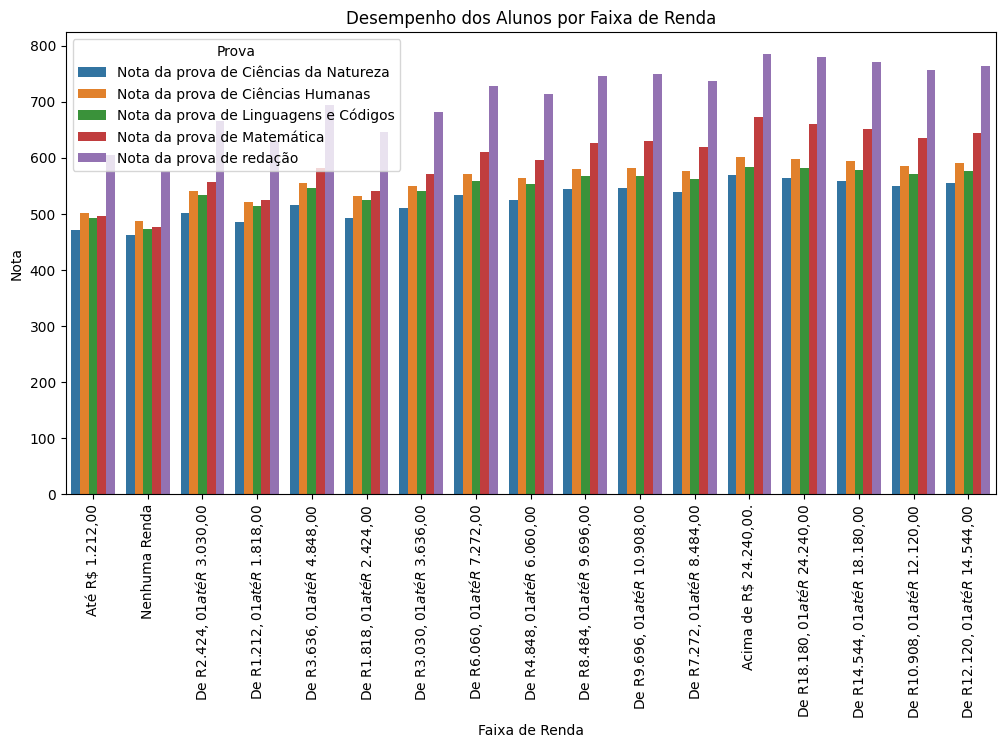

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.barplot(x='Q006', y='Nota', hue='Prova', data=melted_data, ci=None)
plt.title('Desempenho dos Alunos por Faixa de Renda')
plt.xlabel('Faixa de Renda')
plt.ylabel('Nota')
plt.xticks(rotation=90)
plt.show() 

In [ ]:
#Não vamos utilizar esse gráfico por isso não está em ordem crescente

In [ ]:
df['NU_NOTA_CN'] = pd.to_numeric(df['NU_NOTA_CN'], errors='coerce')
df['NU_NOTA_CH'] = pd.to_numeric(df['NU_NOTA_CH'], errors='coerce')
df['NU_NOTA_LC'] = pd.to_numeric(df['NU_NOTA_LC'], errors='coerce')
df['NU_NOTA_MT'] = pd.to_numeric(df['NU_NOTA_MT'], errors='coerce')
df['NU_NOTA_REDACAO'] = pd.to_numeric(df['NU_NOTA_REDACAO'], errors='coerce')

In [ ]:
notas = df[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO']]

In [ ]:
mean_values = df[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO']].mean()
print(mean_values)

NU_NOTA_CN         498.021254
NU_NOTA_CH         533.114615
NU_NOTA_LC         523.240613
NU_NOTA_MT         546.361673
NU_NOTA_REDACAO    656.726194
dtype: float64


In [ ]:
sigma = df[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO']].std().mean()
sigma

99.92826517778163

In [ ]:
mean_data = df.groupby('Q006')[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO']].mean()
mean_data 

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
Q006,,,,,
A,461.944304,487.616554,473.299855,476.671278,576.951986
B,470.737159,501.430090,491.545660,495.551117,605.240587
C,484.631347,521.133804,513.844599,523.858551,630.055888
D,493.028080,531.063326,523.959619,539.686701,646.511738
E,501.575340,540.333362,532.693012,555.708450,665.284595
F,510.080588,549.039899,540.103005,571.606411,681.645120
G,516.273232,555.051425,545.673599,581.334431,694.035430
H,525.293107,563.677424,552.665860,595.885194,712.866927
I,533.986683,571.582887,559.159940,609.879145,727.615909


In [ ]:
d_data = (mean_data - mean_values) / sigma
d_data

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
Q006,,,,,
A,-0.361028,-0.455307,-0.499766,-0.697404,-0.798315
B,-0.273037,-0.317073,-0.317177,-0.508470,-0.515226
C,-0.133995,-0.119894,-0.094028,-0.225193,-0.266895
D,-0.049968,-0.020528,0.007195,-0.066798,-0.102218
E,0.035566,0.072239,0.094592,0.093535,0.085645
F,0.120680,0.159367,0.168745,0.252629,0.249368
G,0.182651,0.219526,0.224491,0.349979,0.373360
H,0.272914,0.305847,0.294464,0.495591,0.561810
I,0.359912,0.384959,0.359451,0.635631,0.709406


In [ ]:
melted_data = d_data.reset_index().melt(id_vars='Q006', var_name='Prova', value_name='Coeficiente d')
melted_data 

,Q006,Prova,Coeficiente d
0,A,NU_NOTA_CN,-0.361028
1,B,NU_NOTA_CN,-0.273037
2,C,NU_NOTA_CN,-0.133995
3,D,NU_NOTA_CN,-0.049968
4,E,NU_NOTA_CN,0.035566
...,...,...,...
80,M,NU_NOTA_REDACAO,1.000920
81,N,NU_NOTA_REDACAO,1.075575
82,O,NU_NOTA_REDACAO,1.141303
83,P,NU_NOTA_REDACAO,1.232510


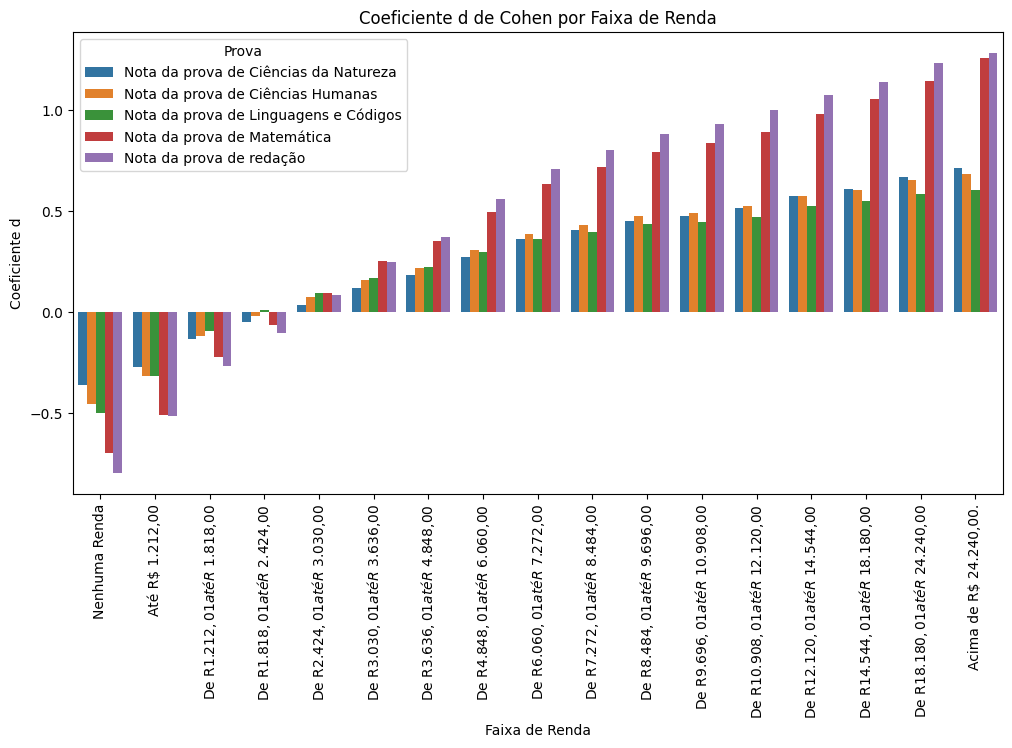

In [ ]:
melted_data['Q006'] = melted_data['Q006'].replace(renda_mapping)
melted_data['Prova'] = melted_data['Prova'].replace(prova_mapping)
plt.figure(figsize=(12, 6))
sns.barplot(x='Q006', y='Coeficiente d', hue='Prova', data=melted_data)
plt.title('Coeficiente d de Cohen por Faixa de Renda')
plt.xlabel('Faixa de Renda')
plt.ylabel('Coeficiente d')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Um valor de d perto de 0 sugere que não há diferença significativa entre os grupos.
#Um valor de d positivo sugere que as escolas públicas têm um desempenho melhor.
#Um valor de d negativo sugere que as escolas particulares têm um desempenho melhor.

In [ ]:
publica = df[df['TP_DEPENDENCIA_ADM_ESC'].isin([1, 2, 3])]
particular = df[df['TP_DEPENDENCIA_ADM_ESC'] == 4]
publica

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
40,210056717205,2022,5,F,1,3,1,2,0,2,...,A,A,A,B,A,A,C,A,A,B
57,210056292241,2022,2,M,1,3,1,2,0,2,...,A,A,A,C,A,A,E,A,C,B
59,210054772114,2022,3,F,1,3,1,2,0,2,...,A,A,A,C,A,A,A,A,A,B
67,210055580862,2022,3,M,1,1,1,2,0,2,...,A,A,A,C,B,A,D,B,A,B
68,210055092856,2022,2,F,1,3,1,2,0,2,...,A,A,A,B,A,A,D,A,A,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3476074,210056744855,2022,4,M,0,3,1,2,0,2,...,A,A,A,B,A,A,B,A,A,B
3476086,210056738981,2022,2,M,1,1,1,2,0,2,...,B,A,B,C,B,A,D,A,B,B
3476093,210055806830,2022,3,F,1,1,1,2,0,2,...,A,A,A,B,A,A,E,A,B,B
3476098,210055668087,2022,2,M,0,3,1,2,0,2,...,A,A,A,B,A,A,C,A,A,B


In [ ]:
mean_publica = publica[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean()
mean_particular = particular[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean()
sigma_publica = publica[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].std()
sigma_particular = particular[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].std()

In [ ]:
import numpy as np
d_cohen = (mean_publica - mean_particular) / np.sqrt((sigma_publica**2 + sigma_particular**2) / 2)
d_cohen

NU_NOTA_CN        -0.831167
NU_NOTA_CH        -0.846073
NU_NOTA_LC        -0.768275
NU_NOTA_MT        -0.844000
NU_NOTA_REDACAO   -0.966569
dtype: float64

In [ ]:
prova_mapping = {
    'NU_NOTA_CN': 'Ciências da Natureza',
    'NU_NOTA_CH': 'Ciências Humanas',
    'NU_NOTA_LC': 'Linguagens e Códigos',
    'NU_NOTA_MT': 'Matemática',
    'NU_NOTA_REDACAO': 'Redação'
}

melted_data['Prova'] = melted_data['Prova'].replace(prova_mapping)

In [ ]:
d_cohen_df = d_cohen.reset_index().rename(columns={'index': 'Prova', 0: 'd'})
d_cohen_df

,Prova,d
0,NU_NOTA_CN,-0.831167
1,NU_NOTA_CH,-0.846073
2,NU_NOTA_LC,-0.768275
3,NU_NOTA_MT,-0.844000
4,NU_NOTA_REDACAO,-0.966569


In [ ]:
d_cohen_df = d_cohen.reset_index().rename(columns={'index': 'Prova', 0: 'd'})
d_cohen_df['Prova'] = d_cohen_df['Prova'].replace(prova_mapping)

d_cohen_df

,Prova,d
0,Ciências da Natureza,-0.831167
1,Ciências Humanas,-0.846073
2,Linguagens e Códigos,-0.768275
3,Matemática,-0.844000
4,Redação,-0.966569


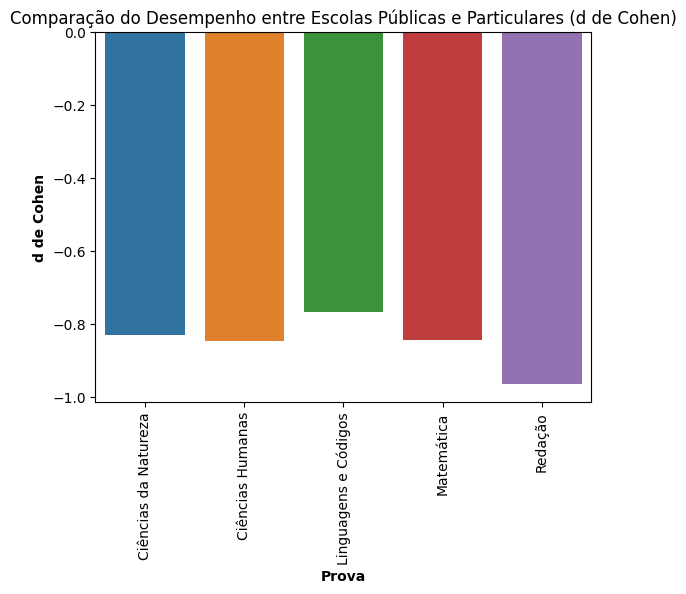

In [ ]:
sns.barplot(x='Prova', y='d', data=d_cohen_df)
plt.title('Desempenho das Escolas Públicas em relação as Escolas Particulares (d de Cohen)')
plt.xlabel('Prova',fontweight='bold')
plt.ylabel('d de Cohen',fontweight='bold')
plt.xticks(rotation=90)
plt.show() 